In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,zscore
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test=pd.read_csv('test.csv')
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
train.sample(10)

PassengerId  Survived  Pclass                                 Name  \
455          456         1       3                   Jalsevac, Mr. Ivan   
406          407         0       3     Widegren, Mr. Carl/Charles Peter   
63            64         0       3                Skoog, Master. Harald   
720          721         1       2    Harper, Miss. Annie Jessie "Nina"   
304          305         0       3    Williams, Mr. Howard Hugh "Harry"   
338          339         1       3                Dahl, Mr. Karl Edwart   
249          250         0       2        Carter, Rev. Ernest Courtenay   
316          317         1       2  Kantor, Mrs. Sinai (Miriam Sternin)   
476          477         0       2              Renouf, Mr. Peter Henry   
315          316         1       3      Nilsson, Miss. Helmina Josefina   

        Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
455    male  29.0      0      0    349240   7.8958   NaN        C  
406    male  51.0      0      0    347064   7.7500   NaN        S  
63     male   4.0      3      2    347088  27.9000   NaN        S  
720  female   6.0      0      1    248727  33.0000   NaN        S  
304    male   NaN      0      0  A/5 2466   8.0500   NaN        S  
338    male  45.0      0      0      7598   8.0500   NaN        S  
249    male  54.0      1      0    244252  26.0000   NaN        S  
316  female  24.0      1      0    244367  26.0000   NaN        S  
476    male  34.0      1      0     31027  21.0000   NaN        S  
315  female  26.0      0      0    347470   7.8542   NaN        S

In [5]:
train.shape

(891, 12)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
C90            1
C101           1
A24            1
A19            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [9]:
train.drop(['Cabin'],axis=1,inplace=True)

In [10]:
train['Age']=train['Age'].replace(np.nan,train['Age'].mean())

In [11]:
train['Embarked']=train['Embarked'].replace(np.nan,train['Embarked'].mode()[0])

In [12]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [14]:
data=train.copy()

In [15]:
data.drop('PassengerId',axis=1,inplace=True)

In [16]:
train

PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.699118      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [17]:
data.select_dtypes(include='object').head()

Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S

In [18]:
data['Survived']=data['Survived'].astype('category')

In [19]:
crosstab=pd.crosstab(data['Survived'],data['Sex'])

In [20]:
stats,pval,a,b=chi2_contingency(crosstab)
if pval<0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

Reject the null hypothesis


In [21]:
crosstab=pd.crosstab(data['Survived'],data['Embarked'])
stats,pval,a,b=chi2_contingency(crosstab)
if pval<0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

Reject the null hypothesis


In [22]:
cols=data.select_dtypes(exclude='object').columns
for i in cols:
    x=data[data['Survived']==0][i]
    y=data[data['Survived']==1][i]
    stats,pvals=ttest_ind(x,y)
    if pvals<0.05:
        print('Reject the NullHypothesis {}:{}'.format(i,round(pvals,2)))
    else:
        print('Fail to Reject the NullHypothesis {}:{}'.format(i,round(pvals,2)))

Reject the NullHypothesis Survived:0.0
Reject the NullHypothesis Pclass:0.0
Reject the NullHypothesis Age:0.04
Fail to Reject the NullHypothesis SibSp:0.29
Reject the NullHypothesis Parch:0.01
Reject the NullHypothesis Fare:0.0


In [23]:
data.drop('SibSp',axis=1,inplace=True)

In [24]:
label=LabelEncoder()
data['Sex']=label.fit_transform(data['Sex'])

In [25]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [26]:
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:>

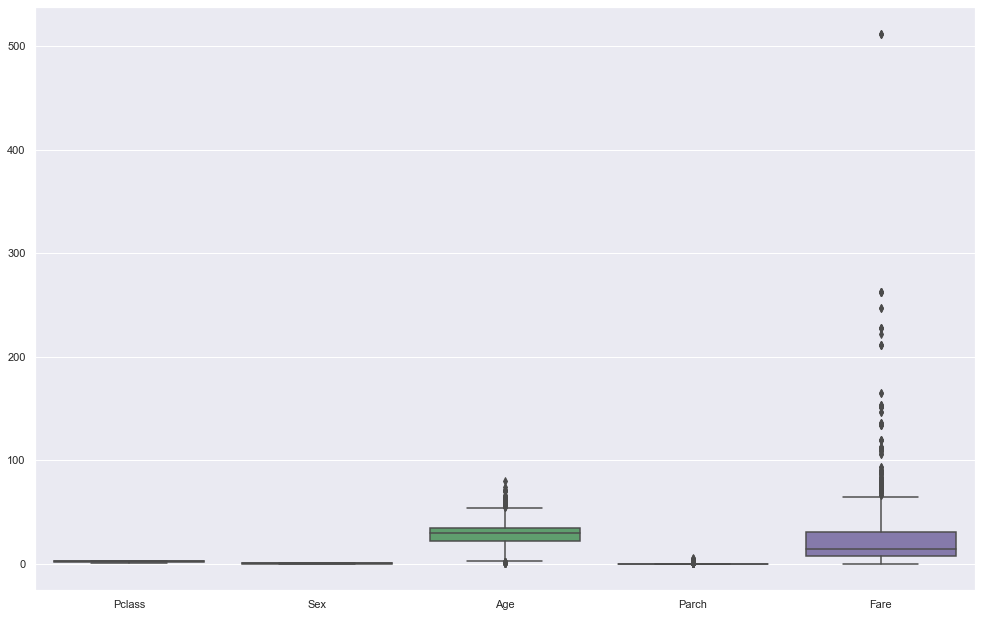

In [27]:
sns.boxplot(data=data)

In [28]:
num=data.select_dtypes(exclude=['object','category']).columns

In [29]:
num

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare'], dtype='object')

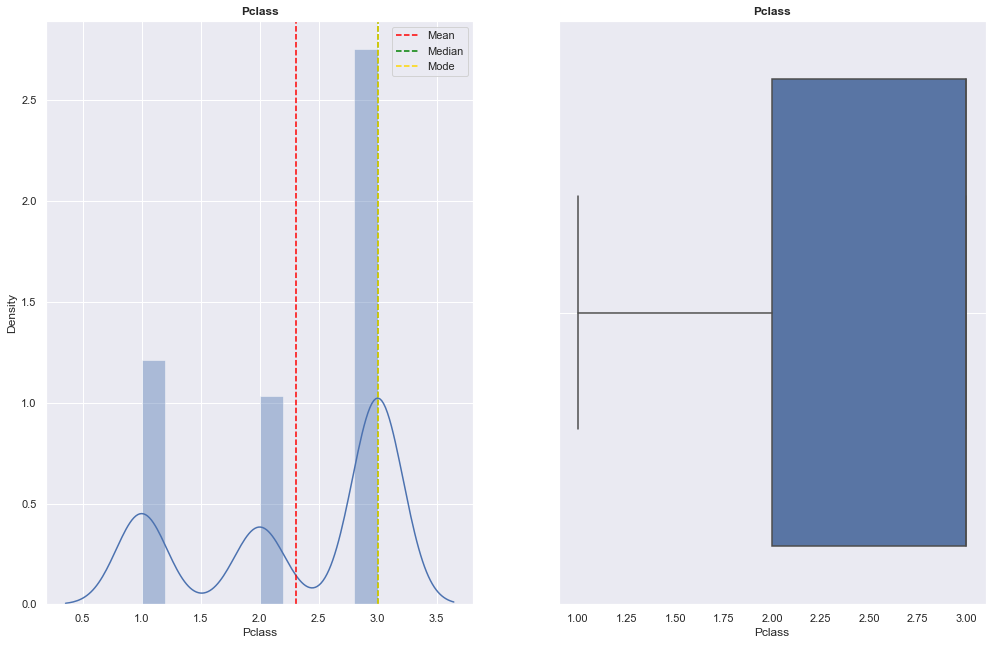

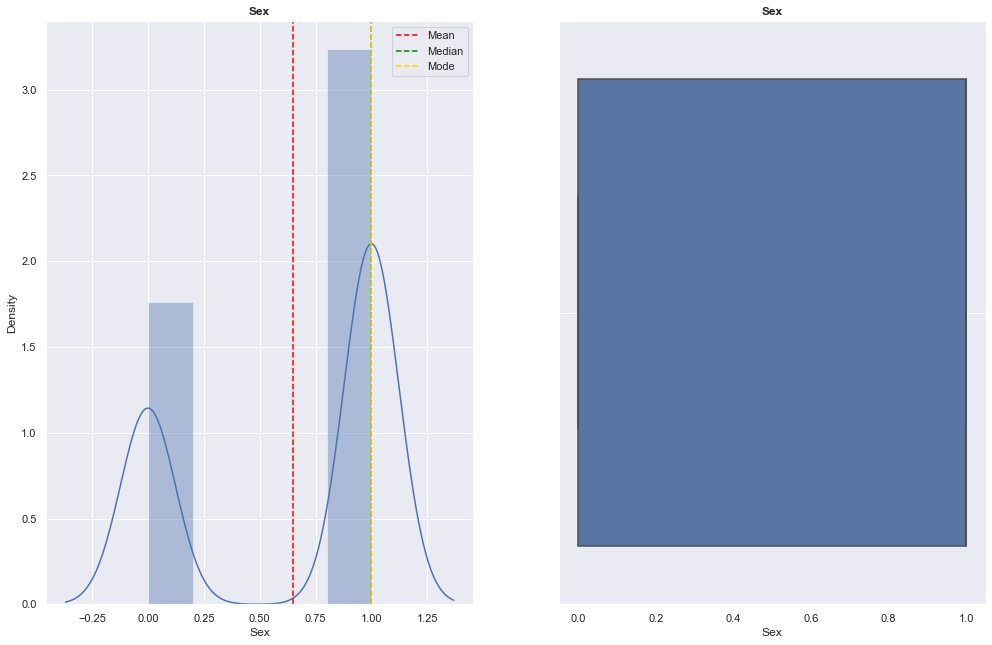

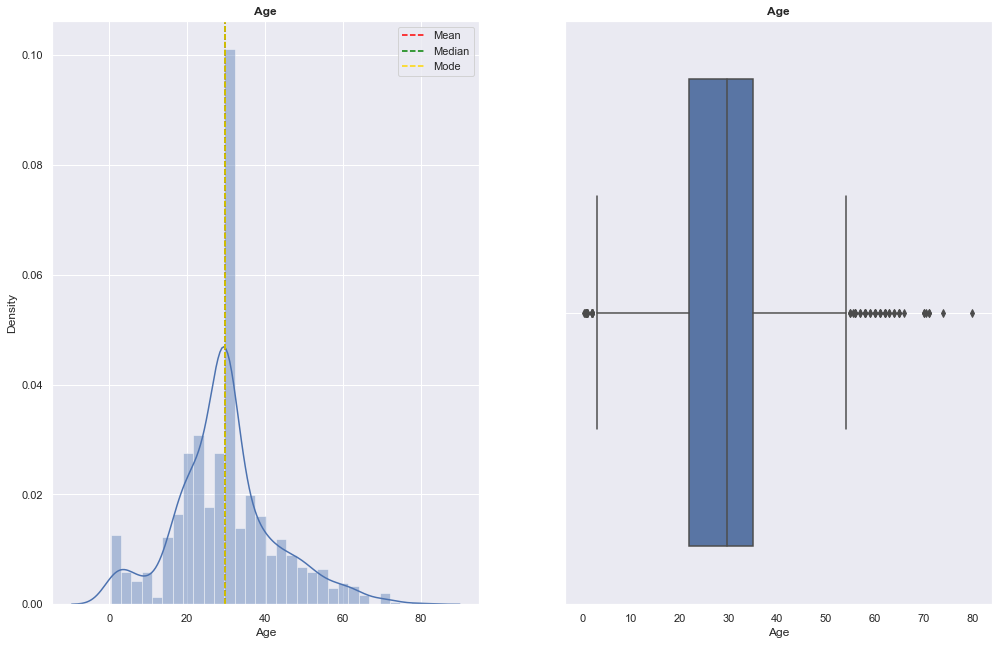

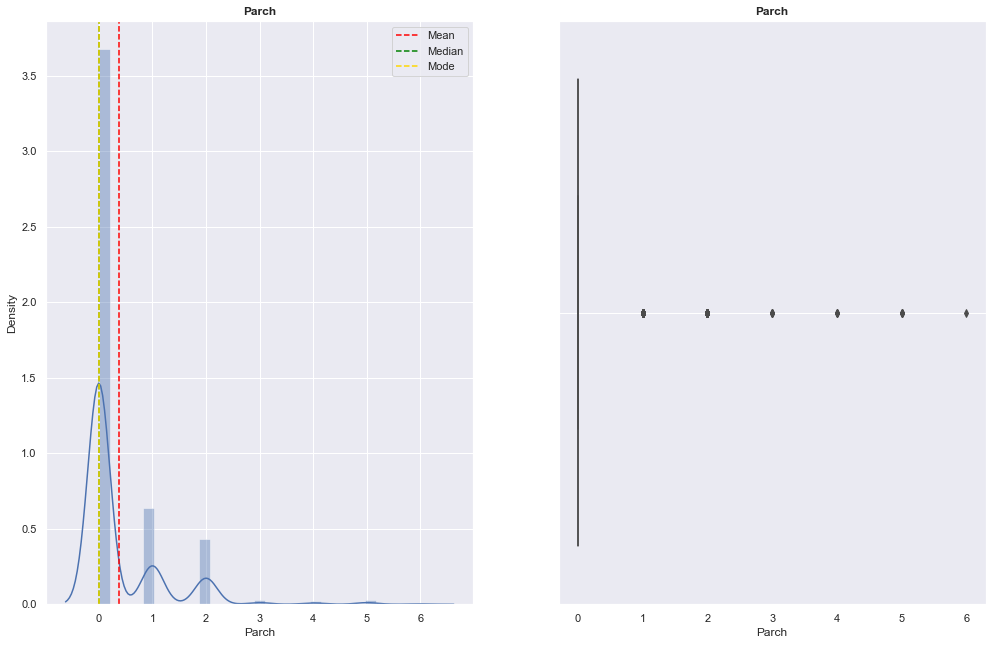

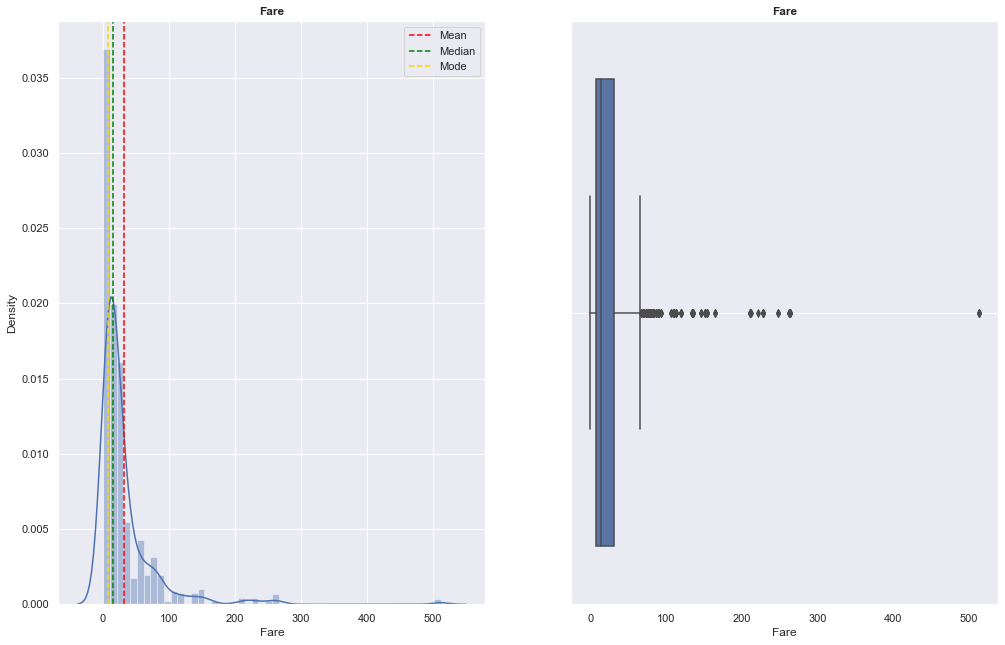

In [30]:
for i in num:
    fig,ax=plt.subplots(1,2,figsize=(15,10))
    sns.distplot(data[i],ax=ax[0]).set_title(i,fontweight='bold')
    sns.boxplot(data[i],ax=ax[1]).set_title(i,fontweight='bold')
    ax[0].axvline(data[i].mean(),linestyle='--',color='red',label='Mean')
    ax[0].axvline(data[i].median(),linestyle='--',color='green',label='Median')
    ax[0].axvline(data[i].mode()[0],linestyle='--',color='gold',label='Mode')
    plt.grid()
    ax[0].legend()
    plt.show()

In [31]:
cat=['Survived','Pclass','Sex','Parch']

In [32]:
def functions(x):
    plt.subplot(121)
    data[x].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'bold'})
    plt.subplot(122)
    t=sns.countplot(data[x])
    plt.title(x,fontweight='bold',fontsize=20)
    for i in t.patches:
        txt=str(((i.get_height()/len(data[x]))*100).round(2))+ '%'
        txt_x=i.get_x()+i.get_width()/3
        txt_y=i.get_height()
        t.text(txt_x,txt_y,txt)

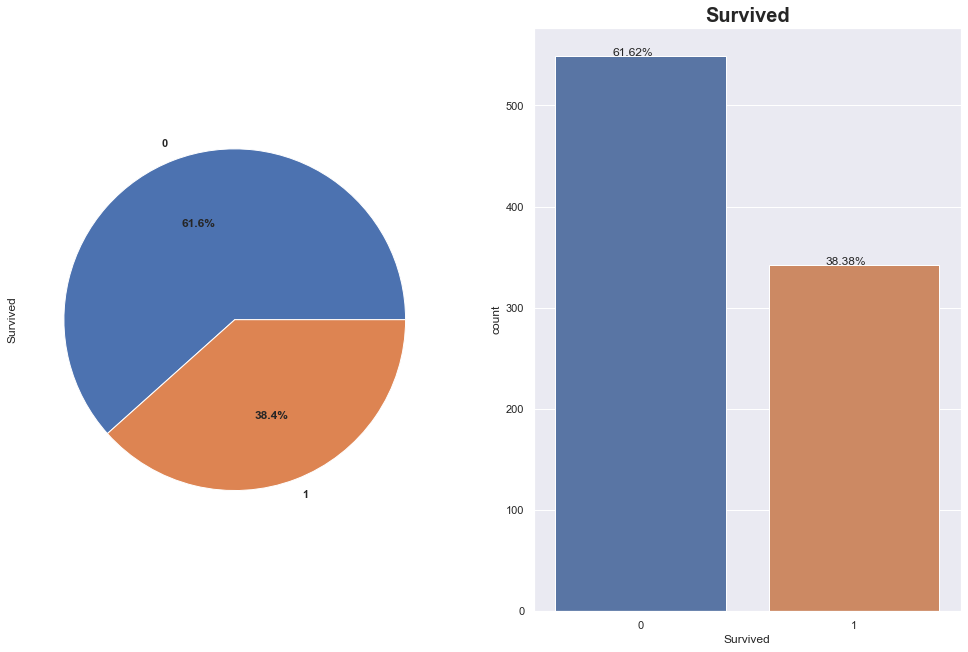

In [33]:
functions(cat[0])

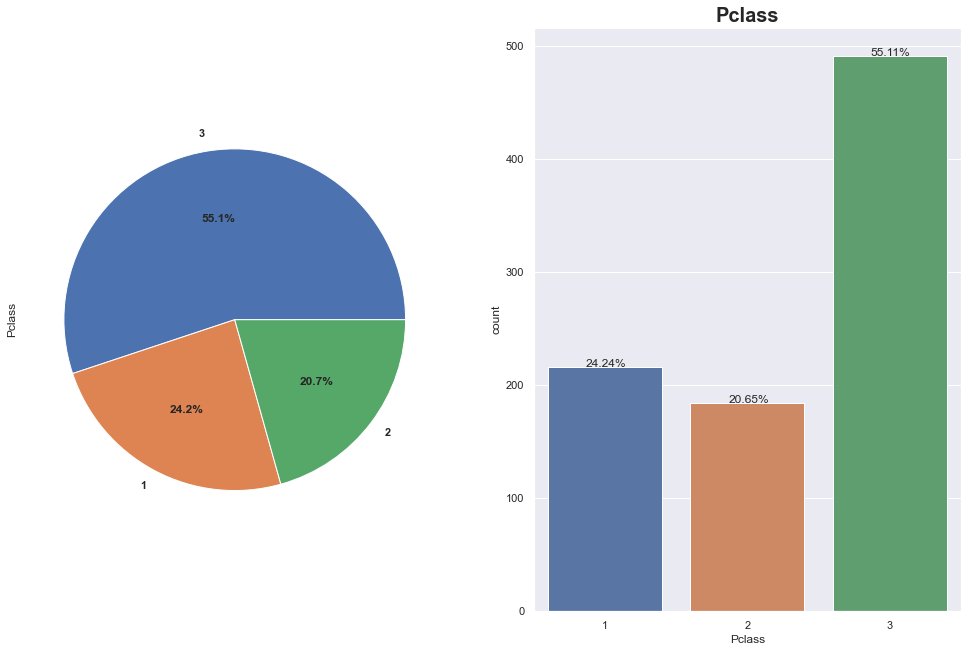

In [34]:
functions(cat[1])

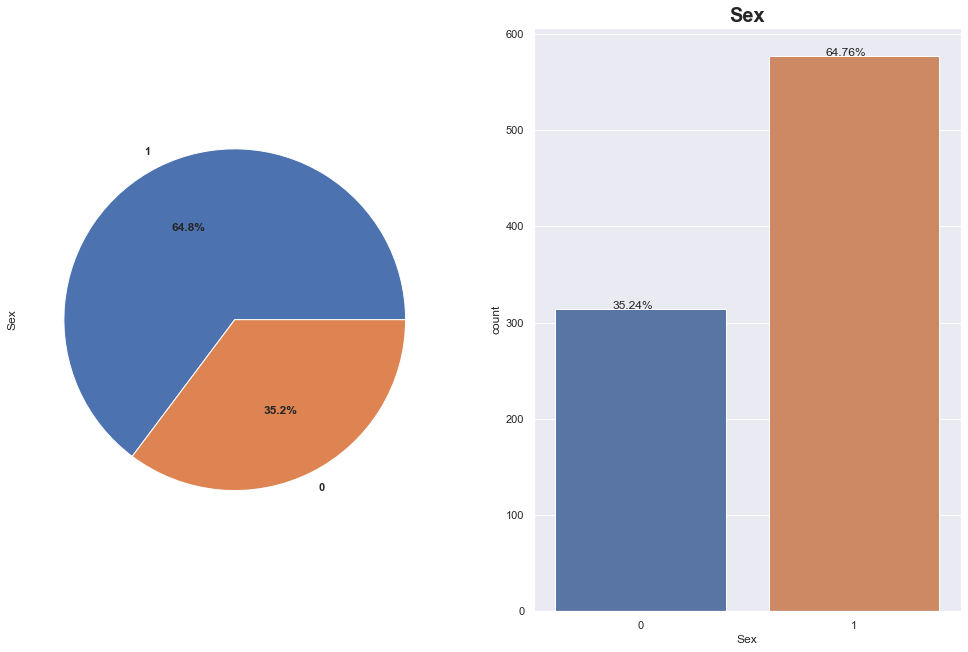

In [35]:
functions(cat[2])

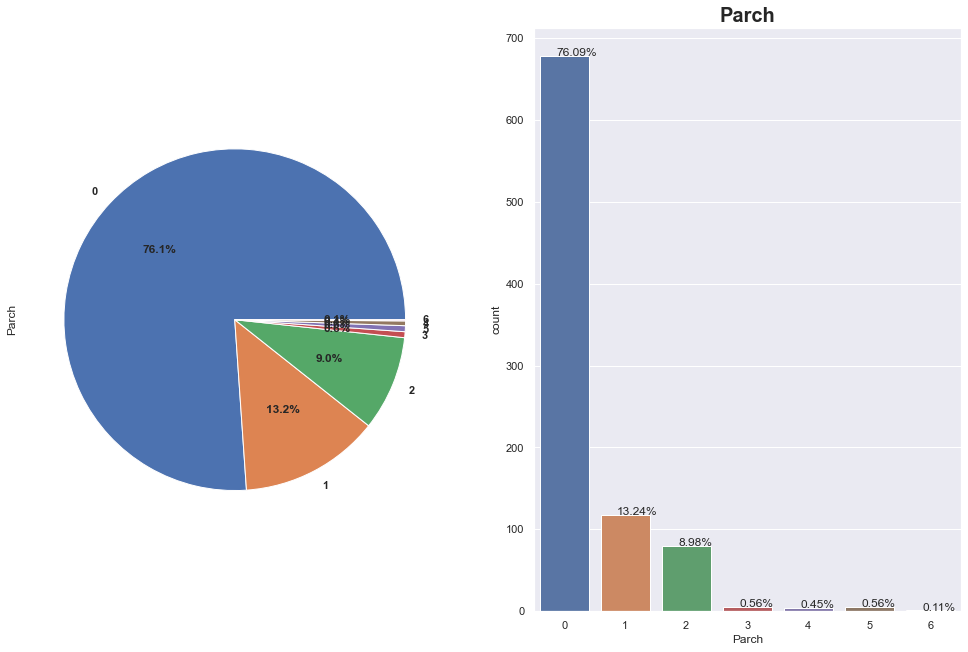

In [36]:
functions(cat[3])

<AxesSubplot:xlabel='Age', ylabel='Density'>

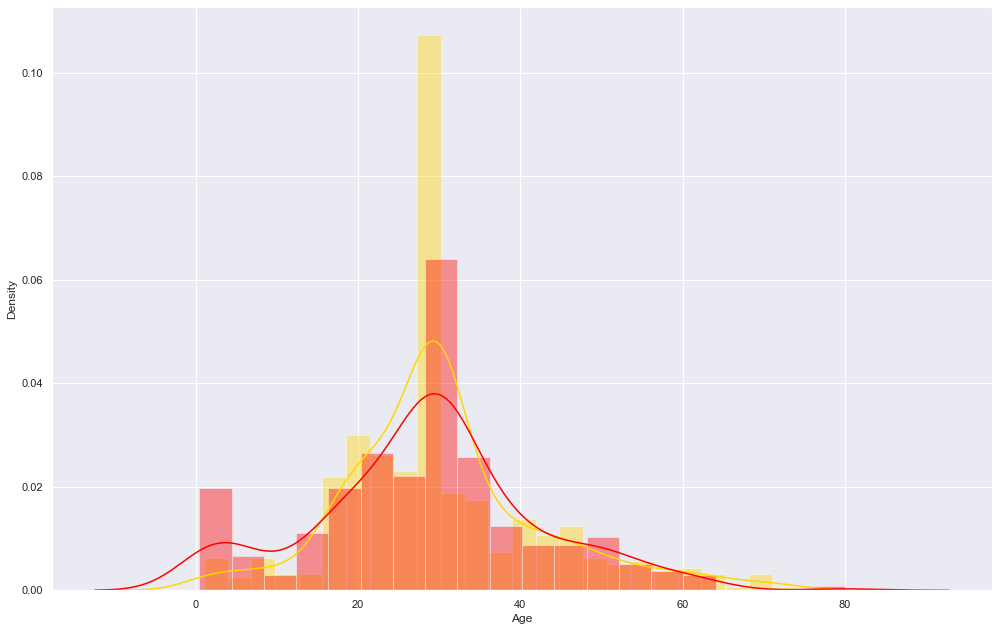

In [37]:
x=data[data['Survived']==0]['Age']
y=data[data['Survived']==1]['Age']
sns.distplot(x,color='gold')
sns.distplot(y,color='red')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

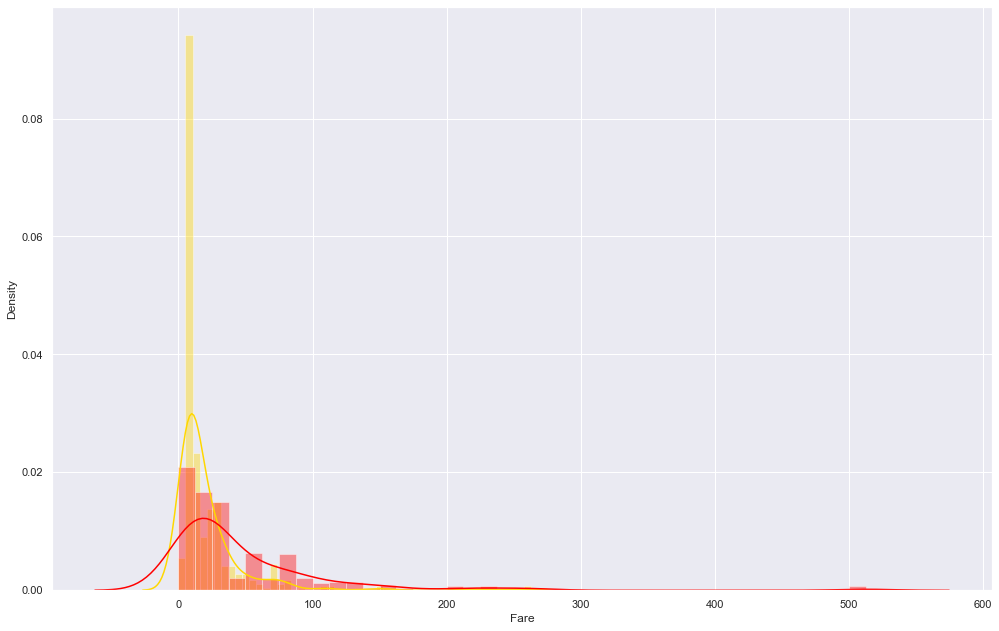

In [38]:
x=data[data['Survived']==0]['Fare']
y=data[data['Survived']==1]['Fare']
sns.distplot(x,color='gold')
sns.distplot(y,color='red')

In [39]:
cat.remove('Survived')

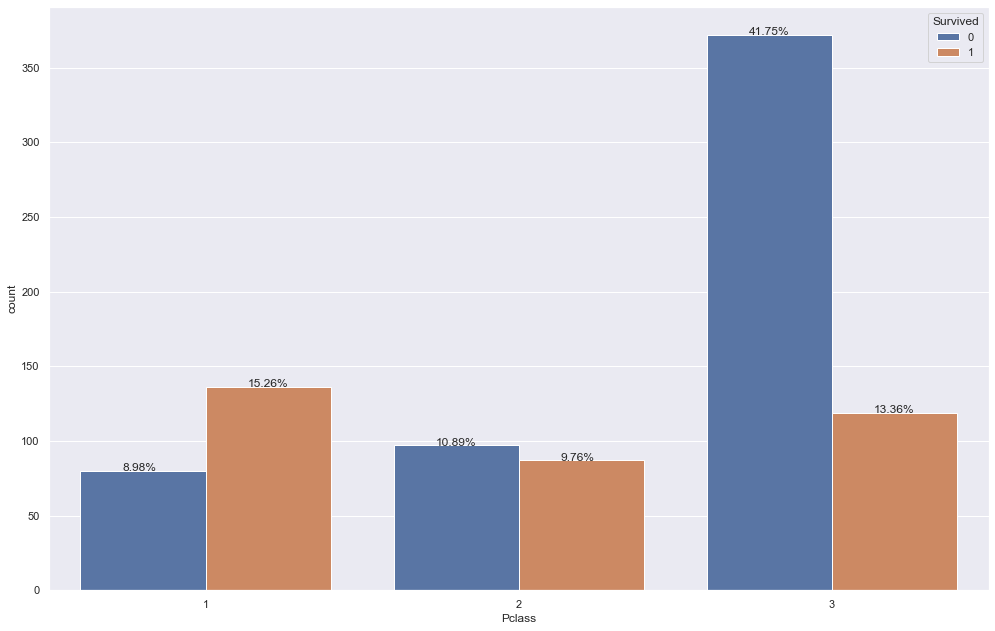

In [40]:
def functions(x):
    s=sns.countplot(data=data,x=data[x],hue='Survived')
    for i in s.patches:
        txt=str(((i.get_height()/len(data[x]))*100).round(2))+"%"
        txt_x=i.get_x()+i.get_width()/3
        txt_y=i.get_height()
        s.text(txt_x,txt_y,txt)
functions(cat[0])

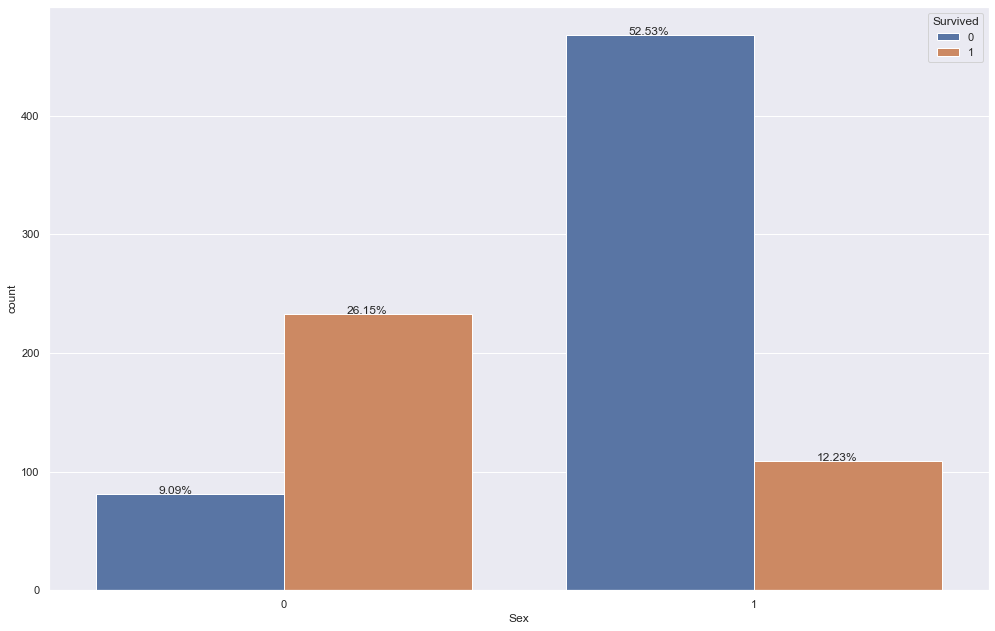

In [41]:
functions(cat[1])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


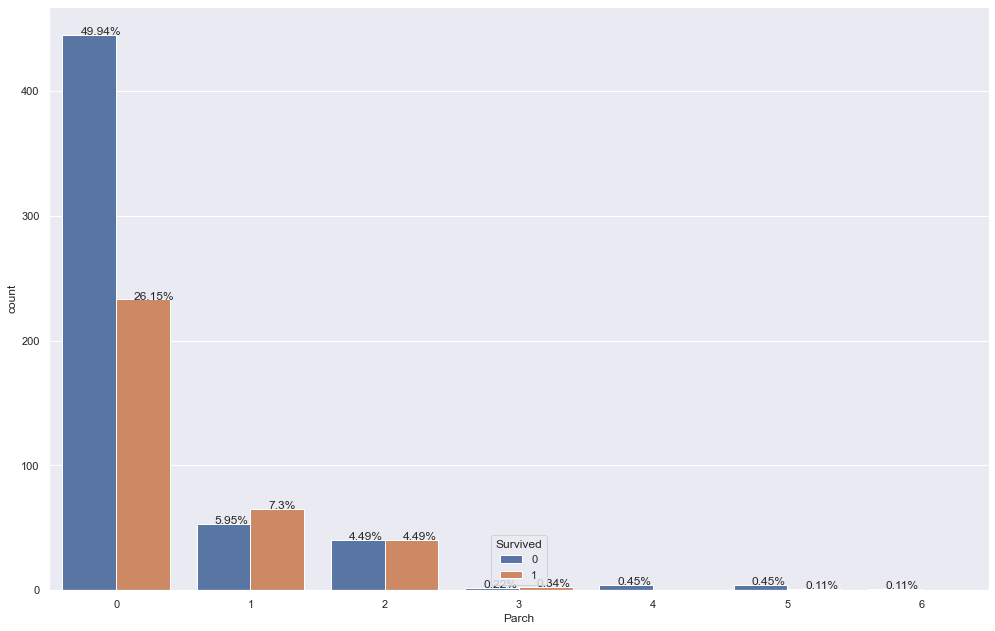

In [42]:
functions(cat[2])

In [43]:
data.corr().style.background_gradient('coolwarm')

In [44]:
 from sklearn.model_selection  import train_test_split,StratifiedKFold,KFold,cross_val_score,cross_validate,GridSearchCV

In [45]:
sc=['Age','Fare']

data[sc]=data[sc].apply(zscore)

In [46]:
data['Embarked']=label.fit_transform(data['Embarked'])

In [47]:
data.head(2)

Survived  Pclass  Sex       Age  Parch      Fare  Embarked
0        0       3    1 -0.592481      0 -0.502445         2
1        1       1    0  0.638789      0  0.786845         0

In [48]:
y=data[['Survived']]
x=data.drop('Survived',1)

In [49]:
from imblearn.over_sampling import SMOTENC
sm=SMOTENC(categorical_features=[0,1,3,5])

In [50]:
cv=StratifiedKFold(n_splits=5)
for train,test in cv.split(x,y):
    x_train,x_test=x.loc[train],x.loc[test]
    y_train,y_test=y.loc[train],y.loc[test]
    X_train,Y_train=sm.fit_resample(x_train,y_train)

In [51]:
len(x_train),len(x_test)

(713, 178)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)
yhat=lg.predict(x_test)

In [54]:
display(lg.score(X_train,Y_train))
display(lg.score(x_test,y_test))

0.7931818181818182

0.7752808988764045

In [55]:
print('Classification report:')
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

Classification report:
[[87 22]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [56]:
lg=LogisticRegression()
params={
    'penalty':['l2','l1'],
    'class_weight':['balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','sga'],
    "C":[100,10,1,0.1,0.001]
}
cv=StratifiedKFold()
model=GridSearchCV(lg,params,scoring='roc_auc',cv=cv)
model.fit(X_train,Y_train)
print(model.best_params_)
print(model.best_score_)

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.8443052685950414


In [57]:
lg=LogisticRegression(C= 1, class_weight='balanced', penalty='l2',solver= 'lbfgs')
lg.fit(X_train,Y_train)
yhat=lg.predict(x_test)

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

Print Classification Report 
[[87 22]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

Best auc value:  0.8530780481318974
Best Threshold: 0.39571517323072786


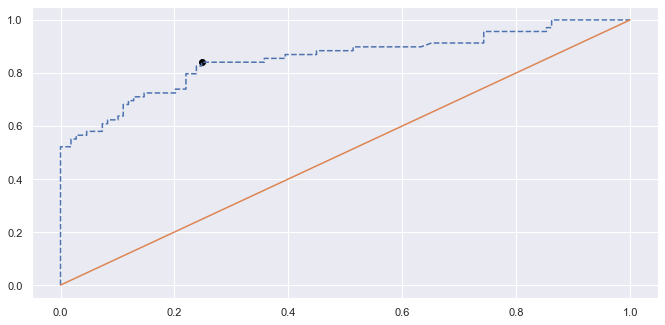

In [59]:
def scoring(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    prob=model.fit(x_train,y_train).predict_proba(x_test)
    print('Print Classification Report ')
    print(metrics.confusion_matrix(y_test,yhat))
    print(metrics.classification_report(y_test,yhat))
    FPR,TPR,TH=roc_curve(y_test,prob[:,1])
    print('Best auc value: ',auc(FPR,TPR))
    plt.figure(figsize=(10,5))
    plt.plot(FPR,TPR,linestyle="--")
    plt.plot([0,1])
    Gmean=np.sqrt(TPR*(1-FPR))
    mx=np.argmax(Gmean)
    plt.scatter(FPR[mx],TPR[mx],color='black')
    print('Best Threshold:',TH[mx])
    
lg=LogisticRegression(C= 1, class_weight='balanced', penalty='l2',solver= 'lbfgs')
scoring(lg,X_train,x_test,Y_train,y_test)

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb=GaussianNB()
nb.fit(X_train,Y_train)
yhat=nb.predict(x_test)
print('Recall score: ',metrics.recall_score(y_test,yhat))
print("Train score: ",nb.score(X_train,Y_train))
print("Test score: ",nb.score(x_test,y_test))

Recall score:  0.7101449275362319
Train score:  0.7761363636363636
Test score:  0.7921348314606742


In [62]:
def CV(models,params):
    cv=StratifiedKFold()
    model=GridSearchCV(models,params,cv=cv,scoring="roc_auc")
    model.fit(X_train,Y_train)
    print("Best estimator: ",model.best_params_)
    print("Best score: ",model.best_score_)

nb=GaussianNB()
params={'var_smoothing': np.logspace(0,-9, num=100)}
CV(nb,params)

Best estimator:  {'var_smoothing': 1e-05}
Best score:  0.8237345041322314


Print Classification Report 
[[92 17]
 [20 49]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       109
           1       0.74      0.71      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Best auc value:  0.8639808536098923
Best Threshold: 0.29497144820730176


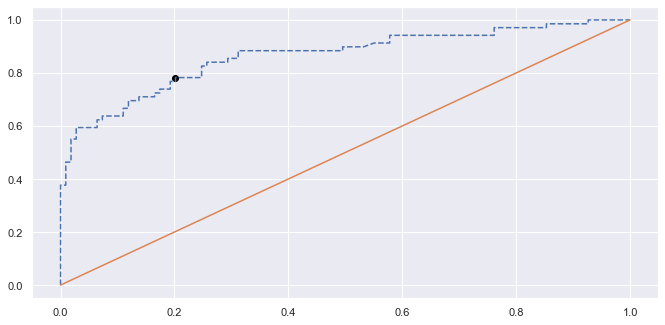

In [63]:
nb=GaussianNB(var_smoothing=0.001873817422860383)
scoring(nb,X_train,x_test,Y_train,y_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
values=[]
kvalues=range(1,20,2)
for i in kvalues:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    yhat=knn.predict(x_test)
    values.append(metrics.accuracy_score(y_test,yhat))

In [67]:
score=[i for i in values]
print('Best values : ',kvalues[score.index(max(score))])

Best values :  15


([<matplotlib.axis.XTick at 0x12e0acd8910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

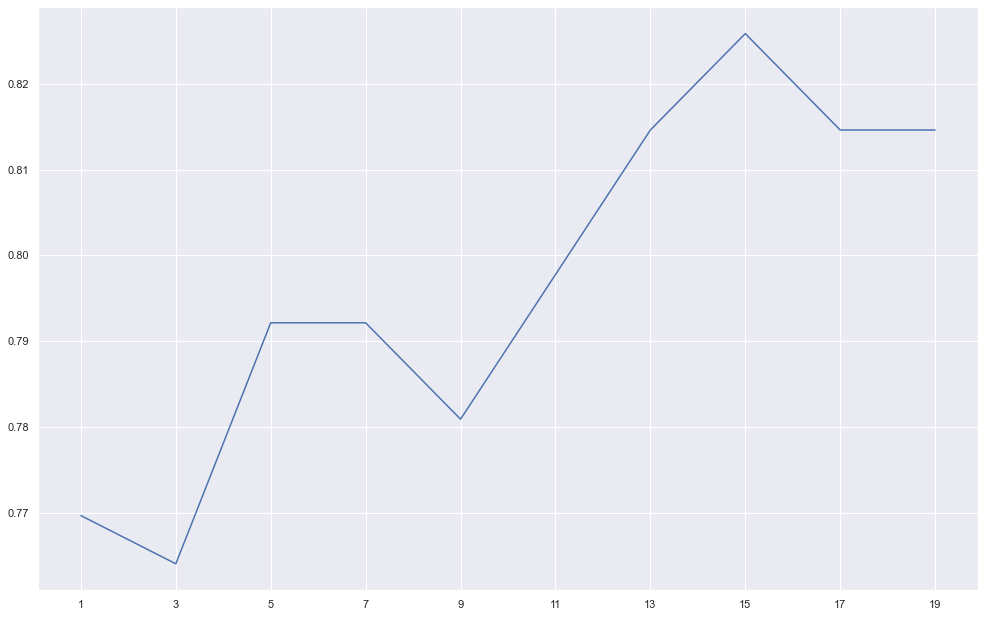

In [68]:
plt.plot(range(1,20,2),values)
plt.xticks(range(1,20,2))

In [69]:
knn=KNeighborsClassifier()
params={
    'n_neighbors':np.arange(3,30,2),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree'],
    'metric':['minkowski','euclidean']}
CV(knn,params)

Best estimator:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.8566761363636364


Print Classification Report 
[[91 18]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.72      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Best auc value:  0.8451668661082303
Best Threshold: 0.5714285714285714


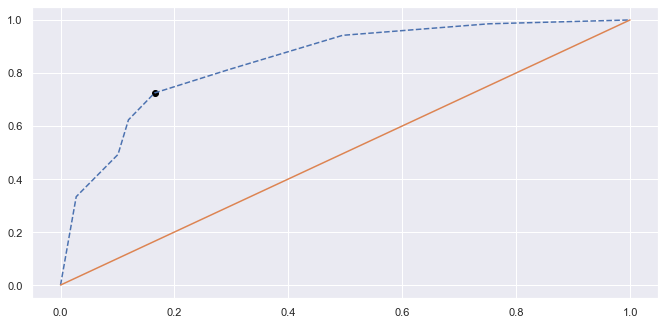

In [70]:
knn=KNeighborsClassifier(algorithm= 'auto', metric= 'minkowski', n_neighbors= 7, weights='uniform')
scoring(knn,X_train,x_test,Y_train,y_test)

In [71]:
from sklearn.svm import SVC
svm=SVC()
params={'C': [0.1, 1],
        'probability':[True,False],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','poly']
       } 
CV(svm,params)

Best estimator:  {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
Best score:  0.8520661157024794


Print Classification Report 
[[76 33]
 [ 7 62]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       109
           1       0.65      0.90      0.76        69

    accuracy                           0.78       178
   macro avg       0.78      0.80      0.77       178
weighted avg       0.81      0.78      0.78       178

Best auc value:  0.8585294508708947
Best Threshold: 0.6357866289417698


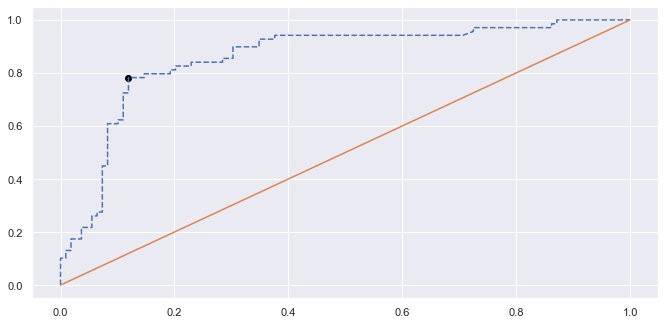

In [72]:
svm=SVC(C= 0.1, gamma= 1, kernel= 'rbf',probability=True)
scoring(svm,X_train,x_test,Y_train,y_test)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree=DecisionTreeClassifier()
params={"max_depth": [3,2,4,5,6],
              "max_features":[2,3,4,5,6],
              "min_samples_leaf":[2,3,4,5,6],
              "criterion": ["gini", "entropy"]}
CV(dtree,params)

Best estimator:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5}
Best score:  0.8631973140495868


Print Classification Report 
[[98 11]
 [16 53]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       109
           1       0.83      0.77      0.80        69

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

Best auc value:  0.8627177237069538
Best Threshold: 0.4675324675324675


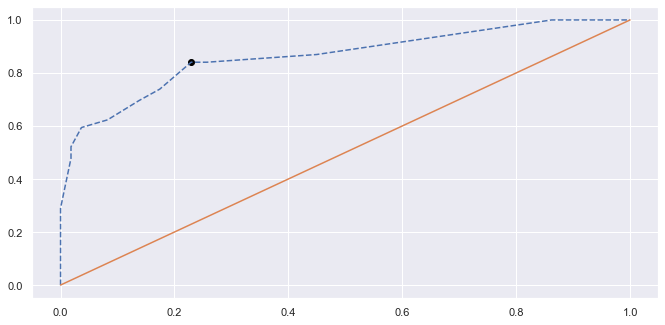

In [75]:
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 4, min_samples_leaf= 5)
scoring(dtree,X_train,x_test,Y_train,y_test)

In [76]:
from sklearn.ensemble import BaggingClassifier

In [77]:
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 4, min_samples_leaf= 5)
Bagg=BaggingClassifier()
params={'base_estimator':[dtree],
        'n_estimators':[100,200,300]}
CV(Bagg,params)

Best estimator:  {'base_estimator': DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5), 'n_estimators': 300}
Best score:  0.8628099173553718


Print Classification Report 
[[97 12]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       109
           1       0.82      0.81      0.82        69

    accuracy                           0.86       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178

Best auc value:  0.907592075521872
Best Threshold: 0.40870532033871754


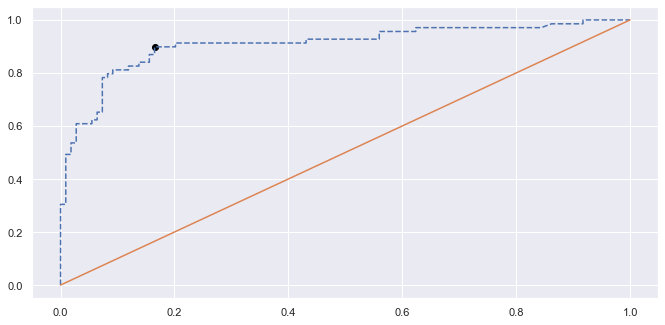

In [78]:
bagg=BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5),n_estimators= 100)
scoring(bagg,X_train,x_test,Y_train,y_test)

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 4, min_samples_leaf= 5)
ada=AdaBoostClassifier()
params={
    'base_estimator':[dtree],
    'n_estimators':[50,100,200],
    'learning_rate':[.001,0.01,.1]}
CV(ada,params)

Best estimator:  {'base_estimator': DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5), 'learning_rate': 0.01, 'n_estimators': 100}
Best score:  0.8728822314049587


Print Classification Report 
[[96 13]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       109
           1       0.81      0.81      0.81        69

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178

Best auc value:  0.9207552187209147
Best Threshold: 0.4337152942211172


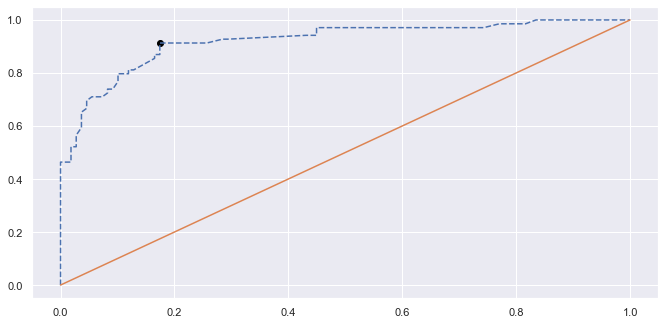

In [81]:
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5), learning_rate=.001, n_estimators=50)
scoring(ada,X_train,x_test,Y_train,y_test)

In [82]:
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostRegressor,CatBoostClassifier 
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [83]:
gb=GradientBoostingClassifier()
params={
    "n_estimators":[100,300,500],
    "learning_rate":[0.1,1,.001,0.01],
    "min_samples_split": np.linspace(0.1, 0.5, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 2),
    "max_depth":[3,4,5]}
CV(gb,params)

Best estimator:  {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}
Best score:  0.8812370867768596


Print Classification Report 
[[92 17]
 [14 55]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       109
           1       0.76      0.80      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

Best auc value:  0.899215529849754
Best Threshold: 0.6132363283081773


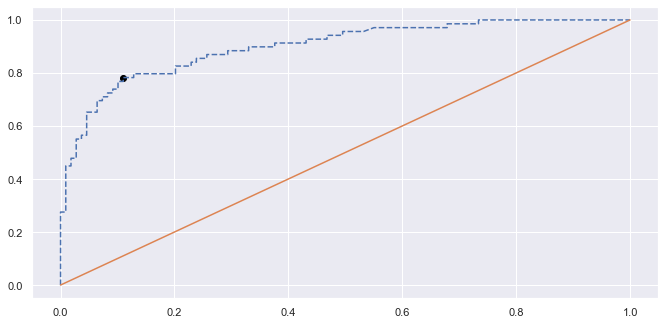

In [84]:
gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 500)
scoring(gb,X_train,x_test,Y_train,y_test)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc=RandomForestClassifier()
params={
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

CV(rfc,params)
    

Best estimator:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
Best score:  0.8836389462809917


Print Classification Report 
[[95 14]
 [15 54]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       109
           1       0.79      0.78      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

Best auc value:  0.9151708549395028
Best Threshold: 0.3604601438678049


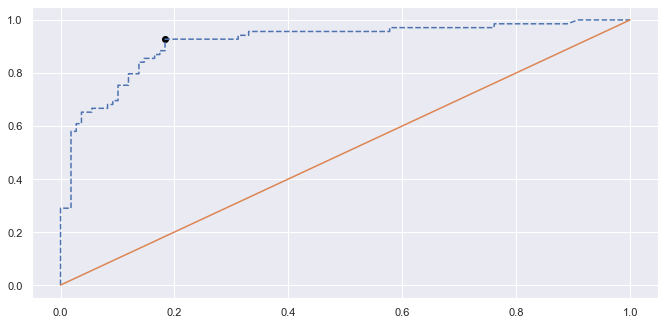

In [87]:
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 6, max_features= 'log2', n_estimators= 200)
scoring(rfc,X_train,x_test,Y_train,y_test)

In [88]:
cbc=CatBoostClassifier()
params={
    
    'iterations':[100,200,300],
    'learning_rate':[0.01,0.02,0.03],
    'depth':[4,5,6,7,8,9, 10]}
CV(cbc,params)

0:	learn: 0.6896277	total: 200ms	remaining: 19.8s
1:	learn: 0.6863379	total: 202ms	remaining: 9.89s
2:	learn: 0.6831655	total: 203ms	remaining: 6.57s
3:	learn: 0.6797657	total: 205ms	remaining: 4.91s
4:	learn: 0.6762799	total: 206ms	remaining: 3.92s
5:	learn: 0.6732439	total: 208ms	remaining: 3.25s
6:	learn: 0.6699024	total: 209ms	remaining: 2.78s
7:	learn: 0.6666743	total: 211ms	remaining: 2.42s
8:	learn: 0.6641304	total: 212ms	remaining: 2.14s
9:	learn: 0.6610373	total: 214ms	remaining: 1.92s
10:	learn: 0.6579117	total: 215ms	remaining: 1.74s
11:	learn: 0.6549855	total: 217ms	remaining: 1.59s
12:	learn: 0.6525863	total: 218ms	remaining: 1.46s
13:	learn: 0.6498252	total: 219ms	remaining: 1.35s
14:	learn: 0.6473835	total: 221ms	remaining: 1.25s
15:	learn: 0.6446751	total: 222ms	remaining: 1.17s
16:	learn: 0.6417510	total: 224ms	remaining: 1.09s
17:	learn: 0.6390152	total: 225ms	remaining: 1.02s
18:	learn: 0.6368072	total: 226ms	remaining: 964ms
19:	learn: 0.6341098	total: 228ms	remaini

95:	learn: 0.5244171	total: 153ms	remaining: 6.36ms
96:	learn: 0.5236099	total: 154ms	remaining: 4.76ms
97:	learn: 0.5230050	total: 155ms	remaining: 3.16ms
98:	learn: 0.5220075	total: 156ms	remaining: 1.58ms
99:	learn: 0.5212565	total: 158ms	remaining: 0us
0:	learn: 0.6897298	total: 1.5ms	remaining: 149ms
1:	learn: 0.6865382	total: 2.95ms	remaining: 144ms
2:	learn: 0.6834436	total: 4.52ms	remaining: 146ms
3:	learn: 0.6799425	total: 5.81ms	remaining: 139ms
4:	learn: 0.6763447	total: 7.39ms	remaining: 140ms
5:	learn: 0.6732686	total: 8.74ms	remaining: 137ms
6:	learn: 0.6701500	total: 10.3ms	remaining: 137ms
7:	learn: 0.6667996	total: 12.2ms	remaining: 140ms
8:	learn: 0.6640046	total: 13.6ms	remaining: 137ms
9:	learn: 0.6608632	total: 15ms	remaining: 135ms
10:	learn: 0.6578782	total: 16.5ms	remaining: 133ms
11:	learn: 0.6549811	total: 17.8ms	remaining: 130ms
12:	learn: 0.6520894	total: 19.2ms	remaining: 128ms
13:	learn: 0.6493761	total: 20.7ms	remaining: 127ms
14:	learn: 0.6465164	total: 

30:	learn: 0.6141386	total: 46.3ms	remaining: 103ms
31:	learn: 0.6120668	total: 47.8ms	remaining: 102ms
32:	learn: 0.6104361	total: 49.8ms	remaining: 101ms
33:	learn: 0.6085143	total: 51.5ms	remaining: 100ms
34:	learn: 0.6064092	total: 53.1ms	remaining: 98.6ms
35:	learn: 0.6047700	total: 54.4ms	remaining: 96.7ms
36:	learn: 0.6030093	total: 55.4ms	remaining: 94.3ms
37:	learn: 0.6015158	total: 56.4ms	remaining: 92ms
38:	learn: 0.5997004	total: 58ms	remaining: 90.7ms
39:	learn: 0.5980510	total: 59.3ms	remaining: 89ms
40:	learn: 0.5962609	total: 60.6ms	remaining: 87.2ms
41:	learn: 0.5945868	total: 61.9ms	remaining: 85.5ms
42:	learn: 0.5927660	total: 63.6ms	remaining: 84.3ms
43:	learn: 0.5909345	total: 65.3ms	remaining: 83.1ms
44:	learn: 0.5894402	total: 66.6ms	remaining: 81.4ms
45:	learn: 0.5877034	total: 68ms	remaining: 79.8ms
46:	learn: 0.5860425	total: 69.3ms	remaining: 78.2ms
47:	learn: 0.5843585	total: 70.8ms	remaining: 76.7ms
48:	learn: 0.5826914	total: 72.2ms	remaining: 75.1ms
49:	l

44:	learn: 0.5292133	total: 65.2ms	remaining: 79.7ms
45:	learn: 0.5272166	total: 66.9ms	remaining: 78.5ms
46:	learn: 0.5252989	total: 68.8ms	remaining: 77.6ms
47:	learn: 0.5234560	total: 70.2ms	remaining: 76ms
48:	learn: 0.5216143	total: 71.4ms	remaining: 74.4ms
49:	learn: 0.5204255	total: 72.4ms	remaining: 72.4ms
50:	learn: 0.5189423	total: 73.7ms	remaining: 70.8ms
51:	learn: 0.5171810	total: 74.8ms	remaining: 69.1ms
52:	learn: 0.5154786	total: 76.2ms	remaining: 67.6ms
53:	learn: 0.5140832	total: 77.4ms	remaining: 66ms
54:	learn: 0.5127973	total: 78.9ms	remaining: 64.6ms
55:	learn: 0.5112652	total: 80.5ms	remaining: 63.2ms
56:	learn: 0.5102529	total: 81.9ms	remaining: 61.8ms
57:	learn: 0.5088448	total: 83.3ms	remaining: 60.3ms
58:	learn: 0.5073567	total: 84.7ms	remaining: 58.8ms
59:	learn: 0.5059522	total: 86.2ms	remaining: 57.5ms
60:	learn: 0.5047678	total: 87.7ms	remaining: 56.1ms
61:	learn: 0.5033111	total: 88.9ms	remaining: 54.5ms
62:	learn: 0.5023478	total: 90.1ms	remaining: 52.9

2:	learn: 0.6749351	total: 4.84ms	remaining: 157ms
3:	learn: 0.6685497	total: 6.15ms	remaining: 148ms
4:	learn: 0.6622600	total: 7.65ms	remaining: 145ms
5:	learn: 0.6567340	total: 9.36ms	remaining: 147ms
6:	learn: 0.6512318	total: 10.8ms	remaining: 144ms
7:	learn: 0.6455766	total: 12.2ms	remaining: 140ms
8:	learn: 0.6410746	total: 13.7ms	remaining: 138ms
9:	learn: 0.6359708	total: 15.1ms	remaining: 136ms
10:	learn: 0.6311254	total: 16.5ms	remaining: 133ms
11:	learn: 0.6264310	total: 17.7ms	remaining: 130ms
12:	learn: 0.6220790	total: 19.1ms	remaining: 128ms
13:	learn: 0.6182279	total: 20.2ms	remaining: 124ms
14:	learn: 0.6139345	total: 21.7ms	remaining: 123ms
15:	learn: 0.6102963	total: 22.8ms	remaining: 120ms
16:	learn: 0.6062442	total: 24.3ms	remaining: 119ms
17:	learn: 0.6018846	total: 25.9ms	remaining: 118ms
18:	learn: 0.5979145	total: 27.4ms	remaining: 117ms
19:	learn: 0.5940971	total: 28.8ms	remaining: 115ms
20:	learn: 0.5903746	total: 30ms	remaining: 113ms
21:	learn: 0.5865499	t

1:	learn: 0.6732173	total: 3.24ms	remaining: 159ms
2:	learn: 0.6643956	total: 4.62ms	remaining: 149ms
3:	learn: 0.6552295	total: 5.88ms	remaining: 141ms
4:	learn: 0.6460774	total: 7.38ms	remaining: 140ms
5:	learn: 0.6384768	total: 9ms	remaining: 141ms
6:	learn: 0.6302501	total: 10.3ms	remaining: 137ms
7:	learn: 0.6225156	total: 11.7ms	remaining: 135ms
8:	learn: 0.6167704	total: 12.9ms	remaining: 130ms
9:	learn: 0.6098300	total: 14.1ms	remaining: 127ms
10:	learn: 0.6029111	total: 15.6ms	remaining: 126ms
11:	learn: 0.5966532	total: 17.4ms	remaining: 128ms
12:	learn: 0.5917794	total: 18.8ms	remaining: 126ms
13:	learn: 0.5859465	total: 20.2ms	remaining: 124ms
14:	learn: 0.5812257	total: 21.6ms	remaining: 123ms
15:	learn: 0.5761320	total: 22.8ms	remaining: 120ms
16:	learn: 0.5705574	total: 24.4ms	remaining: 119ms
17:	learn: 0.5655066	total: 25.8ms	remaining: 117ms
18:	learn: 0.5618931	total: 26.8ms	remaining: 114ms
19:	learn: 0.5570466	total: 28.2ms	remaining: 113ms
20:	learn: 0.5527607	tot

0:	learn: 0.6829827	total: 1.35ms	remaining: 133ms
1:	learn: 0.6738064	total: 2.81ms	remaining: 138ms
2:	learn: 0.6652099	total: 4.43ms	remaining: 143ms
3:	learn: 0.6557640	total: 5.66ms	remaining: 136ms
4:	learn: 0.6463214	total: 6.94ms	remaining: 132ms
5:	learn: 0.6385176	total: 8.34ms	remaining: 131ms
6:	learn: 0.6308382	total: 9.77ms	remaining: 130ms
7:	learn: 0.6232662	total: 11.2ms	remaining: 129ms
8:	learn: 0.6169097	total: 12.2ms	remaining: 123ms
9:	learn: 0.6098445	total: 13.6ms	remaining: 123ms
10:	learn: 0.6032680	total: 15.1ms	remaining: 122ms
11:	learn: 0.5972105	total: 16.6ms	remaining: 122ms
12:	learn: 0.5911914	total: 18.1ms	remaining: 121ms
13:	learn: 0.5857179	total: 19.6ms	remaining: 120ms
14:	learn: 0.5801643	total: 21.4ms	remaining: 121ms
15:	learn: 0.5749495	total: 23.2ms	remaining: 122ms
16:	learn: 0.5696585	total: 25.2ms	remaining: 123ms
17:	learn: 0.5651963	total: 26.4ms	remaining: 120ms
18:	learn: 0.5601609	total: 28.4ms	remaining: 121ms
19:	learn: 0.5556009	t

77:	learn: 0.4605074	total: 111ms	remaining: 31.2ms
78:	learn: 0.4600736	total: 112ms	remaining: 29.8ms
79:	learn: 0.4594058	total: 114ms	remaining: 28.5ms
80:	learn: 0.4590277	total: 115ms	remaining: 27.1ms
81:	learn: 0.4587310	total: 117ms	remaining: 25.7ms
82:	learn: 0.4581777	total: 119ms	remaining: 24.3ms
83:	learn: 0.4577196	total: 120ms	remaining: 22.9ms
84:	learn: 0.4574101	total: 121ms	remaining: 21.4ms
85:	learn: 0.4567074	total: 123ms	remaining: 20ms
86:	learn: 0.4559880	total: 124ms	remaining: 18.6ms
87:	learn: 0.4551823	total: 126ms	remaining: 17.2ms
88:	learn: 0.4548556	total: 127ms	remaining: 15.7ms
89:	learn: 0.4545152	total: 128ms	remaining: 14.3ms
90:	learn: 0.4543551	total: 129ms	remaining: 12.8ms
91:	learn: 0.4538113	total: 131ms	remaining: 11.4ms
92:	learn: 0.4537804	total: 132ms	remaining: 9.91ms
93:	learn: 0.4531787	total: 133ms	remaining: 8.49ms
94:	learn: 0.4526430	total: 135ms	remaining: 7.08ms
95:	learn: 0.4518842	total: 136ms	remaining: 5.66ms
96:	learn: 0.4

95:	learn: 0.4653983	total: 245ms	remaining: 266ms
96:	learn: 0.4647115	total: 249ms	remaining: 264ms
97:	learn: 0.4641769	total: 251ms	remaining: 261ms
98:	learn: 0.4634189	total: 254ms	remaining: 259ms
99:	learn: 0.4631441	total: 256ms	remaining: 256ms
100:	learn: 0.4624670	total: 258ms	remaining: 253ms
101:	learn: 0.4615822	total: 261ms	remaining: 251ms
102:	learn: 0.4607717	total: 264ms	remaining: 248ms
103:	learn: 0.4600887	total: 267ms	remaining: 246ms
104:	learn: 0.4591970	total: 269ms	remaining: 243ms
105:	learn: 0.4589251	total: 271ms	remaining: 241ms
106:	learn: 0.4579912	total: 274ms	remaining: 238ms
107:	learn: 0.4575615	total: 276ms	remaining: 235ms
108:	learn: 0.4570864	total: 279ms	remaining: 233ms
109:	learn: 0.4564768	total: 281ms	remaining: 230ms
110:	learn: 0.4559651	total: 284ms	remaining: 228ms
111:	learn: 0.4554388	total: 288ms	remaining: 226ms
112:	learn: 0.4548563	total: 290ms	remaining: 223ms
113:	learn: 0.4540880	total: 292ms	remaining: 220ms
114:	learn: 0.453

94:	learn: 0.4809925	total: 248ms	remaining: 274ms
95:	learn: 0.4801625	total: 251ms	remaining: 272ms
96:	learn: 0.4793262	total: 253ms	remaining: 269ms
97:	learn: 0.4788280	total: 256ms	remaining: 266ms
98:	learn: 0.4778689	total: 258ms	remaining: 263ms
99:	learn: 0.4775988	total: 260ms	remaining: 260ms
100:	learn: 0.4770587	total: 262ms	remaining: 257ms
101:	learn: 0.4760960	total: 265ms	remaining: 255ms
102:	learn: 0.4755020	total: 268ms	remaining: 252ms
103:	learn: 0.4747910	total: 271ms	remaining: 250ms
104:	learn: 0.4736811	total: 274ms	remaining: 247ms
105:	learn: 0.4734055	total: 276ms	remaining: 245ms
106:	learn: 0.4724792	total: 278ms	remaining: 242ms
107:	learn: 0.4715888	total: 281ms	remaining: 239ms
108:	learn: 0.4711957	total: 283ms	remaining: 236ms
109:	learn: 0.4704222	total: 286ms	remaining: 234ms
110:	learn: 0.4700347	total: 289ms	remaining: 231ms
111:	learn: 0.4688437	total: 291ms	remaining: 229ms
112:	learn: 0.4682496	total: 294ms	remaining: 226ms
113:	learn: 0.4674

75:	learn: 0.4868636	total: 199ms	remaining: 324ms
76:	learn: 0.4860279	total: 202ms	remaining: 323ms
77:	learn: 0.4848789	total: 204ms	remaining: 320ms
78:	learn: 0.4837134	total: 207ms	remaining: 317ms
79:	learn: 0.4824039	total: 210ms	remaining: 315ms
80:	learn: 0.4818968	total: 212ms	remaining: 311ms
81:	learn: 0.4801638	total: 215ms	remaining: 309ms
82:	learn: 0.4793650	total: 217ms	remaining: 307ms
83:	learn: 0.4786667	total: 220ms	remaining: 304ms
84:	learn: 0.4782043	total: 223ms	remaining: 301ms
85:	learn: 0.4771639	total: 225ms	remaining: 299ms
86:	learn: 0.4758412	total: 228ms	remaining: 296ms
87:	learn: 0.4751244	total: 230ms	remaining: 293ms
88:	learn: 0.4739658	total: 233ms	remaining: 290ms
89:	learn: 0.4734164	total: 235ms	remaining: 287ms
90:	learn: 0.4720248	total: 238ms	remaining: 285ms
91:	learn: 0.4710775	total: 240ms	remaining: 282ms
92:	learn: 0.4699039	total: 243ms	remaining: 280ms
93:	learn: 0.4689302	total: 246ms	remaining: 277ms
94:	learn: 0.4683037	total: 249

64:	learn: 0.5124802	total: 162ms	remaining: 337ms
65:	learn: 0.5109298	total: 165ms	remaining: 336ms
66:	learn: 0.5093004	total: 168ms	remaining: 333ms
67:	learn: 0.5086499	total: 170ms	remaining: 329ms
68:	learn: 0.5071794	total: 172ms	remaining: 327ms
69:	learn: 0.5064002	total: 174ms	remaining: 324ms
70:	learn: 0.5049708	total: 177ms	remaining: 321ms
71:	learn: 0.5031226	total: 179ms	remaining: 319ms
72:	learn: 0.5022903	total: 182ms	remaining: 317ms
73:	learn: 0.5007131	total: 184ms	remaining: 314ms
74:	learn: 0.4990033	total: 187ms	remaining: 312ms
75:	learn: 0.4978829	total: 189ms	remaining: 309ms
76:	learn: 0.4968235	total: 192ms	remaining: 307ms
77:	learn: 0.4959178	total: 195ms	remaining: 304ms
78:	learn: 0.4957216	total: 197ms	remaining: 301ms
79:	learn: 0.4944647	total: 199ms	remaining: 299ms
80:	learn: 0.4939867	total: 202ms	remaining: 297ms
81:	learn: 0.4927152	total: 204ms	remaining: 294ms
82:	learn: 0.4914515	total: 207ms	remaining: 292ms
83:	learn: 0.4903228	total: 210

46:	learn: 0.5427625	total: 124ms	remaining: 404ms
47:	learn: 0.5406773	total: 128ms	remaining: 405ms
48:	learn: 0.5386151	total: 131ms	remaining: 402ms
49:	learn: 0.5368519	total: 133ms	remaining: 400ms
50:	learn: 0.5350550	total: 136ms	remaining: 398ms
51:	learn: 0.5333632	total: 139ms	remaining: 396ms
52:	learn: 0.5311879	total: 142ms	remaining: 395ms
53:	learn: 0.5297519	total: 145ms	remaining: 391ms
54:	learn: 0.5276040	total: 147ms	remaining: 388ms
55:	learn: 0.5262497	total: 149ms	remaining: 384ms
56:	learn: 0.5248149	total: 153ms	remaining: 383ms
57:	learn: 0.5236053	total: 156ms	remaining: 381ms
58:	learn: 0.5221116	total: 158ms	remaining: 378ms
59:	learn: 0.5212443	total: 162ms	remaining: 378ms
60:	learn: 0.5201803	total: 165ms	remaining: 375ms
61:	learn: 0.5193295	total: 167ms	remaining: 372ms
62:	learn: 0.5185496	total: 170ms	remaining: 371ms
63:	learn: 0.5179029	total: 172ms	remaining: 366ms
64:	learn: 0.5165795	total: 175ms	remaining: 364ms
65:	learn: 0.5151087	total: 178

29:	learn: 0.5055681	total: 77.8ms	remaining: 441ms
30:	learn: 0.5018455	total: 80.9ms	remaining: 441ms
31:	learn: 0.4984329	total: 83.4ms	remaining: 438ms
32:	learn: 0.4957925	total: 86.1ms	remaining: 436ms
33:	learn: 0.4923892	total: 88.7ms	remaining: 433ms
34:	learn: 0.4897227	total: 91.2ms	remaining: 430ms
35:	learn: 0.4879874	total: 93.9ms	remaining: 428ms
36:	learn: 0.4857012	total: 96.4ms	remaining: 425ms
37:	learn: 0.4847045	total: 98.3ms	remaining: 419ms
38:	learn: 0.4821042	total: 101ms	remaining: 418ms
39:	learn: 0.4797655	total: 104ms	remaining: 416ms
40:	learn: 0.4782623	total: 106ms	remaining: 412ms
41:	learn: 0.4759444	total: 109ms	remaining: 409ms
42:	learn: 0.4733286	total: 112ms	remaining: 407ms
43:	learn: 0.4717038	total: 114ms	remaining: 404ms
44:	learn: 0.4707141	total: 119ms	remaining: 408ms
45:	learn: 0.4695187	total: 121ms	remaining: 405ms
46:	learn: 0.4675627	total: 123ms	remaining: 401ms
47:	learn: 0.4660663	total: 126ms	remaining: 399ms
48:	learn: 0.4641199	t

4:	learn: 0.6500408	total: 13.3ms	remaining: 520ms
5:	learn: 0.6405375	total: 16.7ms	remaining: 541ms
6:	learn: 0.6315465	total: 19.3ms	remaining: 532ms
7:	learn: 0.6226977	total: 22.2ms	remaining: 532ms
8:	learn: 0.6144431	total: 25.4ms	remaining: 539ms
9:	learn: 0.6072692	total: 27.8ms	remaining: 528ms
10:	learn: 0.5989466	total: 30.5ms	remaining: 524ms
11:	learn: 0.5930976	total: 33.3ms	remaining: 522ms
12:	learn: 0.5859619	total: 36.2ms	remaining: 521ms
13:	learn: 0.5792012	total: 39ms	remaining: 518ms
14:	learn: 0.5730692	total: 41.3ms	remaining: 510ms
15:	learn: 0.5671848	total: 44ms	remaining: 506ms
16:	learn: 0.5643140	total: 45.9ms	remaining: 494ms
17:	learn: 0.5579135	total: 48.8ms	remaining: 493ms
18:	learn: 0.5548321	total: 52.1ms	remaining: 496ms
19:	learn: 0.5493659	total: 55ms	remaining: 495ms
20:	learn: 0.5467668	total: 57.3ms	remaining: 489ms
21:	learn: 0.5414563	total: 59.8ms	remaining: 484ms
22:	learn: 0.5370948	total: 62.5ms	remaining: 481ms
23:	learn: 0.5332445	tot

197:	learn: 0.3993631	total: 517ms	remaining: 5.22ms
198:	learn: 0.3992432	total: 520ms	remaining: 2.61ms
199:	learn: 0.3991087	total: 522ms	remaining: 0us
0:	learn: 0.6796090	total: 2.24ms	remaining: 447ms
1:	learn: 0.6676767	total: 4.61ms	remaining: 456ms
2:	learn: 0.6593486	total: 7.19ms	remaining: 472ms
3:	learn: 0.6501313	total: 9.37ms	remaining: 459ms
4:	learn: 0.6438149	total: 11.7ms	remaining: 457ms
5:	learn: 0.6336432	total: 14.7ms	remaining: 476ms
6:	learn: 0.6279378	total: 17ms	remaining: 470ms
7:	learn: 0.6180559	total: 20.3ms	remaining: 486ms
8:	learn: 0.6085991	total: 23.4ms	remaining: 496ms
9:	learn: 0.6005780	total: 25.9ms	remaining: 492ms
10:	learn: 0.5920573	total: 28.7ms	remaining: 494ms
11:	learn: 0.5866904	total: 31.9ms	remaining: 500ms
12:	learn: 0.5816741	total: 35ms	remaining: 504ms
13:	learn: 0.5744275	total: 37.6ms	remaining: 500ms
14:	learn: 0.5682069	total: 40.1ms	remaining: 494ms
15:	learn: 0.5609129	total: 43.2ms	remaining: 496ms
16:	learn: 0.5546402	total

170:	learn: 0.3904130	total: 456ms	remaining: 77.3ms
171:	learn: 0.3902671	total: 459ms	remaining: 74.6ms
172:	learn: 0.3898515	total: 461ms	remaining: 72ms
173:	learn: 0.3895888	total: 463ms	remaining: 69.2ms
174:	learn: 0.3893468	total: 466ms	remaining: 66.5ms
175:	learn: 0.3892902	total: 468ms	remaining: 63.8ms
176:	learn: 0.3889916	total: 470ms	remaining: 61.1ms
177:	learn: 0.3885477	total: 473ms	remaining: 58.4ms
178:	learn: 0.3883823	total: 475ms	remaining: 55.8ms
179:	learn: 0.3882039	total: 478ms	remaining: 53.1ms
180:	learn: 0.3879346	total: 481ms	remaining: 50.5ms
181:	learn: 0.3876037	total: 484ms	remaining: 47.8ms
182:	learn: 0.3875534	total: 486ms	remaining: 45.2ms
183:	learn: 0.3870995	total: 489ms	remaining: 42.5ms
184:	learn: 0.3869387	total: 491ms	remaining: 39.8ms
185:	learn: 0.3866409	total: 495ms	remaining: 37.3ms
186:	learn: 0.3862415	total: 498ms	remaining: 34.6ms
187:	learn: 0.3860711	total: 501ms	remaining: 32ms
188:	learn: 0.3858224	total: 504ms	remaining: 29.4

146:	learn: 0.4218224	total: 375ms	remaining: 135ms
147:	learn: 0.4217914	total: 378ms	remaining: 133ms
148:	learn: 0.4215840	total: 381ms	remaining: 130ms
149:	learn: 0.4214006	total: 383ms	remaining: 128ms
150:	learn: 0.4212258	total: 386ms	remaining: 125ms
151:	learn: 0.4208250	total: 389ms	remaining: 123ms
152:	learn: 0.4205664	total: 391ms	remaining: 120ms
153:	learn: 0.4202679	total: 394ms	remaining: 118ms
154:	learn: 0.4196899	total: 396ms	remaining: 115ms
155:	learn: 0.4193597	total: 399ms	remaining: 112ms
156:	learn: 0.4190661	total: 401ms	remaining: 110ms
157:	learn: 0.4187079	total: 404ms	remaining: 107ms
158:	learn: 0.4186350	total: 407ms	remaining: 105ms
159:	learn: 0.4180758	total: 410ms	remaining: 102ms
160:	learn: 0.4178432	total: 413ms	remaining: 100ms
161:	learn: 0.4176281	total: 416ms	remaining: 97.5ms
162:	learn: 0.4174837	total: 418ms	remaining: 94.9ms
163:	learn: 0.4172882	total: 421ms	remaining: 92.3ms
164:	learn: 0.4171052	total: 423ms	remaining: 89.8ms
165:	lea

127:	learn: 0.4356774	total: 335ms	remaining: 188ms
128:	learn: 0.4355014	total: 338ms	remaining: 186ms
129:	learn: 0.4350497	total: 341ms	remaining: 184ms
130:	learn: 0.4345741	total: 343ms	remaining: 181ms
131:	learn: 0.4343656	total: 346ms	remaining: 178ms
132:	learn: 0.4337193	total: 348ms	remaining: 175ms
133:	learn: 0.4332440	total: 351ms	remaining: 173ms
134:	learn: 0.4330634	total: 353ms	remaining: 170ms
135:	learn: 0.4326484	total: 356ms	remaining: 167ms
136:	learn: 0.4323119	total: 358ms	remaining: 165ms
137:	learn: 0.4315230	total: 361ms	remaining: 162ms
138:	learn: 0.4309956	total: 363ms	remaining: 159ms
139:	learn: 0.4306074	total: 366ms	remaining: 157ms
140:	learn: 0.4304294	total: 369ms	remaining: 154ms
141:	learn: 0.4302021	total: 371ms	remaining: 152ms
142:	learn: 0.4297749	total: 374ms	remaining: 149ms
143:	learn: 0.4294649	total: 376ms	remaining: 146ms
144:	learn: 0.4288204	total: 379ms	remaining: 144ms
145:	learn: 0.4285512	total: 381ms	remaining: 141ms
146:	learn: 

102:	learn: 0.3973035	total: 269ms	remaining: 253ms
103:	learn: 0.3967703	total: 272ms	remaining: 251ms
104:	learn: 0.3963012	total: 274ms	remaining: 248ms
105:	learn: 0.3958246	total: 277ms	remaining: 245ms
106:	learn: 0.3954282	total: 279ms	remaining: 243ms
107:	learn: 0.3942183	total: 282ms	remaining: 240ms
108:	learn: 0.3934948	total: 285ms	remaining: 238ms
109:	learn: 0.3932257	total: 288ms	remaining: 236ms
110:	learn: 0.3930701	total: 291ms	remaining: 233ms
111:	learn: 0.3922953	total: 294ms	remaining: 231ms
112:	learn: 0.3917155	total: 297ms	remaining: 229ms
113:	learn: 0.3915149	total: 300ms	remaining: 227ms
114:	learn: 0.3911731	total: 304ms	remaining: 224ms
115:	learn: 0.3903788	total: 306ms	remaining: 222ms
116:	learn: 0.3899985	total: 310ms	remaining: 220ms
117:	learn: 0.3894121	total: 312ms	remaining: 217ms
118:	learn: 0.3889162	total: 315ms	remaining: 214ms
119:	learn: 0.3881319	total: 318ms	remaining: 212ms
120:	learn: 0.3878027	total: 321ms	remaining: 209ms
121:	learn: 

79:	learn: 0.4277723	total: 194ms	remaining: 292ms
80:	learn: 0.4270998	total: 197ms	remaining: 290ms
81:	learn: 0.4264581	total: 200ms	remaining: 288ms
82:	learn: 0.4256057	total: 202ms	remaining: 285ms
83:	learn: 0.4255040	total: 205ms	remaining: 283ms
84:	learn: 0.4254367	total: 207ms	remaining: 280ms
85:	learn: 0.4248154	total: 209ms	remaining: 278ms
86:	learn: 0.4242681	total: 213ms	remaining: 276ms
87:	learn: 0.4234105	total: 215ms	remaining: 274ms
88:	learn: 0.4227907	total: 218ms	remaining: 272ms
89:	learn: 0.4223208	total: 221ms	remaining: 270ms
90:	learn: 0.4215493	total: 224ms	remaining: 268ms
91:	learn: 0.4210648	total: 227ms	remaining: 266ms
92:	learn: 0.4204476	total: 231ms	remaining: 265ms
93:	learn: 0.4196875	total: 233ms	remaining: 263ms
94:	learn: 0.4191837	total: 235ms	remaining: 260ms
95:	learn: 0.4185927	total: 237ms	remaining: 257ms
96:	learn: 0.4177438	total: 240ms	remaining: 254ms
97:	learn: 0.4174677	total: 242ms	remaining: 252ms
98:	learn: 0.4162044	total: 245

70:	learn: 0.4172433	total: 176ms	remaining: 319ms
71:	learn: 0.4163726	total: 178ms	remaining: 317ms
72:	learn: 0.4154681	total: 182ms	remaining: 316ms
73:	learn: 0.4145958	total: 184ms	remaining: 313ms
74:	learn: 0.4141253	total: 187ms	remaining: 311ms
75:	learn: 0.4134257	total: 189ms	remaining: 308ms
76:	learn: 0.4127105	total: 191ms	remaining: 305ms
77:	learn: 0.4118583	total: 194ms	remaining: 303ms
78:	learn: 0.4113258	total: 197ms	remaining: 301ms
79:	learn: 0.4104857	total: 199ms	remaining: 299ms
80:	learn: 0.4092744	total: 202ms	remaining: 296ms
81:	learn: 0.4088484	total: 204ms	remaining: 294ms
82:	learn: 0.4087960	total: 206ms	remaining: 290ms
83:	learn: 0.4081279	total: 208ms	remaining: 287ms
84:	learn: 0.4073698	total: 211ms	remaining: 285ms
85:	learn: 0.4068544	total: 214ms	remaining: 283ms
86:	learn: 0.4065681	total: 217ms	remaining: 282ms
87:	learn: 0.4058051	total: 219ms	remaining: 279ms
88:	learn: 0.4054506	total: 221ms	remaining: 276ms
89:	learn: 0.4048121	total: 223

44:	learn: 0.4576057	total: 107ms	remaining: 370ms
45:	learn: 0.4561591	total: 110ms	remaining: 369ms
46:	learn: 0.4558234	total: 112ms	remaining: 366ms
47:	learn: 0.4552780	total: 115ms	remaining: 363ms
48:	learn: 0.4542792	total: 117ms	remaining: 361ms
49:	learn: 0.4527248	total: 119ms	remaining: 358ms
50:	learn: 0.4513697	total: 122ms	remaining: 356ms
51:	learn: 0.4508363	total: 125ms	remaining: 355ms
52:	learn: 0.4504963	total: 127ms	remaining: 352ms
53:	learn: 0.4491559	total: 129ms	remaining: 349ms
54:	learn: 0.4478866	total: 132ms	remaining: 348ms
55:	learn: 0.4476981	total: 134ms	remaining: 343ms
56:	learn: 0.4460906	total: 136ms	remaining: 341ms
57:	learn: 0.4450531	total: 139ms	remaining: 340ms
58:	learn: 0.4444087	total: 141ms	remaining: 338ms
59:	learn: 0.4440430	total: 145ms	remaining: 337ms
60:	learn: 0.4429683	total: 147ms	remaining: 335ms
61:	learn: 0.4419995	total: 150ms	remaining: 334ms
62:	learn: 0.4403700	total: 152ms	remaining: 331ms
63:	learn: 0.4396804	total: 155

28:	learn: 0.4972538	total: 68.6ms	remaining: 404ms
29:	learn: 0.4953216	total: 71.6ms	remaining: 405ms
30:	learn: 0.4930631	total: 74.2ms	remaining: 404ms
31:	learn: 0.4902506	total: 77.2ms	remaining: 406ms
32:	learn: 0.4866347	total: 80.2ms	remaining: 406ms
33:	learn: 0.4841386	total: 83.2ms	remaining: 406ms
34:	learn: 0.4807561	total: 85.8ms	remaining: 404ms
35:	learn: 0.4799669	total: 88.4ms	remaining: 403ms
36:	learn: 0.4783240	total: 91ms	remaining: 401ms
37:	learn: 0.4766034	total: 93.5ms	remaining: 399ms
38:	learn: 0.4740287	total: 95.8ms	remaining: 395ms
39:	learn: 0.4726097	total: 98.3ms	remaining: 393ms
40:	learn: 0.4714085	total: 101ms	remaining: 391ms
41:	learn: 0.4709225	total: 103ms	remaining: 389ms
42:	learn: 0.4697611	total: 107ms	remaining: 390ms
43:	learn: 0.4672831	total: 109ms	remaining: 386ms
44:	learn: 0.4651752	total: 111ms	remaining: 383ms
45:	learn: 0.4648088	total: 113ms	remaining: 378ms
46:	learn: 0.4632747	total: 115ms	remaining: 375ms
47:	learn: 0.4629567	

2:	learn: 0.6772678	total: 9.15ms	remaining: 906ms
3:	learn: 0.6723625	total: 12ms	remaining: 892ms
4:	learn: 0.6691258	total: 13.9ms	remaining: 821ms
5:	learn: 0.6637912	total: 16.1ms	remaining: 791ms
6:	learn: 0.6591499	total: 18.8ms	remaining: 786ms
7:	learn: 0.6536268	total: 21.2ms	remaining: 773ms
8:	learn: 0.6484303	total: 23.5ms	remaining: 760ms
9:	learn: 0.6430723	total: 26.5ms	remaining: 767ms
10:	learn: 0.6376691	total: 28.9ms	remaining: 758ms
11:	learn: 0.6336140	total: 30.8ms	remaining: 739ms
12:	learn: 0.6285919	total: 33ms	remaining: 729ms
13:	learn: 0.6236212	total: 36.1ms	remaining: 737ms
14:	learn: 0.6192625	total: 39.2ms	remaining: 745ms
15:	learn: 0.6148880	total: 41.6ms	remaining: 739ms
16:	learn: 0.6125643	total: 43.5ms	remaining: 724ms
17:	learn: 0.6083718	total: 46.5ms	remaining: 729ms
18:	learn: 0.6059563	total: 49.1ms	remaining: 727ms
19:	learn: 0.6024742	total: 51.6ms	remaining: 722ms
20:	learn: 0.6002487	total: 53.6ms	remaining: 712ms
21:	learn: 0.5960525	tot

195:	learn: 0.4202406	total: 516ms	remaining: 274ms
196:	learn: 0.4200633	total: 520ms	remaining: 272ms
197:	learn: 0.4199629	total: 522ms	remaining: 269ms
198:	learn: 0.4199108	total: 524ms	remaining: 266ms
199:	learn: 0.4197817	total: 526ms	remaining: 263ms
200:	learn: 0.4194950	total: 529ms	remaining: 260ms
201:	learn: 0.4194140	total: 531ms	remaining: 258ms
202:	learn: 0.4190639	total: 535ms	remaining: 255ms
203:	learn: 0.4187613	total: 537ms	remaining: 253ms
204:	learn: 0.4186303	total: 539ms	remaining: 250ms
205:	learn: 0.4183063	total: 542ms	remaining: 247ms
206:	learn: 0.4180578	total: 545ms	remaining: 245ms
207:	learn: 0.4177376	total: 547ms	remaining: 242ms
208:	learn: 0.4174720	total: 549ms	remaining: 239ms
209:	learn: 0.4172423	total: 552ms	remaining: 237ms
210:	learn: 0.4170146	total: 555ms	remaining: 234ms
211:	learn: 0.4169092	total: 559ms	remaining: 232ms
212:	learn: 0.4165861	total: 562ms	remaining: 229ms
213:	learn: 0.4162996	total: 565ms	remaining: 227ms
214:	learn: 

73:	learn: 0.4990989	total: 180ms	remaining: 550ms
74:	learn: 0.4978145	total: 183ms	remaining: 549ms
75:	learn: 0.4973349	total: 185ms	remaining: 545ms
76:	learn: 0.4962362	total: 188ms	remaining: 543ms
77:	learn: 0.4952922	total: 190ms	remaining: 542ms
78:	learn: 0.4943907	total: 193ms	remaining: 541ms
79:	learn: 0.4938704	total: 196ms	remaining: 540ms
80:	learn: 0.4926900	total: 199ms	remaining: 539ms
81:	learn: 0.4922752	total: 202ms	remaining: 537ms
82:	learn: 0.4913257	total: 205ms	remaining: 537ms
83:	learn: 0.4904260	total: 208ms	remaining: 534ms
84:	learn: 0.4897022	total: 210ms	remaining: 531ms
85:	learn: 0.4891392	total: 212ms	remaining: 528ms
86:	learn: 0.4881273	total: 215ms	remaining: 527ms
87:	learn: 0.4874464	total: 218ms	remaining: 525ms
88:	learn: 0.4862855	total: 220ms	remaining: 522ms
89:	learn: 0.4859039	total: 222ms	remaining: 519ms
90:	learn: 0.4845545	total: 225ms	remaining: 517ms
91:	learn: 0.4836436	total: 227ms	remaining: 514ms
92:	learn: 0.4826776	total: 231

264:	learn: 0.4174357	total: 685ms	remaining: 90.4ms
265:	learn: 0.4169749	total: 688ms	remaining: 87.9ms
266:	learn: 0.4166661	total: 691ms	remaining: 85.3ms
267:	learn: 0.4165364	total: 694ms	remaining: 82.8ms
268:	learn: 0.4163344	total: 697ms	remaining: 80.3ms
269:	learn: 0.4161547	total: 700ms	remaining: 77.7ms
270:	learn: 0.4160069	total: 703ms	remaining: 75.2ms
271:	learn: 0.4158264	total: 705ms	remaining: 72.6ms
272:	learn: 0.4156023	total: 708ms	remaining: 70ms
273:	learn: 0.4153203	total: 710ms	remaining: 67.4ms
274:	learn: 0.4148378	total: 713ms	remaining: 64.8ms
275:	learn: 0.4145901	total: 715ms	remaining: 62.2ms
276:	learn: 0.4143974	total: 718ms	remaining: 59.6ms
277:	learn: 0.4140560	total: 720ms	remaining: 57ms
278:	learn: 0.4138624	total: 723ms	remaining: 54.4ms
279:	learn: 0.4136623	total: 726ms	remaining: 51.9ms
280:	learn: 0.4133966	total: 728ms	remaining: 49.3ms
281:	learn: 0.4131046	total: 731ms	remaining: 46.7ms
282:	learn: 0.4128946	total: 734ms	remaining: 44.1

129:	learn: 0.4448385	total: 355ms	remaining: 464ms
130:	learn: 0.4444801	total: 358ms	remaining: 462ms
131:	learn: 0.4435231	total: 361ms	remaining: 459ms
132:	learn: 0.4430513	total: 363ms	remaining: 456ms
133:	learn: 0.4426698	total: 366ms	remaining: 454ms
134:	learn: 0.4419385	total: 369ms	remaining: 451ms
135:	learn: 0.4414922	total: 372ms	remaining: 448ms
136:	learn: 0.4411044	total: 374ms	remaining: 445ms
137:	learn: 0.4407773	total: 377ms	remaining: 443ms
138:	learn: 0.4406398	total: 379ms	remaining: 439ms
139:	learn: 0.4403606	total: 382ms	remaining: 436ms
140:	learn: 0.4399824	total: 385ms	remaining: 434ms
141:	learn: 0.4394502	total: 388ms	remaining: 432ms
142:	learn: 0.4388951	total: 391ms	remaining: 429ms
143:	learn: 0.4385150	total: 394ms	remaining: 427ms
144:	learn: 0.4381491	total: 396ms	remaining: 424ms
145:	learn: 0.4376181	total: 399ms	remaining: 421ms
146:	learn: 0.4370492	total: 402ms	remaining: 418ms
147:	learn: 0.4365189	total: 404ms	remaining: 415ms
148:	learn: 

14:	learn: 0.6261255	total: 39.9ms	remaining: 757ms
15:	learn: 0.6233346	total: 42.9ms	remaining: 762ms
16:	learn: 0.6196515	total: 45.4ms	remaining: 756ms
17:	learn: 0.6167965	total: 47.7ms	remaining: 748ms
18:	learn: 0.6143096	total: 49.8ms	remaining: 736ms
19:	learn: 0.6100293	total: 53ms	remaining: 743ms
20:	learn: 0.6077073	total: 55.2ms	remaining: 733ms
21:	learn: 0.6041204	total: 57.5ms	remaining: 727ms
22:	learn: 0.6011662	total: 59.9ms	remaining: 722ms
23:	learn: 0.5979212	total: 62.5ms	remaining: 719ms
24:	learn: 0.5958212	total: 64.7ms	remaining: 712ms
25:	learn: 0.5916258	total: 67.8ms	remaining: 714ms
26:	learn: 0.5886625	total: 70.1ms	remaining: 709ms
27:	learn: 0.5857905	total: 72.5ms	remaining: 704ms
28:	learn: 0.5837871	total: 74.8ms	remaining: 699ms
29:	learn: 0.5803969	total: 77.2ms	remaining: 695ms
30:	learn: 0.5772296	total: 79.5ms	remaining: 690ms
31:	learn: 0.5739646	total: 82.3ms	remaining: 690ms
32:	learn: 0.5715091	total: 85ms	remaining: 688ms
33:	learn: 0.568

222:	learn: 0.4337286	total: 547ms	remaining: 189ms
223:	learn: 0.4335277	total: 549ms	remaining: 186ms
224:	learn: 0.4334753	total: 552ms	remaining: 184ms
225:	learn: 0.4332339	total: 555ms	remaining: 182ms
226:	learn: 0.4331175	total: 557ms	remaining: 179ms
227:	learn: 0.4330171	total: 559ms	remaining: 177ms
228:	learn: 0.4327521	total: 562ms	remaining: 174ms
229:	learn: 0.4324231	total: 565ms	remaining: 172ms
230:	learn: 0.4322785	total: 567ms	remaining: 169ms
231:	learn: 0.4321730	total: 569ms	remaining: 167ms
232:	learn: 0.4319959	total: 572ms	remaining: 164ms
233:	learn: 0.4319251	total: 574ms	remaining: 162ms
234:	learn: 0.4318076	total: 576ms	remaining: 159ms
235:	learn: 0.4315832	total: 579ms	remaining: 157ms
236:	learn: 0.4314403	total: 582ms	remaining: 155ms
237:	learn: 0.4312358	total: 584ms	remaining: 152ms
238:	learn: 0.4311082	total: 587ms	remaining: 150ms
239:	learn: 0.4310331	total: 589ms	remaining: 147ms
240:	learn: 0.4306216	total: 591ms	remaining: 145ms
241:	learn: 

110:	learn: 0.4763812	total: 284ms	remaining: 484ms
111:	learn: 0.4759599	total: 287ms	remaining: 481ms
112:	learn: 0.4753492	total: 290ms	remaining: 479ms
113:	learn: 0.4746888	total: 292ms	remaining: 477ms
114:	learn: 0.4743568	total: 294ms	remaining: 474ms
115:	learn: 0.4738452	total: 297ms	remaining: 471ms
116:	learn: 0.4732532	total: 300ms	remaining: 469ms
117:	learn: 0.4728891	total: 303ms	remaining: 467ms
118:	learn: 0.4724551	total: 305ms	remaining: 464ms
119:	learn: 0.4717918	total: 307ms	remaining: 461ms
120:	learn: 0.4709231	total: 310ms	remaining: 458ms
121:	learn: 0.4703716	total: 312ms	remaining: 455ms
122:	learn: 0.4699232	total: 315ms	remaining: 453ms
123:	learn: 0.4692110	total: 317ms	remaining: 450ms
124:	learn: 0.4686920	total: 320ms	remaining: 448ms
125:	learn: 0.4685488	total: 323ms	remaining: 446ms
126:	learn: 0.4682460	total: 326ms	remaining: 444ms
127:	learn: 0.4678192	total: 329ms	remaining: 443ms
128:	learn: 0.4675532	total: 332ms	remaining: 441ms
129:	learn: 

22:	learn: 0.5315892	total: 54.8ms	remaining: 660ms
23:	learn: 0.5272810	total: 58.2ms	remaining: 669ms
24:	learn: 0.5232575	total: 60.8ms	remaining: 669ms
25:	learn: 0.5199436	total: 63.2ms	remaining: 666ms
26:	learn: 0.5164837	total: 66.1ms	remaining: 668ms
27:	learn: 0.5130187	total: 69ms	remaining: 671ms
28:	learn: 0.5086724	total: 72.1ms	remaining: 674ms
29:	learn: 0.5055681	total: 74.4ms	remaining: 670ms
30:	learn: 0.5018455	total: 77.6ms	remaining: 674ms
31:	learn: 0.4984329	total: 80ms	remaining: 670ms
32:	learn: 0.4957925	total: 82.4ms	remaining: 666ms
33:	learn: 0.4923892	total: 84.6ms	remaining: 662ms
34:	learn: 0.4897227	total: 86.8ms	remaining: 657ms
35:	learn: 0.4879874	total: 89.1ms	remaining: 654ms
36:	learn: 0.4857012	total: 91.5ms	remaining: 650ms
37:	learn: 0.4847045	total: 93.3ms	remaining: 643ms
38:	learn: 0.4821042	total: 95.7ms	remaining: 640ms
39:	learn: 0.4797655	total: 98.5ms	remaining: 640ms
40:	learn: 0.4782623	total: 100ms	remaining: 635ms
41:	learn: 0.4759

219:	learn: 0.3763384	total: 560ms	remaining: 204ms
220:	learn: 0.3762087	total: 563ms	remaining: 201ms
221:	learn: 0.3759788	total: 566ms	remaining: 199ms
222:	learn: 0.3755903	total: 568ms	remaining: 196ms
223:	learn: 0.3746709	total: 571ms	remaining: 194ms
224:	learn: 0.3745302	total: 573ms	remaining: 191ms
225:	learn: 0.3740089	total: 576ms	remaining: 189ms
226:	learn: 0.3739669	total: 578ms	remaining: 186ms
227:	learn: 0.3734360	total: 581ms	remaining: 183ms
228:	learn: 0.3730510	total: 584ms	remaining: 181ms
229:	learn: 0.3729960	total: 587ms	remaining: 179ms
230:	learn: 0.3728800	total: 589ms	remaining: 176ms
231:	learn: 0.3723243	total: 592ms	remaining: 174ms
232:	learn: 0.3719888	total: 596ms	remaining: 171ms
233:	learn: 0.3715233	total: 599ms	remaining: 169ms
234:	learn: 0.3712789	total: 601ms	remaining: 166ms
235:	learn: 0.3709009	total: 603ms	remaining: 164ms
236:	learn: 0.3705337	total: 605ms	remaining: 161ms
237:	learn: 0.3704849	total: 608ms	remaining: 158ms
238:	learn: 

109:	learn: 0.4309111	total: 265ms	remaining: 458ms
110:	learn: 0.4300931	total: 268ms	remaining: 457ms
111:	learn: 0.4294123	total: 271ms	remaining: 454ms
112:	learn: 0.4290562	total: 273ms	remaining: 452ms
113:	learn: 0.4286804	total: 276ms	remaining: 450ms
114:	learn: 0.4281210	total: 278ms	remaining: 447ms
115:	learn: 0.4279212	total: 280ms	remaining: 444ms
116:	learn: 0.4266920	total: 282ms	remaining: 442ms
117:	learn: 0.4262673	total: 285ms	remaining: 440ms
118:	learn: 0.4257021	total: 288ms	remaining: 438ms
119:	learn: 0.4251711	total: 291ms	remaining: 437ms
120:	learn: 0.4248300	total: 294ms	remaining: 436ms
121:	learn: 0.4242297	total: 297ms	remaining: 433ms
122:	learn: 0.4235484	total: 299ms	remaining: 431ms
123:	learn: 0.4234495	total: 301ms	remaining: 428ms
124:	learn: 0.4230196	total: 304ms	remaining: 425ms
125:	learn: 0.4227217	total: 307ms	remaining: 423ms
126:	learn: 0.4223639	total: 310ms	remaining: 422ms
127:	learn: 0.4220085	total: 313ms	remaining: 421ms
128:	learn: 

1:	learn: 0.6676767	total: 5.67ms	remaining: 846ms
2:	learn: 0.6593486	total: 8.7ms	remaining: 861ms
3:	learn: 0.6501313	total: 11.2ms	remaining: 832ms
4:	learn: 0.6438149	total: 13.1ms	remaining: 771ms
5:	learn: 0.6336432	total: 15.5ms	remaining: 762ms
6:	learn: 0.6279378	total: 17.5ms	remaining: 733ms
7:	learn: 0.6180559	total: 20.5ms	remaining: 747ms
8:	learn: 0.6085991	total: 23ms	remaining: 745ms
9:	learn: 0.6005780	total: 25.9ms	remaining: 750ms
10:	learn: 0.5920573	total: 29ms	remaining: 762ms
11:	learn: 0.5866904	total: 31.4ms	remaining: 753ms
12:	learn: 0.5816741	total: 33.7ms	remaining: 744ms
13:	learn: 0.5744275	total: 36ms	remaining: 735ms
14:	learn: 0.5682069	total: 39ms	remaining: 741ms
15:	learn: 0.5609129	total: 42.1ms	remaining: 748ms
16:	learn: 0.5546402	total: 45.3ms	remaining: 754ms
17:	learn: 0.5491129	total: 47.4ms	remaining: 743ms
18:	learn: 0.5459733	total: 50ms	remaining: 739ms
19:	learn: 0.5405538	total: 52.2ms	remaining: 731ms
20:	learn: 0.5354412	total: 54.7

194:	learn: 0.3838579	total: 517ms	remaining: 278ms
195:	learn: 0.3837137	total: 519ms	remaining: 276ms
196:	learn: 0.3836014	total: 523ms	remaining: 273ms
197:	learn: 0.3834876	total: 527ms	remaining: 271ms
198:	learn: 0.3833049	total: 530ms	remaining: 269ms
199:	learn: 0.3829409	total: 532ms	remaining: 266ms
200:	learn: 0.3827983	total: 535ms	remaining: 264ms
201:	learn: 0.3826046	total: 538ms	remaining: 261ms
202:	learn: 0.3823288	total: 540ms	remaining: 258ms
203:	learn: 0.3820837	total: 543ms	remaining: 256ms
204:	learn: 0.3818486	total: 546ms	remaining: 253ms
205:	learn: 0.3817012	total: 549ms	remaining: 250ms
206:	learn: 0.3814137	total: 552ms	remaining: 248ms
207:	learn: 0.3810758	total: 555ms	remaining: 245ms
208:	learn: 0.3809382	total: 557ms	remaining: 243ms
209:	learn: 0.3807182	total: 560ms	remaining: 240ms
210:	learn: 0.3804278	total: 563ms	remaining: 237ms
211:	learn: 0.3803469	total: 567ms	remaining: 235ms
212:	learn: 0.3801018	total: 570ms	remaining: 233ms
213:	learn: 

66:	learn: 0.4604099	total: 174ms	remaining: 604ms
67:	learn: 0.4599775	total: 177ms	remaining: 604ms
68:	learn: 0.4588527	total: 180ms	remaining: 602ms
69:	learn: 0.4584079	total: 182ms	remaining: 600ms
70:	learn: 0.4576285	total: 185ms	remaining: 598ms
71:	learn: 0.4566287	total: 188ms	remaining: 596ms
72:	learn: 0.4558412	total: 191ms	remaining: 594ms
73:	learn: 0.4553040	total: 193ms	remaining: 590ms
74:	learn: 0.4546209	total: 196ms	remaining: 587ms
75:	learn: 0.4541636	total: 198ms	remaining: 583ms
76:	learn: 0.4530308	total: 201ms	remaining: 581ms
77:	learn: 0.4518374	total: 203ms	remaining: 578ms
78:	learn: 0.4509992	total: 205ms	remaining: 575ms
79:	learn: 0.4508452	total: 207ms	remaining: 570ms
80:	learn: 0.4502316	total: 210ms	remaining: 567ms
81:	learn: 0.4497876	total: 212ms	remaining: 565ms
82:	learn: 0.4488665	total: 216ms	remaining: 565ms
83:	learn: 0.4484719	total: 218ms	remaining: 561ms
84:	learn: 0.4482705	total: 220ms	remaining: 557ms
85:	learn: 0.4474165	total: 223

267:	learn: 0.3902469	total: 681ms	remaining: 81.3ms
268:	learn: 0.3899168	total: 685ms	remaining: 78.9ms
269:	learn: 0.3896788	total: 687ms	remaining: 76.4ms
270:	learn: 0.3893949	total: 690ms	remaining: 73.9ms
271:	learn: 0.3892694	total: 693ms	remaining: 71.3ms
272:	learn: 0.3891742	total: 696ms	remaining: 68.8ms
273:	learn: 0.3889434	total: 699ms	remaining: 66.3ms
274:	learn: 0.3889122	total: 701ms	remaining: 63.8ms
275:	learn: 0.3884557	total: 704ms	remaining: 61.2ms
276:	learn: 0.3883472	total: 706ms	remaining: 58.6ms
277:	learn: 0.3880269	total: 709ms	remaining: 56.1ms
278:	learn: 0.3876072	total: 711ms	remaining: 53.5ms
279:	learn: 0.3873429	total: 714ms	remaining: 51ms
280:	learn: 0.3871432	total: 717ms	remaining: 48.5ms
281:	learn: 0.3869673	total: 719ms	remaining: 45.9ms
282:	learn: 0.3867395	total: 722ms	remaining: 43.4ms
283:	learn: 0.3865641	total: 725ms	remaining: 40.8ms
284:	learn: 0.3862962	total: 728ms	remaining: 38.3ms
285:	learn: 0.3861596	total: 730ms	remaining: 35

148:	learn: 0.4275311	total: 375ms	remaining: 380ms
149:	learn: 0.4271911	total: 378ms	remaining: 378ms
150:	learn: 0.4268303	total: 380ms	remaining: 375ms
151:	learn: 0.4266596	total: 383ms	remaining: 373ms
152:	learn: 0.4262173	total: 386ms	remaining: 370ms
153:	learn: 0.4258749	total: 388ms	remaining: 368ms
154:	learn: 0.4255891	total: 391ms	remaining: 365ms
155:	learn: 0.4252901	total: 393ms	remaining: 363ms
156:	learn: 0.4248989	total: 395ms	remaining: 360ms
157:	learn: 0.4245657	total: 398ms	remaining: 357ms
158:	learn: 0.4241679	total: 400ms	remaining: 355ms
159:	learn: 0.4237692	total: 403ms	remaining: 352ms
160:	learn: 0.4233590	total: 405ms	remaining: 350ms
161:	learn: 0.4228295	total: 408ms	remaining: 348ms
162:	learn: 0.4224497	total: 411ms	remaining: 345ms
163:	learn: 0.4220863	total: 413ms	remaining: 343ms
164:	learn: 0.4216239	total: 416ms	remaining: 341ms
165:	learn: 0.4214038	total: 419ms	remaining: 338ms
166:	learn: 0.4209478	total: 421ms	remaining: 336ms
167:	learn: 

35:	learn: 0.4561625	total: 85.6ms	remaining: 628ms
36:	learn: 0.4555314	total: 87.6ms	remaining: 622ms
37:	learn: 0.4528842	total: 90.1ms	remaining: 621ms
38:	learn: 0.4513246	total: 92.5ms	remaining: 619ms
39:	learn: 0.4503295	total: 95.4ms	remaining: 620ms
40:	learn: 0.4481332	total: 98.4ms	remaining: 622ms
41:	learn: 0.4465980	total: 102ms	remaining: 625ms
42:	learn: 0.4462890	total: 104ms	remaining: 620ms
43:	learn: 0.4454497	total: 106ms	remaining: 618ms
44:	learn: 0.4442907	total: 109ms	remaining: 618ms
45:	learn: 0.4421744	total: 113ms	remaining: 621ms
46:	learn: 0.4407184	total: 115ms	remaining: 619ms
47:	learn: 0.4394719	total: 117ms	remaining: 616ms
48:	learn: 0.4383408	total: 120ms	remaining: 613ms
49:	learn: 0.4371195	total: 122ms	remaining: 610ms
50:	learn: 0.4363739	total: 124ms	remaining: 607ms
51:	learn: 0.4345491	total: 127ms	remaining: 604ms
52:	learn: 0.4325443	total: 129ms	remaining: 603ms
53:	learn: 0.4312218	total: 132ms	remaining: 601ms
54:	learn: 0.4304161	tota

238:	learn: 0.3447402	total: 593ms	remaining: 151ms
239:	learn: 0.3439206	total: 596ms	remaining: 149ms
240:	learn: 0.3433765	total: 598ms	remaining: 146ms
241:	learn: 0.3424139	total: 601ms	remaining: 144ms
242:	learn: 0.3417347	total: 603ms	remaining: 141ms
243:	learn: 0.3409672	total: 605ms	remaining: 139ms
244:	learn: 0.3403036	total: 608ms	remaining: 137ms
245:	learn: 0.3396780	total: 611ms	remaining: 134ms
246:	learn: 0.3395687	total: 613ms	remaining: 132ms
247:	learn: 0.3391504	total: 616ms	remaining: 129ms
248:	learn: 0.3388402	total: 618ms	remaining: 127ms
249:	learn: 0.3388145	total: 621ms	remaining: 124ms
250:	learn: 0.3387113	total: 623ms	remaining: 122ms
251:	learn: 0.3386730	total: 626ms	remaining: 119ms
252:	learn: 0.3384289	total: 628ms	remaining: 117ms
253:	learn: 0.3378425	total: 630ms	remaining: 114ms
254:	learn: 0.3377185	total: 633ms	remaining: 112ms
255:	learn: 0.3371903	total: 636ms	remaining: 109ms
256:	learn: 0.3370677	total: 639ms	remaining: 107ms
257:	learn: 

115:	learn: 0.4073786	total: 348ms	remaining: 551ms
116:	learn: 0.4070112	total: 351ms	remaining: 549ms
117:	learn: 0.4059187	total: 354ms	remaining: 546ms
118:	learn: 0.4054775	total: 357ms	remaining: 543ms
119:	learn: 0.4047605	total: 359ms	remaining: 539ms
120:	learn: 0.4041516	total: 362ms	remaining: 535ms
121:	learn: 0.4035826	total: 364ms	remaining: 531ms
122:	learn: 0.4032208	total: 395ms	remaining: 568ms
123:	learn: 0.4028040	total: 397ms	remaining: 564ms
124:	learn: 0.4018188	total: 400ms	remaining: 561ms
125:	learn: 0.4016152	total: 403ms	remaining: 557ms
126:	learn: 0.4010258	total: 406ms	remaining: 553ms
127:	learn: 0.4007204	total: 409ms	remaining: 549ms
128:	learn: 0.4005577	total: 412ms	remaining: 546ms
129:	learn: 0.4000070	total: 415ms	remaining: 542ms
130:	learn: 0.3994632	total: 417ms	remaining: 539ms
131:	learn: 0.3985765	total: 420ms	remaining: 535ms
132:	learn: 0.3982390	total: 423ms	remaining: 532ms
133:	learn: 0.3975922	total: 428ms	remaining: 531ms
134:	learn: 

1:	learn: 0.6557717	total: 6.13ms	remaining: 914ms
2:	learn: 0.6440362	total: 9.08ms	remaining: 899ms
3:	learn: 0.6313371	total: 12.1ms	remaining: 896ms
4:	learn: 0.6228941	total: 14.2ms	remaining: 840ms
5:	learn: 0.6093735	total: 16.8ms	remaining: 821ms
6:	learn: 0.6021345	total: 18.9ms	remaining: 790ms
7:	learn: 0.5894141	total: 21.9ms	remaining: 800ms
8:	learn: 0.5775390	total: 24.7ms	remaining: 798ms
9:	learn: 0.5679535	total: 27.1ms	remaining: 786ms
10:	learn: 0.5577905	total: 29.7ms	remaining: 781ms
11:	learn: 0.5514915	total: 32.6ms	remaining: 782ms
12:	learn: 0.5458271	total: 35.2ms	remaining: 778ms
13:	learn: 0.5377138	total: 37.8ms	remaining: 772ms
14:	learn: 0.5312865	total: 40.6ms	remaining: 771ms
15:	learn: 0.5232143	total: 43.3ms	remaining: 769ms
16:	learn: 0.5166617	total: 45.8ms	remaining: 763ms
17:	learn: 0.5111792	total: 49.5ms	remaining: 776ms
18:	learn: 0.5082397	total: 52.2ms	remaining: 773ms
19:	learn: 0.5040199	total: 55.2ms	remaining: 773ms
20:	learn: 0.4988668	

185:	learn: 0.3678560	total: 509ms	remaining: 312ms
186:	learn: 0.3676254	total: 513ms	remaining: 310ms
187:	learn: 0.3669395	total: 516ms	remaining: 307ms
188:	learn: 0.3664606	total: 519ms	remaining: 305ms
189:	learn: 0.3662463	total: 522ms	remaining: 302ms
190:	learn: 0.3660528	total: 524ms	remaining: 299ms
191:	learn: 0.3655672	total: 527ms	remaining: 296ms
192:	learn: 0.3651171	total: 529ms	remaining: 294ms
193:	learn: 0.3644289	total: 532ms	remaining: 291ms
194:	learn: 0.3641751	total: 534ms	remaining: 288ms
195:	learn: 0.3640982	total: 537ms	remaining: 285ms
196:	learn: 0.3633071	total: 540ms	remaining: 282ms
197:	learn: 0.3628269	total: 542ms	remaining: 279ms
198:	learn: 0.3627031	total: 545ms	remaining: 277ms
199:	learn: 0.3622862	total: 549ms	remaining: 275ms
200:	learn: 0.3615982	total: 552ms	remaining: 272ms
201:	learn: 0.3609853	total: 555ms	remaining: 269ms
202:	learn: 0.3606847	total: 557ms	remaining: 266ms
203:	learn: 0.3604041	total: 560ms	remaining: 263ms
204:	learn: 

62:	learn: 0.4403700	total: 168ms	remaining: 633ms
63:	learn: 0.4396804	total: 171ms	remaining: 631ms
64:	learn: 0.4392426	total: 174ms	remaining: 629ms
65:	learn: 0.4391562	total: 176ms	remaining: 624ms
66:	learn: 0.4378564	total: 179ms	remaining: 621ms
67:	learn: 0.4369521	total: 181ms	remaining: 619ms
68:	learn: 0.4358651	total: 184ms	remaining: 616ms
69:	learn: 0.4353467	total: 187ms	remaining: 613ms
70:	learn: 0.4347932	total: 189ms	remaining: 610ms
71:	learn: 0.4344560	total: 191ms	remaining: 606ms
72:	learn: 0.4340791	total: 194ms	remaining: 604ms
73:	learn: 0.4337654	total: 197ms	remaining: 601ms
74:	learn: 0.4334216	total: 199ms	remaining: 598ms
75:	learn: 0.4328359	total: 202ms	remaining: 595ms
76:	learn: 0.4320936	total: 204ms	remaining: 591ms
77:	learn: 0.4319741	total: 207ms	remaining: 588ms
78:	learn: 0.4315563	total: 210ms	remaining: 587ms
79:	learn: 0.4310283	total: 212ms	remaining: 584ms
80:	learn: 0.4306021	total: 215ms	remaining: 582ms
81:	learn: 0.4297175	total: 218

243:	learn: 0.3686525	total: 663ms	remaining: 152ms
244:	learn: 0.3685271	total: 666ms	remaining: 149ms
245:	learn: 0.3683791	total: 668ms	remaining: 147ms
246:	learn: 0.3681165	total: 671ms	remaining: 144ms
247:	learn: 0.3678797	total: 673ms	remaining: 141ms
248:	learn: 0.3673315	total: 676ms	remaining: 138ms
249:	learn: 0.3672045	total: 678ms	remaining: 136ms
250:	learn: 0.3671250	total: 681ms	remaining: 133ms
251:	learn: 0.3670116	total: 684ms	remaining: 130ms
252:	learn: 0.3663899	total: 686ms	remaining: 128ms
253:	learn: 0.3661336	total: 689ms	remaining: 125ms
254:	learn: 0.3654852	total: 691ms	remaining: 122ms
255:	learn: 0.3649179	total: 694ms	remaining: 119ms
256:	learn: 0.3644042	total: 696ms	remaining: 116ms
257:	learn: 0.3642074	total: 699ms	remaining: 114ms
258:	learn: 0.3641119	total: 702ms	remaining: 111ms
259:	learn: 0.3637659	total: 705ms	remaining: 109ms
260:	learn: 0.3634990	total: 708ms	remaining: 106ms
261:	learn: 0.3634224	total: 711ms	remaining: 103ms
262:	learn: 

115:	learn: 0.4177369	total: 343ms	remaining: 544ms
116:	learn: 0.4173682	total: 346ms	remaining: 541ms
117:	learn: 0.4169733	total: 349ms	remaining: 538ms
118:	learn: 0.4163453	total: 352ms	remaining: 536ms
119:	learn: 0.4158527	total: 355ms	remaining: 533ms
120:	learn: 0.4152127	total: 358ms	remaining: 530ms
121:	learn: 0.4149797	total: 361ms	remaining: 526ms
122:	learn: 0.4145158	total: 363ms	remaining: 523ms
123:	learn: 0.4137840	total: 366ms	remaining: 520ms
124:	learn: 0.4136696	total: 369ms	remaining: 517ms
125:	learn: 0.4133310	total: 372ms	remaining: 513ms
126:	learn: 0.4127566	total: 374ms	remaining: 510ms
127:	learn: 0.4123207	total: 377ms	remaining: 507ms
128:	learn: 0.4118345	total: 380ms	remaining: 503ms
129:	learn: 0.4111687	total: 383ms	remaining: 501ms
130:	learn: 0.4105753	total: 386ms	remaining: 497ms
131:	learn: 0.4102187	total: 389ms	remaining: 495ms
132:	learn: 0.4099126	total: 393ms	remaining: 493ms
133:	learn: 0.4093955	total: 396ms	remaining: 490ms
134:	learn: 

292:	learn: 0.3603982	total: 835ms	remaining: 19.9ms
293:	learn: 0.3600730	total: 838ms	remaining: 17.1ms
294:	learn: 0.3598397	total: 841ms	remaining: 14.3ms
295:	learn: 0.3597945	total: 843ms	remaining: 11.4ms
296:	learn: 0.3596468	total: 846ms	remaining: 8.55ms
297:	learn: 0.3595277	total: 849ms	remaining: 5.69ms
298:	learn: 0.3589781	total: 851ms	remaining: 2.85ms
299:	learn: 0.3588295	total: 854ms	remaining: 0us
0:	learn: 0.6896833	total: 1.76ms	remaining: 174ms
1:	learn: 0.6863260	total: 3.68ms	remaining: 180ms
2:	learn: 0.6833671	total: 5.67ms	remaining: 183ms
3:	learn: 0.6801398	total: 7.85ms	remaining: 188ms
4:	learn: 0.6767992	total: 9.54ms	remaining: 181ms
5:	learn: 0.6732918	total: 11.2ms	remaining: 176ms
6:	learn: 0.6701900	total: 13ms	remaining: 173ms
7:	learn: 0.6675597	total: 14.9ms	remaining: 171ms
8:	learn: 0.6644835	total: 16.8ms	remaining: 170ms
9:	learn: 0.6615272	total: 18.5ms	remaining: 166ms
10:	learn: 0.6589963	total: 19.7ms	remaining: 159ms
11:	learn: 0.655956

1:	learn: 0.6865326	total: 3.61ms	remaining: 177ms
2:	learn: 0.6835517	total: 5.62ms	remaining: 182ms
3:	learn: 0.6803983	total: 7.51ms	remaining: 180ms
4:	learn: 0.6769243	total: 8.99ms	remaining: 171ms
5:	learn: 0.6737522	total: 10.5ms	remaining: 165ms
6:	learn: 0.6706028	total: 12.1ms	remaining: 160ms
7:	learn: 0.6675943	total: 13.6ms	remaining: 157ms
8:	learn: 0.6645175	total: 15.4ms	remaining: 156ms
9:	learn: 0.6618537	total: 17.3ms	remaining: 156ms
10:	learn: 0.6591089	total: 18.5ms	remaining: 149ms
11:	learn: 0.6560946	total: 20ms	remaining: 147ms
12:	learn: 0.6530512	total: 21.7ms	remaining: 145ms
13:	learn: 0.6501382	total: 22.9ms	remaining: 141ms
14:	learn: 0.6471223	total: 24.8ms	remaining: 140ms
15:	learn: 0.6444549	total: 26.6ms	remaining: 140ms
16:	learn: 0.6417578	total: 28.5ms	remaining: 139ms
17:	learn: 0.6391107	total: 30.1ms	remaining: 137ms
18:	learn: 0.6363539	total: 31.4ms	remaining: 134ms
19:	learn: 0.6336895	total: 33.3ms	remaining: 133ms
20:	learn: 0.6310346	to

18:	learn: 0.6416996	total: 32ms	remaining: 137ms
19:	learn: 0.6393341	total: 34.5ms	remaining: 138ms
20:	learn: 0.6371164	total: 36.7ms	remaining: 138ms
21:	learn: 0.6348967	total: 38.8ms	remaining: 137ms
22:	learn: 0.6324013	total: 41.1ms	remaining: 138ms
23:	learn: 0.6300702	total: 43.4ms	remaining: 138ms
24:	learn: 0.6276979	total: 46ms	remaining: 138ms
25:	learn: 0.6255806	total: 48.4ms	remaining: 138ms
26:	learn: 0.6234772	total: 50.1ms	remaining: 136ms
27:	learn: 0.6212673	total: 52.4ms	remaining: 135ms
28:	learn: 0.6194956	total: 53.9ms	remaining: 132ms
29:	learn: 0.6174610	total: 56.3ms	remaining: 131ms
30:	learn: 0.6155363	total: 58.7ms	remaining: 131ms
31:	learn: 0.6137228	total: 61.3ms	remaining: 130ms
32:	learn: 0.6116181	total: 63.4ms	remaining: 129ms
33:	learn: 0.6099815	total: 64.5ms	remaining: 125ms
34:	learn: 0.6080001	total: 66.5ms	remaining: 124ms
35:	learn: 0.6061105	total: 68.6ms	remaining: 122ms
36:	learn: 0.6045518	total: 69.8ms	remaining: 119ms
37:	learn: 0.602

1:	learn: 0.6805133	total: 4.56ms	remaining: 223ms
2:	learn: 0.6751385	total: 6.53ms	remaining: 211ms
3:	learn: 0.6691173	total: 8.8ms	remaining: 211ms
4:	learn: 0.6632279	total: 10.4ms	remaining: 198ms
5:	learn: 0.6574400	total: 11.9ms	remaining: 187ms
6:	learn: 0.6519703	total: 13.8ms	remaining: 183ms
7:	learn: 0.6475462	total: 15.9ms	remaining: 183ms
8:	learn: 0.6424690	total: 18.1ms	remaining: 183ms
9:	learn: 0.6376064	total: 19.9ms	remaining: 179ms
10:	learn: 0.6334658	total: 21.1ms	remaining: 170ms
11:	learn: 0.6286106	total: 22.6ms	remaining: 165ms
12:	learn: 0.6239529	total: 24.6ms	remaining: 165ms
13:	learn: 0.6193739	total: 26.2ms	remaining: 161ms
14:	learn: 0.6153867	total: 28ms	remaining: 159ms
15:	learn: 0.6110642	total: 29.8ms	remaining: 156ms
16:	learn: 0.6075512	total: 32.7ms	remaining: 160ms
17:	learn: 0.6041024	total: 34.4ms	remaining: 157ms
18:	learn: 0.6001047	total: 36.6ms	remaining: 156ms
19:	learn: 0.5962953	total: 39.4ms	remaining: 158ms
20:	learn: 0.5929676	tot

19:	learn: 0.5943266	total: 35.1ms	remaining: 140ms
20:	learn: 0.5904639	total: 37.2ms	remaining: 140ms
21:	learn: 0.5866054	total: 39.2ms	remaining: 139ms
22:	learn: 0.5831129	total: 41.2ms	remaining: 138ms
23:	learn: 0.5798230	total: 43.1ms	remaining: 137ms
24:	learn: 0.5764965	total: 44.8ms	remaining: 135ms
25:	learn: 0.5738150	total: 46.8ms	remaining: 133ms
26:	learn: 0.5707926	total: 48.5ms	remaining: 131ms
27:	learn: 0.5676948	total: 50ms	remaining: 129ms
28:	learn: 0.5648635	total: 51.9ms	remaining: 127ms
29:	learn: 0.5620828	total: 53.8ms	remaining: 125ms
30:	learn: 0.5593314	total: 55.6ms	remaining: 124ms
31:	learn: 0.5566041	total: 57.6ms	remaining: 122ms
32:	learn: 0.5540068	total: 59.4ms	remaining: 121ms
33:	learn: 0.5515071	total: 61.4ms	remaining: 119ms
34:	learn: 0.5489961	total: 63.3ms	remaining: 117ms
35:	learn: 0.5469398	total: 65.5ms	remaining: 117ms
36:	learn: 0.5447977	total: 67.1ms	remaining: 114ms
37:	learn: 0.5422622	total: 69ms	remaining: 113ms
38:	learn: 0.539

96:	learn: 0.4750529	total: 166ms	remaining: 5.14ms
97:	learn: 0.4745334	total: 168ms	remaining: 3.43ms
98:	learn: 0.4736877	total: 170ms	remaining: 1.72ms
99:	learn: 0.4730899	total: 172ms	remaining: 0us
0:	learn: 0.6828440	total: 1.63ms	remaining: 162ms
1:	learn: 0.6731827	total: 3.46ms	remaining: 170ms
2:	learn: 0.6649403	total: 5.15ms	remaining: 167ms
3:	learn: 0.6561780	total: 7.03ms	remaining: 169ms
4:	learn: 0.6474131	total: 8.32ms	remaining: 158ms
5:	learn: 0.6384590	total: 9.83ms	remaining: 154ms
6:	learn: 0.6308015	total: 11.8ms	remaining: 157ms
7:	learn: 0.6244750	total: 13.4ms	remaining: 154ms
8:	learn: 0.6172665	total: 15ms	remaining: 152ms
9:	learn: 0.6105837	total: 16.6ms	remaining: 149ms
10:	learn: 0.6051713	total: 17.6ms	remaining: 142ms
11:	learn: 0.5986472	total: 18.9ms	remaining: 139ms
12:	learn: 0.5924298	total: 20.7ms	remaining: 139ms
13:	learn: 0.5868647	total: 22.5ms	remaining: 138ms
14:	learn: 0.5811038	total: 24.5ms	remaining: 139ms
15:	learn: 0.5756633	total:

7:	learn: 0.6245461	total: 14.2ms	remaining: 163ms
8:	learn: 0.6173509	total: 16.3ms	remaining: 165ms
9:	learn: 0.6114373	total: 18ms	remaining: 162ms
10:	learn: 0.6055461	total: 19.4ms	remaining: 157ms
11:	learn: 0.5989430	total: 21.3ms	remaining: 157ms
12:	learn: 0.5926288	total: 22.5ms	remaining: 151ms
13:	learn: 0.5865901	total: 24.4ms	remaining: 150ms
14:	learn: 0.5807415	total: 26.5ms	remaining: 150ms
15:	learn: 0.5751728	total: 28.2ms	remaining: 148ms
16:	learn: 0.5702597	total: 30.3ms	remaining: 148ms
17:	learn: 0.5653369	total: 32ms	remaining: 146ms
18:	learn: 0.5604832	total: 33.7ms	remaining: 144ms
19:	learn: 0.5557935	total: 35.6ms	remaining: 143ms
20:	learn: 0.5516152	total: 37.6ms	remaining: 141ms
21:	learn: 0.5476184	total: 39.5ms	remaining: 140ms
22:	learn: 0.5435936	total: 41.5ms	remaining: 139ms
23:	learn: 0.5394215	total: 43.3ms	remaining: 137ms
24:	learn: 0.5354371	total: 45.2ms	remaining: 136ms
25:	learn: 0.5318564	total: 47.1ms	remaining: 134ms
26:	learn: 0.528944

94:	learn: 0.4465985	total: 160ms	remaining: 8.45ms
95:	learn: 0.4458844	total: 163ms	remaining: 6.78ms
96:	learn: 0.4454559	total: 165ms	remaining: 5.09ms
97:	learn: 0.4450643	total: 166ms	remaining: 3.4ms
98:	learn: 0.4445468	total: 168ms	remaining: 1.7ms
99:	learn: 0.4439040	total: 170ms	remaining: 0us
0:	learn: 0.6839788	total: 2.1ms	remaining: 208ms
1:	learn: 0.6748739	total: 3.87ms	remaining: 190ms
2:	learn: 0.6673112	total: 5.71ms	remaining: 184ms
3:	learn: 0.6589869	total: 7.52ms	remaining: 181ms
4:	learn: 0.6516327	total: 8.93ms	remaining: 170ms
5:	learn: 0.6442119	total: 10.3ms	remaining: 162ms
6:	learn: 0.6371815	total: 12.3ms	remaining: 163ms
7:	learn: 0.6312199	total: 14ms	remaining: 161ms
8:	learn: 0.6246305	total: 15.9ms	remaining: 161ms
9:	learn: 0.6190531	total: 17.8ms	remaining: 160ms
10:	learn: 0.6139205	total: 19ms	remaining: 154ms
11:	learn: 0.6075549	total: 20.9ms	remaining: 153ms
12:	learn: 0.6018249	total: 22.1ms	remaining: 148ms
13:	learn: 0.5962425	total: 23.5

73:	learn: 0.4732755	total: 241ms	remaining: 410ms
74:	learn: 0.4718609	total: 244ms	remaining: 406ms
75:	learn: 0.4704716	total: 248ms	remaining: 404ms
76:	learn: 0.4695027	total: 251ms	remaining: 401ms
77:	learn: 0.4683067	total: 254ms	remaining: 398ms
78:	learn: 0.4671221	total: 258ms	remaining: 396ms
79:	learn: 0.4659989	total: 261ms	remaining: 392ms
80:	learn: 0.4648987	total: 265ms	remaining: 389ms
81:	learn: 0.4640181	total: 269ms	remaining: 387ms
82:	learn: 0.4630843	total: 272ms	remaining: 383ms
83:	learn: 0.4617166	total: 275ms	remaining: 380ms
84:	learn: 0.4609144	total: 279ms	remaining: 377ms
85:	learn: 0.4598771	total: 282ms	remaining: 374ms
86:	learn: 0.4590202	total: 285ms	remaining: 371ms
87:	learn: 0.4581724	total: 289ms	remaining: 368ms
88:	learn: 0.4570572	total: 293ms	remaining: 366ms
89:	learn: 0.4561082	total: 297ms	remaining: 363ms
90:	learn: 0.4550342	total: 301ms	remaining: 360ms
91:	learn: 0.4540937	total: 304ms	remaining: 357ms
92:	learn: 0.4533336	total: 308

85:	learn: 0.4757458	total: 232ms	remaining: 307ms
86:	learn: 0.4749571	total: 235ms	remaining: 305ms
87:	learn: 0.4732731	total: 238ms	remaining: 303ms
88:	learn: 0.4722792	total: 241ms	remaining: 301ms
89:	learn: 0.4709329	total: 244ms	remaining: 298ms
90:	learn: 0.4697392	total: 248ms	remaining: 296ms
91:	learn: 0.4687963	total: 251ms	remaining: 295ms
92:	learn: 0.4681052	total: 255ms	remaining: 293ms
93:	learn: 0.4670669	total: 258ms	remaining: 291ms
94:	learn: 0.4661456	total: 261ms	remaining: 289ms
95:	learn: 0.4653842	total: 264ms	remaining: 286ms
96:	learn: 0.4646391	total: 267ms	remaining: 284ms
97:	learn: 0.4642702	total: 270ms	remaining: 281ms
98:	learn: 0.4632002	total: 273ms	remaining: 279ms
99:	learn: 0.4623993	total: 276ms	remaining: 276ms
100:	learn: 0.4614991	total: 279ms	remaining: 274ms
101:	learn: 0.4607640	total: 283ms	remaining: 272ms
102:	learn: 0.4600597	total: 286ms	remaining: 269ms
103:	learn: 0.4594231	total: 290ms	remaining: 268ms
104:	learn: 0.4591989	total

66:	learn: 0.4881522	total: 174ms	remaining: 346ms
67:	learn: 0.4870431	total: 177ms	remaining: 344ms
68:	learn: 0.4859485	total: 180ms	remaining: 342ms
69:	learn: 0.4843336	total: 183ms	remaining: 341ms
70:	learn: 0.4824542	total: 186ms	remaining: 338ms
71:	learn: 0.4814180	total: 189ms	remaining: 336ms
72:	learn: 0.4797063	total: 192ms	remaining: 334ms
73:	learn: 0.4785359	total: 196ms	remaining: 334ms
74:	learn: 0.4769955	total: 199ms	remaining: 332ms
75:	learn: 0.4753913	total: 203ms	remaining: 331ms
76:	learn: 0.4738108	total: 206ms	remaining: 329ms
77:	learn: 0.4725416	total: 208ms	remaining: 326ms
78:	learn: 0.4711980	total: 211ms	remaining: 324ms
79:	learn: 0.4698866	total: 215ms	remaining: 322ms
80:	learn: 0.4693914	total: 217ms	remaining: 318ms
81:	learn: 0.4679102	total: 220ms	remaining: 317ms
82:	learn: 0.4668417	total: 223ms	remaining: 314ms
83:	learn: 0.4657790	total: 226ms	remaining: 312ms
84:	learn: 0.4653302	total: 227ms	remaining: 308ms
85:	learn: 0.4641707	total: 230

53:	learn: 0.5193210	total: 168ms	remaining: 453ms
54:	learn: 0.5175674	total: 171ms	remaining: 451ms
55:	learn: 0.5165519	total: 173ms	remaining: 446ms
56:	learn: 0.5157122	total: 175ms	remaining: 440ms
57:	learn: 0.5147200	total: 178ms	remaining: 436ms
58:	learn: 0.5129982	total: 180ms	remaining: 431ms
59:	learn: 0.5121767	total: 183ms	remaining: 426ms
60:	learn: 0.5101357	total: 185ms	remaining: 423ms
61:	learn: 0.5090847	total: 188ms	remaining: 419ms
62:	learn: 0.5078384	total: 191ms	remaining: 415ms
63:	learn: 0.5066075	total: 194ms	remaining: 413ms
64:	learn: 0.5050432	total: 198ms	remaining: 411ms
65:	learn: 0.5035602	total: 201ms	remaining: 408ms
66:	learn: 0.5020330	total: 204ms	remaining: 405ms
67:	learn: 0.5009126	total: 208ms	remaining: 403ms
68:	learn: 0.5002882	total: 209ms	remaining: 398ms
69:	learn: 0.4987797	total: 212ms	remaining: 393ms
70:	learn: 0.4981845	total: 214ms	remaining: 388ms
71:	learn: 0.4964368	total: 216ms	remaining: 384ms
72:	learn: 0.4950179	total: 220

31:	learn: 0.5714463	total: 82.1ms	remaining: 431ms
32:	learn: 0.5686379	total: 85.4ms	remaining: 432ms
33:	learn: 0.5657879	total: 88.3ms	remaining: 431ms
34:	learn: 0.5631870	total: 90.8ms	remaining: 428ms
35:	learn: 0.5602504	total: 93.8ms	remaining: 427ms
36:	learn: 0.5573059	total: 96.5ms	remaining: 425ms
37:	learn: 0.5554299	total: 99.3ms	remaining: 423ms
38:	learn: 0.5530745	total: 102ms	remaining: 422ms
39:	learn: 0.5518959	total: 104ms	remaining: 417ms
40:	learn: 0.5490886	total: 107ms	remaining: 413ms
41:	learn: 0.5465677	total: 109ms	remaining: 412ms
42:	learn: 0.5443208	total: 112ms	remaining: 410ms
43:	learn: 0.5422123	total: 116ms	remaining: 410ms
44:	learn: 0.5397201	total: 119ms	remaining: 411ms
45:	learn: 0.5378708	total: 122ms	remaining: 410ms
46:	learn: 0.5354888	total: 125ms	remaining: 407ms
47:	learn: 0.5345324	total: 127ms	remaining: 401ms
48:	learn: 0.5328068	total: 129ms	remaining: 398ms
49:	learn: 0.5310089	total: 132ms	remaining: 395ms
50:	learn: 0.5289001	tot

4:	learn: 0.6378320	total: 15ms	remaining: 585ms
5:	learn: 0.6273905	total: 18.2ms	remaining: 589ms
6:	learn: 0.6170487	total: 21.6ms	remaining: 594ms
7:	learn: 0.6090702	total: 24.6ms	remaining: 590ms
8:	learn: 0.6020934	total: 27.5ms	remaining: 584ms
9:	learn: 0.5935401	total: 30.9ms	remaining: 587ms
10:	learn: 0.5851089	total: 33.7ms	remaining: 579ms
11:	learn: 0.5776610	total: 36.5ms	remaining: 572ms
12:	learn: 0.5702982	total: 39.9ms	remaining: 575ms
13:	learn: 0.5632721	total: 42.9ms	remaining: 570ms
14:	learn: 0.5579703	total: 45.8ms	remaining: 565ms
15:	learn: 0.5518022	total: 49.4ms	remaining: 568ms
16:	learn: 0.5463279	total: 52.7ms	remaining: 567ms
17:	learn: 0.5404629	total: 55.3ms	remaining: 560ms
18:	learn: 0.5366983	total: 58.6ms	remaining: 558ms
19:	learn: 0.5316913	total: 61.2ms	remaining: 550ms
20:	learn: 0.5293173	total: 63.1ms	remaining: 538ms
21:	learn: 0.5264726	total: 65.4ms	remaining: 529ms
22:	learn: 0.5223575	total: 68.8ms	remaining: 530ms
23:	learn: 0.5178402

187:	learn: 0.3608085	total: 526ms	remaining: 33.6ms
188:	learn: 0.3604506	total: 530ms	remaining: 30.8ms
189:	learn: 0.3600780	total: 533ms	remaining: 28ms
190:	learn: 0.3594912	total: 536ms	remaining: 25.3ms
191:	learn: 0.3588249	total: 539ms	remaining: 22.5ms
192:	learn: 0.3581519	total: 542ms	remaining: 19.7ms
193:	learn: 0.3578648	total: 546ms	remaining: 16.9ms
194:	learn: 0.3574667	total: 549ms	remaining: 14.1ms
195:	learn: 0.3572418	total: 553ms	remaining: 11.3ms
196:	learn: 0.3568077	total: 556ms	remaining: 8.46ms
197:	learn: 0.3564946	total: 559ms	remaining: 5.65ms
198:	learn: 0.3557787	total: 563ms	remaining: 2.83ms
199:	learn: 0.3554635	total: 566ms	remaining: 0us
0:	learn: 0.6810591	total: 3.06ms	remaining: 610ms
1:	learn: 0.6689932	total: 5.68ms	remaining: 562ms
2:	learn: 0.6582667	total: 8.23ms	remaining: 541ms
3:	learn: 0.6501488	total: 10.7ms	remaining: 524ms
4:	learn: 0.6397969	total: 13.3ms	remaining: 518ms
5:	learn: 0.6298497	total: 15.9ms	remaining: 513ms
6:	learn: 

152:	learn: 0.3875274	total: 435ms	remaining: 134ms
153:	learn: 0.3868814	total: 439ms	remaining: 131ms
154:	learn: 0.3864762	total: 442ms	remaining: 128ms
155:	learn: 0.3861941	total: 445ms	remaining: 126ms
156:	learn: 0.3858797	total: 448ms	remaining: 123ms
157:	learn: 0.3855979	total: 451ms	remaining: 120ms
158:	learn: 0.3848056	total: 453ms	remaining: 117ms
159:	learn: 0.3843346	total: 456ms	remaining: 114ms
160:	learn: 0.3838487	total: 459ms	remaining: 111ms
161:	learn: 0.3830696	total: 462ms	remaining: 108ms
162:	learn: 0.3826248	total: 465ms	remaining: 105ms
163:	learn: 0.3824168	total: 467ms	remaining: 103ms
164:	learn: 0.3821065	total: 470ms	remaining: 99.6ms
165:	learn: 0.3818371	total: 473ms	remaining: 97ms
166:	learn: 0.3816111	total: 476ms	remaining: 94.1ms
167:	learn: 0.3812271	total: 479ms	remaining: 91.3ms
168:	learn: 0.3808052	total: 482ms	remaining: 88.4ms
169:	learn: 0.3805143	total: 485ms	remaining: 85.5ms
170:	learn: 0.3801067	total: 487ms	remaining: 82.6ms
171:	le

112:	learn: 0.3940699	total: 340ms	remaining: 262ms
113:	learn: 0.3935937	total: 343ms	remaining: 259ms
114:	learn: 0.3927992	total: 346ms	remaining: 256ms
115:	learn: 0.3921480	total: 349ms	remaining: 253ms
116:	learn: 0.3916711	total: 353ms	remaining: 250ms
117:	learn: 0.3916489	total: 354ms	remaining: 246ms
118:	learn: 0.3910335	total: 357ms	remaining: 243ms
119:	learn: 0.3907005	total: 360ms	remaining: 240ms
120:	learn: 0.3904527	total: 363ms	remaining: 237ms
121:	learn: 0.3898370	total: 366ms	remaining: 234ms
122:	learn: 0.3892570	total: 369ms	remaining: 231ms
123:	learn: 0.3890810	total: 372ms	remaining: 228ms
124:	learn: 0.3887115	total: 374ms	remaining: 225ms
125:	learn: 0.3880634	total: 377ms	remaining: 221ms
126:	learn: 0.3878604	total: 382ms	remaining: 219ms
127:	learn: 0.3874922	total: 385ms	remaining: 216ms
128:	learn: 0.3870441	total: 388ms	remaining: 214ms
129:	learn: 0.3866600	total: 392ms	remaining: 211ms
130:	learn: 0.3863278	total: 395ms	remaining: 208ms
131:	learn: 

77:	learn: 0.4369109	total: 204ms	remaining: 319ms
78:	learn: 0.4363807	total: 208ms	remaining: 318ms
79:	learn: 0.4357395	total: 210ms	remaining: 315ms
80:	learn: 0.4351907	total: 213ms	remaining: 312ms
81:	learn: 0.4340972	total: 215ms	remaining: 310ms
82:	learn: 0.4331347	total: 218ms	remaining: 308ms
83:	learn: 0.4327577	total: 221ms	remaining: 305ms
84:	learn: 0.4316588	total: 224ms	remaining: 303ms
85:	learn: 0.4309575	total: 226ms	remaining: 300ms
86:	learn: 0.4303616	total: 229ms	remaining: 297ms
87:	learn: 0.4298343	total: 232ms	remaining: 295ms
88:	learn: 0.4291079	total: 234ms	remaining: 292ms
89:	learn: 0.4286833	total: 237ms	remaining: 290ms
90:	learn: 0.4280322	total: 240ms	remaining: 288ms
91:	learn: 0.4271630	total: 243ms	remaining: 285ms
92:	learn: 0.4268100	total: 246ms	remaining: 283ms
93:	learn: 0.4254618	total: 249ms	remaining: 281ms
94:	learn: 0.4246198	total: 252ms	remaining: 279ms
95:	learn: 0.4241812	total: 255ms	remaining: 277ms
96:	learn: 0.4233980	total: 259

43:	learn: 0.4834488	total: 113ms	remaining: 399ms
44:	learn: 0.4821078	total: 115ms	remaining: 398ms
45:	learn: 0.4803281	total: 119ms	remaining: 397ms
46:	learn: 0.4783407	total: 122ms	remaining: 396ms
47:	learn: 0.4759251	total: 124ms	remaining: 394ms
48:	learn: 0.4742552	total: 127ms	remaining: 392ms
49:	learn: 0.4731895	total: 130ms	remaining: 390ms
50:	learn: 0.4715653	total: 134ms	remaining: 391ms
51:	learn: 0.4700507	total: 137ms	remaining: 390ms
52:	learn: 0.4693400	total: 140ms	remaining: 388ms
53:	learn: 0.4670524	total: 143ms	remaining: 386ms
54:	learn: 0.4648925	total: 146ms	remaining: 384ms
55:	learn: 0.4632602	total: 149ms	remaining: 384ms
56:	learn: 0.4617740	total: 153ms	remaining: 383ms
57:	learn: 0.4601907	total: 157ms	remaining: 384ms
58:	learn: 0.4598577	total: 159ms	remaining: 380ms
59:	learn: 0.4585382	total: 163ms	remaining: 379ms
60:	learn: 0.4582351	total: 165ms	remaining: 377ms
61:	learn: 0.4569860	total: 168ms	remaining: 375ms
62:	learn: 0.4555516	total: 172

57:	learn: 0.4069570	total: 177ms	remaining: 434ms
58:	learn: 0.4054170	total: 182ms	remaining: 434ms
59:	learn: 0.4040418	total: 185ms	remaining: 431ms
60:	learn: 0.4028684	total: 188ms	remaining: 428ms
61:	learn: 0.4027710	total: 190ms	remaining: 422ms
62:	learn: 0.4016788	total: 193ms	remaining: 419ms
63:	learn: 0.4004179	total: 196ms	remaining: 416ms
64:	learn: 0.3995828	total: 199ms	remaining: 413ms
65:	learn: 0.3988400	total: 202ms	remaining: 410ms
66:	learn: 0.3987136	total: 204ms	remaining: 406ms
67:	learn: 0.3970665	total: 207ms	remaining: 403ms
68:	learn: 0.3960298	total: 211ms	remaining: 400ms
69:	learn: 0.3949958	total: 214ms	remaining: 397ms
70:	learn: 0.3946438	total: 216ms	remaining: 393ms
71:	learn: 0.3936812	total: 219ms	remaining: 390ms
72:	learn: 0.3925834	total: 222ms	remaining: 386ms
73:	learn: 0.3916769	total: 226ms	remaining: 384ms
74:	learn: 0.3906548	total: 229ms	remaining: 381ms
75:	learn: 0.3896681	total: 232ms	remaining: 379ms
76:	learn: 0.3889247	total: 236

66:	learn: 0.4126654	total: 203ms	remaining: 404ms
67:	learn: 0.4114244	total: 206ms	remaining: 401ms
68:	learn: 0.4103052	total: 210ms	remaining: 398ms
69:	learn: 0.4102243	total: 211ms	remaining: 393ms
70:	learn: 0.4091383	total: 215ms	remaining: 390ms
71:	learn: 0.4083350	total: 218ms	remaining: 388ms
72:	learn: 0.4075670	total: 221ms	remaining: 385ms
73:	learn: 0.4071548	total: 224ms	remaining: 382ms
74:	learn: 0.4067509	total: 228ms	remaining: 380ms
75:	learn: 0.4065948	total: 230ms	remaining: 375ms
76:	learn: 0.4060792	total: 232ms	remaining: 371ms
77:	learn: 0.4051148	total: 235ms	remaining: 368ms
78:	learn: 0.4045260	total: 239ms	remaining: 365ms
79:	learn: 0.4034552	total: 241ms	remaining: 362ms
80:	learn: 0.4024789	total: 245ms	remaining: 360ms
81:	learn: 0.4017252	total: 247ms	remaining: 356ms
82:	learn: 0.4008920	total: 250ms	remaining: 352ms
83:	learn: 0.3999797	total: 252ms	remaining: 348ms
84:	learn: 0.3990748	total: 255ms	remaining: 345ms
85:	learn: 0.3985354	total: 258

28:	learn: 0.4600650	total: 87.6ms	remaining: 516ms
29:	learn: 0.4579518	total: 91.4ms	remaining: 518ms
30:	learn: 0.4557381	total: 94.8ms	remaining: 517ms
31:	learn: 0.4525091	total: 97.6ms	remaining: 512ms
32:	learn: 0.4491618	total: 101ms	remaining: 510ms
33:	learn: 0.4458160	total: 103ms	remaining: 505ms
34:	learn: 0.4427947	total: 107ms	remaining: 504ms
35:	learn: 0.4412743	total: 110ms	remaining: 503ms
36:	learn: 0.4389709	total: 113ms	remaining: 497ms
37:	learn: 0.4379363	total: 116ms	remaining: 494ms
38:	learn: 0.4360920	total: 119ms	remaining: 490ms
39:	learn: 0.4340152	total: 122ms	remaining: 486ms
40:	learn: 0.4324634	total: 124ms	remaining: 483ms
41:	learn: 0.4315173	total: 127ms	remaining: 479ms
42:	learn: 0.4303614	total: 131ms	remaining: 477ms
43:	learn: 0.4282138	total: 134ms	remaining: 474ms
44:	learn: 0.4262962	total: 136ms	remaining: 470ms
45:	learn: 0.4241690	total: 139ms	remaining: 465ms
46:	learn: 0.4238295	total: 141ms	remaining: 458ms
47:	learn: 0.4227203	total:

197:	learn: 0.3326532	total: 603ms	remaining: 6.09ms
198:	learn: 0.3321573	total: 607ms	remaining: 3.05ms
199:	learn: 0.3319551	total: 610ms	remaining: 0us
0:	learn: 0.6752430	total: 2.29ms	remaining: 456ms
1:	learn: 0.6579680	total: 5.95ms	remaining: 589ms
2:	learn: 0.6433826	total: 9.31ms	remaining: 612ms
3:	learn: 0.6323860	total: 11.6ms	remaining: 569ms
4:	learn: 0.6181983	total: 14.3ms	remaining: 559ms
5:	learn: 0.6053976	total: 16.9ms	remaining: 547ms
6:	learn: 0.5919312	total: 20.4ms	remaining: 562ms
7:	learn: 0.5830014	total: 22.6ms	remaining: 542ms
8:	learn: 0.5746855	total: 24.6ms	remaining: 522ms
9:	learn: 0.5651598	total: 27.2ms	remaining: 516ms
10:	learn: 0.5567332	total: 29.7ms	remaining: 510ms
11:	learn: 0.5492895	total: 32.4ms	remaining: 508ms
12:	learn: 0.5433049	total: 35.2ms	remaining: 506ms
13:	learn: 0.5370062	total: 37.7ms	remaining: 502ms
14:	learn: 0.5295119	total: 40.4ms	remaining: 498ms
15:	learn: 0.5263335	total: 42.9ms	remaining: 493ms
16:	learn: 0.5206038	t

160:	learn: 0.3740951	total: 454ms	remaining: 110ms
161:	learn: 0.3737134	total: 458ms	remaining: 107ms
162:	learn: 0.3734698	total: 461ms	remaining: 105ms
163:	learn: 0.3730816	total: 464ms	remaining: 102ms
164:	learn: 0.3729393	total: 467ms	remaining: 99.1ms
165:	learn: 0.3727034	total: 471ms	remaining: 96.4ms
166:	learn: 0.3723010	total: 474ms	remaining: 93.6ms
167:	learn: 0.3716348	total: 477ms	remaining: 90.8ms
168:	learn: 0.3713770	total: 479ms	remaining: 87.9ms
169:	learn: 0.3708927	total: 482ms	remaining: 85.1ms
170:	learn: 0.3704985	total: 485ms	remaining: 82.2ms
171:	learn: 0.3696404	total: 488ms	remaining: 79.4ms
172:	learn: 0.3693615	total: 491ms	remaining: 76.6ms
173:	learn: 0.3693085	total: 493ms	remaining: 73.7ms
174:	learn: 0.3691308	total: 498ms	remaining: 71.1ms
175:	learn: 0.3686145	total: 501ms	remaining: 68.3ms
176:	learn: 0.3683571	total: 504ms	remaining: 65.5ms
177:	learn: 0.3673936	total: 507ms	remaining: 62.7ms
178:	learn: 0.3666913	total: 511ms	remaining: 59.9

121:	learn: 0.3934516	total: 357ms	remaining: 228ms
122:	learn: 0.3929351	total: 361ms	remaining: 226ms
123:	learn: 0.3923651	total: 364ms	remaining: 223ms
124:	learn: 0.3917635	total: 366ms	remaining: 220ms
125:	learn: 0.3913215	total: 369ms	remaining: 217ms
126:	learn: 0.3906517	total: 372ms	remaining: 214ms
127:	learn: 0.3904086	total: 374ms	remaining: 211ms
128:	learn: 0.3899826	total: 377ms	remaining: 208ms
129:	learn: 0.3891618	total: 380ms	remaining: 205ms
130:	learn: 0.3888254	total: 383ms	remaining: 202ms
131:	learn: 0.3884964	total: 387ms	remaining: 199ms
132:	learn: 0.3878976	total: 390ms	remaining: 196ms
133:	learn: 0.3875878	total: 392ms	remaining: 193ms
134:	learn: 0.3867560	total: 396ms	remaining: 190ms
135:	learn: 0.3861302	total: 400ms	remaining: 188ms
136:	learn: 0.3860970	total: 402ms	remaining: 185ms
137:	learn: 0.3855677	total: 404ms	remaining: 182ms
138:	learn: 0.3851356	total: 408ms	remaining: 179ms
139:	learn: 0.3841925	total: 412ms	remaining: 176ms
140:	learn: 

87:	learn: 0.4581724	total: 255ms	remaining: 615ms
88:	learn: 0.4570572	total: 259ms	remaining: 615ms
89:	learn: 0.4561082	total: 263ms	remaining: 614ms
90:	learn: 0.4550342	total: 266ms	remaining: 612ms
91:	learn: 0.4540937	total: 270ms	remaining: 610ms
92:	learn: 0.4533336	total: 273ms	remaining: 609ms
93:	learn: 0.4523757	total: 277ms	remaining: 607ms
94:	learn: 0.4513639	total: 281ms	remaining: 606ms
95:	learn: 0.4506499	total: 284ms	remaining: 604ms
96:	learn: 0.4496154	total: 287ms	remaining: 601ms
97:	learn: 0.4488783	total: 290ms	remaining: 598ms
98:	learn: 0.4481592	total: 295ms	remaining: 599ms
99:	learn: 0.4476540	total: 300ms	remaining: 601ms
100:	learn: 0.4472165	total: 303ms	remaining: 597ms
101:	learn: 0.4463736	total: 309ms	remaining: 600ms
102:	learn: 0.4453346	total: 314ms	remaining: 600ms
103:	learn: 0.4446695	total: 317ms	remaining: 598ms
104:	learn: 0.4436022	total: 320ms	remaining: 595ms
105:	learn: 0.4428845	total: 324ms	remaining: 594ms
106:	learn: 0.4417915	tot

256:	learn: 0.3839405	total: 762ms	remaining: 128ms
257:	learn: 0.3834474	total: 766ms	remaining: 125ms
258:	learn: 0.3831357	total: 768ms	remaining: 122ms
259:	learn: 0.3828575	total: 771ms	remaining: 119ms
260:	learn: 0.3826464	total: 775ms	remaining: 116ms
261:	learn: 0.3824927	total: 779ms	remaining: 113ms
262:	learn: 0.3822961	total: 781ms	remaining: 110ms
263:	learn: 0.3820083	total: 784ms	remaining: 107ms
264:	learn: 0.3819306	total: 786ms	remaining: 104ms
265:	learn: 0.3818352	total: 789ms	remaining: 101ms
266:	learn: 0.3816927	total: 792ms	remaining: 97.9ms
267:	learn: 0.3815514	total: 795ms	remaining: 94.9ms
268:	learn: 0.3810628	total: 798ms	remaining: 91.9ms
269:	learn: 0.3810374	total: 800ms	remaining: 88.8ms
270:	learn: 0.3806395	total: 802ms	remaining: 85.8ms
271:	learn: 0.3804641	total: 806ms	remaining: 82.9ms
272:	learn: 0.3800716	total: 808ms	remaining: 79.9ms
273:	learn: 0.3797665	total: 811ms	remaining: 77ms
274:	learn: 0.3796565	total: 815ms	remaining: 74.1ms
275:	

129:	learn: 0.4439060	total: 351ms	remaining: 459ms
130:	learn: 0.4429668	total: 355ms	remaining: 458ms
131:	learn: 0.4420745	total: 359ms	remaining: 456ms
132:	learn: 0.4419572	total: 360ms	remaining: 452ms
133:	learn: 0.4413384	total: 364ms	remaining: 450ms
134:	learn: 0.4409309	total: 367ms	remaining: 448ms
135:	learn: 0.4405157	total: 370ms	remaining: 446ms
136:	learn: 0.4400940	total: 373ms	remaining: 444ms
137:	learn: 0.4395812	total: 376ms	remaining: 441ms
138:	learn: 0.4388926	total: 379ms	remaining: 439ms
139:	learn: 0.4386117	total: 382ms	remaining: 437ms
140:	learn: 0.4378901	total: 386ms	remaining: 435ms
141:	learn: 0.4373686	total: 389ms	remaining: 433ms
142:	learn: 0.4369776	total: 392ms	remaining: 430ms
143:	learn: 0.4367788	total: 395ms	remaining: 428ms
144:	learn: 0.4363685	total: 398ms	remaining: 425ms
145:	learn: 0.4358516	total: 401ms	remaining: 423ms
146:	learn: 0.4353221	total: 404ms	remaining: 421ms
147:	learn: 0.4350073	total: 407ms	remaining: 418ms
148:	learn: 

2:	learn: 0.6736173	total: 9ms	remaining: 891ms
3:	learn: 0.6686271	total: 12.4ms	remaining: 915ms
4:	learn: 0.6626345	total: 15.6ms	remaining: 918ms
5:	learn: 0.6566534	total: 18.4ms	remaining: 900ms
6:	learn: 0.6503841	total: 21.1ms	remaining: 882ms
7:	learn: 0.6458596	total: 23.4ms	remaining: 854ms
8:	learn: 0.6425020	total: 25.4ms	remaining: 823ms
9:	learn: 0.6379448	total: 28ms	remaining: 813ms
10:	learn: 0.6326678	total: 31.5ms	remaining: 827ms
11:	learn: 0.6291866	total: 34.8ms	remaining: 835ms
12:	learn: 0.6243206	total: 37.5ms	remaining: 827ms
13:	learn: 0.6203822	total: 39.6ms	remaining: 808ms
14:	learn: 0.6159933	total: 41.6ms	remaining: 791ms
15:	learn: 0.6118390	total: 44.6ms	remaining: 791ms
16:	learn: 0.6073224	total: 47.3ms	remaining: 788ms
17:	learn: 0.6036444	total: 50.3ms	remaining: 789ms
18:	learn: 0.5989460	total: 52.7ms	remaining: 780ms
19:	learn: 0.5965874	total: 54.6ms	remaining: 764ms
20:	learn: 0.5922665	total: 58.2ms	remaining: 774ms
21:	learn: 0.5876974	tota

197:	learn: 0.4057019	total: 662ms	remaining: 341ms
198:	learn: 0.4055530	total: 665ms	remaining: 337ms
199:	learn: 0.4051043	total: 668ms	remaining: 334ms
200:	learn: 0.4047661	total: 671ms	remaining: 330ms
201:	learn: 0.4046357	total: 673ms	remaining: 327ms
202:	learn: 0.4044712	total: 676ms	remaining: 323ms
203:	learn: 0.4041068	total: 679ms	remaining: 319ms
204:	learn: 0.4040089	total: 681ms	remaining: 316ms
205:	learn: 0.4036053	total: 685ms	remaining: 312ms
206:	learn: 0.4033514	total: 687ms	remaining: 309ms
207:	learn: 0.4028179	total: 691ms	remaining: 306ms
208:	learn: 0.4026368	total: 694ms	remaining: 302ms
209:	learn: 0.4022090	total: 697ms	remaining: 299ms
210:	learn: 0.4020237	total: 701ms	remaining: 296ms
211:	learn: 0.4018262	total: 705ms	remaining: 292ms
212:	learn: 0.4015583	total: 707ms	remaining: 289ms
213:	learn: 0.4011355	total: 710ms	remaining: 285ms
214:	learn: 0.4008782	total: 712ms	remaining: 282ms
215:	learn: 0.4006680	total: 716ms	remaining: 279ms
216:	learn: 

70:	learn: 0.4981845	total: 188ms	remaining: 607ms
71:	learn: 0.4964368	total: 191ms	remaining: 605ms
72:	learn: 0.4950179	total: 194ms	remaining: 604ms
73:	learn: 0.4941999	total: 197ms	remaining: 602ms
74:	learn: 0.4932896	total: 200ms	remaining: 599ms
75:	learn: 0.4918708	total: 203ms	remaining: 597ms
76:	learn: 0.4905646	total: 206ms	remaining: 595ms
77:	learn: 0.4888123	total: 209ms	remaining: 594ms
78:	learn: 0.4883273	total: 210ms	remaining: 588ms
79:	learn: 0.4867791	total: 213ms	remaining: 587ms
80:	learn: 0.4861235	total: 217ms	remaining: 586ms
81:	learn: 0.4850019	total: 220ms	remaining: 584ms
82:	learn: 0.4836046	total: 222ms	remaining: 582ms
83:	learn: 0.4831159	total: 225ms	remaining: 579ms
84:	learn: 0.4821840	total: 228ms	remaining: 578ms
85:	learn: 0.4809618	total: 232ms	remaining: 578ms
86:	learn: 0.4796412	total: 235ms	remaining: 576ms
87:	learn: 0.4788928	total: 238ms	remaining: 572ms
88:	learn: 0.4775378	total: 240ms	remaining: 569ms
89:	learn: 0.4770075	total: 242

252:	learn: 0.4090341	total: 699ms	remaining: 130ms
253:	learn: 0.4088274	total: 702ms	remaining: 127ms
254:	learn: 0.4086095	total: 705ms	remaining: 124ms
255:	learn: 0.4082955	total: 708ms	remaining: 122ms
256:	learn: 0.4081123	total: 710ms	remaining: 119ms
257:	learn: 0.4078308	total: 713ms	remaining: 116ms
258:	learn: 0.4076994	total: 716ms	remaining: 113ms
259:	learn: 0.4075328	total: 719ms	remaining: 111ms
260:	learn: 0.4073175	total: 722ms	remaining: 108ms
261:	learn: 0.4070780	total: 725ms	remaining: 105ms
262:	learn: 0.4069632	total: 728ms	remaining: 102ms
263:	learn: 0.4067908	total: 731ms	remaining: 99.7ms
264:	learn: 0.4066632	total: 734ms	remaining: 96.9ms
265:	learn: 0.4064129	total: 737ms	remaining: 94.2ms
266:	learn: 0.4061459	total: 740ms	remaining: 91.5ms
267:	learn: 0.4060297	total: 743ms	remaining: 88.7ms
268:	learn: 0.4058802	total: 746ms	remaining: 86ms
269:	learn: 0.4056775	total: 749ms	remaining: 83.3ms
270:	learn: 0.4056097	total: 752ms	remaining: 80.5ms
271:	l

129:	learn: 0.4568581	total: 347ms	remaining: 453ms
130:	learn: 0.4561708	total: 351ms	remaining: 452ms
131:	learn: 0.4555581	total: 354ms	remaining: 451ms
132:	learn: 0.4548585	total: 357ms	remaining: 448ms
133:	learn: 0.4544337	total: 360ms	remaining: 446ms
134:	learn: 0.4538345	total: 363ms	remaining: 443ms
135:	learn: 0.4531866	total: 366ms	remaining: 441ms
136:	learn: 0.4525663	total: 368ms	remaining: 438ms
137:	learn: 0.4523948	total: 371ms	remaining: 436ms
138:	learn: 0.4519446	total: 374ms	remaining: 433ms
139:	learn: 0.4516561	total: 376ms	remaining: 430ms
140:	learn: 0.4514072	total: 378ms	remaining: 427ms
141:	learn: 0.4509409	total: 381ms	remaining: 424ms
142:	learn: 0.4503064	total: 384ms	remaining: 422ms
143:	learn: 0.4498602	total: 387ms	remaining: 419ms
144:	learn: 0.4494868	total: 390ms	remaining: 417ms
145:	learn: 0.4493999	total: 392ms	remaining: 413ms
146:	learn: 0.4489697	total: 394ms	remaining: 410ms
147:	learn: 0.4482694	total: 397ms	remaining: 408ms
148:	learn: 

1:	learn: 0.6683240	total: 6.46ms	remaining: 963ms
2:	learn: 0.6571721	total: 9.6ms	remaining: 951ms
3:	learn: 0.6490461	total: 12.4ms	remaining: 920ms
4:	learn: 0.6378320	total: 15.3ms	remaining: 900ms
5:	learn: 0.6273905	total: 17.8ms	remaining: 871ms
6:	learn: 0.6170487	total: 20.5ms	remaining: 859ms
7:	learn: 0.6090702	total: 23.6ms	remaining: 862ms
8:	learn: 0.6020934	total: 26.5ms	remaining: 857ms
9:	learn: 0.5935401	total: 29.9ms	remaining: 868ms
10:	learn: 0.5851089	total: 33.5ms	remaining: 880ms
11:	learn: 0.5776610	total: 36.8ms	remaining: 884ms
12:	learn: 0.5702982	total: 40.5ms	remaining: 895ms
13:	learn: 0.5632721	total: 43.9ms	remaining: 897ms
14:	learn: 0.5579703	total: 46.5ms	remaining: 883ms
15:	learn: 0.5518022	total: 48.8ms	remaining: 867ms
16:	learn: 0.5463279	total: 51.3ms	remaining: 854ms
17:	learn: 0.5404629	total: 54.1ms	remaining: 848ms
18:	learn: 0.5366983	total: 56.6ms	remaining: 837ms
19:	learn: 0.5316913	total: 59.5ms	remaining: 832ms
20:	learn: 0.5293173	t

209:	learn: 0.3518087	total: 664ms	remaining: 285ms
210:	learn: 0.3516014	total: 669ms	remaining: 282ms
211:	learn: 0.3513825	total: 672ms	remaining: 279ms
212:	learn: 0.3503959	total: 675ms	remaining: 276ms
213:	learn: 0.3500720	total: 679ms	remaining: 273ms
214:	learn: 0.3498927	total: 681ms	remaining: 269ms
215:	learn: 0.3497040	total: 684ms	remaining: 266ms
216:	learn: 0.3492912	total: 688ms	remaining: 263ms
217:	learn: 0.3492016	total: 690ms	remaining: 260ms
218:	learn: 0.3491109	total: 694ms	remaining: 257ms
219:	learn: 0.3484528	total: 697ms	remaining: 253ms
220:	learn: 0.3480736	total: 699ms	remaining: 250ms
221:	learn: 0.3478917	total: 703ms	remaining: 247ms
222:	learn: 0.3474146	total: 705ms	remaining: 243ms
223:	learn: 0.3473374	total: 708ms	remaining: 240ms
224:	learn: 0.3472266	total: 710ms	remaining: 237ms
225:	learn: 0.3467798	total: 714ms	remaining: 234ms
226:	learn: 0.3463532	total: 716ms	remaining: 230ms
227:	learn: 0.3462340	total: 719ms	remaining: 227ms
228:	learn: 

80:	learn: 0.4261170	total: 215ms	remaining: 581ms
81:	learn: 0.4255164	total: 218ms	remaining: 580ms
82:	learn: 0.4249185	total: 221ms	remaining: 577ms
83:	learn: 0.4240947	total: 224ms	remaining: 576ms
84:	learn: 0.4233414	total: 227ms	remaining: 574ms
85:	learn: 0.4226383	total: 230ms	remaining: 571ms
86:	learn: 0.4224868	total: 233ms	remaining: 570ms
87:	learn: 0.4220415	total: 236ms	remaining: 569ms
88:	learn: 0.4209823	total: 240ms	remaining: 568ms
89:	learn: 0.4209133	total: 242ms	remaining: 565ms
90:	learn: 0.4201321	total: 246ms	remaining: 564ms
91:	learn: 0.4192716	total: 249ms	remaining: 563ms
92:	learn: 0.4189649	total: 252ms	remaining: 560ms
93:	learn: 0.4183746	total: 255ms	remaining: 559ms
94:	learn: 0.4178017	total: 258ms	remaining: 556ms
95:	learn: 0.4168482	total: 260ms	remaining: 553ms
96:	learn: 0.4161853	total: 263ms	remaining: 550ms
97:	learn: 0.4154546	total: 266ms	remaining: 547ms
98:	learn: 0.4146577	total: 268ms	remaining: 544ms
99:	learn: 0.4138712	total: 271

258:	learn: 0.3494827	total: 727ms	remaining: 115ms
259:	learn: 0.3491154	total: 731ms	remaining: 112ms
260:	learn: 0.3487920	total: 733ms	remaining: 110ms
261:	learn: 0.3484650	total: 737ms	remaining: 107ms
262:	learn: 0.3481024	total: 739ms	remaining: 104ms
263:	learn: 0.3480817	total: 742ms	remaining: 101ms
264:	learn: 0.3477310	total: 744ms	remaining: 98.3ms
265:	learn: 0.3475588	total: 748ms	remaining: 95.6ms
266:	learn: 0.3473197	total: 750ms	remaining: 92.7ms
267:	learn: 0.3473156	total: 753ms	remaining: 89.9ms
268:	learn: 0.3472397	total: 755ms	remaining: 87ms
269:	learn: 0.3469472	total: 759ms	remaining: 84.3ms
270:	learn: 0.3467275	total: 761ms	remaining: 81.5ms
271:	learn: 0.3466498	total: 765ms	remaining: 78.7ms
272:	learn: 0.3463118	total: 768ms	remaining: 75.9ms
273:	learn: 0.3460597	total: 771ms	remaining: 73.1ms
274:	learn: 0.3456008	total: 774ms	remaining: 70.4ms
275:	learn: 0.3454692	total: 778ms	remaining: 67.6ms
276:	learn: 0.3451443	total: 781ms	remaining: 64.8ms
2

140:	learn: 0.3813882	total: 510ms	remaining: 575ms
141:	learn: 0.3809206	total: 513ms	remaining: 571ms
142:	learn: 0.3803416	total: 516ms	remaining: 567ms
143:	learn: 0.3798462	total: 519ms	remaining: 562ms
144:	learn: 0.3794016	total: 522ms	remaining: 558ms
145:	learn: 0.3787457	total: 524ms	remaining: 553ms
146:	learn: 0.3778851	total: 527ms	remaining: 549ms
147:	learn: 0.3776535	total: 530ms	remaining: 545ms
148:	learn: 0.3773049	total: 533ms	remaining: 541ms
149:	learn: 0.3768539	total: 536ms	remaining: 536ms
150:	learn: 0.3764692	total: 539ms	remaining: 532ms
151:	learn: 0.3761805	total: 541ms	remaining: 527ms
152:	learn: 0.3758740	total: 544ms	remaining: 523ms
153:	learn: 0.3756423	total: 547ms	remaining: 518ms
154:	learn: 0.3753217	total: 550ms	remaining: 514ms
155:	learn: 0.3750161	total: 553ms	remaining: 510ms
156:	learn: 0.3744054	total: 557ms	remaining: 507ms
157:	learn: 0.3739914	total: 559ms	remaining: 503ms
158:	learn: 0.3737836	total: 562ms	remaining: 498ms
159:	learn: 

2:	learn: 0.6588561	total: 9.59ms	remaining: 949ms
3:	learn: 0.6508497	total: 13.1ms	remaining: 969ms
4:	learn: 0.6404191	total: 16.1ms	remaining: 950ms
5:	learn: 0.6306398	total: 18.9ms	remaining: 928ms
6:	learn: 0.6206624	total: 21.7ms	remaining: 907ms
7:	learn: 0.6134183	total: 23.8ms	remaining: 869ms
8:	learn: 0.6064840	total: 26ms	remaining: 841ms
9:	learn: 0.5984659	total: 28.8ms	remaining: 835ms
10:	learn: 0.5913261	total: 31.5ms	remaining: 827ms
11:	learn: 0.5846378	total: 34.1ms	remaining: 819ms
12:	learn: 0.5790575	total: 36.7ms	remaining: 811ms
13:	learn: 0.5732294	total: 39.5ms	remaining: 807ms
14:	learn: 0.5661617	total: 42.6ms	remaining: 809ms
15:	learn: 0.5629540	total: 45.1ms	remaining: 801ms
16:	learn: 0.5594205	total: 47.8ms	remaining: 796ms
17:	learn: 0.5542926	total: 50.5ms	remaining: 792ms
18:	learn: 0.5490866	total: 53.7ms	remaining: 794ms
19:	learn: 0.5438348	total: 56.9ms	remaining: 796ms
20:	learn: 0.5413488	total: 59.2ms	remaining: 787ms
21:	learn: 0.5367804	t

189:	learn: 0.3856130	total: 520ms	remaining: 301ms
190:	learn: 0.3853839	total: 524ms	remaining: 299ms
191:	learn: 0.3848600	total: 526ms	remaining: 296ms
192:	learn: 0.3843557	total: 530ms	remaining: 294ms
193:	learn: 0.3838001	total: 533ms	remaining: 291ms
194:	learn: 0.3837550	total: 536ms	remaining: 288ms
195:	learn: 0.3834160	total: 538ms	remaining: 286ms
196:	learn: 0.3831167	total: 541ms	remaining: 283ms
197:	learn: 0.3828192	total: 545ms	remaining: 281ms
198:	learn: 0.3823886	total: 547ms	remaining: 278ms
199:	learn: 0.3821851	total: 551ms	remaining: 275ms
200:	learn: 0.3821633	total: 553ms	remaining: 272ms
201:	learn: 0.3818089	total: 556ms	remaining: 270ms
202:	learn: 0.3813400	total: 558ms	remaining: 267ms
203:	learn: 0.3807135	total: 562ms	remaining: 265ms
204:	learn: 0.3803461	total: 565ms	remaining: 262ms
205:	learn: 0.3802926	total: 568ms	remaining: 259ms
206:	learn: 0.3800653	total: 570ms	remaining: 256ms
207:	learn: 0.3794287	total: 573ms	remaining: 254ms
208:	learn: 

62:	learn: 0.4555516	total: 171ms	remaining: 642ms
63:	learn: 0.4545544	total: 174ms	remaining: 642ms
64:	learn: 0.4532199	total: 178ms	remaining: 642ms
65:	learn: 0.4518141	total: 180ms	remaining: 639ms
66:	learn: 0.4509042	total: 184ms	remaining: 640ms
67:	learn: 0.4496854	total: 187ms	remaining: 637ms
68:	learn: 0.4486770	total: 190ms	remaining: 636ms
69:	learn: 0.4484600	total: 192ms	remaining: 631ms
70:	learn: 0.4482464	total: 195ms	remaining: 628ms
71:	learn: 0.4470904	total: 197ms	remaining: 624ms
72:	learn: 0.4460189	total: 200ms	remaining: 621ms
73:	learn: 0.4447269	total: 203ms	remaining: 619ms
74:	learn: 0.4435501	total: 206ms	remaining: 617ms
75:	learn: 0.4433661	total: 208ms	remaining: 612ms
76:	learn: 0.4425581	total: 211ms	remaining: 612ms
77:	learn: 0.4416457	total: 214ms	remaining: 610ms
78:	learn: 0.4408170	total: 217ms	remaining: 608ms
79:	learn: 0.4401142	total: 220ms	remaining: 605ms
80:	learn: 0.4392742	total: 223ms	remaining: 602ms
81:	learn: 0.4383394	total: 225

248:	learn: 0.3696562	total: 686ms	remaining: 141ms
249:	learn: 0.3695072	total: 689ms	remaining: 138ms
250:	learn: 0.3692256	total: 692ms	remaining: 135ms
251:	learn: 0.3688138	total: 694ms	remaining: 132ms
252:	learn: 0.3686684	total: 697ms	remaining: 129ms
253:	learn: 0.3684472	total: 700ms	remaining: 127ms
254:	learn: 0.3681548	total: 702ms	remaining: 124ms
255:	learn: 0.3680152	total: 705ms	remaining: 121ms
256:	learn: 0.3677888	total: 708ms	remaining: 118ms
257:	learn: 0.3677494	total: 711ms	remaining: 116ms
258:	learn: 0.3674817	total: 714ms	remaining: 113ms
259:	learn: 0.3672707	total: 717ms	remaining: 110ms
260:	learn: 0.3669941	total: 720ms	remaining: 108ms
261:	learn: 0.3667901	total: 723ms	remaining: 105ms
262:	learn: 0.3666105	total: 726ms	remaining: 102ms
263:	learn: 0.3665309	total: 729ms	remaining: 99.4ms
264:	learn: 0.3661696	total: 733ms	remaining: 96.8ms
265:	learn: 0.3657823	total: 735ms	remaining: 94ms
266:	learn: 0.3653692	total: 738ms	remaining: 91.2ms
267:	learn

148:	learn: 0.3450460	total: 513ms	remaining: 520ms
149:	learn: 0.3445251	total: 516ms	remaining: 516ms
150:	learn: 0.3440875	total: 519ms	remaining: 512ms
151:	learn: 0.3435390	total: 522ms	remaining: 508ms
152:	learn: 0.3430204	total: 524ms	remaining: 504ms
153:	learn: 0.3429342	total: 527ms	remaining: 500ms
154:	learn: 0.3427928	total: 530ms	remaining: 496ms
155:	learn: 0.3425204	total: 533ms	remaining: 492ms
156:	learn: 0.3419531	total: 536ms	remaining: 489ms
157:	learn: 0.3417474	total: 540ms	remaining: 485ms
158:	learn: 0.3411754	total: 543ms	remaining: 481ms
159:	learn: 0.3408275	total: 546ms	remaining: 478ms
160:	learn: 0.3401375	total: 550ms	remaining: 474ms
161:	learn: 0.3393833	total: 552ms	remaining: 471ms
162:	learn: 0.3385950	total: 555ms	remaining: 467ms
163:	learn: 0.3381804	total: 558ms	remaining: 463ms
164:	learn: 0.3377804	total: 561ms	remaining: 459ms
165:	learn: 0.3370847	total: 563ms	remaining: 455ms
166:	learn: 0.3367460	total: 567ms	remaining: 451ms
167:	learn: 

13:	learn: 0.5375701	total: 37.8ms	remaining: 772ms
14:	learn: 0.5295965	total: 40.7ms	remaining: 774ms
15:	learn: 0.5242065	total: 44.3ms	remaining: 786ms
16:	learn: 0.5181435	total: 47.1ms	remaining: 784ms
17:	learn: 0.5119410	total: 50.6ms	remaining: 793ms
18:	learn: 0.5057006	total: 53.4ms	remaining: 789ms
19:	learn: 0.4994738	total: 56.2ms	remaining: 787ms
20:	learn: 0.4954422	total: 59.5ms	remaining: 790ms
21:	learn: 0.4907854	total: 62.9ms	remaining: 795ms
22:	learn: 0.4890911	total: 65.2ms	remaining: 786ms
23:	learn: 0.4852915	total: 68.2ms	remaining: 785ms
24:	learn: 0.4813147	total: 71.1ms	remaining: 782ms
25:	learn: 0.4773305	total: 73.9ms	remaining: 778ms
26:	learn: 0.4749157	total: 76.7ms	remaining: 776ms
27:	learn: 0.4699939	total: 80.5ms	remaining: 782ms
28:	learn: 0.4664811	total: 83.3ms	remaining: 779ms
29:	learn: 0.4644574	total: 87ms	remaining: 783ms
30:	learn: 0.4630919	total: 89.4ms	remaining: 775ms
31:	learn: 0.4607431	total: 92.8ms	remaining: 777ms
32:	learn: 0.4

196:	learn: 0.3431163	total: 552ms	remaining: 289ms
197:	learn: 0.3428190	total: 556ms	remaining: 286ms
198:	learn: 0.3423580	total: 559ms	remaining: 284ms
199:	learn: 0.3422101	total: 561ms	remaining: 280ms
200:	learn: 0.3418358	total: 564ms	remaining: 278ms
201:	learn: 0.3417484	total: 566ms	remaining: 275ms
202:	learn: 0.3413918	total: 569ms	remaining: 272ms
203:	learn: 0.3411295	total: 572ms	remaining: 269ms
204:	learn: 0.3403389	total: 575ms	remaining: 267ms
205:	learn: 0.3396211	total: 578ms	remaining: 264ms
206:	learn: 0.3391170	total: 582ms	remaining: 261ms
207:	learn: 0.3381624	total: 585ms	remaining: 259ms
208:	learn: 0.3375088	total: 587ms	remaining: 256ms
209:	learn: 0.3370794	total: 591ms	remaining: 253ms
210:	learn: 0.3369126	total: 594ms	remaining: 250ms
211:	learn: 0.3364838	total: 597ms	remaining: 248ms
212:	learn: 0.3363166	total: 601ms	remaining: 245ms
213:	learn: 0.3361402	total: 603ms	remaining: 242ms
214:	learn: 0.3358335	total: 606ms	remaining: 239ms
215:	learn: 

54:	learn: 0.4147935	total: 198ms	remaining: 882ms
55:	learn: 0.4144222	total: 201ms	remaining: 875ms
56:	learn: 0.4131149	total: 207ms	remaining: 881ms
57:	learn: 0.4121791	total: 210ms	remaining: 877ms
58:	learn: 0.4106780	total: 214ms	remaining: 873ms
59:	learn: 0.4091554	total: 218ms	remaining: 870ms
60:	learn: 0.4085365	total: 253ms	remaining: 993ms
61:	learn: 0.4073019	total: 257ms	remaining: 988ms
62:	learn: 0.4061202	total: 261ms	remaining: 982ms
63:	learn: 0.4054658	total: 264ms	remaining: 974ms
64:	learn: 0.4042500	total: 281ms	remaining: 1.02s
65:	learn: 0.4035525	total: 285ms	remaining: 1.01s
66:	learn: 0.4027491	total: 289ms	remaining: 1s
67:	learn: 0.4022560	total: 292ms	remaining: 998ms
68:	learn: 0.4015523	total: 296ms	remaining: 991ms
69:	learn: 0.4002529	total: 312ms	remaining: 1.02s
70:	learn: 0.3993794	total: 316ms	remaining: 1.02s
71:	learn: 0.3982478	total: 320ms	remaining: 1.01s
72:	learn: 0.3973333	total: 323ms	remaining: 1s
73:	learn: 0.3963315	total: 327ms	rem

248:	learn: 0.3146048	total: 863ms	remaining: 177ms
249:	learn: 0.3141716	total: 865ms	remaining: 173ms
250:	learn: 0.3140750	total: 868ms	remaining: 169ms
251:	learn: 0.3138063	total: 871ms	remaining: 166ms
252:	learn: 0.3131118	total: 873ms	remaining: 162ms
253:	learn: 0.3124071	total: 876ms	remaining: 159ms
254:	learn: 0.3122153	total: 879ms	remaining: 155ms
255:	learn: 0.3114992	total: 882ms	remaining: 152ms
256:	learn: 0.3110414	total: 885ms	remaining: 148ms
257:	learn: 0.3107021	total: 888ms	remaining: 145ms
258:	learn: 0.3101427	total: 892ms	remaining: 141ms
259:	learn: 0.3095998	total: 895ms	remaining: 138ms
260:	learn: 0.3093336	total: 898ms	remaining: 134ms
261:	learn: 0.3090343	total: 901ms	remaining: 131ms
262:	learn: 0.3087219	total: 904ms	remaining: 127ms
263:	learn: 0.3084678	total: 907ms	remaining: 124ms
264:	learn: 0.3082509	total: 911ms	remaining: 120ms
265:	learn: 0.3074974	total: 914ms	remaining: 117ms
266:	learn: 0.3067551	total: 917ms	remaining: 113ms
267:	learn: 

120:	learn: 0.3922063	total: 341ms	remaining: 504ms
121:	learn: 0.3918509	total: 345ms	remaining: 503ms
122:	learn: 0.3910282	total: 347ms	remaining: 500ms
123:	learn: 0.3906017	total: 351ms	remaining: 498ms
124:	learn: 0.3903048	total: 353ms	remaining: 495ms
125:	learn: 0.3895651	total: 356ms	remaining: 492ms
126:	learn: 0.3892960	total: 359ms	remaining: 489ms
127:	learn: 0.3890093	total: 362ms	remaining: 486ms
128:	learn: 0.3886739	total: 364ms	remaining: 483ms
129:	learn: 0.3881676	total: 367ms	remaining: 480ms
130:	learn: 0.3873779	total: 370ms	remaining: 477ms
131:	learn: 0.3871097	total: 373ms	remaining: 475ms
132:	learn: 0.3868074	total: 376ms	remaining: 472ms
133:	learn: 0.3864807	total: 379ms	remaining: 470ms
134:	learn: 0.3857278	total: 382ms	remaining: 467ms
135:	learn: 0.3849974	total: 385ms	remaining: 465ms
136:	learn: 0.3847506	total: 389ms	remaining: 462ms
137:	learn: 0.3843295	total: 392ms	remaining: 460ms
138:	learn: 0.3837285	total: 394ms	remaining: 457ms
139:	learn: 

0:	learn: 0.6757041	total: 3.12ms	remaining: 933ms
1:	learn: 0.6595945	total: 6.01ms	remaining: 896ms
2:	learn: 0.6453659	total: 9.56ms	remaining: 946ms
3:	learn: 0.6349345	total: 12.2ms	remaining: 904ms
4:	learn: 0.6213266	total: 15.8ms	remaining: 934ms
5:	learn: 0.6092882	total: 19.4ms	remaining: 949ms
6:	learn: 0.5976980	total: 22ms	remaining: 920ms
7:	learn: 0.5890343	total: 24.3ms	remaining: 886ms
8:	learn: 0.5816604	total: 26.3ms	remaining: 851ms
9:	learn: 0.5748306	total: 28.7ms	remaining: 831ms
10:	learn: 0.5660280	total: 32ms	remaining: 842ms
11:	learn: 0.5594287	total: 34.9ms	remaining: 838ms
12:	learn: 0.5502179	total: 37.8ms	remaining: 834ms
13:	learn: 0.5424868	total: 40.7ms	remaining: 831ms
14:	learn: 0.5352565	total: 43.8ms	remaining: 833ms
15:	learn: 0.5323416	total: 46.2ms	remaining: 819ms
16:	learn: 0.5285313	total: 48.7ms	remaining: 811ms
17:	learn: 0.5236530	total: 51.3ms	remaining: 804ms
18:	learn: 0.5187335	total: 53.9ms	remaining: 797ms
19:	learn: 0.5132248	total

181:	learn: 0.3672622	total: 515ms	remaining: 334ms
182:	learn: 0.3671968	total: 517ms	remaining: 331ms
183:	learn: 0.3667859	total: 520ms	remaining: 328ms
184:	learn: 0.3656899	total: 524ms	remaining: 326ms
185:	learn: 0.3655584	total: 527ms	remaining: 323ms
186:	learn: 0.3653682	total: 530ms	remaining: 320ms
187:	learn: 0.3647278	total: 533ms	remaining: 317ms
188:	learn: 0.3635557	total: 536ms	remaining: 315ms
189:	learn: 0.3625253	total: 538ms	remaining: 312ms
190:	learn: 0.3619981	total: 541ms	remaining: 309ms
191:	learn: 0.3615473	total: 545ms	remaining: 306ms
192:	learn: 0.3609679	total: 548ms	remaining: 304ms
193:	learn: 0.3607999	total: 551ms	remaining: 301ms
194:	learn: 0.3606294	total: 554ms	remaining: 298ms
195:	learn: 0.3604604	total: 557ms	remaining: 296ms
196:	learn: 0.3603297	total: 560ms	remaining: 293ms
197:	learn: 0.3601270	total: 563ms	remaining: 290ms
198:	learn: 0.3595336	total: 566ms	remaining: 287ms
199:	learn: 0.3594962	total: 568ms	remaining: 284ms
200:	learn: 

49:	learn: 0.5725496	total: 153ms	remaining: 153ms
50:	learn: 0.5708323	total: 157ms	remaining: 151ms
51:	learn: 0.5692411	total: 160ms	remaining: 148ms
52:	learn: 0.5679245	total: 162ms	remaining: 144ms
53:	learn: 0.5663530	total: 169ms	remaining: 144ms
54:	learn: 0.5647096	total: 172ms	remaining: 141ms
55:	learn: 0.5629430	total: 175ms	remaining: 138ms
56:	learn: 0.5613534	total: 190ms	remaining: 143ms
57:	learn: 0.5598002	total: 194ms	remaining: 141ms
58:	learn: 0.5582851	total: 198ms	remaining: 137ms
59:	learn: 0.5567596	total: 201ms	remaining: 134ms
60:	learn: 0.5553517	total: 205ms	remaining: 131ms
61:	learn: 0.5541306	total: 206ms	remaining: 126ms
62:	learn: 0.5527660	total: 208ms	remaining: 122ms
63:	learn: 0.5514827	total: 211ms	remaining: 119ms
64:	learn: 0.5499840	total: 216ms	remaining: 116ms
65:	learn: 0.5486372	total: 219ms	remaining: 113ms
66:	learn: 0.5475529	total: 227ms	remaining: 112ms
67:	learn: 0.5461665	total: 229ms	remaining: 108ms
68:	learn: 0.5448943	total: 234

62:	learn: 0.5507316	total: 166ms	remaining: 97.3ms
63:	learn: 0.5491592	total: 168ms	remaining: 94.3ms
64:	learn: 0.5477641	total: 169ms	remaining: 91.2ms
65:	learn: 0.5464131	total: 172ms	remaining: 88.4ms
66:	learn: 0.5449556	total: 174ms	remaining: 85.8ms
67:	learn: 0.5438534	total: 177ms	remaining: 83.1ms
68:	learn: 0.5425176	total: 179ms	remaining: 80.3ms
69:	learn: 0.5411461	total: 182ms	remaining: 77.8ms
70:	learn: 0.5400001	total: 183ms	remaining: 74.8ms
71:	learn: 0.5386627	total: 185ms	remaining: 71.8ms
72:	learn: 0.5374823	total: 187ms	remaining: 69.3ms
73:	learn: 0.5362354	total: 190ms	remaining: 66.6ms
74:	learn: 0.5351490	total: 191ms	remaining: 63.8ms
75:	learn: 0.5338767	total: 194ms	remaining: 61.2ms
76:	learn: 0.5325198	total: 195ms	remaining: 58.4ms
77:	learn: 0.5311901	total: 197ms	remaining: 55.6ms
78:	learn: 0.5299754	total: 200ms	remaining: 53ms
79:	learn: 0.5286652	total: 202ms	remaining: 50.4ms
80:	learn: 0.5275475	total: 204ms	remaining: 47.9ms
81:	learn: 0.5

38:	learn: 0.6012964	total: 81.6ms	remaining: 128ms
39:	learn: 0.5993964	total: 83.9ms	remaining: 126ms
40:	learn: 0.5976268	total: 86.3ms	remaining: 124ms
41:	learn: 0.5956411	total: 88.7ms	remaining: 123ms
42:	learn: 0.5938704	total: 91.1ms	remaining: 121ms
43:	learn: 0.5919181	total: 92.9ms	remaining: 118ms
44:	learn: 0.5903308	total: 95.8ms	remaining: 117ms
45:	learn: 0.5886654	total: 97.9ms	remaining: 115ms
46:	learn: 0.5869617	total: 100ms	remaining: 113ms
47:	learn: 0.5852475	total: 102ms	remaining: 111ms
48:	learn: 0.5836401	total: 105ms	remaining: 109ms
49:	learn: 0.5820225	total: 106ms	remaining: 106ms
50:	learn: 0.5807651	total: 108ms	remaining: 104ms
51:	learn: 0.5790753	total: 110ms	remaining: 102ms
52:	learn: 0.5776144	total: 113ms	remaining: 99.9ms
53:	learn: 0.5763581	total: 114ms	remaining: 97ms
54:	learn: 0.5749472	total: 115ms	remaining: 94.1ms
55:	learn: 0.5734336	total: 117ms	remaining: 92.3ms
56:	learn: 0.5719620	total: 119ms	remaining: 89.5ms
57:	learn: 0.5705256

34:	learn: 0.5503314	total: 74.2ms	remaining: 138ms
35:	learn: 0.5478193	total: 76.6ms	remaining: 136ms
36:	learn: 0.5453373	total: 78ms	remaining: 133ms
37:	learn: 0.5431946	total: 80.2ms	remaining: 131ms
38:	learn: 0.5407599	total: 81.6ms	remaining: 128ms
39:	learn: 0.5386185	total: 82.9ms	remaining: 124ms
40:	learn: 0.5364337	total: 84.7ms	remaining: 122ms
41:	learn: 0.5342574	total: 86.4ms	remaining: 119ms
42:	learn: 0.5317771	total: 88.9ms	remaining: 118ms
43:	learn: 0.5294986	total: 91.2ms	remaining: 116ms
44:	learn: 0.5278187	total: 93.6ms	remaining: 114ms
45:	learn: 0.5259984	total: 95ms	remaining: 111ms
46:	learn: 0.5239024	total: 97.5ms	remaining: 110ms
47:	learn: 0.5225268	total: 98.5ms	remaining: 107ms
48:	learn: 0.5205945	total: 101ms	remaining: 105ms
49:	learn: 0.5187382	total: 103ms	remaining: 103ms
50:	learn: 0.5174736	total: 104ms	remaining: 99.9ms
51:	learn: 0.5156342	total: 106ms	remaining: 97.5ms
52:	learn: 0.5138713	total: 108ms	remaining: 95.8ms
53:	learn: 0.51202

32:	learn: 0.5559011	total: 67ms	remaining: 136ms
33:	learn: 0.5530789	total: 69ms	remaining: 134ms
34:	learn: 0.5502617	total: 71.8ms	remaining: 133ms
35:	learn: 0.5478116	total: 74.3ms	remaining: 132ms
36:	learn: 0.5455369	total: 75.8ms	remaining: 129ms
37:	learn: 0.5433349	total: 77.6ms	remaining: 127ms
38:	learn: 0.5409774	total: 80.1ms	remaining: 125ms
39:	learn: 0.5387181	total: 82.5ms	remaining: 124ms
40:	learn: 0.5364570	total: 85ms	remaining: 122ms
41:	learn: 0.5342911	total: 87.7ms	remaining: 121ms
42:	learn: 0.5320553	total: 90.1ms	remaining: 119ms
43:	learn: 0.5299350	total: 91.8ms	remaining: 117ms
44:	learn: 0.5280419	total: 94.3ms	remaining: 115ms
45:	learn: 0.5259770	total: 96.9ms	remaining: 114ms
46:	learn: 0.5238667	total: 99.3ms	remaining: 112ms
47:	learn: 0.5219918	total: 102ms	remaining: 110ms
48:	learn: 0.5201170	total: 103ms	remaining: 107ms
49:	learn: 0.5185263	total: 105ms	remaining: 105ms
50:	learn: 0.5171544	total: 107ms	remaining: 102ms
51:	learn: 0.5154139	t

38:	learn: 0.4944878	total: 78.7ms	remaining: 123ms
39:	learn: 0.4922273	total: 81.2ms	remaining: 122ms
40:	learn: 0.4896660	total: 83.8ms	remaining: 121ms
41:	learn: 0.4872198	total: 86.4ms	remaining: 119ms
42:	learn: 0.4852026	total: 87.9ms	remaining: 116ms
43:	learn: 0.4829464	total: 90.4ms	remaining: 115ms
44:	learn: 0.4817446	total: 91.3ms	remaining: 112ms
45:	learn: 0.4796554	total: 93.7ms	remaining: 110ms
46:	learn: 0.4778558	total: 96ms	remaining: 108ms
47:	learn: 0.4765787	total: 97.1ms	remaining: 105ms
48:	learn: 0.4747064	total: 99.4ms	remaining: 104ms
49:	learn: 0.4737552	total: 100ms	remaining: 100ms
50:	learn: 0.4715439	total: 103ms	remaining: 99.1ms
51:	learn: 0.4700030	total: 105ms	remaining: 97.2ms
52:	learn: 0.4684712	total: 107ms	remaining: 94.9ms
53:	learn: 0.4672003	total: 109ms	remaining: 92.6ms
54:	learn: 0.4653013	total: 111ms	remaining: 90.9ms
55:	learn: 0.4636690	total: 114ms	remaining: 89.3ms
56:	learn: 0.4624220	total: 115ms	remaining: 86.8ms
57:	learn: 0.46

0:	learn: 0.6830490	total: 2.39ms	remaining: 237ms
1:	learn: 0.6726286	total: 3.56ms	remaining: 174ms
2:	learn: 0.6647574	total: 5.74ms	remaining: 186ms
3:	learn: 0.6547433	total: 7.94ms	remaining: 191ms
4:	learn: 0.6467703	total: 8.99ms	remaining: 171ms
5:	learn: 0.6381800	total: 10.3ms	remaining: 161ms
6:	learn: 0.6310294	total: 11.3ms	remaining: 150ms
7:	learn: 0.6228525	total: 13ms	remaining: 149ms
8:	learn: 0.6152779	total: 14.9ms	remaining: 151ms
9:	learn: 0.6081067	total: 17.4ms	remaining: 157ms
10:	learn: 0.6022632	total: 18.5ms	remaining: 150ms
11:	learn: 0.5958007	total: 19.8ms	remaining: 145ms
12:	learn: 0.5898989	total: 21.6ms	remaining: 145ms
13:	learn: 0.5846297	total: 23.9ms	remaining: 147ms
14:	learn: 0.5798508	total: 24.8ms	remaining: 141ms
15:	learn: 0.5750277	total: 27.3ms	remaining: 143ms
16:	learn: 0.5697275	total: 29.7ms	remaining: 145ms
17:	learn: 0.5643562	total: 32.1ms	remaining: 146ms
18:	learn: 0.5596866	total: 34.7ms	remaining: 148ms
19:	learn: 0.5558747	tot

1:	learn: 0.6746085	total: 4.17ms	remaining: 204ms
2:	learn: 0.6674018	total: 6.88ms	remaining: 223ms
3:	learn: 0.6582229	total: 9.59ms	remaining: 230ms
4:	learn: 0.6505116	total: 11.4ms	remaining: 217ms
5:	learn: 0.6430939	total: 13.8ms	remaining: 216ms
6:	learn: 0.6360368	total: 15.4ms	remaining: 204ms
7:	learn: 0.6291102	total: 17.6ms	remaining: 202ms
8:	learn: 0.6225841	total: 20ms	remaining: 202ms
9:	learn: 0.6167738	total: 21.4ms	remaining: 193ms
10:	learn: 0.6106310	total: 23.7ms	remaining: 191ms
11:	learn: 0.6046990	total: 25.5ms	remaining: 187ms
12:	learn: 0.5995207	total: 28.2ms	remaining: 189ms
13:	learn: 0.5937301	total: 30.7ms	remaining: 188ms
14:	learn: 0.5890131	total: 32.9ms	remaining: 187ms
15:	learn: 0.5849053	total: 34ms	remaining: 179ms
16:	learn: 0.5803149	total: 36ms	remaining: 176ms
17:	learn: 0.5757587	total: 38ms	remaining: 173ms
18:	learn: 0.5717430	total: 40.6ms	remaining: 173ms
19:	learn: 0.5679109	total: 43.2ms	remaining: 173ms
20:	learn: 0.5635402	total: 4

96:	learn: 0.4416262	total: 404ms	remaining: 429ms
97:	learn: 0.4405801	total: 408ms	remaining: 425ms
98:	learn: 0.4400380	total: 411ms	remaining: 419ms
99:	learn: 0.4392696	total: 414ms	remaining: 414ms
100:	learn: 0.4382680	total: 418ms	remaining: 410ms
101:	learn: 0.4373091	total: 421ms	remaining: 405ms
102:	learn: 0.4365191	total: 424ms	remaining: 400ms
103:	learn: 0.4353687	total: 428ms	remaining: 395ms
104:	learn: 0.4346296	total: 431ms	remaining: 390ms
105:	learn: 0.4333543	total: 435ms	remaining: 386ms
106:	learn: 0.4324883	total: 438ms	remaining: 381ms
107:	learn: 0.4321727	total: 440ms	remaining: 375ms
108:	learn: 0.4311375	total: 443ms	remaining: 370ms
109:	learn: 0.4301727	total: 447ms	remaining: 366ms
110:	learn: 0.4290373	total: 450ms	remaining: 361ms
111:	learn: 0.4280384	total: 454ms	remaining: 357ms
112:	learn: 0.4277164	total: 456ms	remaining: 351ms
113:	learn: 0.4269964	total: 459ms	remaining: 346ms
114:	learn: 0.4262022	total: 462ms	remaining: 341ms
115:	learn: 0.42

92:	learn: 0.4628662	total: 287ms	remaining: 330ms
93:	learn: 0.4621812	total: 289ms	remaining: 326ms
94:	learn: 0.4608808	total: 293ms	remaining: 324ms
95:	learn: 0.4600183	total: 296ms	remaining: 321ms
96:	learn: 0.4586764	total: 300ms	remaining: 318ms
97:	learn: 0.4583452	total: 302ms	remaining: 315ms
98:	learn: 0.4573144	total: 306ms	remaining: 312ms
99:	learn: 0.4560966	total: 309ms	remaining: 309ms
100:	learn: 0.4546514	total: 313ms	remaining: 307ms
101:	learn: 0.4536735	total: 317ms	remaining: 304ms
102:	learn: 0.4527710	total: 320ms	remaining: 302ms
103:	learn: 0.4516250	total: 323ms	remaining: 299ms
104:	learn: 0.4507039	total: 328ms	remaining: 296ms
105:	learn: 0.4495060	total: 332ms	remaining: 294ms
106:	learn: 0.4485341	total: 335ms	remaining: 291ms
107:	learn: 0.4476253	total: 338ms	remaining: 288ms
108:	learn: 0.4466544	total: 341ms	remaining: 285ms
109:	learn: 0.4457889	total: 345ms	remaining: 282ms
110:	learn: 0.4451656	total: 348ms	remaining: 279ms
111:	learn: 0.444575

98:	learn: 0.4483121	total: 291ms	remaining: 297ms
99:	learn: 0.4469662	total: 298ms	remaining: 298ms
100:	learn: 0.4465548	total: 302ms	remaining: 296ms
101:	learn: 0.4459179	total: 304ms	remaining: 292ms
102:	learn: 0.4456252	total: 306ms	remaining: 289ms
103:	learn: 0.4448084	total: 310ms	remaining: 286ms
104:	learn: 0.4436836	total: 314ms	remaining: 284ms
105:	learn: 0.4426723	total: 317ms	remaining: 281ms
106:	learn: 0.4416381	total: 321ms	remaining: 279ms
107:	learn: 0.4413810	total: 323ms	remaining: 275ms
108:	learn: 0.4403238	total: 326ms	remaining: 273ms
109:	learn: 0.4397379	total: 330ms	remaining: 270ms
110:	learn: 0.4394362	total: 332ms	remaining: 266ms
111:	learn: 0.4390655	total: 334ms	remaining: 262ms
112:	learn: 0.4379193	total: 337ms	remaining: 260ms
113:	learn: 0.4373096	total: 341ms	remaining: 257ms
114:	learn: 0.4363148	total: 345ms	remaining: 255ms
115:	learn: 0.4350639	total: 348ms	remaining: 252ms
116:	learn: 0.4344646	total: 351ms	remaining: 249ms
117:	learn: 0.

59:	learn: 0.5070809	total: 175ms	remaining: 409ms
60:	learn: 0.5047745	total: 179ms	remaining: 408ms
61:	learn: 0.5034600	total: 181ms	remaining: 404ms
62:	learn: 0.5017872	total: 185ms	remaining: 402ms
63:	learn: 0.5000936	total: 188ms	remaining: 400ms
64:	learn: 0.4983563	total: 191ms	remaining: 398ms
65:	learn: 0.4964702	total: 195ms	remaining: 396ms
66:	learn: 0.4947653	total: 198ms	remaining: 393ms
67:	learn: 0.4927203	total: 201ms	remaining: 391ms
68:	learn: 0.4912287	total: 205ms	remaining: 388ms
69:	learn: 0.4892079	total: 209ms	remaining: 388ms
70:	learn: 0.4885595	total: 211ms	remaining: 383ms
71:	learn: 0.4878597	total: 213ms	remaining: 379ms
72:	learn: 0.4864037	total: 217ms	remaining: 378ms
73:	learn: 0.4858566	total: 220ms	remaining: 374ms
74:	learn: 0.4846038	total: 222ms	remaining: 371ms
75:	learn: 0.4833393	total: 226ms	remaining: 369ms
76:	learn: 0.4825339	total: 229ms	remaining: 366ms
77:	learn: 0.4813926	total: 232ms	remaining: 363ms
78:	learn: 0.4796185	total: 236

46:	learn: 0.5304456	total: 170ms	remaining: 552ms
47:	learn: 0.5288096	total: 172ms	remaining: 546ms
48:	learn: 0.5261920	total: 176ms	remaining: 543ms
49:	learn: 0.5240591	total: 180ms	remaining: 539ms
50:	learn: 0.5231785	total: 182ms	remaining: 531ms
51:	learn: 0.5208067	total: 185ms	remaining: 527ms
52:	learn: 0.5186419	total: 189ms	remaining: 523ms
53:	learn: 0.5167388	total: 193ms	remaining: 521ms
54:	learn: 0.5159429	total: 194ms	remaining: 513ms
55:	learn: 0.5148530	total: 197ms	remaining: 506ms
56:	learn: 0.5129218	total: 201ms	remaining: 504ms
57:	learn: 0.5107210	total: 205ms	remaining: 501ms
58:	learn: 0.5098530	total: 207ms	remaining: 495ms
59:	learn: 0.5084399	total: 211ms	remaining: 492ms
60:	learn: 0.5070328	total: 215ms	remaining: 490ms
61:	learn: 0.5055707	total: 218ms	remaining: 486ms
62:	learn: 0.5037111	total: 222ms	remaining: 483ms
63:	learn: 0.5023086	total: 224ms	remaining: 477ms
64:	learn: 0.5008754	total: 228ms	remaining: 473ms
65:	learn: 0.4994330	total: 231

53:	learn: 0.4298726	total: 180ms	remaining: 486ms
54:	learn: 0.4284186	total: 185ms	remaining: 489ms
55:	learn: 0.4267422	total: 191ms	remaining: 491ms
56:	learn: 0.4258555	total: 193ms	remaining: 485ms
57:	learn: 0.4249976	total: 197ms	remaining: 483ms
58:	learn: 0.4236618	total: 202ms	remaining: 482ms
59:	learn: 0.4223203	total: 206ms	remaining: 481ms
60:	learn: 0.4203710	total: 211ms	remaining: 481ms
61:	learn: 0.4194896	total: 213ms	remaining: 475ms
62:	learn: 0.4182154	total: 217ms	remaining: 472ms
63:	learn: 0.4176954	total: 219ms	remaining: 466ms
64:	learn: 0.4165315	total: 223ms	remaining: 463ms
65:	learn: 0.4141322	total: 226ms	remaining: 460ms
66:	learn: 0.4136651	total: 230ms	remaining: 457ms
67:	learn: 0.4119110	total: 234ms	remaining: 454ms
68:	learn: 0.4101961	total: 237ms	remaining: 450ms
69:	learn: 0.4089584	total: 240ms	remaining: 447ms
70:	learn: 0.4068082	total: 245ms	remaining: 444ms
71:	learn: 0.4056748	total: 248ms	remaining: 441ms
72:	learn: 0.4045919	total: 252

54:	learn: 0.4390338	total: 181ms	remaining: 478ms
55:	learn: 0.4376680	total: 185ms	remaining: 475ms
56:	learn: 0.4367424	total: 188ms	remaining: 472ms
57:	learn: 0.4352470	total: 192ms	remaining: 469ms
58:	learn: 0.4340161	total: 195ms	remaining: 466ms
59:	learn: 0.4327369	total: 198ms	remaining: 463ms
60:	learn: 0.4312469	total: 202ms	remaining: 460ms
61:	learn: 0.4298510	total: 205ms	remaining: 457ms
62:	learn: 0.4285602	total: 208ms	remaining: 453ms
63:	learn: 0.4269843	total: 212ms	remaining: 450ms
64:	learn: 0.4266970	total: 214ms	remaining: 445ms
65:	learn: 0.4248484	total: 218ms	remaining: 442ms
66:	learn: 0.4236000	total: 222ms	remaining: 440ms
67:	learn: 0.4229244	total: 224ms	remaining: 436ms
68:	learn: 0.4221001	total: 229ms	remaining: 434ms
69:	learn: 0.4210545	total: 232ms	remaining: 431ms
70:	learn: 0.4195758	total: 235ms	remaining: 427ms
71:	learn: 0.4184859	total: 238ms	remaining: 423ms
72:	learn: 0.4179124	total: 240ms	remaining: 417ms
73:	learn: 0.4164760	total: 243

54:	learn: 0.4375863	total: 170ms	remaining: 448ms
55:	learn: 0.4362402	total: 173ms	remaining: 444ms
56:	learn: 0.4346197	total: 176ms	remaining: 441ms
57:	learn: 0.4331749	total: 179ms	remaining: 439ms
58:	learn: 0.4313658	total: 183ms	remaining: 437ms
59:	learn: 0.4303838	total: 187ms	remaining: 435ms
60:	learn: 0.4298203	total: 189ms	remaining: 431ms
61:	learn: 0.4285564	total: 193ms	remaining: 429ms
62:	learn: 0.4270880	total: 196ms	remaining: 427ms
63:	learn: 0.4253275	total: 200ms	remaining: 425ms
64:	learn: 0.4236117	total: 203ms	remaining: 422ms
65:	learn: 0.4224401	total: 206ms	remaining: 419ms
66:	learn: 0.4206938	total: 210ms	remaining: 417ms
67:	learn: 0.4202641	total: 212ms	remaining: 411ms
68:	learn: 0.4188412	total: 215ms	remaining: 408ms
69:	learn: 0.4175868	total: 220ms	remaining: 409ms
70:	learn: 0.4163947	total: 223ms	remaining: 405ms
71:	learn: 0.4153191	total: 227ms	remaining: 403ms
72:	learn: 0.4141463	total: 231ms	remaining: 401ms
73:	learn: 0.4126715	total: 234

61:	learn: 0.4454922	total: 193ms	remaining: 429ms
62:	learn: 0.4445301	total: 196ms	remaining: 425ms
63:	learn: 0.4430258	total: 199ms	remaining: 423ms
64:	learn: 0.4414796	total: 202ms	remaining: 420ms
65:	learn: 0.4403251	total: 205ms	remaining: 417ms
66:	learn: 0.4387393	total: 209ms	remaining: 414ms
67:	learn: 0.4377965	total: 213ms	remaining: 413ms
68:	learn: 0.4368316	total: 217ms	remaining: 412ms
69:	learn: 0.4350721	total: 220ms	remaining: 409ms
70:	learn: 0.4348099	total: 223ms	remaining: 405ms
71:	learn: 0.4345012	total: 225ms	remaining: 401ms
72:	learn: 0.4333774	total: 229ms	remaining: 398ms
73:	learn: 0.4323453	total: 232ms	remaining: 396ms
74:	learn: 0.4313101	total: 236ms	remaining: 393ms
75:	learn: 0.4296182	total: 240ms	remaining: 391ms
76:	learn: 0.4281419	total: 244ms	remaining: 390ms
77:	learn: 0.4275351	total: 248ms	remaining: 388ms
78:	learn: 0.4270449	total: 251ms	remaining: 384ms
79:	learn: 0.4258097	total: 254ms	remaining: 381ms
80:	learn: 0.4253282	total: 257

61:	learn: 0.4512078	total: 196ms	remaining: 436ms
62:	learn: 0.4494543	total: 199ms	remaining: 433ms
63:	learn: 0.4491776	total: 201ms	remaining: 427ms
64:	learn: 0.4475106	total: 205ms	remaining: 425ms
65:	learn: 0.4463962	total: 207ms	remaining: 421ms
66:	learn: 0.4450317	total: 211ms	remaining: 418ms
67:	learn: 0.4446171	total: 213ms	remaining: 413ms
68:	learn: 0.4429728	total: 217ms	remaining: 411ms
69:	learn: 0.4414568	total: 221ms	remaining: 410ms
70:	learn: 0.4405710	total: 223ms	remaining: 406ms
71:	learn: 0.4393410	total: 227ms	remaining: 403ms
72:	learn: 0.4378144	total: 230ms	remaining: 401ms
73:	learn: 0.4360922	total: 234ms	remaining: 398ms
74:	learn: 0.4356462	total: 236ms	remaining: 394ms
75:	learn: 0.4347640	total: 239ms	remaining: 390ms
76:	learn: 0.4331570	total: 243ms	remaining: 388ms
77:	learn: 0.4326965	total: 246ms	remaining: 384ms
78:	learn: 0.4318377	total: 249ms	remaining: 382ms
79:	learn: 0.4306879	total: 253ms	remaining: 379ms
80:	learn: 0.4300369	total: 256

61:	learn: 0.3933316	total: 203ms	remaining: 451ms
62:	learn: 0.3920911	total: 206ms	remaining: 449ms
63:	learn: 0.3913064	total: 209ms	remaining: 445ms
64:	learn: 0.3895320	total: 212ms	remaining: 441ms
65:	learn: 0.3883577	total: 216ms	remaining: 439ms
66:	learn: 0.3867678	total: 221ms	remaining: 438ms
67:	learn: 0.3856456	total: 224ms	remaining: 435ms
68:	learn: 0.3842355	total: 227ms	remaining: 431ms
69:	learn: 0.3834046	total: 231ms	remaining: 428ms
70:	learn: 0.3827128	total: 235ms	remaining: 427ms
71:	learn: 0.3816870	total: 238ms	remaining: 423ms
72:	learn: 0.3798096	total: 241ms	remaining: 420ms
73:	learn: 0.3783206	total: 244ms	remaining: 416ms
74:	learn: 0.3779831	total: 247ms	remaining: 412ms
75:	learn: 0.3772498	total: 251ms	remaining: 410ms
76:	learn: 0.3767043	total: 254ms	remaining: 406ms
77:	learn: 0.3755625	total: 258ms	remaining: 404ms
78:	learn: 0.3744555	total: 261ms	remaining: 400ms
79:	learn: 0.3736485	total: 265ms	remaining: 397ms
80:	learn: 0.3725499	total: 268

44:	learn: 0.4293402	total: 176ms	remaining: 608ms
45:	learn: 0.4271207	total: 182ms	remaining: 608ms
46:	learn: 0.4257760	total: 195ms	remaining: 636ms
47:	learn: 0.4250485	total: 199ms	remaining: 629ms
48:	learn: 0.4227159	total: 203ms	remaining: 627ms
49:	learn: 0.4212901	total: 208ms	remaining: 624ms
50:	learn: 0.4200257	total: 212ms	remaining: 620ms
51:	learn: 0.4189651	total: 217ms	remaining: 616ms
52:	learn: 0.4173734	total: 221ms	remaining: 612ms
53:	learn: 0.4164723	total: 232ms	remaining: 626ms
54:	learn: 0.4145776	total: 236ms	remaining: 623ms
55:	learn: 0.4124914	total: 241ms	remaining: 619ms
56:	learn: 0.4112951	total: 245ms	remaining: 615ms
57:	learn: 0.4101320	total: 249ms	remaining: 611ms
58:	learn: 0.4083710	total: 254ms	remaining: 606ms
59:	learn: 0.4071094	total: 258ms	remaining: 603ms
60:	learn: 0.4050999	total: 263ms	remaining: 599ms
61:	learn: 0.4033926	total: 268ms	remaining: 597ms
62:	learn: 0.4023716	total: 273ms	remaining: 593ms
63:	learn: 0.4017426	total: 276

17:	learn: 0.5012526	total: 52.9ms	remaining: 535ms
18:	learn: 0.4959065	total: 56.7ms	remaining: 540ms
19:	learn: 0.4897215	total: 60.2ms	remaining: 542ms
20:	learn: 0.4847692	total: 63.7ms	remaining: 543ms
21:	learn: 0.4809503	total: 67.2ms	remaining: 543ms
22:	learn: 0.4769968	total: 70.1ms	remaining: 540ms
23:	learn: 0.4724857	total: 74.2ms	remaining: 544ms
24:	learn: 0.4707731	total: 76.6ms	remaining: 536ms
25:	learn: 0.4678858	total: 79ms	remaining: 529ms
26:	learn: 0.4627800	total: 82.9ms	remaining: 531ms
27:	learn: 0.4591869	total: 86.7ms	remaining: 532ms
28:	learn: 0.4548101	total: 90.1ms	remaining: 531ms
29:	learn: 0.4530031	total: 94.1ms	remaining: 533ms
30:	learn: 0.4486428	total: 97.6ms	remaining: 532ms
31:	learn: 0.4451687	total: 101ms	remaining: 528ms
32:	learn: 0.4439220	total: 103ms	remaining: 519ms
33:	learn: 0.4427253	total: 106ms	remaining: 515ms
34:	learn: 0.4414254	total: 108ms	remaining: 510ms
35:	learn: 0.4384833	total: 111ms	remaining: 506ms
36:	learn: 0.435717

14:	learn: 0.5282151	total: 43.3ms	remaining: 534ms
15:	learn: 0.5208074	total: 47ms	remaining: 541ms
16:	learn: 0.5176879	total: 49.1ms	remaining: 529ms
17:	learn: 0.5129435	total: 51.3ms	remaining: 519ms
18:	learn: 0.5072474	total: 54.7ms	remaining: 521ms
19:	learn: 0.5020038	total: 57.8ms	remaining: 520ms
20:	learn: 0.4971431	total: 61ms	remaining: 520ms
21:	learn: 0.4931474	total: 64ms	remaining: 518ms
22:	learn: 0.4874468	total: 67.8ms	remaining: 522ms
23:	learn: 0.4825075	total: 71.3ms	remaining: 523ms
24:	learn: 0.4784074	total: 74.5ms	remaining: 522ms
25:	learn: 0.4767356	total: 76.5ms	remaining: 512ms
26:	learn: 0.4730981	total: 79.6ms	remaining: 510ms
27:	learn: 0.4699441	total: 82.7ms	remaining: 508ms
28:	learn: 0.4685413	total: 84.9ms	remaining: 500ms
29:	learn: 0.4661883	total: 88.7ms	remaining: 503ms
30:	learn: 0.4625209	total: 93ms	remaining: 507ms
31:	learn: 0.4608494	total: 95.3ms	remaining: 500ms
32:	learn: 0.4587163	total: 99.2ms	remaining: 502ms
33:	learn: 0.4565362

182:	learn: 0.3374646	total: 724ms	remaining: 67.2ms
183:	learn: 0.3373320	total: 728ms	remaining: 63.3ms
184:	learn: 0.3367189	total: 733ms	remaining: 59.4ms
185:	learn: 0.3362319	total: 736ms	remaining: 55.4ms
186:	learn: 0.3359178	total: 741ms	remaining: 51.5ms
187:	learn: 0.3357700	total: 745ms	remaining: 47.6ms
188:	learn: 0.3353358	total: 749ms	remaining: 43.6ms
189:	learn: 0.3350512	total: 754ms	remaining: 39.7ms
190:	learn: 0.3341279	total: 758ms	remaining: 35.7ms
191:	learn: 0.3341260	total: 760ms	remaining: 31.7ms
192:	learn: 0.3336623	total: 764ms	remaining: 27.7ms
193:	learn: 0.3333379	total: 769ms	remaining: 23.8ms
194:	learn: 0.3325148	total: 774ms	remaining: 19.8ms
195:	learn: 0.3320544	total: 787ms	remaining: 16.1ms
196:	learn: 0.3319258	total: 791ms	remaining: 12ms
197:	learn: 0.3315546	total: 795ms	remaining: 8.03ms
198:	learn: 0.3308009	total: 800ms	remaining: 4.02ms
199:	learn: 0.3298664	total: 804ms	remaining: 0us
0:	learn: 0.6757041	total: 3.47ms	remaining: 691ms


176:	learn: 0.3472601	total: 566ms	remaining: 73.6ms
177:	learn: 0.3468796	total: 570ms	remaining: 70.5ms
178:	learn: 0.3462731	total: 574ms	remaining: 67.4ms
179:	learn: 0.3458406	total: 578ms	remaining: 64.2ms
180:	learn: 0.3448064	total: 582ms	remaining: 61.1ms
181:	learn: 0.3444420	total: 585ms	remaining: 57.9ms
182:	learn: 0.3439869	total: 589ms	remaining: 54.7ms
183:	learn: 0.3434964	total: 592ms	remaining: 51.5ms
184:	learn: 0.3428108	total: 595ms	remaining: 48.3ms
185:	learn: 0.3423114	total: 599ms	remaining: 45.1ms
186:	learn: 0.3417884	total: 602ms	remaining: 41.9ms
187:	learn: 0.3412099	total: 605ms	remaining: 38.6ms
188:	learn: 0.3405003	total: 608ms	remaining: 35.4ms
189:	learn: 0.3401891	total: 612ms	remaining: 32.2ms
190:	learn: 0.3401289	total: 615ms	remaining: 29ms
191:	learn: 0.3396983	total: 618ms	remaining: 25.7ms
192:	learn: 0.3392584	total: 621ms	remaining: 22.5ms
193:	learn: 0.3389330	total: 624ms	remaining: 19.3ms
194:	learn: 0.3389146	total: 627ms	remaining: 16

164:	learn: 0.3971882	total: 531ms	remaining: 434ms
165:	learn: 0.3962768	total: 535ms	remaining: 432ms
166:	learn: 0.3954709	total: 539ms	remaining: 429ms
167:	learn: 0.3951078	total: 542ms	remaining: 426ms
168:	learn: 0.3945956	total: 545ms	remaining: 423ms
169:	learn: 0.3945753	total: 547ms	remaining: 419ms
170:	learn: 0.3943092	total: 551ms	remaining: 415ms
171:	learn: 0.3936311	total: 554ms	remaining: 412ms
172:	learn: 0.3932440	total: 558ms	remaining: 410ms
173:	learn: 0.3930370	total: 562ms	remaining: 407ms
174:	learn: 0.3925593	total: 565ms	remaining: 404ms
175:	learn: 0.3923196	total: 568ms	remaining: 400ms
176:	learn: 0.3920994	total: 572ms	remaining: 398ms
177:	learn: 0.3916507	total: 576ms	remaining: 395ms
178:	learn: 0.3910616	total: 580ms	remaining: 392ms
179:	learn: 0.3907430	total: 584ms	remaining: 389ms
180:	learn: 0.3905997	total: 586ms	remaining: 386ms
181:	learn: 0.3901626	total: 589ms	remaining: 382ms
182:	learn: 0.3897784	total: 593ms	remaining: 379ms
183:	learn: 

59:	learn: 0.5058166	total: 190ms	remaining: 759ms
60:	learn: 0.5037845	total: 194ms	remaining: 759ms
61:	learn: 0.5017823	total: 197ms	remaining: 757ms
62:	learn: 0.5000831	total: 201ms	remaining: 755ms
63:	learn: 0.4980439	total: 204ms	remaining: 753ms
64:	learn: 0.4962580	total: 208ms	remaining: 751ms
65:	learn: 0.4951483	total: 211ms	remaining: 747ms
66:	learn: 0.4939811	total: 213ms	remaining: 742ms
67:	learn: 0.4925666	total: 217ms	remaining: 742ms
68:	learn: 0.4908411	total: 222ms	remaining: 742ms
69:	learn: 0.4886644	total: 225ms	remaining: 740ms
70:	learn: 0.4869104	total: 228ms	remaining: 737ms
71:	learn: 0.4863903	total: 230ms	remaining: 730ms
72:	learn: 0.4848092	total: 233ms	remaining: 726ms
73:	learn: 0.4843134	total: 235ms	remaining: 718ms
74:	learn: 0.4832968	total: 238ms	remaining: 713ms
75:	learn: 0.4820644	total: 242ms	remaining: 713ms
76:	learn: 0.4814375	total: 244ms	remaining: 707ms
77:	learn: 0.4796797	total: 248ms	remaining: 706ms
78:	learn: 0.4778909	total: 252

230:	learn: 0.3867652	total: 875ms	remaining: 261ms
231:	learn: 0.3865107	total: 879ms	remaining: 258ms
232:	learn: 0.3862048	total: 883ms	remaining: 254ms
233:	learn: 0.3858009	total: 887ms	remaining: 250ms
234:	learn: 0.3854856	total: 890ms	remaining: 246ms
235:	learn: 0.3852290	total: 893ms	remaining: 242ms
236:	learn: 0.3848604	total: 897ms	remaining: 238ms
237:	learn: 0.3848353	total: 899ms	remaining: 234ms
238:	learn: 0.3844586	total: 903ms	remaining: 230ms
239:	learn: 0.3841235	total: 906ms	remaining: 227ms
240:	learn: 0.3839019	total: 910ms	remaining: 223ms
241:	learn: 0.3836461	total: 913ms	remaining: 219ms
242:	learn: 0.3833775	total: 918ms	remaining: 215ms
243:	learn: 0.3831482	total: 921ms	remaining: 211ms
244:	learn: 0.3828930	total: 925ms	remaining: 208ms
245:	learn: 0.3826306	total: 928ms	remaining: 204ms
246:	learn: 0.3824096	total: 931ms	remaining: 200ms
247:	learn: 0.3821888	total: 935ms	remaining: 196ms
248:	learn: 0.3819969	total: 938ms	remaining: 192ms
249:	learn: 

135:	learn: 0.4213020	total: 418ms	remaining: 504ms
136:	learn: 0.4207518	total: 422ms	remaining: 502ms
137:	learn: 0.4199891	total: 426ms	remaining: 500ms
138:	learn: 0.4198679	total: 428ms	remaining: 496ms
139:	learn: 0.4192603	total: 433ms	remaining: 494ms
140:	learn: 0.4187629	total: 435ms	remaining: 491ms
141:	learn: 0.4180449	total: 440ms	remaining: 489ms
142:	learn: 0.4173569	total: 443ms	remaining: 487ms
143:	learn: 0.4171532	total: 447ms	remaining: 484ms
144:	learn: 0.4166654	total: 451ms	remaining: 482ms
145:	learn: 0.4164729	total: 453ms	remaining: 478ms
146:	learn: 0.4156803	total: 457ms	remaining: 475ms
147:	learn: 0.4151591	total: 460ms	remaining: 472ms
148:	learn: 0.4143489	total: 463ms	remaining: 469ms
149:	learn: 0.4137423	total: 467ms	remaining: 467ms
150:	learn: 0.4130912	total: 471ms	remaining: 465ms
151:	learn: 0.4128097	total: 476ms	remaining: 463ms
152:	learn: 0.4123709	total: 480ms	remaining: 461ms
153:	learn: 0.4119977	total: 483ms	remaining: 458ms
154:	learn: 

23:	learn: 0.5893346	total: 78.5ms	remaining: 902ms
24:	learn: 0.5854827	total: 82.5ms	remaining: 907ms
25:	learn: 0.5821101	total: 86.4ms	remaining: 910ms
26:	learn: 0.5782951	total: 89.8ms	remaining: 908ms
27:	learn: 0.5749083	total: 93.6ms	remaining: 910ms
28:	learn: 0.5717008	total: 97.5ms	remaining: 911ms
29:	learn: 0.5680334	total: 102ms	remaining: 918ms
30:	learn: 0.5647312	total: 107ms	remaining: 926ms
31:	learn: 0.5615956	total: 110ms	remaining: 920ms
32:	learn: 0.5584074	total: 113ms	remaining: 915ms
33:	learn: 0.5562721	total: 116ms	remaining: 906ms
34:	learn: 0.5547912	total: 118ms	remaining: 891ms
35:	learn: 0.5518474	total: 122ms	remaining: 892ms
36:	learn: 0.5490214	total: 125ms	remaining: 888ms
37:	learn: 0.5469301	total: 128ms	remaining: 883ms
38:	learn: 0.5450365	total: 131ms	remaining: 875ms
39:	learn: 0.5419136	total: 135ms	remaining: 878ms
40:	learn: 0.5406465	total: 137ms	remaining: 868ms
41:	learn: 0.5382371	total: 141ms	remaining: 866ms
42:	learn: 0.5370306	tota

228:	learn: 0.4001169	total: 757ms	remaining: 235ms
229:	learn: 0.3998751	total: 761ms	remaining: 232ms
230:	learn: 0.3995810	total: 765ms	remaining: 228ms
231:	learn: 0.3995062	total: 768ms	remaining: 225ms
232:	learn: 0.3992755	total: 772ms	remaining: 222ms
233:	learn: 0.3990680	total: 775ms	remaining: 219ms
234:	learn: 0.3989299	total: 778ms	remaining: 215ms
235:	learn: 0.3987925	total: 781ms	remaining: 212ms
236:	learn: 0.3986187	total: 784ms	remaining: 208ms
237:	learn: 0.3983830	total: 788ms	remaining: 205ms
238:	learn: 0.3980461	total: 791ms	remaining: 202ms
239:	learn: 0.3977064	total: 795ms	remaining: 199ms
240:	learn: 0.3974299	total: 799ms	remaining: 196ms
241:	learn: 0.3970618	total: 802ms	remaining: 192ms
242:	learn: 0.3966241	total: 806ms	remaining: 189ms
243:	learn: 0.3962948	total: 811ms	remaining: 186ms
244:	learn: 0.3961954	total: 813ms	remaining: 183ms
245:	learn: 0.3957831	total: 816ms	remaining: 179ms
246:	learn: 0.3956287	total: 820ms	remaining: 176ms
247:	learn: 

114:	learn: 0.4504767	total: 399ms	remaining: 642ms
115:	learn: 0.4494534	total: 403ms	remaining: 640ms
116:	learn: 0.4489845	total: 406ms	remaining: 636ms
117:	learn: 0.4488150	total: 408ms	remaining: 630ms
118:	learn: 0.4483513	total: 411ms	remaining: 625ms
119:	learn: 0.4479764	total: 413ms	remaining: 620ms
120:	learn: 0.4477540	total: 415ms	remaining: 614ms
121:	learn: 0.4469799	total: 419ms	remaining: 611ms
122:	learn: 0.4461640	total: 422ms	remaining: 607ms
123:	learn: 0.4457157	total: 425ms	remaining: 603ms
124:	learn: 0.4453948	total: 427ms	remaining: 597ms
125:	learn: 0.4447336	total: 430ms	remaining: 594ms
126:	learn: 0.4439231	total: 435ms	remaining: 592ms
127:	learn: 0.4434491	total: 438ms	remaining: 589ms
128:	learn: 0.4426374	total: 442ms	remaining: 585ms
129:	learn: 0.4419969	total: 446ms	remaining: 583ms
130:	learn: 0.4411183	total: 449ms	remaining: 579ms
131:	learn: 0.4408510	total: 452ms	remaining: 575ms
132:	learn: 0.4400695	total: 455ms	remaining: 571ms
133:	learn: 

1:	learn: 0.6675865	total: 15.5ms	remaining: 2.31s
2:	learn: 0.6553920	total: 23.5ms	remaining: 2.33s
3:	learn: 0.6446725	total: 26.9ms	remaining: 1.99s
4:	learn: 0.6361336	total: 29.8ms	remaining: 1.76s
5:	learn: 0.6298210	total: 32.7ms	remaining: 1.6s
6:	learn: 0.6206666	total: 36.1ms	remaining: 1.51s
7:	learn: 0.6157715	total: 57.4ms	remaining: 2.09s
8:	learn: 0.6063310	total: 61.7ms	remaining: 2s
9:	learn: 0.5971045	total: 66.1ms	remaining: 1.92s
10:	learn: 0.5903003	total: 71.2ms	remaining: 1.87s
11:	learn: 0.5824813	total: 76.1ms	remaining: 1.82s
12:	learn: 0.5744906	total: 80.1ms	remaining: 1.77s
13:	learn: 0.5700861	total: 82.4ms	remaining: 1.68s
14:	learn: 0.5621896	total: 87.9ms	remaining: 1.67s
15:	learn: 0.5563504	total: 90.7ms	remaining: 1.61s
16:	learn: 0.5504200	total: 95.1ms	remaining: 1.58s
17:	learn: 0.5436152	total: 99.7ms	remaining: 1.56s
18:	learn: 0.5364483	total: 105ms	remaining: 1.56s
19:	learn: 0.5301062	total: 110ms	remaining: 1.53s
20:	learn: 0.5239293	total:

177:	learn: 0.3415467	total: 707ms	remaining: 485ms
178:	learn: 0.3414693	total: 710ms	remaining: 480ms
179:	learn: 0.3411116	total: 714ms	remaining: 476ms
180:	learn: 0.3406119	total: 717ms	remaining: 471ms
181:	learn: 0.3400930	total: 721ms	remaining: 467ms
182:	learn: 0.3396238	total: 724ms	remaining: 463ms
183:	learn: 0.3392992	total: 728ms	remaining: 459ms
184:	learn: 0.3383775	total: 732ms	remaining: 455ms
185:	learn: 0.3379093	total: 736ms	remaining: 451ms
186:	learn: 0.3377251	total: 739ms	remaining: 447ms
187:	learn: 0.3376422	total: 743ms	remaining: 443ms
188:	learn: 0.3372555	total: 748ms	remaining: 439ms
189:	learn: 0.3371575	total: 751ms	remaining: 435ms
190:	learn: 0.3367964	total: 754ms	remaining: 431ms
191:	learn: 0.3367768	total: 757ms	remaining: 426ms
192:	learn: 0.3365488	total: 761ms	remaining: 422ms
193:	learn: 0.3360870	total: 765ms	remaining: 418ms
194:	learn: 0.3353099	total: 768ms	remaining: 413ms
195:	learn: 0.3345587	total: 772ms	remaining: 410ms
196:	learn: 

71:	learn: 0.4184859	total: 238ms	remaining: 754ms
72:	learn: 0.4179124	total: 241ms	remaining: 749ms
73:	learn: 0.4164760	total: 244ms	remaining: 745ms
74:	learn: 0.4158549	total: 247ms	remaining: 740ms
75:	learn: 0.4147449	total: 250ms	remaining: 736ms
76:	learn: 0.4141614	total: 253ms	remaining: 734ms
77:	learn: 0.4133152	total: 258ms	remaining: 733ms
78:	learn: 0.4123590	total: 261ms	remaining: 730ms
79:	learn: 0.4113015	total: 265ms	remaining: 729ms
80:	learn: 0.4111686	total: 267ms	remaining: 721ms
81:	learn: 0.4099445	total: 270ms	remaining: 718ms
82:	learn: 0.4096703	total: 273ms	remaining: 714ms
83:	learn: 0.4085308	total: 277ms	remaining: 712ms
84:	learn: 0.4078081	total: 280ms	remaining: 709ms
85:	learn: 0.4067854	total: 284ms	remaining: 706ms
86:	learn: 0.4058529	total: 287ms	remaining: 703ms
87:	learn: 0.4050656	total: 290ms	remaining: 700ms
88:	learn: 0.4038494	total: 294ms	remaining: 697ms
89:	learn: 0.4031035	total: 298ms	remaining: 695ms
90:	learn: 0.4027068	total: 302

273:	learn: 0.3190902	total: 926ms	remaining: 87.9ms
274:	learn: 0.3188553	total: 930ms	remaining: 84.5ms
275:	learn: 0.3183949	total: 933ms	remaining: 81.2ms
276:	learn: 0.3180275	total: 937ms	remaining: 77.8ms
277:	learn: 0.3178532	total: 940ms	remaining: 74.4ms
278:	learn: 0.3177112	total: 943ms	remaining: 71ms
279:	learn: 0.3174843	total: 947ms	remaining: 67.6ms
280:	learn: 0.3172130	total: 951ms	remaining: 64.3ms
281:	learn: 0.3167596	total: 954ms	remaining: 60.9ms
282:	learn: 0.3160598	total: 958ms	remaining: 57.5ms
283:	learn: 0.3156453	total: 961ms	remaining: 54.2ms
284:	learn: 0.3154269	total: 965ms	remaining: 50.8ms
285:	learn: 0.3152663	total: 969ms	remaining: 47.4ms
286:	learn: 0.3150765	total: 973ms	remaining: 44.1ms
287:	learn: 0.3148927	total: 976ms	remaining: 40.7ms
288:	learn: 0.3146689	total: 979ms	remaining: 37.3ms
289:	learn: 0.3144290	total: 982ms	remaining: 33.9ms
290:	learn: 0.3140693	total: 985ms	remaining: 30.5ms
291:	learn: 0.3139124	total: 989ms	remaining: 27

153:	learn: 0.3611639	total: 559ms	remaining: 530ms
154:	learn: 0.3605619	total: 563ms	remaining: 527ms
155:	learn: 0.3597736	total: 567ms	remaining: 524ms
156:	learn: 0.3592548	total: 572ms	remaining: 521ms
157:	learn: 0.3586222	total: 576ms	remaining: 518ms
158:	learn: 0.3583738	total: 581ms	remaining: 515ms
159:	learn: 0.3579325	total: 587ms	remaining: 514ms
160:	learn: 0.3576640	total: 592ms	remaining: 511ms
161:	learn: 0.3572921	total: 601ms	remaining: 512ms
162:	learn: 0.3568237	total: 608ms	remaining: 511ms
163:	learn: 0.3566106	total: 611ms	remaining: 507ms
164:	learn: 0.3562850	total: 616ms	remaining: 504ms
165:	learn: 0.3558151	total: 621ms	remaining: 501ms
166:	learn: 0.3553290	total: 625ms	remaining: 498ms
167:	learn: 0.3545324	total: 630ms	remaining: 495ms
168:	learn: 0.3539583	total: 635ms	remaining: 492ms
169:	learn: 0.3535542	total: 639ms	remaining: 489ms
170:	learn: 0.3530163	total: 644ms	remaining: 486ms
171:	learn: 0.3524551	total: 648ms	remaining: 482ms
172:	learn: 

36:	learn: 0.4829987	total: 114ms	remaining: 812ms
37:	learn: 0.4803028	total: 118ms	remaining: 817ms
38:	learn: 0.4778573	total: 122ms	remaining: 814ms
39:	learn: 0.4749994	total: 126ms	remaining: 816ms
40:	learn: 0.4741159	total: 128ms	remaining: 806ms
41:	learn: 0.4732691	total: 130ms	remaining: 799ms
42:	learn: 0.4717529	total: 133ms	remaining: 796ms
43:	learn: 0.4704094	total: 135ms	remaining: 787ms
44:	learn: 0.4695788	total: 137ms	remaining: 779ms
45:	learn: 0.4673922	total: 141ms	remaining: 777ms
46:	learn: 0.4646331	total: 144ms	remaining: 775ms
47:	learn: 0.4639992	total: 146ms	remaining: 769ms
48:	learn: 0.4608995	total: 150ms	remaining: 767ms
49:	learn: 0.4597191	total: 153ms	remaining: 766ms
50:	learn: 0.4581536	total: 156ms	remaining: 762ms
51:	learn: 0.4564799	total: 159ms	remaining: 758ms
52:	learn: 0.4554496	total: 162ms	remaining: 754ms
53:	learn: 0.4549807	total: 164ms	remaining: 746ms
54:	learn: 0.4536076	total: 167ms	remaining: 745ms
55:	learn: 0.4528048	total: 171

199:	learn: 0.3657419	total: 627ms	remaining: 313ms
200:	learn: 0.3655006	total: 630ms	remaining: 310ms
201:	learn: 0.3653613	total: 634ms	remaining: 308ms
202:	learn: 0.3649997	total: 637ms	remaining: 304ms
203:	learn: 0.3644690	total: 640ms	remaining: 301ms
204:	learn: 0.3638812	total: 644ms	remaining: 298ms
205:	learn: 0.3636188	total: 647ms	remaining: 295ms
206:	learn: 0.3635216	total: 649ms	remaining: 292ms
207:	learn: 0.3626845	total: 652ms	remaining: 289ms
208:	learn: 0.3622407	total: 656ms	remaining: 286ms
209:	learn: 0.3619759	total: 659ms	remaining: 283ms
210:	learn: 0.3613840	total: 663ms	remaining: 280ms
211:	learn: 0.3608289	total: 667ms	remaining: 277ms
212:	learn: 0.3607067	total: 669ms	remaining: 273ms
213:	learn: 0.3604851	total: 674ms	remaining: 271ms
214:	learn: 0.3604608	total: 676ms	remaining: 267ms
215:	learn: 0.3602620	total: 679ms	remaining: 264ms
216:	learn: 0.3596743	total: 683ms	remaining: 261ms
217:	learn: 0.3592677	total: 687ms	remaining: 258ms
218:	learn: 

103:	learn: 0.4128748	total: 342ms	remaining: 644ms
104:	learn: 0.4127210	total: 346ms	remaining: 642ms
105:	learn: 0.4126865	total: 347ms	remaining: 636ms
106:	learn: 0.4124037	total: 351ms	remaining: 634ms
107:	learn: 0.4113038	total: 355ms	remaining: 632ms
108:	learn: 0.4108630	total: 359ms	remaining: 629ms
109:	learn: 0.4102862	total: 362ms	remaining: 626ms
110:	learn: 0.4093352	total: 366ms	remaining: 623ms
111:	learn: 0.4092943	total: 368ms	remaining: 618ms
112:	learn: 0.4086287	total: 371ms	remaining: 614ms
113:	learn: 0.4085157	total: 374ms	remaining: 610ms
114:	learn: 0.4083752	total: 376ms	remaining: 605ms
115:	learn: 0.4083651	total: 378ms	remaining: 599ms
116:	learn: 0.4079431	total: 381ms	remaining: 596ms
117:	learn: 0.4079075	total: 383ms	remaining: 590ms
118:	learn: 0.4071450	total: 386ms	remaining: 587ms
119:	learn: 0.4066897	total: 390ms	remaining: 584ms
120:	learn: 0.4056090	total: 394ms	remaining: 583ms
121:	learn: 0.4049079	total: 397ms	remaining: 580ms
122:	learn: 

1:	learn: 0.6555784	total: 8.82ms	remaining: 1.31s
2:	learn: 0.6383028	total: 13ms	remaining: 1.29s
3:	learn: 0.6235768	total: 16.2ms	remaining: 1.2s
4:	learn: 0.6121854	total: 19ms	remaining: 1.12s
5:	learn: 0.6039082	total: 21.9ms	remaining: 1.07s
6:	learn: 0.5921504	total: 24.7ms	remaining: 1.03s
7:	learn: 0.5861294	total: 27.2ms	remaining: 994ms
8:	learn: 0.5745795	total: 31ms	remaining: 1s
9:	learn: 0.5625251	total: 34.3ms	remaining: 995ms
10:	learn: 0.5528662	total: 37.8ms	remaining: 994ms
11:	learn: 0.5434294	total: 41ms	remaining: 983ms
12:	learn: 0.5371874	total: 42.9ms	remaining: 948ms
13:	learn: 0.5280299	total: 46.2ms	remaining: 944ms
14:	learn: 0.5192642	total: 50.3ms	remaining: 956ms
15:	learn: 0.5159312	total: 52.6ms	remaining: 933ms
16:	learn: 0.5093716	total: 55.7ms	remaining: 927ms
17:	learn: 0.5028830	total: 58.6ms	remaining: 919ms
18:	learn: 0.4967890	total: 61.9ms	remaining: 915ms
19:	learn: 0.4914853	total: 65.7ms	remaining: 920ms
20:	learn: 0.4864443	total: 68.8m

209:	learn: 0.2909597	total: 692ms	remaining: 296ms
210:	learn: 0.2906463	total: 696ms	remaining: 294ms
211:	learn: 0.2899849	total: 700ms	remaining: 291ms
212:	learn: 0.2897088	total: 703ms	remaining: 287ms
213:	learn: 0.2896844	total: 705ms	remaining: 283ms
214:	learn: 0.2892758	total: 709ms	remaining: 280ms
215:	learn: 0.2888649	total: 712ms	remaining: 277ms
216:	learn: 0.2888512	total: 714ms	remaining: 273ms
217:	learn: 0.2887980	total: 718ms	remaining: 270ms
218:	learn: 0.2882264	total: 721ms	remaining: 267ms
219:	learn: 0.2879879	total: 724ms	remaining: 263ms
220:	learn: 0.2874889	total: 727ms	remaining: 260ms
221:	learn: 0.2866428	total: 731ms	remaining: 257ms
222:	learn: 0.2862723	total: 735ms	remaining: 254ms
223:	learn: 0.2862190	total: 738ms	remaining: 251ms
224:	learn: 0.2858649	total: 742ms	remaining: 247ms
225:	learn: 0.2853208	total: 747ms	remaining: 244ms
226:	learn: 0.2853084	total: 748ms	remaining: 241ms
227:	learn: 0.2846832	total: 751ms	remaining: 237ms
228:	learn: 

100:	learn: 0.3682994	total: 345ms	remaining: 679ms
101:	learn: 0.3674379	total: 348ms	remaining: 676ms
102:	learn: 0.3672386	total: 351ms	remaining: 671ms
103:	learn: 0.3660982	total: 354ms	remaining: 668ms
104:	learn: 0.3650606	total: 359ms	remaining: 666ms
105:	learn: 0.3645593	total: 362ms	remaining: 662ms
106:	learn: 0.3641408	total: 365ms	remaining: 659ms
107:	learn: 0.3641015	total: 368ms	remaining: 654ms
108:	learn: 0.3633517	total: 371ms	remaining: 650ms
109:	learn: 0.3623964	total: 374ms	remaining: 647ms
110:	learn: 0.3620652	total: 377ms	remaining: 642ms
111:	learn: 0.3613396	total: 380ms	remaining: 638ms
112:	learn: 0.3605061	total: 384ms	remaining: 635ms
113:	learn: 0.3594227	total: 388ms	remaining: 632ms
114:	learn: 0.3588454	total: 391ms	remaining: 629ms
115:	learn: 0.3579428	total: 397ms	remaining: 629ms
116:	learn: 0.3570988	total: 401ms	remaining: 626ms
117:	learn: 0.3566990	total: 405ms	remaining: 624ms
118:	learn: 0.3561091	total: 408ms	remaining: 620ms
119:	learn: 

295:	learn: 0.2737540	total: 1.03s	remaining: 13.9ms
296:	learn: 0.2734886	total: 1.03s	remaining: 10.5ms
297:	learn: 0.2732611	total: 1.04s	remaining: 6.98ms
298:	learn: 0.2725643	total: 1.04s	remaining: 3.49ms
299:	learn: 0.2723576	total: 1.05s	remaining: 0us
0:	learn: 0.6725165	total: 3.09ms	remaining: 923ms
1:	learn: 0.6546438	total: 5.88ms	remaining: 876ms
2:	learn: 0.6393188	total: 9.09ms	remaining: 900ms
3:	learn: 0.6222991	total: 12ms	remaining: 886ms
4:	learn: 0.6136197	total: 13.8ms	remaining: 813ms
5:	learn: 0.5990974	total: 16.7ms	remaining: 817ms
6:	learn: 0.5875279	total: 19.4ms	remaining: 811ms
7:	learn: 0.5809678	total: 21.2ms	remaining: 774ms
8:	learn: 0.5685802	total: 25.1ms	remaining: 811ms
9:	learn: 0.5604606	total: 27ms	remaining: 784ms
10:	learn: 0.5512009	total: 30.8ms	remaining: 808ms
11:	learn: 0.5428970	total: 33.1ms	remaining: 794ms
12:	learn: 0.5335958	total: 35.8ms	remaining: 791ms
13:	learn: 0.5270925	total: 37.9ms	remaining: 775ms
14:	learn: 0.5200060	tot

191:	learn: 0.3140822	total: 628ms	remaining: 353ms
192:	learn: 0.3137755	total: 633ms	remaining: 351ms
193:	learn: 0.3132434	total: 636ms	remaining: 347ms
194:	learn: 0.3126783	total: 640ms	remaining: 345ms
195:	learn: 0.3124427	total: 643ms	remaining: 341ms
196:	learn: 0.3123902	total: 646ms	remaining: 338ms
197:	learn: 0.3120484	total: 650ms	remaining: 335ms
198:	learn: 0.3118063	total: 653ms	remaining: 331ms
199:	learn: 0.3116531	total: 656ms	remaining: 328ms
200:	learn: 0.3110692	total: 660ms	remaining: 325ms
201:	learn: 0.3106737	total: 662ms	remaining: 321ms
202:	learn: 0.3096561	total: 665ms	remaining: 318ms
203:	learn: 0.3091211	total: 669ms	remaining: 315ms
204:	learn: 0.3085651	total: 673ms	remaining: 312ms
205:	learn: 0.3084842	total: 676ms	remaining: 309ms
206:	learn: 0.3079763	total: 680ms	remaining: 306ms
207:	learn: 0.3076399	total: 683ms	remaining: 302ms
208:	learn: 0.3074151	total: 686ms	remaining: 299ms
209:	learn: 0.3068056	total: 689ms	remaining: 295ms
210:	learn: 

79:	learn: 0.3981314	total: 257ms	remaining: 708ms
80:	learn: 0.3970091	total: 261ms	remaining: 706ms
81:	learn: 0.3966432	total: 264ms	remaining: 703ms
82:	learn: 0.3954398	total: 267ms	remaining: 699ms
83:	learn: 0.3946373	total: 271ms	remaining: 697ms
84:	learn: 0.3943729	total: 275ms	remaining: 696ms
85:	learn: 0.3937243	total: 279ms	remaining: 693ms
86:	learn: 0.3932978	total: 282ms	remaining: 690ms
87:	learn: 0.3925757	total: 285ms	remaining: 687ms
88:	learn: 0.3918108	total: 288ms	remaining: 683ms
89:	learn: 0.3912595	total: 292ms	remaining: 681ms
90:	learn: 0.3899399	total: 295ms	remaining: 678ms
91:	learn: 0.3892138	total: 299ms	remaining: 677ms
92:	learn: 0.3884811	total: 302ms	remaining: 672ms
93:	learn: 0.3873295	total: 306ms	remaining: 671ms
94:	learn: 0.3871198	total: 309ms	remaining: 666ms
95:	learn: 0.3868210	total: 311ms	remaining: 662ms
96:	learn: 0.3866091	total: 314ms	remaining: 657ms
97:	learn: 0.3856576	total: 318ms	remaining: 656ms
98:	learn: 0.3845936	total: 322

277:	learn: 0.2969384	total: 941ms	remaining: 74.5ms
278:	learn: 0.2967259	total: 945ms	remaining: 71.1ms
279:	learn: 0.2960906	total: 948ms	remaining: 67.7ms
280:	learn: 0.2958407	total: 952ms	remaining: 64.4ms
281:	learn: 0.2956006	total: 956ms	remaining: 61ms
282:	learn: 0.2954097	total: 959ms	remaining: 57.6ms
283:	learn: 0.2945255	total: 962ms	remaining: 54.2ms
284:	learn: 0.2942647	total: 965ms	remaining: 50.8ms
285:	learn: 0.2936855	total: 969ms	remaining: 47.4ms
286:	learn: 0.2929486	total: 973ms	remaining: 44.1ms
287:	learn: 0.2921255	total: 976ms	remaining: 40.7ms
288:	learn: 0.2919916	total: 979ms	remaining: 37.3ms
289:	learn: 0.2919443	total: 983ms	remaining: 33.9ms
290:	learn: 0.2912750	total: 986ms	remaining: 30.5ms
291:	learn: 0.2912587	total: 989ms	remaining: 27.1ms
292:	learn: 0.2905493	total: 992ms	remaining: 23.7ms
293:	learn: 0.2903184	total: 995ms	remaining: 20.3ms
294:	learn: 0.2901049	total: 999ms	remaining: 16.9ms
295:	learn: 0.2896691	total: 1s	remaining: 13.6m

178:	learn: 0.3462731	total: 572ms	remaining: 387ms
179:	learn: 0.3458406	total: 576ms	remaining: 384ms
180:	learn: 0.3448064	total: 579ms	remaining: 381ms
181:	learn: 0.3444420	total: 582ms	remaining: 378ms
182:	learn: 0.3439869	total: 586ms	remaining: 374ms
183:	learn: 0.3434964	total: 589ms	remaining: 371ms
184:	learn: 0.3428108	total: 592ms	remaining: 368ms
185:	learn: 0.3423114	total: 596ms	remaining: 365ms
186:	learn: 0.3417884	total: 600ms	remaining: 362ms
187:	learn: 0.3412099	total: 604ms	remaining: 360ms
188:	learn: 0.3405003	total: 607ms	remaining: 356ms
189:	learn: 0.3401891	total: 610ms	remaining: 353ms
190:	learn: 0.3401289	total: 613ms	remaining: 350ms
191:	learn: 0.3396983	total: 616ms	remaining: 346ms
192:	learn: 0.3392584	total: 619ms	remaining: 343ms
193:	learn: 0.3389330	total: 623ms	remaining: 340ms
194:	learn: 0.3389146	total: 625ms	remaining: 337ms
195:	learn: 0.3388298	total: 628ms	remaining: 333ms
196:	learn: 0.3385543	total: 632ms	remaining: 330ms
197:	learn: 

77:	learn: 0.5336558	total: 206ms	remaining: 58.1ms
78:	learn: 0.5324181	total: 210ms	remaining: 55.9ms
79:	learn: 0.5313904	total: 212ms	remaining: 52.9ms
80:	learn: 0.5301893	total: 215ms	remaining: 50.4ms
81:	learn: 0.5289929	total: 218ms	remaining: 47.7ms
82:	learn: 0.5277946	total: 221ms	remaining: 45.3ms
83:	learn: 0.5267333	total: 222ms	remaining: 42.3ms
84:	learn: 0.5254980	total: 226ms	remaining: 39.8ms
85:	learn: 0.5243441	total: 229ms	remaining: 37.3ms
86:	learn: 0.5233424	total: 232ms	remaining: 34.7ms
87:	learn: 0.5221765	total: 236ms	remaining: 32.1ms
88:	learn: 0.5210301	total: 239ms	remaining: 29.5ms
89:	learn: 0.5200674	total: 242ms	remaining: 26.9ms
90:	learn: 0.5192487	total: 244ms	remaining: 24.1ms
91:	learn: 0.5182019	total: 247ms	remaining: 21.5ms
92:	learn: 0.5172098	total: 251ms	remaining: 18.9ms
93:	learn: 0.5160690	total: 255ms	remaining: 16.3ms
94:	learn: 0.5150690	total: 257ms	remaining: 13.5ms
95:	learn: 0.5140550	total: 259ms	remaining: 10.8ms
96:	learn: 0

52:	learn: 0.5669562	total: 168ms	remaining: 149ms
53:	learn: 0.5653287	total: 174ms	remaining: 149ms
54:	learn: 0.5638884	total: 176ms	remaining: 144ms
55:	learn: 0.5623628	total: 182ms	remaining: 143ms
56:	learn: 0.5607257	total: 187ms	remaining: 141ms
57:	learn: 0.5593800	total: 188ms	remaining: 136ms
58:	learn: 0.5579141	total: 192ms	remaining: 134ms
59:	learn: 0.5564253	total: 195ms	remaining: 130ms
60:	learn: 0.5548728	total: 197ms	remaining: 126ms
61:	learn: 0.5534323	total: 201ms	remaining: 123ms
62:	learn: 0.5520410	total: 206ms	remaining: 121ms
63:	learn: 0.5508989	total: 209ms	remaining: 118ms
64:	learn: 0.5497050	total: 211ms	remaining: 113ms
65:	learn: 0.5484689	total: 213ms	remaining: 110ms
66:	learn: 0.5470029	total: 218ms	remaining: 107ms
67:	learn: 0.5455139	total: 222ms	remaining: 105ms
68:	learn: 0.5440859	total: 226ms	remaining: 101ms
69:	learn: 0.5425728	total: 228ms	remaining: 97.8ms
70:	learn: 0.5413756	total: 232ms	remaining: 94.6ms
71:	learn: 0.5401504	total: 2

19:	learn: 0.6392675	total: 46.9ms	remaining: 188ms
20:	learn: 0.6368455	total: 48ms	remaining: 181ms
21:	learn: 0.6344612	total: 50.2ms	remaining: 178ms
22:	learn: 0.6320947	total: 52.8ms	remaining: 177ms
23:	learn: 0.6301810	total: 54.6ms	remaining: 173ms
24:	learn: 0.6281046	total: 56.2ms	remaining: 168ms
25:	learn: 0.6260614	total: 59.4ms	remaining: 169ms
26:	learn: 0.6240188	total: 61.7ms	remaining: 167ms
27:	learn: 0.6222289	total: 65.5ms	remaining: 168ms
28:	learn: 0.6199950	total: 68.3ms	remaining: 167ms
29:	learn: 0.6182167	total: 70ms	remaining: 163ms
30:	learn: 0.6159377	total: 71.7ms	remaining: 160ms
31:	learn: 0.6138048	total: 73.4ms	remaining: 156ms
32:	learn: 0.6119168	total: 77ms	remaining: 156ms
33:	learn: 0.6101953	total: 80.4ms	remaining: 156ms
34:	learn: 0.6084212	total: 82.2ms	remaining: 153ms
35:	learn: 0.6068058	total: 83.1ms	remaining: 148ms
36:	learn: 0.6050931	total: 86.6ms	remaining: 148ms
37:	learn: 0.6031571	total: 88.6ms	remaining: 144ms
38:	learn: 0.60158

93:	learn: 0.4526372	total: 260ms	remaining: 16.6ms
94:	learn: 0.4518116	total: 264ms	remaining: 13.9ms
95:	learn: 0.4510313	total: 265ms	remaining: 11.1ms
96:	learn: 0.4501236	total: 269ms	remaining: 8.32ms
97:	learn: 0.4492864	total: 271ms	remaining: 5.54ms
98:	learn: 0.4486385	total: 274ms	remaining: 2.77ms
99:	learn: 0.4476918	total: 278ms	remaining: 0us
0:	learn: 0.6868368	total: 2.54ms	remaining: 251ms
1:	learn: 0.6801592	total: 3.65ms	remaining: 179ms
2:	learn: 0.6754879	total: 7.1ms	remaining: 230ms
3:	learn: 0.6701521	total: 8.79ms	remaining: 211ms
4:	learn: 0.6641358	total: 10.4ms	remaining: 197ms
5:	learn: 0.6584396	total: 12.2ms	remaining: 192ms
6:	learn: 0.6529374	total: 14.5ms	remaining: 193ms
7:	learn: 0.6480214	total: 17.8ms	remaining: 205ms
8:	learn: 0.6431946	total: 19.4ms	remaining: 196ms
9:	learn: 0.6382186	total: 21.1ms	remaining: 190ms
10:	learn: 0.6329111	total: 22.5ms	remaining: 182ms
11:	learn: 0.6285202	total: 25.8ms	remaining: 189ms
12:	learn: 0.6242439	total

63:	learn: 0.4861670	total: 158ms	remaining: 88.8ms
64:	learn: 0.4850440	total: 160ms	remaining: 86ms
65:	learn: 0.4834821	total: 163ms	remaining: 84ms
66:	learn: 0.4818919	total: 166ms	remaining: 82ms
67:	learn: 0.4804545	total: 170ms	remaining: 79.8ms
68:	learn: 0.4789201	total: 172ms	remaining: 77.3ms
69:	learn: 0.4776453	total: 176ms	remaining: 75.3ms
70:	learn: 0.4766165	total: 177ms	remaining: 72.4ms
71:	learn: 0.4757158	total: 179ms	remaining: 69.5ms
72:	learn: 0.4744874	total: 182ms	remaining: 67.3ms
73:	learn: 0.4732758	total: 185ms	remaining: 65.2ms
74:	learn: 0.4719950	total: 187ms	remaining: 62.3ms
75:	learn: 0.4712681	total: 188ms	remaining: 59.4ms
76:	learn: 0.4699027	total: 193ms	remaining: 57.5ms
77:	learn: 0.4688308	total: 194ms	remaining: 54.8ms
78:	learn: 0.4678687	total: 196ms	remaining: 52ms
79:	learn: 0.4667563	total: 198ms	remaining: 49.4ms
80:	learn: 0.4656264	total: 201ms	remaining: 47.2ms
81:	learn: 0.4648003	total: 203ms	remaining: 44.6ms
82:	learn: 0.4638063

26:	learn: 0.5765754	total: 62.9ms	remaining: 170ms
27:	learn: 0.5733618	total: 66.8ms	remaining: 172ms
28:	learn: 0.5700176	total: 68.7ms	remaining: 168ms
29:	learn: 0.5676790	total: 70.5ms	remaining: 165ms
30:	learn: 0.5644918	total: 72.4ms	remaining: 161ms
31:	learn: 0.5616399	total: 74.1ms	remaining: 158ms
32:	learn: 0.5590940	total: 77.9ms	remaining: 158ms
33:	learn: 0.5568708	total: 82.2ms	remaining: 159ms
34:	learn: 0.5544036	total: 86ms	remaining: 160ms
35:	learn: 0.5518449	total: 89.5ms	remaining: 159ms
36:	learn: 0.5493961	total: 93.1ms	remaining: 159ms
37:	learn: 0.5474155	total: 97ms	remaining: 158ms
38:	learn: 0.5448648	total: 100ms	remaining: 157ms
39:	learn: 0.5424307	total: 103ms	remaining: 154ms
40:	learn: 0.5402398	total: 106ms	remaining: 153ms
41:	learn: 0.5380498	total: 110ms	remaining: 152ms
42:	learn: 0.5358837	total: 114ms	remaining: 151ms
43:	learn: 0.5339208	total: 116ms	remaining: 148ms
44:	learn: 0.5323802	total: 117ms	remaining: 143ms
45:	learn: 0.5301388	to

0:	learn: 0.6837208	total: 2.35ms	remaining: 233ms
1:	learn: 0.6739099	total: 3.49ms	remaining: 171ms
2:	learn: 0.6671302	total: 7.03ms	remaining: 227ms
3:	learn: 0.6595253	total: 8.41ms	remaining: 202ms
4:	learn: 0.6510586	total: 9.88ms	remaining: 188ms
5:	learn: 0.6431513	total: 11.5ms	remaining: 181ms
6:	learn: 0.6356209	total: 13.6ms	remaining: 181ms
7:	learn: 0.6289751	total: 17.6ms	remaining: 203ms
8:	learn: 0.6225858	total: 19.1ms	remaining: 193ms
9:	learn: 0.6160734	total: 21.4ms	remaining: 193ms
10:	learn: 0.6094225	total: 23.6ms	remaining: 191ms
11:	learn: 0.6030493	total: 26.5ms	remaining: 194ms
12:	learn: 0.5972652	total: 29.2ms	remaining: 196ms
13:	learn: 0.5917533	total: 30.7ms	remaining: 188ms
14:	learn: 0.5861585	total: 33.9ms	remaining: 192ms
15:	learn: 0.5814745	total: 38.5ms	remaining: 202ms
16:	learn: 0.5776476	total: 40.2ms	remaining: 196ms
17:	learn: 0.5730885	total: 43.1ms	remaining: 196ms
18:	learn: 0.5693572	total: 44.1ms	remaining: 188ms
19:	learn: 0.5648026	t

61:	learn: 0.4524462	total: 173ms	remaining: 106ms
62:	learn: 0.4509897	total: 176ms	remaining: 104ms
63:	learn: 0.4503171	total: 177ms	remaining: 99.8ms
64:	learn: 0.4491974	total: 181ms	remaining: 97.5ms
65:	learn: 0.4481392	total: 184ms	remaining: 95ms
66:	learn: 0.4468189	total: 186ms	remaining: 91.7ms
67:	learn: 0.4461590	total: 187ms	remaining: 88.2ms
68:	learn: 0.4448949	total: 191ms	remaining: 85.7ms
69:	learn: 0.4434865	total: 195ms	remaining: 83.5ms
70:	learn: 0.4423767	total: 196ms	remaining: 80.1ms
71:	learn: 0.4418901	total: 197ms	remaining: 76.6ms
72:	learn: 0.4406653	total: 200ms	remaining: 74ms
73:	learn: 0.4397722	total: 202ms	remaining: 71.1ms
74:	learn: 0.4385346	total: 205ms	remaining: 68.5ms
75:	learn: 0.4374564	total: 208ms	remaining: 65.6ms
76:	learn: 0.4363531	total: 211ms	remaining: 63ms
77:	learn: 0.4351348	total: 214ms	remaining: 60.4ms
78:	learn: 0.4340416	total: 219ms	remaining: 58.3ms
79:	learn: 0.4330622	total: 223ms	remaining: 55.8ms
80:	learn: 0.4319835

21:	learn: 0.5601306	total: 51.2ms	remaining: 182ms
22:	learn: 0.5560411	total: 53.8ms	remaining: 180ms
23:	learn: 0.5530770	total: 55.7ms	remaining: 176ms
24:	learn: 0.5499130	total: 57.1ms	remaining: 171ms
25:	learn: 0.5464692	total: 60.9ms	remaining: 173ms
26:	learn: 0.5430734	total: 64.3ms	remaining: 174ms
27:	learn: 0.5394691	total: 67.6ms	remaining: 174ms
28:	learn: 0.5358243	total: 69.9ms	remaining: 171ms
29:	learn: 0.5336421	total: 71.7ms	remaining: 167ms
30:	learn: 0.5302193	total: 73.7ms	remaining: 164ms
31:	learn: 0.5272413	total: 75.5ms	remaining: 161ms
32:	learn: 0.5245244	total: 79ms	remaining: 160ms
33:	learn: 0.5220041	total: 82.3ms	remaining: 160ms
34:	learn: 0.5200570	total: 84ms	remaining: 156ms
35:	learn: 0.5183716	total: 85ms	remaining: 151ms
36:	learn: 0.5157167	total: 88.5ms	remaining: 151ms
37:	learn: 0.5132620	total: 90.6ms	remaining: 148ms
38:	learn: 0.5106908	total: 93.9ms	remaining: 147ms
39:	learn: 0.5082856	total: 97.5ms	remaining: 146ms
40:	learn: 0.50602

109:	learn: 0.4271023	total: 416ms	remaining: 340ms
110:	learn: 0.4261339	total: 422ms	remaining: 338ms
111:	learn: 0.4257702	total: 425ms	remaining: 334ms
112:	learn: 0.4252380	total: 428ms	remaining: 330ms
113:	learn: 0.4250174	total: 430ms	remaining: 325ms
114:	learn: 0.4244109	total: 433ms	remaining: 320ms
115:	learn: 0.4240974	total: 435ms	remaining: 315ms
116:	learn: 0.4238304	total: 438ms	remaining: 311ms
117:	learn: 0.4233673	total: 441ms	remaining: 306ms
118:	learn: 0.4225334	total: 446ms	remaining: 304ms
119:	learn: 0.4219881	total: 449ms	remaining: 299ms
120:	learn: 0.4210066	total: 455ms	remaining: 297ms
121:	learn: 0.4201475	total: 460ms	remaining: 294ms
122:	learn: 0.4199959	total: 462ms	remaining: 289ms
123:	learn: 0.4191727	total: 466ms	remaining: 286ms
124:	learn: 0.4182882	total: 472ms	remaining: 283ms
125:	learn: 0.4180589	total: 474ms	remaining: 278ms
126:	learn: 0.4174626	total: 478ms	remaining: 275ms
127:	learn: 0.4167923	total: 482ms	remaining: 271ms
128:	learn: 

79:	learn: 0.4648814	total: 295ms	remaining: 443ms
80:	learn: 0.4632388	total: 301ms	remaining: 442ms
81:	learn: 0.4611886	total: 305ms	remaining: 439ms
82:	learn: 0.4604362	total: 309ms	remaining: 435ms
83:	learn: 0.4593158	total: 313ms	remaining: 433ms
84:	learn: 0.4585791	total: 316ms	remaining: 427ms
85:	learn: 0.4582163	total: 318ms	remaining: 421ms
86:	learn: 0.4578611	total: 320ms	remaining: 415ms
87:	learn: 0.4573953	total: 323ms	remaining: 411ms
88:	learn: 0.4557672	total: 328ms	remaining: 409ms
89:	learn: 0.4544587	total: 333ms	remaining: 407ms
90:	learn: 0.4529979	total: 338ms	remaining: 405ms
91:	learn: 0.4513679	total: 346ms	remaining: 406ms
92:	learn: 0.4507484	total: 350ms	remaining: 402ms
93:	learn: 0.4491771	total: 354ms	remaining: 399ms
94:	learn: 0.4477934	total: 358ms	remaining: 396ms
95:	learn: 0.4474676	total: 361ms	remaining: 391ms
96:	learn: 0.4469787	total: 364ms	remaining: 387ms
97:	learn: 0.4465435	total: 367ms	remaining: 382ms
98:	learn: 0.4462785	total: 369

51:	learn: 0.5120278	total: 173ms	remaining: 491ms
52:	learn: 0.5108391	total: 176ms	remaining: 487ms
53:	learn: 0.5090476	total: 182ms	remaining: 493ms
54:	learn: 0.5063599	total: 187ms	remaining: 493ms
55:	learn: 0.5039561	total: 195ms	remaining: 500ms
56:	learn: 0.5015300	total: 204ms	remaining: 511ms
57:	learn: 0.5006378	total: 214ms	remaining: 525ms
58:	learn: 0.4988559	total: 220ms	remaining: 526ms
59:	learn: 0.4975401	total: 222ms	remaining: 519ms
60:	learn: 0.4960927	total: 234ms	remaining: 533ms
61:	learn: 0.4941288	total: 240ms	remaining: 535ms
62:	learn: 0.4923137	total: 247ms	remaining: 537ms
63:	learn: 0.4902080	total: 251ms	remaining: 534ms
64:	learn: 0.4878999	total: 258ms	remaining: 535ms
65:	learn: 0.4859802	total: 263ms	remaining: 534ms
66:	learn: 0.4840215	total: 269ms	remaining: 535ms
67:	learn: 0.4832696	total: 272ms	remaining: 527ms
68:	learn: 0.4817987	total: 275ms	remaining: 523ms
69:	learn: 0.4795428	total: 282ms	remaining: 524ms
70:	learn: 0.4780225	total: 286

23:	learn: 0.5892909	total: 99.1ms	remaining: 727ms
24:	learn: 0.5860662	total: 104ms	remaining: 730ms
25:	learn: 0.5840454	total: 107ms	remaining: 713ms
26:	learn: 0.5803406	total: 112ms	remaining: 717ms
27:	learn: 0.5772072	total: 115ms	remaining: 706ms
28:	learn: 0.5752295	total: 117ms	remaining: 693ms
29:	learn: 0.5716586	total: 123ms	remaining: 698ms
30:	learn: 0.5679542	total: 129ms	remaining: 702ms
31:	learn: 0.5663357	total: 131ms	remaining: 687ms
32:	learn: 0.5636369	total: 133ms	remaining: 672ms
33:	learn: 0.5620961	total: 134ms	remaining: 656ms
34:	learn: 0.5585931	total: 139ms	remaining: 655ms
35:	learn: 0.5563285	total: 141ms	remaining: 642ms
36:	learn: 0.5531149	total: 146ms	remaining: 643ms
37:	learn: 0.5517276	total: 148ms	remaining: 629ms
38:	learn: 0.5498958	total: 150ms	remaining: 619ms
39:	learn: 0.5469388	total: 153ms	remaining: 613ms
40:	learn: 0.5444951	total: 158ms	remaining: 613ms
41:	learn: 0.5418204	total: 163ms	remaining: 614ms
42:	learn: 0.5404624	total: 16

193:	learn: 0.4011384	total: 793ms	remaining: 24.5ms
194:	learn: 0.4007165	total: 799ms	remaining: 20.5ms
195:	learn: 0.4000463	total: 803ms	remaining: 16.4ms
196:	learn: 0.3997350	total: 808ms	remaining: 12.3ms
197:	learn: 0.3992343	total: 813ms	remaining: 8.21ms
198:	learn: 0.3989123	total: 818ms	remaining: 4.11ms
199:	learn: 0.3984866	total: 823ms	remaining: 0us
0:	learn: 0.6872415	total: 3.67ms	remaining: 730ms
1:	learn: 0.6816723	total: 6.47ms	remaining: 640ms
2:	learn: 0.6759629	total: 11.4ms	remaining: 748ms
3:	learn: 0.6708318	total: 14.4ms	remaining: 705ms
4:	learn: 0.6650692	total: 20.3ms	remaining: 790ms
5:	learn: 0.6621787	total: 22.1ms	remaining: 715ms
6:	learn: 0.6565256	total: 27.8ms	remaining: 768ms
7:	learn: 0.6526193	total: 29.9ms	remaining: 718ms
8:	learn: 0.6472961	total: 33.2ms	remaining: 704ms
9:	learn: 0.6430180	total: 35.9ms	remaining: 683ms
10:	learn: 0.6387602	total: 38.9ms	remaining: 668ms
11:	learn: 0.6352377	total: 41.8ms	remaining: 654ms
12:	learn: 0.63049

190:	learn: 0.4068543	total: 953ms	remaining: 44.9ms
191:	learn: 0.4062187	total: 959ms	remaining: 40ms
192:	learn: 0.4060750	total: 962ms	remaining: 34.9ms
193:	learn: 0.4059162	total: 965ms	remaining: 29.9ms
194:	learn: 0.4053458	total: 970ms	remaining: 24.9ms
195:	learn: 0.4046701	total: 974ms	remaining: 19.9ms
196:	learn: 0.4045732	total: 977ms	remaining: 14.9ms
197:	learn: 0.4039601	total: 981ms	remaining: 9.91ms
198:	learn: 0.4039548	total: 983ms	remaining: 4.94ms
199:	learn: 0.4035698	total: 987ms	remaining: 0us
0:	learn: 0.6805017	total: 13.7ms	remaining: 2.73s
1:	learn: 0.6674116	total: 18.8ms	remaining: 1.86s
2:	learn: 0.6545687	total: 23.8ms	remaining: 1.56s
3:	learn: 0.6446231	total: 27.2ms	remaining: 1.33s
4:	learn: 0.6389167	total: 29.5ms	remaining: 1.15s
5:	learn: 0.6306269	total: 31.6ms	remaining: 1.02s
6:	learn: 0.6200890	total: 35.4ms	remaining: 976ms
7:	learn: 0.6093034	total: 40.5ms	remaining: 972ms
8:	learn: 0.6023545	total: 42.5ms	remaining: 902ms
9:	learn: 0.5935

153:	learn: 0.3366779	total: 626ms	remaining: 187ms
154:	learn: 0.3357505	total: 634ms	remaining: 184ms
155:	learn: 0.3342494	total: 640ms	remaining: 180ms
156:	learn: 0.3335216	total: 645ms	remaining: 177ms
157:	learn: 0.3331375	total: 650ms	remaining: 173ms
158:	learn: 0.3327603	total: 655ms	remaining: 169ms
159:	learn: 0.3326477	total: 658ms	remaining: 164ms
160:	learn: 0.3326439	total: 659ms	remaining: 160ms
161:	learn: 0.3322469	total: 664ms	remaining: 156ms
162:	learn: 0.3322328	total: 666ms	remaining: 151ms
163:	learn: 0.3315760	total: 671ms	remaining: 147ms
164:	learn: 0.3314815	total: 674ms	remaining: 143ms
165:	learn: 0.3306381	total: 678ms	remaining: 139ms
166:	learn: 0.3298892	total: 683ms	remaining: 135ms
167:	learn: 0.3291652	total: 688ms	remaining: 131ms
168:	learn: 0.3285590	total: 692ms	remaining: 127ms
169:	learn: 0.3276811	total: 697ms	remaining: 123ms
170:	learn: 0.3268568	total: 702ms	remaining: 119ms
171:	learn: 0.3262868	total: 707ms	remaining: 115ms
172:	learn: 

139:	learn: 0.3628108	total: 585ms	remaining: 251ms
140:	learn: 0.3611288	total: 590ms	remaining: 247ms
141:	learn: 0.3608668	total: 593ms	remaining: 242ms
142:	learn: 0.3603486	total: 597ms	remaining: 238ms
143:	learn: 0.3597427	total: 600ms	remaining: 234ms
144:	learn: 0.3591134	total: 605ms	remaining: 229ms
145:	learn: 0.3583663	total: 609ms	remaining: 225ms
146:	learn: 0.3579900	total: 614ms	remaining: 221ms
147:	learn: 0.3573603	total: 618ms	remaining: 217ms
148:	learn: 0.3565850	total: 623ms	remaining: 213ms
149:	learn: 0.3563926	total: 627ms	remaining: 209ms
150:	learn: 0.3561272	total: 630ms	remaining: 204ms
151:	learn: 0.3554236	total: 635ms	remaining: 201ms
152:	learn: 0.3551201	total: 640ms	remaining: 196ms
153:	learn: 0.3543462	total: 644ms	remaining: 192ms
154:	learn: 0.3539586	total: 650ms	remaining: 189ms
155:	learn: 0.3530125	total: 654ms	remaining: 184ms
156:	learn: 0.3524212	total: 658ms	remaining: 180ms
157:	learn: 0.3522682	total: 662ms	remaining: 176ms
158:	learn: 

102:	learn: 0.3731890	total: 531ms	remaining: 500ms
103:	learn: 0.3722856	total: 537ms	remaining: 495ms
104:	learn: 0.3713288	total: 542ms	remaining: 491ms
105:	learn: 0.3705799	total: 548ms	remaining: 486ms
106:	learn: 0.3701182	total: 552ms	remaining: 480ms
107:	learn: 0.3691532	total: 558ms	remaining: 475ms
108:	learn: 0.3689345	total: 560ms	remaining: 468ms
109:	learn: 0.3684026	total: 565ms	remaining: 462ms
110:	learn: 0.3671618	total: 570ms	remaining: 457ms
111:	learn: 0.3663993	total: 575ms	remaining: 452ms
112:	learn: 0.3657299	total: 579ms	remaining: 446ms
113:	learn: 0.3651156	total: 585ms	remaining: 441ms
114:	learn: 0.3648659	total: 588ms	remaining: 434ms
115:	learn: 0.3644041	total: 596ms	remaining: 431ms
116:	learn: 0.3641825	total: 601ms	remaining: 427ms
117:	learn: 0.3634857	total: 607ms	remaining: 421ms
118:	learn: 0.3631486	total: 612ms	remaining: 416ms
119:	learn: 0.3622730	total: 617ms	remaining: 411ms
120:	learn: 0.3611660	total: 623ms	remaining: 407ms
121:	learn: 

91:	learn: 0.4030832	total: 372ms	remaining: 437ms
92:	learn: 0.4017454	total: 377ms	remaining: 434ms
93:	learn: 0.4002773	total: 382ms	remaining: 431ms
94:	learn: 0.3994905	total: 388ms	remaining: 429ms
95:	learn: 0.3989562	total: 392ms	remaining: 425ms
96:	learn: 0.3985040	total: 396ms	remaining: 421ms
97:	learn: 0.3981722	total: 399ms	remaining: 415ms
98:	learn: 0.3972878	total: 404ms	remaining: 412ms
99:	learn: 0.3962637	total: 408ms	remaining: 408ms
100:	learn: 0.3961646	total: 411ms	remaining: 403ms
101:	learn: 0.3957965	total: 416ms	remaining: 399ms
102:	learn: 0.3949757	total: 421ms	remaining: 396ms
103:	learn: 0.3944194	total: 425ms	remaining: 392ms
104:	learn: 0.3939051	total: 430ms	remaining: 389ms
105:	learn: 0.3934037	total: 435ms	remaining: 386ms
106:	learn: 0.3933636	total: 437ms	remaining: 380ms
107:	learn: 0.3920894	total: 443ms	remaining: 377ms
108:	learn: 0.3909356	total: 447ms	remaining: 373ms
109:	learn: 0.3903641	total: 451ms	remaining: 369ms
110:	learn: 0.3902765

84:	learn: 0.4162400	total: 353ms	remaining: 477ms
85:	learn: 0.4154908	total: 355ms	remaining: 471ms
86:	learn: 0.4148462	total: 359ms	remaining: 466ms
87:	learn: 0.4143580	total: 363ms	remaining: 462ms
88:	learn: 0.4141066	total: 365ms	remaining: 455ms
89:	learn: 0.4128129	total: 369ms	remaining: 451ms
90:	learn: 0.4117194	total: 374ms	remaining: 448ms
91:	learn: 0.4106645	total: 378ms	remaining: 444ms
92:	learn: 0.4099933	total: 382ms	remaining: 439ms
93:	learn: 0.4085998	total: 387ms	remaining: 436ms
94:	learn: 0.4070291	total: 391ms	remaining: 432ms
95:	learn: 0.4064287	total: 395ms	remaining: 428ms
96:	learn: 0.4058309	total: 400ms	remaining: 425ms
97:	learn: 0.4044299	total: 406ms	remaining: 423ms
98:	learn: 0.4043891	total: 408ms	remaining: 417ms
99:	learn: 0.4033655	total: 413ms	remaining: 413ms
100:	learn: 0.4030594	total: 415ms	remaining: 407ms
101:	learn: 0.4018986	total: 419ms	remaining: 403ms
102:	learn: 0.4008337	total: 424ms	remaining: 399ms
103:	learn: 0.4002048	total:

47:	learn: 0.4015859	total: 187ms	remaining: 592ms
48:	learn: 0.3978179	total: 192ms	remaining: 591ms
49:	learn: 0.3953281	total: 196ms	remaining: 589ms
50:	learn: 0.3951151	total: 198ms	remaining: 580ms
51:	learn: 0.3933500	total: 203ms	remaining: 577ms
52:	learn: 0.3918815	total: 208ms	remaining: 576ms
53:	learn: 0.3901834	total: 213ms	remaining: 576ms
54:	learn: 0.3873380	total: 218ms	remaining: 575ms
55:	learn: 0.3849326	total: 224ms	remaining: 576ms
56:	learn: 0.3837139	total: 236ms	remaining: 592ms
57:	learn: 0.3832488	total: 245ms	remaining: 601ms
58:	learn: 0.3821816	total: 249ms	remaining: 596ms
59:	learn: 0.3795076	total: 254ms	remaining: 593ms
60:	learn: 0.3793941	total: 256ms	remaining: 583ms
61:	learn: 0.3779465	total: 260ms	remaining: 580ms
62:	learn: 0.3761484	total: 265ms	remaining: 576ms
63:	learn: 0.3743095	total: 269ms	remaining: 572ms
64:	learn: 0.3722296	total: 274ms	remaining: 569ms
65:	learn: 0.3711511	total: 279ms	remaining: 566ms
66:	learn: 0.3710729	total: 281

49:	learn: 0.4119084	total: 187ms	remaining: 562ms
50:	learn: 0.4101573	total: 193ms	remaining: 563ms
51:	learn: 0.4089725	total: 198ms	remaining: 563ms
52:	learn: 0.4065100	total: 203ms	remaining: 563ms
53:	learn: 0.4053061	total: 208ms	remaining: 563ms
54:	learn: 0.4032712	total: 213ms	remaining: 561ms
55:	learn: 0.4011500	total: 218ms	remaining: 559ms
56:	learn: 0.4010126	total: 220ms	remaining: 551ms
57:	learn: 0.3996781	total: 225ms	remaining: 550ms
58:	learn: 0.3980042	total: 229ms	remaining: 548ms
59:	learn: 0.3973185	total: 233ms	remaining: 544ms
60:	learn: 0.3957267	total: 238ms	remaining: 543ms
61:	learn: 0.3954354	total: 241ms	remaining: 536ms
62:	learn: 0.3953387	total: 243ms	remaining: 528ms
63:	learn: 0.3950683	total: 245ms	remaining: 521ms
64:	learn: 0.3928389	total: 250ms	remaining: 520ms
65:	learn: 0.3922246	total: 253ms	remaining: 514ms
66:	learn: 0.3905741	total: 257ms	remaining: 511ms
67:	learn: 0.3894553	total: 263ms	remaining: 510ms
68:	learn: 0.3876354	total: 267

45:	learn: 0.4059726	total: 225ms	remaining: 752ms
46:	learn: 0.4044289	total: 233ms	remaining: 758ms
47:	learn: 0.4016584	total: 241ms	remaining: 762ms
48:	learn: 0.4013644	total: 243ms	remaining: 749ms
49:	learn: 0.4004023	total: 247ms	remaining: 740ms
50:	learn: 0.3977691	total: 253ms	remaining: 740ms
51:	learn: 0.3957360	total: 261ms	remaining: 742ms
52:	learn: 0.3945634	total: 270ms	remaining: 750ms
53:	learn: 0.3942788	total: 273ms	remaining: 737ms
54:	learn: 0.3925124	total: 279ms	remaining: 734ms
55:	learn: 0.3923376	total: 281ms	remaining: 722ms
56:	learn: 0.3903638	total: 286ms	remaining: 718ms
57:	learn: 0.3887358	total: 292ms	remaining: 714ms
58:	learn: 0.3871584	total: 298ms	remaining: 713ms
59:	learn: 0.3856362	total: 305ms	remaining: 711ms
60:	learn: 0.3841929	total: 311ms	remaining: 709ms
61:	learn: 0.3829912	total: 315ms	remaining: 702ms
62:	learn: 0.3818456	total: 322ms	remaining: 701ms
63:	learn: 0.3803517	total: 328ms	remaining: 697ms
64:	learn: 0.3786899	total: 334

10:	learn: 0.5561920	total: 38ms	remaining: 653ms
11:	learn: 0.5496612	total: 40.6ms	remaining: 635ms
12:	learn: 0.5404642	total: 44.7ms	remaining: 643ms
13:	learn: 0.5338310	total: 47.2ms	remaining: 628ms
14:	learn: 0.5255906	total: 51.2ms	remaining: 632ms
15:	learn: 0.5203641	total: 53.7ms	remaining: 618ms
16:	learn: 0.5153842	total: 57.8ms	remaining: 622ms
17:	learn: 0.5110351	total: 60.7ms	remaining: 614ms
18:	learn: 0.5037780	total: 64.7ms	remaining: 616ms
19:	learn: 0.4974339	total: 69ms	remaining: 621ms
20:	learn: 0.4905682	total: 73.1ms	remaining: 623ms
21:	learn: 0.4876347	total: 75.3ms	remaining: 609ms
22:	learn: 0.4857881	total: 77ms	remaining: 592ms
23:	learn: 0.4815296	total: 81.6ms	remaining: 599ms
24:	learn: 0.4768305	total: 86.4ms	remaining: 605ms
25:	learn: 0.4717625	total: 91.7ms	remaining: 614ms
26:	learn: 0.4668805	total: 95.5ms	remaining: 612ms
27:	learn: 0.4630551	total: 101ms	remaining: 619ms
28:	learn: 0.4594134	total: 106ms	remaining: 623ms
29:	learn: 0.4561798

175:	learn: 0.3167409	total: 736ms	remaining: 100ms
176:	learn: 0.3161886	total: 741ms	remaining: 96.2ms
177:	learn: 0.3157946	total: 745ms	remaining: 92.1ms
178:	learn: 0.3151761	total: 750ms	remaining: 88ms
179:	learn: 0.3145288	total: 754ms	remaining: 83.8ms
180:	learn: 0.3138841	total: 759ms	remaining: 79.6ms
181:	learn: 0.3136110	total: 763ms	remaining: 75.5ms
182:	learn: 0.3131429	total: 768ms	remaining: 71.4ms
183:	learn: 0.3128047	total: 773ms	remaining: 67.2ms
184:	learn: 0.3117059	total: 777ms	remaining: 63ms
185:	learn: 0.3114921	total: 782ms	remaining: 58.8ms
186:	learn: 0.3110837	total: 786ms	remaining: 54.6ms
187:	learn: 0.3109597	total: 788ms	remaining: 50.3ms
188:	learn: 0.3103060	total: 792ms	remaining: 46.1ms
189:	learn: 0.3095610	total: 797ms	remaining: 42ms
190:	learn: 0.3092206	total: 802ms	remaining: 37.8ms
191:	learn: 0.3087911	total: 806ms	remaining: 33.6ms
192:	learn: 0.3082175	total: 811ms	remaining: 29.4ms
193:	learn: 0.3073021	total: 816ms	remaining: 25.2ms


173:	learn: 0.3220759	total: 726ms	remaining: 108ms
174:	learn: 0.3214486	total: 731ms	remaining: 104ms
175:	learn: 0.3213078	total: 733ms	remaining: 100ms
176:	learn: 0.3210934	total: 737ms	remaining: 95.8ms
177:	learn: 0.3201385	total: 742ms	remaining: 91.7ms
178:	learn: 0.3199521	total: 745ms	remaining: 87.4ms
179:	learn: 0.3195598	total: 749ms	remaining: 83.3ms
180:	learn: 0.3186323	total: 754ms	remaining: 79.1ms
181:	learn: 0.3178362	total: 758ms	remaining: 75ms
182:	learn: 0.3172801	total: 763ms	remaining: 70.9ms
183:	learn: 0.3170610	total: 768ms	remaining: 66.8ms
184:	learn: 0.3162303	total: 772ms	remaining: 62.6ms
185:	learn: 0.3156663	total: 777ms	remaining: 58.5ms
186:	learn: 0.3149319	total: 783ms	remaining: 54.4ms
187:	learn: 0.3140602	total: 788ms	remaining: 50.3ms
188:	learn: 0.3140254	total: 790ms	remaining: 46ms
189:	learn: 0.3137918	total: 795ms	remaining: 41.9ms
190:	learn: 0.3134023	total: 800ms	remaining: 37.7ms
191:	learn: 0.3127550	total: 804ms	remaining: 33.5ms


165:	learn: 0.3943397	total: 732ms	remaining: 591ms
166:	learn: 0.3939089	total: 739ms	remaining: 588ms
167:	learn: 0.3934892	total: 743ms	remaining: 584ms
168:	learn: 0.3932659	total: 746ms	remaining: 578ms
169:	learn: 0.3930736	total: 748ms	remaining: 572ms
170:	learn: 0.3929184	total: 751ms	remaining: 567ms
171:	learn: 0.3928220	total: 754ms	remaining: 561ms
172:	learn: 0.3920723	total: 759ms	remaining: 557ms
173:	learn: 0.3912031	total: 763ms	remaining: 553ms
174:	learn: 0.3907435	total: 767ms	remaining: 548ms
175:	learn: 0.3905668	total: 770ms	remaining: 542ms
176:	learn: 0.3899575	total: 774ms	remaining: 538ms
177:	learn: 0.3893966	total: 778ms	remaining: 533ms
178:	learn: 0.3888810	total: 783ms	remaining: 530ms
179:	learn: 0.3887155	total: 787ms	remaining: 524ms
180:	learn: 0.3878340	total: 792ms	remaining: 521ms
181:	learn: 0.3874915	total: 797ms	remaining: 517ms
182:	learn: 0.3870340	total: 801ms	remaining: 512ms
183:	learn: 0.3864033	total: 806ms	remaining: 508ms
184:	learn: 

65:	learn: 0.4855200	total: 254ms	remaining: 902ms
66:	learn: 0.4842432	total: 260ms	remaining: 904ms
67:	learn: 0.4822779	total: 264ms	remaining: 901ms
68:	learn: 0.4813154	total: 267ms	remaining: 892ms
69:	learn: 0.4797947	total: 270ms	remaining: 886ms
70:	learn: 0.4786509	total: 273ms	remaining: 881ms
71:	learn: 0.4764489	total: 278ms	remaining: 880ms
72:	learn: 0.4747923	total: 283ms	remaining: 880ms
73:	learn: 0.4729747	total: 288ms	remaining: 879ms
74:	learn: 0.4713286	total: 293ms	remaining: 878ms
75:	learn: 0.4697225	total: 296ms	remaining: 872ms
76:	learn: 0.4681626	total: 300ms	remaining: 869ms
77:	learn: 0.4667262	total: 305ms	remaining: 867ms
78:	learn: 0.4654580	total: 309ms	remaining: 864ms
79:	learn: 0.4648814	total: 312ms	remaining: 858ms
80:	learn: 0.4632388	total: 317ms	remaining: 857ms
81:	learn: 0.4611886	total: 322ms	remaining: 857ms
82:	learn: 0.4604362	total: 326ms	remaining: 851ms
83:	learn: 0.4593158	total: 330ms	remaining: 850ms
84:	learn: 0.4585791	total: 332

234:	learn: 0.3735812	total: 952ms	remaining: 263ms
235:	learn: 0.3733435	total: 957ms	remaining: 259ms
236:	learn: 0.3730083	total: 961ms	remaining: 255ms
237:	learn: 0.3724188	total: 965ms	remaining: 252ms
238:	learn: 0.3721026	total: 970ms	remaining: 248ms
239:	learn: 0.3716020	total: 974ms	remaining: 244ms
240:	learn: 0.3712190	total: 979ms	remaining: 240ms
241:	learn: 0.3711795	total: 981ms	remaining: 235ms
242:	learn: 0.3707528	total: 988ms	remaining: 232ms
243:	learn: 0.3704522	total: 992ms	remaining: 228ms
244:	learn: 0.3700242	total: 996ms	remaining: 224ms
245:	learn: 0.3696966	total: 1s	remaining: 220ms
246:	learn: 0.3692234	total: 1.01s	remaining: 216ms
247:	learn: 0.3687992	total: 1.01s	remaining: 212ms
248:	learn: 0.3684449	total: 1.02s	remaining: 208ms
249:	learn: 0.3683749	total: 1.02s	remaining: 204ms
250:	learn: 0.3678943	total: 1.02s	remaining: 200ms
251:	learn: 0.3678042	total: 1.03s	remaining: 196ms
252:	learn: 0.3676773	total: 1.03s	remaining: 192ms
253:	learn: 0.3

101:	learn: 0.4421595	total: 362ms	remaining: 702ms
102:	learn: 0.4416516	total: 365ms	remaining: 697ms
103:	learn: 0.4410519	total: 367ms	remaining: 692ms
104:	learn: 0.4406993	total: 369ms	remaining: 686ms
105:	learn: 0.4394868	total: 374ms	remaining: 684ms
106:	learn: 0.4382834	total: 378ms	remaining: 682ms
107:	learn: 0.4369269	total: 382ms	remaining: 680ms
108:	learn: 0.4361292	total: 387ms	remaining: 678ms
109:	learn: 0.4349830	total: 391ms	remaining: 676ms
110:	learn: 0.4338345	total: 396ms	remaining: 674ms
111:	learn: 0.4336065	total: 398ms	remaining: 668ms
112:	learn: 0.4327006	total: 402ms	remaining: 666ms
113:	learn: 0.4322280	total: 405ms	remaining: 660ms
114:	learn: 0.4313390	total: 411ms	remaining: 661ms
115:	learn: 0.4311316	total: 413ms	remaining: 655ms
116:	learn: 0.4305374	total: 416ms	remaining: 650ms
117:	learn: 0.4300757	total: 418ms	remaining: 645ms
118:	learn: 0.4298821	total: 420ms	remaining: 639ms
119:	learn: 0.4286750	total: 425ms	remaining: 637ms
120:	learn: 

267:	learn: 0.3607981	total: 1.05s	remaining: 126ms
268:	learn: 0.3606727	total: 1.06s	remaining: 122ms
269:	learn: 0.3602301	total: 1.06s	remaining: 118ms
270:	learn: 0.3596179	total: 1.06s	remaining: 114ms
271:	learn: 0.3596081	total: 1.07s	remaining: 110ms
272:	learn: 0.3593818	total: 1.07s	remaining: 106ms
273:	learn: 0.3590033	total: 1.08s	remaining: 102ms
274:	learn: 0.3584047	total: 1.08s	remaining: 98.3ms
275:	learn: 0.3579655	total: 1.08s	remaining: 94.4ms
276:	learn: 0.3576229	total: 1.09s	remaining: 90.5ms
277:	learn: 0.3571691	total: 1.09s	remaining: 86.6ms
278:	learn: 0.3569116	total: 1.1s	remaining: 82.6ms
279:	learn: 0.3566659	total: 1.1s	remaining: 78.8ms
280:	learn: 0.3563879	total: 1.11s	remaining: 74.9ms
281:	learn: 0.3562036	total: 1.11s	remaining: 71ms
282:	learn: 0.3561379	total: 1.11s	remaining: 67ms
283:	learn: 0.3560779	total: 1.12s	remaining: 62.9ms
284:	learn: 0.3557958	total: 1.12s	remaining: 59ms
285:	learn: 0.3553140	total: 1.13s	remaining: 55.1ms
286:	lea

148:	learn: 0.4213915	total: 540ms	remaining: 547ms
149:	learn: 0.4206850	total: 545ms	remaining: 545ms
150:	learn: 0.4203804	total: 548ms	remaining: 540ms
151:	learn: 0.4199875	total: 551ms	remaining: 536ms
152:	learn: 0.4193582	total: 556ms	remaining: 534ms
153:	learn: 0.4188510	total: 561ms	remaining: 532ms
154:	learn: 0.4183784	total: 566ms	remaining: 529ms
155:	learn: 0.4175351	total: 571ms	remaining: 527ms
156:	learn: 0.4171240	total: 576ms	remaining: 524ms
157:	learn: 0.4170563	total: 578ms	remaining: 519ms
158:	learn: 0.4165046	total: 582ms	remaining: 516ms
159:	learn: 0.4162080	total: 586ms	remaining: 513ms
160:	learn: 0.4157741	total: 590ms	remaining: 509ms
161:	learn: 0.4152096	total: 595ms	remaining: 507ms
162:	learn: 0.4147457	total: 599ms	remaining: 504ms
163:	learn: 0.4142059	total: 604ms	remaining: 501ms
164:	learn: 0.4134219	total: 608ms	remaining: 498ms
165:	learn: 0.4132400	total: 612ms	remaining: 494ms
166:	learn: 0.4127344	total: 616ms	remaining: 491ms
167:	learn: 

51:	learn: 0.5235196	total: 176ms	remaining: 839ms
52:	learn: 0.5210917	total: 181ms	remaining: 843ms
53:	learn: 0.5191699	total: 186ms	remaining: 847ms
54:	learn: 0.5171002	total: 191ms	remaining: 850ms
55:	learn: 0.5161063	total: 193ms	remaining: 842ms
56:	learn: 0.5153361	total: 195ms	remaining: 831ms
57:	learn: 0.5135957	total: 200ms	remaining: 833ms
58:	learn: 0.5117701	total: 203ms	remaining: 831ms
59:	learn: 0.5110543	total: 206ms	remaining: 823ms
60:	learn: 0.5089705	total: 210ms	remaining: 823ms
61:	learn: 0.5081440	total: 212ms	remaining: 815ms
62:	learn: 0.5066571	total: 217ms	remaining: 817ms
63:	learn: 0.5054540	total: 220ms	remaining: 811ms
64:	learn: 0.5033970	total: 226ms	remaining: 818ms
65:	learn: 0.5008501	total: 232ms	remaining: 822ms
66:	learn: 0.4993335	total: 236ms	remaining: 822ms
67:	learn: 0.4974588	total: 241ms	remaining: 823ms
68:	learn: 0.4956791	total: 246ms	remaining: 824ms
69:	learn: 0.4946548	total: 249ms	remaining: 818ms
70:	learn: 0.4930631	total: 255

224:	learn: 0.3953743	total: 870ms	remaining: 290ms
225:	learn: 0.3945652	total: 874ms	remaining: 286ms
226:	learn: 0.3941240	total: 879ms	remaining: 283ms
227:	learn: 0.3936900	total: 882ms	remaining: 279ms
228:	learn: 0.3934803	total: 885ms	remaining: 275ms
229:	learn: 0.3932112	total: 890ms	remaining: 271ms
230:	learn: 0.3926841	total: 894ms	remaining: 267ms
231:	learn: 0.3922461	total: 898ms	remaining: 263ms
232:	learn: 0.3920697	total: 901ms	remaining: 259ms
233:	learn: 0.3918073	total: 905ms	remaining: 255ms
234:	learn: 0.3913474	total: 909ms	remaining: 252ms
235:	learn: 0.3910490	total: 914ms	remaining: 248ms
236:	learn: 0.3907027	total: 919ms	remaining: 244ms
237:	learn: 0.3904722	total: 923ms	remaining: 240ms
238:	learn: 0.3901422	total: 927ms	remaining: 237ms
239:	learn: 0.3899614	total: 930ms	remaining: 232ms
240:	learn: 0.3896541	total: 933ms	remaining: 228ms
241:	learn: 0.3891485	total: 938ms	remaining: 225ms
242:	learn: 0.3887714	total: 942ms	remaining: 221ms
243:	learn: 

92:	learn: 0.3820614	total: 361ms	remaining: 803ms
93:	learn: 0.3807708	total: 366ms	remaining: 802ms
94:	learn: 0.3799860	total: 370ms	remaining: 799ms
95:	learn: 0.3797390	total: 373ms	remaining: 793ms
96:	learn: 0.3795990	total: 376ms	remaining: 787ms
97:	learn: 0.3780106	total: 381ms	remaining: 785ms
98:	learn: 0.3772264	total: 386ms	remaining: 783ms
99:	learn: 0.3758587	total: 391ms	remaining: 782ms
100:	learn: 0.3752041	total: 396ms	remaining: 779ms
101:	learn: 0.3741262	total: 400ms	remaining: 777ms
102:	learn: 0.3740269	total: 403ms	remaining: 771ms
103:	learn: 0.3738566	total: 406ms	remaining: 765ms
104:	learn: 0.3732257	total: 412ms	remaining: 764ms
105:	learn: 0.3720379	total: 416ms	remaining: 762ms
106:	learn: 0.3713998	total: 421ms	remaining: 759ms
107:	learn: 0.3704733	total: 426ms	remaining: 757ms
108:	learn: 0.3701512	total: 430ms	remaining: 754ms
109:	learn: 0.3699914	total: 433ms	remaining: 748ms
110:	learn: 0.3689623	total: 437ms	remaining: 745ms
111:	learn: 0.368049

255:	learn: 0.2916115	total: 1.06s	remaining: 183ms
256:	learn: 0.2914064	total: 1.07s	remaining: 179ms
257:	learn: 0.2909798	total: 1.08s	remaining: 175ms
258:	learn: 0.2908828	total: 1.08s	remaining: 172ms
259:	learn: 0.2906909	total: 1.09s	remaining: 168ms
260:	learn: 0.2900679	total: 1.09s	remaining: 164ms
261:	learn: 0.2896407	total: 1.1s	remaining: 160ms
262:	learn: 0.2896170	total: 1.11s	remaining: 156ms
263:	learn: 0.2891472	total: 1.12s	remaining: 153ms
264:	learn: 0.2886114	total: 1.13s	remaining: 149ms
265:	learn: 0.2882697	total: 1.13s	remaining: 145ms
266:	learn: 0.2882135	total: 1.14s	remaining: 140ms
267:	learn: 0.2878323	total: 1.14s	remaining: 136ms
268:	learn: 0.2876963	total: 1.14s	remaining: 132ms
269:	learn: 0.2868947	total: 1.15s	remaining: 128ms
270:	learn: 0.2863071	total: 1.15s	remaining: 123ms
271:	learn: 0.2862481	total: 1.16s	remaining: 119ms
272:	learn: 0.2861731	total: 1.16s	remaining: 115ms
273:	learn: 0.2859460	total: 1.17s	remaining: 111ms
274:	learn: 0

145:	learn: 0.3583663	total: 599ms	remaining: 632ms
146:	learn: 0.3579900	total: 604ms	remaining: 629ms
147:	learn: 0.3573603	total: 609ms	remaining: 626ms
148:	learn: 0.3565850	total: 614ms	remaining: 622ms
149:	learn: 0.3563926	total: 618ms	remaining: 618ms
150:	learn: 0.3561272	total: 621ms	remaining: 612ms
151:	learn: 0.3554236	total: 625ms	remaining: 608ms
152:	learn: 0.3551201	total: 630ms	remaining: 606ms
153:	learn: 0.3543462	total: 635ms	remaining: 602ms
154:	learn: 0.3539586	total: 639ms	remaining: 598ms
155:	learn: 0.3530125	total: 643ms	remaining: 594ms
156:	learn: 0.3524212	total: 650ms	remaining: 592ms
157:	learn: 0.3522682	total: 652ms	remaining: 586ms
158:	learn: 0.3518919	total: 657ms	remaining: 583ms
159:	learn: 0.3510920	total: 661ms	remaining: 579ms
160:	learn: 0.3506952	total: 667ms	remaining: 576ms
161:	learn: 0.3506228	total: 669ms	remaining: 570ms
162:	learn: 0.3502517	total: 673ms	remaining: 566ms
163:	learn: 0.3498771	total: 678ms	remaining: 562ms
164:	learn: 

44:	learn: 0.4469517	total: 171ms	remaining: 968ms
45:	learn: 0.4446735	total: 174ms	remaining: 963ms
46:	learn: 0.4437058	total: 176ms	remaining: 949ms
47:	learn: 0.4412400	total: 180ms	remaining: 947ms
48:	learn: 0.4393653	total: 183ms	remaining: 938ms
49:	learn: 0.4383064	total: 186ms	remaining: 930ms
50:	learn: 0.4365047	total: 190ms	remaining: 927ms
51:	learn: 0.4341674	total: 194ms	remaining: 926ms
52:	learn: 0.4318735	total: 198ms	remaining: 925ms
53:	learn: 0.4300384	total: 204ms	remaining: 927ms
54:	learn: 0.4283906	total: 207ms	remaining: 924ms
55:	learn: 0.4267023	total: 211ms	remaining: 921ms
56:	learn: 0.4248014	total: 217ms	remaining: 924ms
57:	learn: 0.4236056	total: 219ms	remaining: 915ms
58:	learn: 0.4221276	total: 224ms	remaining: 916ms
59:	learn: 0.4209506	total: 228ms	remaining: 912ms
60:	learn: 0.4190579	total: 233ms	remaining: 914ms
61:	learn: 0.4177225	total: 237ms	remaining: 911ms
62:	learn: 0.4163432	total: 242ms	remaining: 909ms
63:	learn: 0.4148384	total: 247

205:	learn: 0.3169712	total: 866ms	remaining: 395ms
206:	learn: 0.3164152	total: 871ms	remaining: 391ms
207:	learn: 0.3162525	total: 874ms	remaining: 386ms
208:	learn: 0.3159028	total: 878ms	remaining: 382ms
209:	learn: 0.3155198	total: 884ms	remaining: 379ms
210:	learn: 0.3149112	total: 888ms	remaining: 374ms
211:	learn: 0.3144927	total: 892ms	remaining: 370ms
212:	learn: 0.3140791	total: 897ms	remaining: 366ms
213:	learn: 0.3137016	total: 901ms	remaining: 362ms
214:	learn: 0.3136700	total: 903ms	remaining: 357ms
215:	learn: 0.3133652	total: 907ms	remaining: 353ms
216:	learn: 0.3129199	total: 912ms	remaining: 349ms
217:	learn: 0.3123178	total: 919ms	remaining: 346ms
218:	learn: 0.3119007	total: 923ms	remaining: 341ms
219:	learn: 0.3115687	total: 928ms	remaining: 337ms
220:	learn: 0.3112237	total: 932ms	remaining: 333ms
221:	learn: 0.3109305	total: 936ms	remaining: 329ms
222:	learn: 0.3107006	total: 940ms	remaining: 325ms
223:	learn: 0.3105270	total: 945ms	remaining: 321ms
224:	learn: 

66:	learn: 0.4276147	total: 240ms	remaining: 834ms
67:	learn: 0.4265970	total: 245ms	remaining: 837ms
68:	learn: 0.4247607	total: 250ms	remaining: 835ms
69:	learn: 0.4236912	total: 255ms	remaining: 837ms
70:	learn: 0.4219946	total: 260ms	remaining: 837ms
71:	learn: 0.4203279	total: 264ms	remaining: 836ms
72:	learn: 0.4200170	total: 267ms	remaining: 829ms
73:	learn: 0.4188114	total: 271ms	remaining: 829ms
74:	learn: 0.4175023	total: 276ms	remaining: 827ms
75:	learn: 0.4162198	total: 280ms	remaining: 827ms
76:	learn: 0.4149593	total: 286ms	remaining: 830ms
77:	learn: 0.4137668	total: 294ms	remaining: 836ms
78:	learn: 0.4137119	total: 297ms	remaining: 830ms
79:	learn: 0.4123177	total: 301ms	remaining: 827ms
80:	learn: 0.4116379	total: 306ms	remaining: 827ms
81:	learn: 0.4115176	total: 308ms	remaining: 819ms
82:	learn: 0.4113957	total: 311ms	remaining: 813ms
83:	learn: 0.4105652	total: 315ms	remaining: 811ms
84:	learn: 0.4099727	total: 319ms	remaining: 807ms
85:	learn: 0.4087429	total: 324

228:	learn: 0.3353939	total: 934ms	remaining: 290ms
229:	learn: 0.3353400	total: 938ms	remaining: 285ms
230:	learn: 0.3351142	total: 942ms	remaining: 281ms
231:	learn: 0.3350212	total: 944ms	remaining: 277ms
232:	learn: 0.3347220	total: 949ms	remaining: 273ms
233:	learn: 0.3341910	total: 953ms	remaining: 269ms
234:	learn: 0.3338575	total: 958ms	remaining: 265ms
235:	learn: 0.3334769	total: 963ms	remaining: 261ms
236:	learn: 0.3333726	total: 966ms	remaining: 257ms
237:	learn: 0.3331823	total: 969ms	remaining: 252ms
238:	learn: 0.3330058	total: 974ms	remaining: 249ms
239:	learn: 0.3323388	total: 978ms	remaining: 245ms
240:	learn: 0.3320841	total: 984ms	remaining: 241ms
241:	learn: 0.3320412	total: 986ms	remaining: 236ms
242:	learn: 0.3316855	total: 990ms	remaining: 232ms
243:	learn: 0.3309321	total: 995ms	remaining: 228ms
244:	learn: 0.3303877	total: 999ms	remaining: 224ms
245:	learn: 0.3294888	total: 1s	remaining: 220ms
246:	learn: 0.3294680	total: 1.01s	remaining: 216ms
247:	learn: 0.3

89:	learn: 0.4128129	total: 352ms	remaining: 822ms
90:	learn: 0.4117194	total: 357ms	remaining: 820ms
91:	learn: 0.4106645	total: 362ms	remaining: 819ms
92:	learn: 0.4099933	total: 368ms	remaining: 818ms
93:	learn: 0.4085998	total: 372ms	remaining: 816ms
94:	learn: 0.4070291	total: 377ms	remaining: 813ms
95:	learn: 0.4064287	total: 381ms	remaining: 809ms
96:	learn: 0.4058309	total: 385ms	remaining: 806ms
97:	learn: 0.4044299	total: 389ms	remaining: 802ms
98:	learn: 0.4043891	total: 391ms	remaining: 794ms
99:	learn: 0.4033655	total: 396ms	remaining: 791ms
100:	learn: 0.4030594	total: 399ms	remaining: 785ms
101:	learn: 0.4018986	total: 404ms	remaining: 785ms
102:	learn: 0.4008337	total: 409ms	remaining: 782ms
103:	learn: 0.4002048	total: 414ms	remaining: 779ms
104:	learn: 0.4000412	total: 416ms	remaining: 772ms
105:	learn: 0.3999745	total: 417ms	remaining: 764ms
106:	learn: 0.3990304	total: 422ms	remaining: 762ms
107:	learn: 0.3987694	total: 425ms	remaining: 756ms
108:	learn: 0.3982311	t

254:	learn: 0.3301647	total: 1.05s	remaining: 185ms
255:	learn: 0.3299202	total: 1.05s	remaining: 181ms
256:	learn: 0.3293559	total: 1.06s	remaining: 177ms
257:	learn: 0.3285116	total: 1.06s	remaining: 173ms
258:	learn: 0.3275768	total: 1.07s	remaining: 169ms
259:	learn: 0.3275082	total: 1.07s	remaining: 165ms
260:	learn: 0.3274625	total: 1.07s	remaining: 160ms
261:	learn: 0.3274267	total: 1.07s	remaining: 156ms
262:	learn: 0.3272896	total: 1.08s	remaining: 152ms
263:	learn: 0.3267337	total: 1.08s	remaining: 148ms
264:	learn: 0.3263552	total: 1.09s	remaining: 144ms
265:	learn: 0.3258659	total: 1.09s	remaining: 140ms
266:	learn: 0.3256097	total: 1.1s	remaining: 136ms
267:	learn: 0.3255634	total: 1.1s	remaining: 131ms
268:	learn: 0.3253608	total: 1.11s	remaining: 127ms
269:	learn: 0.3250958	total: 1.11s	remaining: 123ms
270:	learn: 0.3248393	total: 1.11s	remaining: 119ms
271:	learn: 0.3243080	total: 1.12s	remaining: 115ms
272:	learn: 0.3238619	total: 1.13s	remaining: 111ms
273:	learn: 0.

146:	learn: 0.3011319	total: 624ms	remaining: 649ms
147:	learn: 0.3009917	total: 627ms	remaining: 644ms
148:	learn: 0.3004781	total: 632ms	remaining: 640ms
149:	learn: 0.2998862	total: 636ms	remaining: 636ms
150:	learn: 0.2997869	total: 639ms	remaining: 630ms
151:	learn: 0.2993993	total: 643ms	remaining: 626ms
152:	learn: 0.2987183	total: 648ms	remaining: 623ms
153:	learn: 0.2983585	total: 652ms	remaining: 618ms
154:	learn: 0.2967603	total: 657ms	remaining: 615ms
155:	learn: 0.2961554	total: 662ms	remaining: 611ms
156:	learn: 0.2950019	total: 667ms	remaining: 607ms
157:	learn: 0.2939671	total: 671ms	remaining: 603ms
158:	learn: 0.2938943	total: 674ms	remaining: 598ms
159:	learn: 0.2935109	total: 679ms	remaining: 594ms
160:	learn: 0.2932323	total: 684ms	remaining: 590ms
161:	learn: 0.2918360	total: 689ms	remaining: 587ms
162:	learn: 0.2910893	total: 692ms	remaining: 582ms
163:	learn: 0.2905717	total: 697ms	remaining: 578ms
164:	learn: 0.2902459	total: 702ms	remaining: 574ms
165:	learn: 

49:	learn: 0.4119084	total: 193ms	remaining: 963ms
50:	learn: 0.4101573	total: 198ms	remaining: 967ms
51:	learn: 0.4089725	total: 203ms	remaining: 969ms
52:	learn: 0.4065100	total: 207ms	remaining: 966ms
53:	learn: 0.4053061	total: 212ms	remaining: 967ms
54:	learn: 0.4032712	total: 217ms	remaining: 967ms
55:	learn: 0.4011500	total: 222ms	remaining: 966ms
56:	learn: 0.4010126	total: 224ms	remaining: 955ms
57:	learn: 0.3996781	total: 229ms	remaining: 954ms
58:	learn: 0.3980042	total: 234ms	remaining: 955ms
59:	learn: 0.3973185	total: 237ms	remaining: 948ms
60:	learn: 0.3957267	total: 242ms	remaining: 948ms
61:	learn: 0.3954354	total: 244ms	remaining: 938ms
62:	learn: 0.3953387	total: 247ms	remaining: 928ms
63:	learn: 0.3950683	total: 249ms	remaining: 917ms
64:	learn: 0.3928389	total: 253ms	remaining: 914ms
65:	learn: 0.3922246	total: 255ms	remaining: 906ms
66:	learn: 0.3905741	total: 260ms	remaining: 904ms
67:	learn: 0.3894553	total: 265ms	remaining: 903ms
68:	learn: 0.3876354	total: 269

214:	learn: 0.2884831	total: 895ms	remaining: 354ms
215:	learn: 0.2878764	total: 900ms	remaining: 350ms
216:	learn: 0.2871874	total: 905ms	remaining: 346ms
217:	learn: 0.2865252	total: 910ms	remaining: 342ms
218:	learn: 0.2863135	total: 915ms	remaining: 338ms
219:	learn: 0.2858361	total: 919ms	remaining: 334ms
220:	learn: 0.2847146	total: 924ms	remaining: 330ms
221:	learn: 0.2839735	total: 929ms	remaining: 326ms
222:	learn: 0.2836287	total: 933ms	remaining: 322ms
223:	learn: 0.2833071	total: 937ms	remaining: 318ms
224:	learn: 0.2826683	total: 941ms	remaining: 314ms
225:	learn: 0.2813410	total: 946ms	remaining: 310ms
226:	learn: 0.2805963	total: 951ms	remaining: 306ms
227:	learn: 0.2804079	total: 955ms	remaining: 301ms
228:	learn: 0.2791161	total: 959ms	remaining: 297ms
229:	learn: 0.2776892	total: 963ms	remaining: 293ms
230:	learn: 0.2772299	total: 967ms	remaining: 289ms
231:	learn: 0.2768537	total: 972ms	remaining: 285ms
232:	learn: 0.2767562	total: 974ms	remaining: 280ms
233:	learn: 

107:	learn: 0.3396652	total: 437ms	remaining: 776ms
108:	learn: 0.3388542	total: 441ms	remaining: 773ms
109:	learn: 0.3384066	total: 446ms	remaining: 770ms
110:	learn: 0.3377070	total: 451ms	remaining: 767ms
111:	learn: 0.3367381	total: 455ms	remaining: 763ms
112:	learn: 0.3358305	total: 459ms	remaining: 760ms
113:	learn: 0.3350665	total: 464ms	remaining: 757ms
114:	learn: 0.3349843	total: 466ms	remaining: 750ms
115:	learn: 0.3345452	total: 471ms	remaining: 748ms
116:	learn: 0.3340347	total: 475ms	remaining: 743ms
117:	learn: 0.3329260	total: 480ms	remaining: 740ms
118:	learn: 0.3324467	total: 485ms	remaining: 738ms
119:	learn: 0.3316767	total: 490ms	remaining: 735ms
120:	learn: 0.3311781	total: 495ms	remaining: 733ms
121:	learn: 0.3304086	total: 500ms	remaining: 729ms
122:	learn: 0.3295938	total: 504ms	remaining: 725ms
123:	learn: 0.3290022	total: 510ms	remaining: 723ms
124:	learn: 0.3281093	total: 514ms	remaining: 720ms
125:	learn: 0.3275323	total: 519ms	remaining: 716ms
126:	learn: 

266:	learn: 0.2514666	total: 1.14s	remaining: 140ms
267:	learn: 0.2513555	total: 1.14s	remaining: 136ms
268:	learn: 0.2507946	total: 1.14s	remaining: 132ms
269:	learn: 0.2507532	total: 1.15s	remaining: 127ms
270:	learn: 0.2504149	total: 1.15s	remaining: 123ms
271:	learn: 0.2498041	total: 1.16s	remaining: 119ms
272:	learn: 0.2494788	total: 1.16s	remaining: 115ms
273:	learn: 0.2486873	total: 1.17s	remaining: 111ms
274:	learn: 0.2482971	total: 1.17s	remaining: 106ms
275:	learn: 0.2480832	total: 1.18s	remaining: 102ms
276:	learn: 0.2476505	total: 1.18s	remaining: 98ms
277:	learn: 0.2471041	total: 1.18s	remaining: 93.7ms
278:	learn: 0.2467569	total: 1.19s	remaining: 89.5ms
279:	learn: 0.2465352	total: 1.19s	remaining: 85.3ms
280:	learn: 0.2459578	total: 1.2s	remaining: 81.1ms
281:	learn: 0.2452547	total: 1.2s	remaining: 76.8ms
282:	learn: 0.2447605	total: 1.21s	remaining: 72.6ms
283:	learn: 0.2443401	total: 1.21s	remaining: 68.4ms
284:	learn: 0.2440834	total: 1.22s	remaining: 64.1ms
285:	le

164:	learn: 0.3225995	total: 694ms	remaining: 568ms
165:	learn: 0.3219392	total: 700ms	remaining: 565ms
166:	learn: 0.3208697	total: 705ms	remaining: 561ms
167:	learn: 0.3201283	total: 709ms	remaining: 557ms
168:	learn: 0.3195062	total: 714ms	remaining: 553ms
169:	learn: 0.3191544	total: 720ms	remaining: 550ms
170:	learn: 0.3188430	total: 724ms	remaining: 546ms
171:	learn: 0.3183397	total: 729ms	remaining: 542ms
172:	learn: 0.3178665	total: 734ms	remaining: 539ms
173:	learn: 0.3175894	total: 736ms	remaining: 533ms
174:	learn: 0.3174691	total: 740ms	remaining: 529ms
175:	learn: 0.3167409	total: 745ms	remaining: 525ms
176:	learn: 0.3161886	total: 751ms	remaining: 522ms
177:	learn: 0.3157946	total: 756ms	remaining: 518ms
178:	learn: 0.3151761	total: 760ms	remaining: 514ms
179:	learn: 0.3145288	total: 765ms	remaining: 510ms
180:	learn: 0.3138841	total: 770ms	remaining: 506ms
181:	learn: 0.3136110	total: 774ms	remaining: 502ms
182:	learn: 0.3131429	total: 779ms	remaining: 498ms
183:	learn: 

52:	learn: 0.4183213	total: 215ms	remaining: 1s
53:	learn: 0.4166674	total: 219ms	remaining: 1000ms
54:	learn: 0.4151813	total: 224ms	remaining: 997ms
55:	learn: 0.4132241	total: 229ms	remaining: 996ms
56:	learn: 0.4129911	total: 231ms	remaining: 983ms
57:	learn: 0.4112548	total: 235ms	remaining: 981ms
58:	learn: 0.4101463	total: 239ms	remaining: 978ms
59:	learn: 0.4093848	total: 244ms	remaining: 976ms
60:	learn: 0.4063814	total: 249ms	remaining: 975ms
61:	learn: 0.4060556	total: 252ms	remaining: 967ms
62:	learn: 0.4045762	total: 256ms	remaining: 963ms
63:	learn: 0.4033183	total: 261ms	remaining: 963ms
64:	learn: 0.4020814	total: 267ms	remaining: 964ms
65:	learn: 0.4019952	total: 269ms	remaining: 953ms
66:	learn: 0.4014599	total: 274ms	remaining: 951ms
67:	learn: 0.4009437	total: 277ms	remaining: 945ms
68:	learn: 0.3990135	total: 282ms	remaining: 943ms
69:	learn: 0.3975116	total: 286ms	remaining: 941ms
70:	learn: 0.3966548	total: 292ms	remaining: 941ms
71:	learn: 0.3954457	total: 297ms

213:	learn: 0.3021469	total: 912ms	remaining: 367ms
214:	learn: 0.3012783	total: 918ms	remaining: 363ms
215:	learn: 0.3001594	total: 922ms	remaining: 359ms
216:	learn: 0.2998343	total: 926ms	remaining: 354ms
217:	learn: 0.2996652	total: 930ms	remaining: 350ms
218:	learn: 0.2989082	total: 934ms	remaining: 346ms
219:	learn: 0.2981330	total: 939ms	remaining: 341ms
220:	learn: 0.2978712	total: 944ms	remaining: 338ms
221:	learn: 0.2973957	total: 949ms	remaining: 333ms
222:	learn: 0.2969504	total: 954ms	remaining: 329ms
223:	learn: 0.2966256	total: 958ms	remaining: 325ms
224:	learn: 0.2962965	total: 963ms	remaining: 321ms
225:	learn: 0.2958418	total: 966ms	remaining: 316ms
226:	learn: 0.2953946	total: 971ms	remaining: 312ms
227:	learn: 0.2948194	total: 975ms	remaining: 308ms
228:	learn: 0.2945174	total: 979ms	remaining: 304ms
229:	learn: 0.2944666	total: 982ms	remaining: 299ms
230:	learn: 0.2936939	total: 986ms	remaining: 294ms
231:	learn: 0.2930414	total: 990ms	remaining: 290ms
232:	learn: 

76:	learn: 0.5369399	total: 240ms	remaining: 71.8ms
77:	learn: 0.5356736	total: 246ms	remaining: 69.4ms
78:	learn: 0.5343819	total: 249ms	remaining: 66.1ms
79:	learn: 0.5331761	total: 254ms	remaining: 63.5ms
80:	learn: 0.5319188	total: 260ms	remaining: 61ms
81:	learn: 0.5305710	total: 263ms	remaining: 57.8ms
82:	learn: 0.5294415	total: 268ms	remaining: 54.9ms
83:	learn: 0.5282885	total: 271ms	remaining: 51.6ms
84:	learn: 0.5269915	total: 277ms	remaining: 48.9ms
85:	learn: 0.5261542	total: 278ms	remaining: 45.2ms
86:	learn: 0.5251133	total: 284ms	remaining: 42.4ms
87:	learn: 0.5239806	total: 286ms	remaining: 39ms
88:	learn: 0.5231844	total: 288ms	remaining: 35.6ms
89:	learn: 0.5220602	total: 290ms	remaining: 32.2ms
90:	learn: 0.5209468	total: 296ms	remaining: 29.2ms
91:	learn: 0.5198239	total: 299ms	remaining: 26ms
92:	learn: 0.5186475	total: 304ms	remaining: 22.9ms
93:	learn: 0.5175569	total: 310ms	remaining: 19.8ms
94:	learn: 0.5165250	total: 316ms	remaining: 16.6ms
95:	learn: 0.51573

64:	learn: 0.5515467	total: 200ms	remaining: 108ms
65:	learn: 0.5502758	total: 205ms	remaining: 106ms
66:	learn: 0.5490390	total: 206ms	remaining: 102ms
67:	learn: 0.5476452	total: 212ms	remaining: 99.6ms
68:	learn: 0.5463451	total: 216ms	remaining: 97.2ms
69:	learn: 0.5449330	total: 218ms	remaining: 93.2ms
70:	learn: 0.5436952	total: 224ms	remaining: 91.4ms
71:	learn: 0.5423988	total: 232ms	remaining: 90.3ms
72:	learn: 0.5409356	total: 234ms	remaining: 86.5ms
73:	learn: 0.5398555	total: 235ms	remaining: 82.6ms
74:	learn: 0.5384362	total: 240ms	remaining: 80.1ms
75:	learn: 0.5370953	total: 243ms	remaining: 76.7ms
76:	learn: 0.5358782	total: 244ms	remaining: 73ms
77:	learn: 0.5345949	total: 247ms	remaining: 69.7ms
78:	learn: 0.5334388	total: 252ms	remaining: 67ms
79:	learn: 0.5323715	total: 254ms	remaining: 63.4ms
80:	learn: 0.5310989	total: 261ms	remaining: 61.3ms
81:	learn: 0.5297107	total: 263ms	remaining: 57.8ms
82:	learn: 0.5283740	total: 266ms	remaining: 54.4ms
83:	learn: 0.527157

67:	learn: 0.5596254	total: 206ms	remaining: 97.2ms
68:	learn: 0.5585053	total: 208ms	remaining: 93.4ms
69:	learn: 0.5571591	total: 212ms	remaining: 90.7ms
70:	learn: 0.5559348	total: 218ms	remaining: 88.9ms
71:	learn: 0.5546690	total: 223ms	remaining: 86.9ms
72:	learn: 0.5535797	total: 229ms	remaining: 84.8ms
73:	learn: 0.5523663	total: 231ms	remaining: 81ms
74:	learn: 0.5514301	total: 232ms	remaining: 77.3ms
75:	learn: 0.5502497	total: 233ms	remaining: 73.6ms
76:	learn: 0.5489846	total: 239ms	remaining: 71.4ms
77:	learn: 0.5476511	total: 241ms	remaining: 67.9ms
78:	learn: 0.5465095	total: 243ms	remaining: 64.7ms
79:	learn: 0.5456578	total: 245ms	remaining: 61.1ms
80:	learn: 0.5445887	total: 248ms	remaining: 58.1ms
81:	learn: 0.5436354	total: 250ms	remaining: 54.9ms
82:	learn: 0.5426876	total: 252ms	remaining: 51.7ms
83:	learn: 0.5417163	total: 254ms	remaining: 48.4ms
84:	learn: 0.5406560	total: 259ms	remaining: 45.7ms
85:	learn: 0.5395787	total: 263ms	remaining: 42.8ms
86:	learn: 0.5

31:	learn: 0.5577118	total: 98.5ms	remaining: 209ms
32:	learn: 0.5548813	total: 100ms	remaining: 204ms
33:	learn: 0.5526983	total: 102ms	remaining: 197ms
34:	learn: 0.5505916	total: 103ms	remaining: 191ms
35:	learn: 0.5478874	total: 104ms	remaining: 185ms
36:	learn: 0.5455179	total: 105ms	remaining: 179ms
37:	learn: 0.5431218	total: 107ms	remaining: 175ms
38:	learn: 0.5407060	total: 109ms	remaining: 171ms
39:	learn: 0.5381888	total: 114ms	remaining: 171ms
40:	learn: 0.5359189	total: 116ms	remaining: 167ms
41:	learn: 0.5340818	total: 118ms	remaining: 163ms
42:	learn: 0.5320697	total: 119ms	remaining: 158ms
43:	learn: 0.5297863	total: 125ms	remaining: 159ms
44:	learn: 0.5275254	total: 131ms	remaining: 160ms
45:	learn: 0.5253815	total: 136ms	remaining: 160ms
46:	learn: 0.5235304	total: 138ms	remaining: 155ms
47:	learn: 0.5218820	total: 140ms	remaining: 151ms
48:	learn: 0.5203878	total: 142ms	remaining: 147ms
49:	learn: 0.5185477	total: 143ms	remaining: 143ms
50:	learn: 0.5167093	total: 14

1:	learn: 0.6803300	total: 4.13ms	remaining: 202ms
2:	learn: 0.6756525	total: 10.1ms	remaining: 327ms
3:	learn: 0.6702020	total: 12ms	remaining: 287ms
4:	learn: 0.6648271	total: 13ms	remaining: 246ms
5:	learn: 0.6588185	total: 14.4ms	remaining: 226ms
6:	learn: 0.6532875	total: 16.7ms	remaining: 221ms
7:	learn: 0.6488848	total: 22ms	remaining: 253ms
8:	learn: 0.6436235	total: 23.2ms	remaining: 234ms
9:	learn: 0.6388448	total: 28.4ms	remaining: 255ms
10:	learn: 0.6335653	total: 30.1ms	remaining: 244ms
11:	learn: 0.6291709	total: 36.1ms	remaining: 265ms
12:	learn: 0.6246554	total: 39.5ms	remaining: 264ms
13:	learn: 0.6198625	total: 40.8ms	remaining: 250ms
14:	learn: 0.6163592	total: 42.6ms	remaining: 241ms
15:	learn: 0.6124071	total: 47.6ms	remaining: 250ms
16:	learn: 0.6086952	total: 49.1ms	remaining: 239ms
17:	learn: 0.6049199	total: 50.3ms	remaining: 229ms
18:	learn: 0.6006950	total: 56.3ms	remaining: 240ms
19:	learn: 0.5968003	total: 62.4ms	remaining: 250ms
20:	learn: 0.5932892	total:

84:	learn: 0.4787297	total: 362ms	remaining: 64ms
85:	learn: 0.4776626	total: 370ms	remaining: 60.3ms
86:	learn: 0.4771860	total: 372ms	remaining: 55.5ms
87:	learn: 0.4760586	total: 379ms	remaining: 51.6ms
88:	learn: 0.4754211	total: 381ms	remaining: 47.1ms
89:	learn: 0.4743476	total: 401ms	remaining: 44.6ms
90:	learn: 0.4733916	total: 425ms	remaining: 42.1ms
91:	learn: 0.4725660	total: 431ms	remaining: 37.5ms
92:	learn: 0.4714066	total: 438ms	remaining: 33ms
93:	learn: 0.4703788	total: 440ms	remaining: 28.1ms
94:	learn: 0.4694259	total: 446ms	remaining: 23.5ms
95:	learn: 0.4685527	total: 448ms	remaining: 18.7ms
96:	learn: 0.4675788	total: 455ms	remaining: 14.1ms
97:	learn: 0.4667301	total: 461ms	remaining: 9.41ms
98:	learn: 0.4658219	total: 469ms	remaining: 4.74ms
99:	learn: 0.4650060	total: 474ms	remaining: 0us
0:	learn: 0.6828440	total: 2.5ms	remaining: 247ms
1:	learn: 0.6727522	total: 3.82ms	remaining: 187ms
2:	learn: 0.6659496	total: 9.81ms	remaining: 317ms
3:	learn: 0.6567999	tot

75:	learn: 0.4490143	total: 268ms	remaining: 84.5ms
76:	learn: 0.4482012	total: 271ms	remaining: 81ms
77:	learn: 0.4471070	total: 276ms	remaining: 78ms
78:	learn: 0.4457665	total: 283ms	remaining: 75.1ms
79:	learn: 0.4449918	total: 288ms	remaining: 71.9ms
80:	learn: 0.4439143	total: 293ms	remaining: 68.8ms
81:	learn: 0.4426829	total: 299ms	remaining: 65.5ms
82:	learn: 0.4415624	total: 302ms	remaining: 61.9ms
83:	learn: 0.4404391	total: 307ms	remaining: 58.5ms
84:	learn: 0.4401448	total: 308ms	remaining: 54.3ms
85:	learn: 0.4389266	total: 312ms	remaining: 50.9ms
86:	learn: 0.4378559	total: 318ms	remaining: 47.5ms
87:	learn: 0.4375086	total: 319ms	remaining: 43.6ms
88:	learn: 0.4365514	total: 325ms	remaining: 40.2ms
89:	learn: 0.4359423	total: 331ms	remaining: 36.7ms
90:	learn: 0.4349589	total: 337ms	remaining: 33.4ms
91:	learn: 0.4341307	total: 339ms	remaining: 29.5ms
92:	learn: 0.4329849	total: 345ms	remaining: 25.9ms
93:	learn: 0.4322773	total: 351ms	remaining: 22.4ms
94:	learn: 0.431

38:	learn: 0.5068431	total: 120ms	remaining: 188ms
39:	learn: 0.5052982	total: 121ms	remaining: 182ms
40:	learn: 0.5038329	total: 122ms	remaining: 176ms
41:	learn: 0.5016957	total: 127ms	remaining: 176ms
42:	learn: 0.4993261	total: 132ms	remaining: 175ms
43:	learn: 0.4980388	total: 133ms	remaining: 169ms
44:	learn: 0.4964468	total: 136ms	remaining: 166ms
45:	learn: 0.4942467	total: 144ms	remaining: 169ms
46:	learn: 0.4923397	total: 145ms	remaining: 164ms
47:	learn: 0.4901454	total: 152ms	remaining: 165ms
48:	learn: 0.4884436	total: 165ms	remaining: 171ms
49:	learn: 0.4867295	total: 171ms	remaining: 171ms
50:	learn: 0.4853666	total: 174ms	remaining: 167ms
51:	learn: 0.4834310	total: 181ms	remaining: 167ms
52:	learn: 0.4816204	total: 184ms	remaining: 163ms
53:	learn: 0.4798873	total: 188ms	remaining: 160ms
54:	learn: 0.4785168	total: 191ms	remaining: 156ms
55:	learn: 0.4769639	total: 199ms	remaining: 156ms
56:	learn: 0.4754522	total: 226ms	remaining: 171ms
57:	learn: 0.4738279	total: 236

1:	learn: 0.6795651	total: 12.9ms	remaining: 1.28s
2:	learn: 0.6729658	total: 17.7ms	remaining: 1.16s
3:	learn: 0.6677380	total: 20.9ms	remaining: 1.02s
4:	learn: 0.6622301	total: 23.3ms	remaining: 909ms
5:	learn: 0.6583539	total: 25.6ms	remaining: 826ms
6:	learn: 0.6553048	total: 27.6ms	remaining: 761ms
7:	learn: 0.6523212	total: 29.6ms	remaining: 710ms
8:	learn: 0.6454155	total: 37.1ms	remaining: 788ms
9:	learn: 0.6425865	total: 39ms	remaining: 741ms
10:	learn: 0.6370895	total: 43.8ms	remaining: 752ms
11:	learn: 0.6312199	total: 51.2ms	remaining: 803ms
12:	learn: 0.6272464	total: 53.3ms	remaining: 767ms
13:	learn: 0.6213441	total: 60.8ms	remaining: 807ms
14:	learn: 0.6160674	total: 67.5ms	remaining: 832ms
15:	learn: 0.6107916	total: 71.5ms	remaining: 822ms
16:	learn: 0.6056286	total: 77.8ms	remaining: 838ms
17:	learn: 0.6017021	total: 82ms	remaining: 829ms
18:	learn: 0.5966715	total: 89.1ms	remaining: 849ms
19:	learn: 0.5916203	total: 96.3ms	remaining: 867ms
20:	learn: 0.5874700	tota

179:	learn: 0.3736067	total: 898ms	remaining: 99.8ms
180:	learn: 0.3730255	total: 905ms	remaining: 95ms
181:	learn: 0.3724912	total: 913ms	remaining: 90.3ms
182:	learn: 0.3718395	total: 920ms	remaining: 85.4ms
183:	learn: 0.3710714	total: 927ms	remaining: 80.6ms
184:	learn: 0.3705756	total: 933ms	remaining: 75.7ms
185:	learn: 0.3704422	total: 936ms	remaining: 70.5ms
186:	learn: 0.3699563	total: 941ms	remaining: 65.4ms
187:	learn: 0.3693138	total: 948ms	remaining: 60.5ms
188:	learn: 0.3689479	total: 954ms	remaining: 55.5ms
189:	learn: 0.3684194	total: 960ms	remaining: 50.5ms
190:	learn: 0.3677566	total: 968ms	remaining: 45.6ms
191:	learn: 0.3675244	total: 970ms	remaining: 40.4ms
192:	learn: 0.3674756	total: 973ms	remaining: 35.3ms
193:	learn: 0.3667348	total: 977ms	remaining: 30.2ms
194:	learn: 0.3660501	total: 983ms	remaining: 25.2ms
195:	learn: 0.3659671	total: 985ms	remaining: 20.1ms
196:	learn: 0.3656159	total: 991ms	remaining: 15.1ms
197:	learn: 0.3650359	total: 999ms	remaining: 10

154:	learn: 0.4027751	total: 727ms	remaining: 211ms
155:	learn: 0.4019763	total: 734ms	remaining: 207ms
156:	learn: 0.4012207	total: 740ms	remaining: 203ms
157:	learn: 0.4005828	total: 747ms	remaining: 199ms
158:	learn: 0.4003428	total: 750ms	remaining: 193ms
159:	learn: 0.3993845	total: 755ms	remaining: 189ms
160:	learn: 0.3985616	total: 763ms	remaining: 185ms
161:	learn: 0.3978657	total: 769ms	remaining: 180ms
162:	learn: 0.3977152	total: 773ms	remaining: 175ms
163:	learn: 0.3974253	total: 779ms	remaining: 171ms
164:	learn: 0.3971223	total: 782ms	remaining: 166ms
165:	learn: 0.3969066	total: 785ms	remaining: 161ms
166:	learn: 0.3962325	total: 791ms	remaining: 156ms
167:	learn: 0.3952735	total: 798ms	remaining: 152ms
168:	learn: 0.3947438	total: 805ms	remaining: 148ms
169:	learn: 0.3945618	total: 810ms	remaining: 143ms
170:	learn: 0.3939793	total: 817ms	remaining: 138ms
171:	learn: 0.3933326	total: 824ms	remaining: 134ms
172:	learn: 0.3931621	total: 826ms	remaining: 129ms
173:	learn: 

143:	learn: 0.4051122	total: 702ms	remaining: 273ms
144:	learn: 0.4046935	total: 704ms	remaining: 267ms
145:	learn: 0.4038012	total: 710ms	remaining: 263ms
146:	learn: 0.4028628	total: 717ms	remaining: 259ms
147:	learn: 0.4027351	total: 720ms	remaining: 253ms
148:	learn: 0.4018597	total: 727ms	remaining: 249ms
149:	learn: 0.4016086	total: 730ms	remaining: 243ms
150:	learn: 0.4009234	total: 735ms	remaining: 238ms
151:	learn: 0.3999474	total: 741ms	remaining: 234ms
152:	learn: 0.3990570	total: 747ms	remaining: 229ms
153:	learn: 0.3981782	total: 754ms	remaining: 225ms
154:	learn: 0.3979044	total: 757ms	remaining: 220ms
155:	learn: 0.3977658	total: 760ms	remaining: 214ms
156:	learn: 0.3972893	total: 764ms	remaining: 209ms
157:	learn: 0.3966476	total: 771ms	remaining: 205ms
158:	learn: 0.3960591	total: 777ms	remaining: 200ms
159:	learn: 0.3954442	total: 783ms	remaining: 196ms
160:	learn: 0.3951318	total: 788ms	remaining: 191ms
161:	learn: 0.3943549	total: 794ms	remaining: 186ms
162:	learn: 

125:	learn: 0.4329162	total: 540ms	remaining: 317ms
126:	learn: 0.4326817	total: 543ms	remaining: 312ms
127:	learn: 0.4317263	total: 549ms	remaining: 309ms
128:	learn: 0.4315508	total: 551ms	remaining: 303ms
129:	learn: 0.4307619	total: 558ms	remaining: 301ms
130:	learn: 0.4295821	total: 565ms	remaining: 297ms
131:	learn: 0.4287202	total: 571ms	remaining: 294ms
132:	learn: 0.4284802	total: 574ms	remaining: 289ms
133:	learn: 0.4281987	total: 577ms	remaining: 284ms
134:	learn: 0.4280497	total: 579ms	remaining: 279ms
135:	learn: 0.4272913	total: 586ms	remaining: 276ms
136:	learn: 0.4270529	total: 588ms	remaining: 271ms
137:	learn: 0.4269155	total: 591ms	remaining: 265ms
138:	learn: 0.4260713	total: 598ms	remaining: 262ms
139:	learn: 0.4252777	total: 605ms	remaining: 259ms
140:	learn: 0.4246984	total: 612ms	remaining: 256ms
141:	learn: 0.4239649	total: 619ms	remaining: 253ms
142:	learn: 0.4231976	total: 627ms	remaining: 250ms
143:	learn: 0.4226084	total: 633ms	remaining: 246ms
144:	learn: 

94:	learn: 0.4571983	total: 472ms	remaining: 521ms
95:	learn: 0.4569065	total: 474ms	remaining: 514ms
96:	learn: 0.4565511	total: 476ms	remaining: 506ms
97:	learn: 0.4553958	total: 481ms	remaining: 501ms
98:	learn: 0.4540064	total: 488ms	remaining: 498ms
99:	learn: 0.4533980	total: 492ms	remaining: 492ms
100:	learn: 0.4521743	total: 497ms	remaining: 487ms
101:	learn: 0.4518246	total: 499ms	remaining: 480ms
102:	learn: 0.4503162	total: 506ms	remaining: 476ms
103:	learn: 0.4491208	total: 512ms	remaining: 473ms
104:	learn: 0.4485851	total: 515ms	remaining: 466ms
105:	learn: 0.4481148	total: 519ms	remaining: 460ms
106:	learn: 0.4478820	total: 522ms	remaining: 453ms
107:	learn: 0.4465787	total: 529ms	remaining: 451ms
108:	learn: 0.4454850	total: 535ms	remaining: 447ms
109:	learn: 0.4448384	total: 543ms	remaining: 444ms
110:	learn: 0.4444840	total: 546ms	remaining: 437ms
111:	learn: 0.4440206	total: 549ms	remaining: 431ms
112:	learn: 0.4432872	total: 553ms	remaining: 426ms
113:	learn: 0.4430

56:	learn: 0.4170049	total: 288ms	remaining: 723ms
57:	learn: 0.4163735	total: 292ms	remaining: 714ms
58:	learn: 0.4141153	total: 299ms	remaining: 714ms
59:	learn: 0.4122201	total: 305ms	remaining: 712ms
60:	learn: 0.4118041	total: 307ms	remaining: 701ms
61:	learn: 0.4090438	total: 313ms	remaining: 697ms
62:	learn: 0.4075532	total: 318ms	remaining: 692ms
63:	learn: 0.4044222	total: 325ms	remaining: 691ms
64:	learn: 0.4024545	total: 331ms	remaining: 688ms
65:	learn: 0.4020797	total: 334ms	remaining: 677ms
66:	learn: 0.4003888	total: 341ms	remaining: 677ms
67:	learn: 0.3983198	total: 348ms	remaining: 675ms
68:	learn: 0.3972826	total: 353ms	remaining: 670ms
69:	learn: 0.3948321	total: 360ms	remaining: 669ms
70:	learn: 0.3931523	total: 367ms	remaining: 667ms
71:	learn: 0.3929643	total: 369ms	remaining: 656ms
72:	learn: 0.3911850	total: 376ms	remaining: 654ms
73:	learn: 0.3895727	total: 383ms	remaining: 652ms
74:	learn: 0.3886423	total: 387ms	remaining: 645ms
75:	learn: 0.3882436	total: 390

40:	learn: 0.4574969	total: 201ms	remaining: 778ms
41:	learn: 0.4565333	total: 203ms	remaining: 765ms
42:	learn: 0.4539046	total: 210ms	remaining: 768ms
43:	learn: 0.4520350	total: 213ms	remaining: 755ms
44:	learn: 0.4494227	total: 220ms	remaining: 758ms
45:	learn: 0.4477861	total: 224ms	remaining: 750ms
46:	learn: 0.4449590	total: 230ms	remaining: 748ms
47:	learn: 0.4440345	total: 232ms	remaining: 736ms
48:	learn: 0.4429678	total: 235ms	remaining: 723ms
49:	learn: 0.4403882	total: 240ms	remaining: 721ms
50:	learn: 0.4388676	total: 245ms	remaining: 716ms
51:	learn: 0.4371167	total: 249ms	remaining: 709ms
52:	learn: 0.4353184	total: 256ms	remaining: 711ms
53:	learn: 0.4337404	total: 263ms	remaining: 711ms
54:	learn: 0.4316891	total: 269ms	remaining: 709ms
55:	learn: 0.4312772	total: 271ms	remaining: 698ms
56:	learn: 0.4294871	total: 278ms	remaining: 697ms
57:	learn: 0.4272520	total: 285ms	remaining: 699ms
58:	learn: 0.4267615	total: 288ms	remaining: 688ms
59:	learn: 0.4244186	total: 294

22:	learn: 0.5127798	total: 96.8ms	remaining: 745ms
23:	learn: 0.5068141	total: 103ms	remaining: 758ms
24:	learn: 0.5015568	total: 109ms	remaining: 765ms
25:	learn: 0.4971607	total: 113ms	remaining: 755ms
26:	learn: 0.4952232	total: 115ms	remaining: 736ms
27:	learn: 0.4912755	total: 118ms	remaining: 724ms
28:	learn: 0.4877721	total: 122ms	remaining: 719ms
29:	learn: 0.4850487	total: 124ms	remaining: 704ms
30:	learn: 0.4826674	total: 126ms	remaining: 689ms
31:	learn: 0.4808448	total: 129ms	remaining: 677ms
32:	learn: 0.4766137	total: 135ms	remaining: 683ms
33:	learn: 0.4734788	total: 141ms	remaining: 689ms
34:	learn: 0.4698026	total: 149ms	remaining: 700ms
35:	learn: 0.4685170	total: 151ms	remaining: 686ms
36:	learn: 0.4654751	total: 157ms	remaining: 693ms
37:	learn: 0.4634209	total: 160ms	remaining: 681ms
38:	learn: 0.4594669	total: 166ms	remaining: 685ms
39:	learn: 0.4560675	total: 173ms	remaining: 691ms
40:	learn: 0.4542338	total: 177ms	remaining: 685ms
41:	learn: 0.4510720	total: 18

187:	learn: 0.3144214	total: 1.01s	remaining: 64.4ms
188:	learn: 0.3143325	total: 1.01s	remaining: 59.1ms
189:	learn: 0.3135981	total: 1.02s	remaining: 53.8ms
190:	learn: 0.3135526	total: 1.02s	remaining: 48.3ms
191:	learn: 0.3133445	total: 1.03s	remaining: 42.9ms
192:	learn: 0.3131445	total: 1.03s	remaining: 37.5ms
193:	learn: 0.3129531	total: 1.04s	remaining: 32ms
194:	learn: 0.3125104	total: 1.04s	remaining: 26.8ms
195:	learn: 0.3119566	total: 1.05s	remaining: 21.4ms
196:	learn: 0.3116946	total: 1.06s	remaining: 16.1ms
197:	learn: 0.3113172	total: 1.06s	remaining: 10.7ms
198:	learn: 0.3112609	total: 1.07s	remaining: 5.36ms
199:	learn: 0.3110315	total: 1.07s	remaining: 0us
0:	learn: 0.6811130	total: 4.25ms	remaining: 846ms
1:	learn: 0.6691723	total: 10.1ms	remaining: 1s
2:	learn: 0.6570846	total: 14.7ms	remaining: 966ms
3:	learn: 0.6501261	total: 17.6ms	remaining: 863ms
4:	learn: 0.6403345	total: 20.2ms	remaining: 788ms
5:	learn: 0.6320093	total: 22.7ms	remaining: 733ms
6:	learn: 0.6

152:	learn: 0.3597045	total: 774ms	remaining: 238ms
153:	learn: 0.3596238	total: 776ms	remaining: 232ms
154:	learn: 0.3584323	total: 783ms	remaining: 227ms
155:	learn: 0.3578043	total: 790ms	remaining: 223ms
156:	learn: 0.3573057	total: 797ms	remaining: 218ms
157:	learn: 0.3572179	total: 801ms	remaining: 213ms
158:	learn: 0.3571634	total: 803ms	remaining: 207ms
159:	learn: 0.3564483	total: 809ms	remaining: 202ms
160:	learn: 0.3563980	total: 812ms	remaining: 197ms
161:	learn: 0.3562156	total: 815ms	remaining: 191ms
162:	learn: 0.3556421	total: 822ms	remaining: 186ms
163:	learn: 0.3554020	total: 825ms	remaining: 181ms
164:	learn: 0.3548922	total: 831ms	remaining: 176ms
165:	learn: 0.3548447	total: 834ms	remaining: 171ms
166:	learn: 0.3543327	total: 840ms	remaining: 166ms
167:	learn: 0.3538782	total: 847ms	remaining: 161ms
168:	learn: 0.3537267	total: 850ms	remaining: 156ms
169:	learn: 0.3531742	total: 856ms	remaining: 151ms
170:	learn: 0.3527004	total: 863ms	remaining: 146ms
171:	learn: 

139:	learn: 0.3587782	total: 778ms	remaining: 333ms
140:	learn: 0.3583395	total: 785ms	remaining: 328ms
141:	learn: 0.3577452	total: 792ms	remaining: 323ms
142:	learn: 0.3574163	total: 796ms	remaining: 317ms
143:	learn: 0.3568350	total: 803ms	remaining: 312ms
144:	learn: 0.3559480	total: 810ms	remaining: 307ms
145:	learn: 0.3559390	total: 812ms	remaining: 300ms
146:	learn: 0.3550533	total: 818ms	remaining: 295ms
147:	learn: 0.3548731	total: 821ms	remaining: 289ms
148:	learn: 0.3546834	total: 825ms	remaining: 282ms
149:	learn: 0.3536036	total: 833ms	remaining: 278ms
150:	learn: 0.3534578	total: 838ms	remaining: 272ms
151:	learn: 0.3528671	total: 844ms	remaining: 267ms
152:	learn: 0.3523025	total: 847ms	remaining: 260ms
153:	learn: 0.3512598	total: 854ms	remaining: 255ms
154:	learn: 0.3507210	total: 861ms	remaining: 250ms
155:	learn: 0.3506070	total: 864ms	remaining: 244ms
156:	learn: 0.3505468	total: 867ms	remaining: 237ms
157:	learn: 0.3498530	total: 873ms	remaining: 232ms
158:	learn: 

102:	learn: 0.3143691	total: 552ms	remaining: 520ms
103:	learn: 0.3141237	total: 556ms	remaining: 513ms
104:	learn: 0.3123946	total: 563ms	remaining: 509ms
105:	learn: 0.3123706	total: 566ms	remaining: 502ms
106:	learn: 0.3112964	total: 573ms	remaining: 498ms
107:	learn: 0.3112045	total: 575ms	remaining: 490ms
108:	learn: 0.3099396	total: 582ms	remaining: 486ms
109:	learn: 0.3087587	total: 589ms	remaining: 482ms
110:	learn: 0.3075013	total: 596ms	remaining: 478ms
111:	learn: 0.3067987	total: 603ms	remaining: 474ms
112:	learn: 0.3046643	total: 609ms	remaining: 469ms
113:	learn: 0.3036028	total: 616ms	remaining: 465ms
114:	learn: 0.3026926	total: 622ms	remaining: 460ms
115:	learn: 0.3016606	total: 628ms	remaining: 455ms
116:	learn: 0.3007241	total: 635ms	remaining: 451ms
117:	learn: 0.3000511	total: 642ms	remaining: 446ms
118:	learn: 0.2996248	total: 646ms	remaining: 439ms
119:	learn: 0.2986890	total: 652ms	remaining: 434ms
120:	learn: 0.2986194	total: 654ms	remaining: 427ms
121:	learn: 

79:	learn: 0.3569927	total: 445ms	remaining: 668ms
80:	learn: 0.3559834	total: 452ms	remaining: 665ms
81:	learn: 0.3544742	total: 459ms	remaining: 660ms
82:	learn: 0.3542357	total: 462ms	remaining: 651ms
83:	learn: 0.3523546	total: 469ms	remaining: 647ms
84:	learn: 0.3513759	total: 475ms	remaining: 642ms
85:	learn: 0.3508688	total: 478ms	remaining: 634ms
86:	learn: 0.3499479	total: 485ms	remaining: 630ms
87:	learn: 0.3497747	total: 487ms	remaining: 620ms
88:	learn: 0.3483493	total: 494ms	remaining: 616ms
89:	learn: 0.3479134	total: 500ms	remaining: 611ms
90:	learn: 0.3478299	total: 503ms	remaining: 602ms
91:	learn: 0.3470051	total: 510ms	remaining: 599ms
92:	learn: 0.3461831	total: 515ms	remaining: 593ms
93:	learn: 0.3450266	total: 521ms	remaining: 588ms
94:	learn: 0.3434408	total: 530ms	remaining: 585ms
95:	learn: 0.3433735	total: 533ms	remaining: 577ms
96:	learn: 0.3430849	total: 536ms	remaining: 569ms
97:	learn: 0.3413131	total: 543ms	remaining: 565ms
98:	learn: 0.3402269	total: 549

56:	learn: 0.3802097	total: 292ms	remaining: 733ms
57:	learn: 0.3797682	total: 295ms	remaining: 722ms
58:	learn: 0.3791451	total: 298ms	remaining: 712ms
59:	learn: 0.3778818	total: 301ms	remaining: 702ms
60:	learn: 0.3774068	total: 304ms	remaining: 692ms
61:	learn: 0.3771225	total: 307ms	remaining: 682ms
62:	learn: 0.3755355	total: 314ms	remaining: 682ms
63:	learn: 0.3751671	total: 317ms	remaining: 674ms
64:	learn: 0.3728439	total: 325ms	remaining: 674ms
65:	learn: 0.3713291	total: 330ms	remaining: 671ms
66:	learn: 0.3693066	total: 338ms	remaining: 671ms
67:	learn: 0.3683750	total: 343ms	remaining: 665ms
68:	learn: 0.3680198	total: 345ms	remaining: 655ms
69:	learn: 0.3667177	total: 352ms	remaining: 653ms
70:	learn: 0.3648958	total: 359ms	remaining: 652ms
71:	learn: 0.3626440	total: 366ms	remaining: 651ms
72:	learn: 0.3609836	total: 373ms	remaining: 649ms
73:	learn: 0.3588299	total: 379ms	remaining: 645ms
74:	learn: 0.3576755	total: 386ms	remaining: 643ms
75:	learn: 0.3563128	total: 392

37:	learn: 0.4348876	total: 182ms	remaining: 775ms
38:	learn: 0.4320834	total: 189ms	remaining: 779ms
39:	learn: 0.4315477	total: 191ms	remaining: 763ms
40:	learn: 0.4290817	total: 198ms	remaining: 769ms
41:	learn: 0.4256934	total: 206ms	remaining: 776ms
42:	learn: 0.4226270	total: 213ms	remaining: 779ms
43:	learn: 0.4193688	total: 220ms	remaining: 781ms
44:	learn: 0.4164368	total: 227ms	remaining: 781ms
45:	learn: 0.4138867	total: 234ms	remaining: 784ms
46:	learn: 0.4106750	total: 242ms	remaining: 787ms
47:	learn: 0.4102028	total: 244ms	remaining: 774ms
48:	learn: 0.4081516	total: 251ms	remaining: 773ms
49:	learn: 0.4075999	total: 253ms	remaining: 759ms
50:	learn: 0.4054526	total: 259ms	remaining: 757ms
51:	learn: 0.4039760	total: 264ms	remaining: 751ms
52:	learn: 0.4026538	total: 270ms	remaining: 750ms
53:	learn: 0.4006066	total: 277ms	remaining: 748ms
54:	learn: 0.4005595	total: 278ms	remaining: 734ms
55:	learn: 0.3983951	total: 284ms	remaining: 731ms
56:	learn: 0.3958359	total: 291

20:	learn: 0.4951447	total: 91.2ms	remaining: 777ms
21:	learn: 0.4898407	total: 97.3ms	remaining: 787ms
22:	learn: 0.4845772	total: 103ms	remaining: 796ms
23:	learn: 0.4795651	total: 111ms	remaining: 814ms
24:	learn: 0.4739637	total: 117ms	remaining: 822ms
25:	learn: 0.4704510	total: 121ms	remaining: 810ms
26:	learn: 0.4682003	total: 123ms	remaining: 789ms
27:	learn: 0.4658116	total: 126ms	remaining: 774ms
28:	learn: 0.4631623	total: 133ms	remaining: 784ms
29:	learn: 0.4585077	total: 139ms	remaining: 788ms
30:	learn: 0.4545646	total: 146ms	remaining: 796ms
31:	learn: 0.4529182	total: 149ms	remaining: 780ms
32:	learn: 0.4520891	total: 150ms	remaining: 761ms
33:	learn: 0.4508377	total: 153ms	remaining: 745ms
34:	learn: 0.4474055	total: 160ms	remaining: 753ms
35:	learn: 0.4436033	total: 166ms	remaining: 757ms
36:	learn: 0.4397468	total: 172ms	remaining: 759ms
37:	learn: 0.4372255	total: 178ms	remaining: 761ms
38:	learn: 0.4342383	total: 185ms	remaining: 762ms
39:	learn: 0.4328682	total: 1

180:	learn: 0.3040644	total: 977ms	remaining: 103ms
181:	learn: 0.3036699	total: 984ms	remaining: 97.3ms
182:	learn: 0.3032258	total: 991ms	remaining: 92ms
183:	learn: 0.3030827	total: 994ms	remaining: 86.4ms
184:	learn: 0.3030403	total: 996ms	remaining: 80.8ms
185:	learn: 0.3024263	total: 1s	remaining: 75.5ms
186:	learn: 0.3018376	total: 1.01s	remaining: 70.2ms
187:	learn: 0.3009760	total: 1.02s	remaining: 64.9ms
188:	learn: 0.2998734	total: 1.02s	remaining: 59.6ms
189:	learn: 0.2991370	total: 1.03s	remaining: 54.3ms
190:	learn: 0.2984621	total: 1.04s	remaining: 48.9ms
191:	learn: 0.2974013	total: 1.04s	remaining: 43.5ms
192:	learn: 0.2967377	total: 1.05s	remaining: 38.1ms
193:	learn: 0.2961769	total: 1.06s	remaining: 32.7ms
194:	learn: 0.2955493	total: 1.06s	remaining: 27.3ms
195:	learn: 0.2943368	total: 1.07s	remaining: 21.9ms
196:	learn: 0.2938589	total: 1.08s	remaining: 16.4ms
197:	learn: 0.2926122	total: 1.09s	remaining: 11ms
198:	learn: 0.2924575	total: 1.09s	remaining: 5.48ms
1

148:	learn: 0.3906855	total: 745ms	remaining: 755ms
149:	learn: 0.3900512	total: 752ms	remaining: 752ms
150:	learn: 0.3893721	total: 758ms	remaining: 748ms
151:	learn: 0.3891752	total: 761ms	remaining: 741ms
152:	learn: 0.3889823	total: 764ms	remaining: 734ms
153:	learn: 0.3886499	total: 767ms	remaining: 727ms
154:	learn: 0.3882141	total: 770ms	remaining: 720ms
155:	learn: 0.3878374	total: 773ms	remaining: 714ms
156:	learn: 0.3871371	total: 779ms	remaining: 710ms
157:	learn: 0.3865346	total: 785ms	remaining: 705ms
158:	learn: 0.3857723	total: 792ms	remaining: 703ms
159:	learn: 0.3856449	total: 796ms	remaining: 696ms
160:	learn: 0.3848557	total: 802ms	remaining: 692ms
161:	learn: 0.3837513	total: 808ms	remaining: 688ms
162:	learn: 0.3836413	total: 811ms	remaining: 681ms
163:	learn: 0.3832153	total: 815ms	remaining: 676ms
164:	learn: 0.3824582	total: 822ms	remaining: 673ms
165:	learn: 0.3812548	total: 829ms	remaining: 669ms
166:	learn: 0.3803451	total: 836ms	remaining: 666ms
167:	learn: 

41:	learn: 0.5332273	total: 178ms	remaining: 1.09s
42:	learn: 0.5314611	total: 180ms	remaining: 1.07s
43:	learn: 0.5291258	total: 183ms	remaining: 1.06s
44:	learn: 0.5272009	total: 186ms	remaining: 1.05s
45:	learn: 0.5245990	total: 192ms	remaining: 1.06s
46:	learn: 0.5228729	total: 195ms	remaining: 1.05s
47:	learn: 0.5210106	total: 198ms	remaining: 1.04s
48:	learn: 0.5179873	total: 205ms	remaining: 1.05s
49:	learn: 0.5155418	total: 211ms	remaining: 1.06s
50:	learn: 0.5144207	total: 214ms	remaining: 1.04s
51:	learn: 0.5118814	total: 220ms	remaining: 1.05s
52:	learn: 0.5094660	total: 226ms	remaining: 1.05s
53:	learn: 0.5079019	total: 230ms	remaining: 1.05s
54:	learn: 0.5053832	total: 237ms	remaining: 1.05s
55:	learn: 0.5026130	total: 245ms	remaining: 1.06s
56:	learn: 0.5004969	total: 249ms	remaining: 1.06s
57:	learn: 0.4997440	total: 251ms	remaining: 1.05s
58:	learn: 0.4972568	total: 259ms	remaining: 1.06s
59:	learn: 0.4949622	total: 265ms	remaining: 1.06s
60:	learn: 0.4936239	total: 268

216:	learn: 0.3737904	total: 1.07s	remaining: 410ms
217:	learn: 0.3731552	total: 1.08s	remaining: 406ms
218:	learn: 0.3730817	total: 1.08s	remaining: 400ms
219:	learn: 0.3727003	total: 1.09s	remaining: 397ms
220:	learn: 0.3726513	total: 1.09s	remaining: 391ms
221:	learn: 0.3724561	total: 1.1s	remaining: 386ms
222:	learn: 0.3720187	total: 1.11s	remaining: 383ms
223:	learn: 0.3715568	total: 1.12s	remaining: 380ms
224:	learn: 0.3711645	total: 1.13s	remaining: 378ms
225:	learn: 0.3707329	total: 1.14s	remaining: 374ms
226:	learn: 0.3703226	total: 1.15s	remaining: 370ms
227:	learn: 0.3698860	total: 1.16s	remaining: 365ms
228:	learn: 0.3694894	total: 1.16s	remaining: 360ms
229:	learn: 0.3689539	total: 1.17s	remaining: 356ms
230:	learn: 0.3689123	total: 1.17s	remaining: 350ms
231:	learn: 0.3683962	total: 1.18s	remaining: 345ms
232:	learn: 0.3676966	total: 1.18s	remaining: 341ms
233:	learn: 0.3672334	total: 1.19s	remaining: 336ms
234:	learn: 0.3667370	total: 1.2s	remaining: 331ms
235:	learn: 0.

86:	learn: 0.4525598	total: 384ms	remaining: 940ms
87:	learn: 0.4511091	total: 391ms	remaining: 942ms
88:	learn: 0.4494990	total: 398ms	remaining: 944ms
89:	learn: 0.4487666	total: 401ms	remaining: 936ms
90:	learn: 0.4471708	total: 408ms	remaining: 938ms
91:	learn: 0.4457875	total: 415ms	remaining: 939ms
92:	learn: 0.4449372	total: 419ms	remaining: 932ms
93:	learn: 0.4437414	total: 423ms	remaining: 928ms
94:	learn: 0.4419999	total: 431ms	remaining: 929ms
95:	learn: 0.4410913	total: 435ms	remaining: 925ms
96:	learn: 0.4398302	total: 443ms	remaining: 927ms
97:	learn: 0.4383837	total: 450ms	remaining: 928ms
98:	learn: 0.4380652	total: 452ms	remaining: 918ms
99:	learn: 0.4370429	total: 459ms	remaining: 918ms
100:	learn: 0.4354871	total: 465ms	remaining: 917ms
101:	learn: 0.4350837	total: 467ms	remaining: 907ms
102:	learn: 0.4334550	total: 474ms	remaining: 906ms
103:	learn: 0.4329034	total: 476ms	remaining: 897ms
104:	learn: 0.4325202	total: 478ms	remaining: 887ms
105:	learn: 0.4321019	tota

253:	learn: 0.3524087	total: 1.26s	remaining: 228ms
254:	learn: 0.3520469	total: 1.26s	remaining: 223ms
255:	learn: 0.3513759	total: 1.27s	remaining: 219ms
256:	learn: 0.3509200	total: 1.28s	remaining: 214ms
257:	learn: 0.3505778	total: 1.28s	remaining: 209ms
258:	learn: 0.3499627	total: 1.29s	remaining: 204ms
259:	learn: 0.3498370	total: 1.3s	remaining: 199ms
260:	learn: 0.3495865	total: 1.3s	remaining: 195ms
261:	learn: 0.3492933	total: 1.31s	remaining: 190ms
262:	learn: 0.3492334	total: 1.31s	remaining: 185ms
263:	learn: 0.3489881	total: 1.32s	remaining: 180ms
264:	learn: 0.3485282	total: 1.32s	remaining: 175ms
265:	learn: 0.3480534	total: 1.33s	remaining: 170ms
266:	learn: 0.3479579	total: 1.33s	remaining: 165ms
267:	learn: 0.3478057	total: 1.34s	remaining: 160ms
268:	learn: 0.3477079	total: 1.35s	remaining: 155ms
269:	learn: 0.3474198	total: 1.35s	remaining: 151ms
270:	learn: 0.3471739	total: 1.36s	remaining: 146ms
271:	learn: 0.3470297	total: 1.36s	remaining: 141ms
272:	learn: 0.

130:	learn: 0.4295821	total: 558ms	remaining: 720ms
131:	learn: 0.4287202	total: 564ms	remaining: 718ms
132:	learn: 0.4284802	total: 567ms	remaining: 711ms
133:	learn: 0.4281987	total: 569ms	remaining: 705ms
134:	learn: 0.4280497	total: 571ms	remaining: 698ms
135:	learn: 0.4272913	total: 578ms	remaining: 697ms
136:	learn: 0.4270529	total: 581ms	remaining: 691ms
137:	learn: 0.4269155	total: 583ms	remaining: 684ms
138:	learn: 0.4260713	total: 590ms	remaining: 683ms
139:	learn: 0.4252777	total: 596ms	remaining: 682ms
140:	learn: 0.4246984	total: 603ms	remaining: 680ms
141:	learn: 0.4239649	total: 610ms	remaining: 679ms
142:	learn: 0.4231976	total: 617ms	remaining: 677ms
143:	learn: 0.4226084	total: 623ms	remaining: 675ms
144:	learn: 0.4224071	total: 625ms	remaining: 668ms
145:	learn: 0.4222157	total: 627ms	remaining: 662ms
146:	learn: 0.4219656	total: 630ms	remaining: 656ms
147:	learn: 0.4216379	total: 634ms	remaining: 651ms
148:	learn: 0.4210292	total: 641ms	remaining: 650ms
149:	learn: 

299:	learn: 0.3626926	total: 1.46s	remaining: 0us
0:	learn: 0.6872415	total: 3.63ms	remaining: 1.09s
1:	learn: 0.6816723	total: 6.04ms	remaining: 899ms
2:	learn: 0.6757687	total: 13ms	remaining: 1.28s
3:	learn: 0.6699149	total: 19.6ms	remaining: 1.45s
4:	learn: 0.6643466	total: 22.6ms	remaining: 1.33s
5:	learn: 0.6591977	total: 29.5ms	remaining: 1.45s
6:	learn: 0.6552377	total: 31.4ms	remaining: 1.31s
7:	learn: 0.6513756	total: 33.4ms	remaining: 1.22s
8:	learn: 0.6466994	total: 36.7ms	remaining: 1.19s
9:	learn: 0.6414012	total: 43.3ms	remaining: 1.26s
10:	learn: 0.6388746	total: 45.1ms	remaining: 1.19s
11:	learn: 0.6347376	total: 48.2ms	remaining: 1.16s
12:	learn: 0.6309082	total: 50.6ms	remaining: 1.12s
13:	learn: 0.6281461	total: 52.7ms	remaining: 1.07s
14:	learn: 0.6235988	total: 57.9ms	remaining: 1.1s
15:	learn: 0.6186842	total: 64.6ms	remaining: 1.15s
16:	learn: 0.6155758	total: 66.4ms	remaining: 1.1s
17:	learn: 0.6111165	total: 72.8ms	remaining: 1.14s
18:	learn: 0.6090612	total: 

171:	learn: 0.4075768	total: 826ms	remaining: 615ms
172:	learn: 0.4073287	total: 829ms	remaining: 609ms
173:	learn: 0.4064645	total: 836ms	remaining: 605ms
174:	learn: 0.4057304	total: 843ms	remaining: 602ms
175:	learn: 0.4049578	total: 850ms	remaining: 599ms
176:	learn: 0.4042306	total: 856ms	remaining: 595ms
177:	learn: 0.4034753	total: 863ms	remaining: 591ms
178:	learn: 0.4033639	total: 865ms	remaining: 585ms
179:	learn: 0.4028444	total: 871ms	remaining: 581ms
180:	learn: 0.4025553	total: 875ms	remaining: 575ms
181:	learn: 0.4019838	total: 883ms	remaining: 572ms
182:	learn: 0.4018848	total: 886ms	remaining: 567ms
183:	learn: 0.4010830	total: 893ms	remaining: 563ms
184:	learn: 0.4004111	total: 900ms	remaining: 559ms
185:	learn: 0.3996029	total: 907ms	remaining: 556ms
186:	learn: 0.3995254	total: 909ms	remaining: 549ms
187:	learn: 0.3985048	total: 923ms	remaining: 550ms
188:	learn: 0.3981372	total: 934ms	remaining: 548ms
189:	learn: 0.3974743	total: 942ms	remaining: 545ms
190:	learn: 

54:	learn: 0.4199545	total: 259ms	remaining: 1.16s
55:	learn: 0.4173994	total: 266ms	remaining: 1.16s
56:	learn: 0.4170049	total: 268ms	remaining: 1.14s
57:	learn: 0.4163735	total: 270ms	remaining: 1.13s
58:	learn: 0.4141153	total: 276ms	remaining: 1.13s
59:	learn: 0.4122201	total: 283ms	remaining: 1.13s
60:	learn: 0.4118041	total: 285ms	remaining: 1.12s
61:	learn: 0.4090438	total: 291ms	remaining: 1.12s
62:	learn: 0.4075532	total: 295ms	remaining: 1.11s
63:	learn: 0.4044222	total: 301ms	remaining: 1.11s
64:	learn: 0.4024545	total: 307ms	remaining: 1.11s
65:	learn: 0.4020797	total: 309ms	remaining: 1.1s
66:	learn: 0.4003888	total: 316ms	remaining: 1.1s
67:	learn: 0.3983198	total: 324ms	remaining: 1.1s
68:	learn: 0.3972826	total: 329ms	remaining: 1.1s
69:	learn: 0.3948321	total: 335ms	remaining: 1.1s
70:	learn: 0.3931523	total: 341ms	remaining: 1.1s
71:	learn: 0.3929643	total: 344ms	remaining: 1.09s
72:	learn: 0.3911850	total: 350ms	remaining: 1.09s
73:	learn: 0.3895727	total: 356ms	rem

216:	learn: 0.2943424	total: 1.14s	remaining: 436ms
217:	learn: 0.2938245	total: 1.15s	remaining: 431ms
218:	learn: 0.2932197	total: 1.15s	remaining: 427ms
219:	learn: 0.2927565	total: 1.16s	remaining: 422ms
220:	learn: 0.2924983	total: 1.17s	remaining: 417ms
221:	learn: 0.2917504	total: 1.17s	remaining: 412ms
222:	learn: 0.2908710	total: 1.18s	remaining: 407ms
223:	learn: 0.2905185	total: 1.19s	remaining: 402ms
224:	learn: 0.2899589	total: 1.19s	remaining: 398ms
225:	learn: 0.2896096	total: 1.2s	remaining: 393ms
226:	learn: 0.2893303	total: 1.21s	remaining: 388ms
227:	learn: 0.2892984	total: 1.21s	remaining: 382ms
228:	learn: 0.2889654	total: 1.21s	remaining: 376ms
229:	learn: 0.2881188	total: 1.22s	remaining: 371ms
230:	learn: 0.2873985	total: 1.23s	remaining: 366ms
231:	learn: 0.2867616	total: 1.23s	remaining: 362ms
232:	learn: 0.2861286	total: 1.24s	remaining: 357ms
233:	learn: 0.2853513	total: 1.25s	remaining: 352ms
234:	learn: 0.2853061	total: 1.25s	remaining: 346ms
235:	learn: 0

105:	learn: 0.3674787	total: 568ms	remaining: 1.04s
106:	learn: 0.3669655	total: 573ms	remaining: 1.03s
107:	learn: 0.3657275	total: 580ms	remaining: 1.03s
108:	learn: 0.3646457	total: 586ms	remaining: 1.03s
109:	learn: 0.3632275	total: 594ms	remaining: 1.02s
110:	learn: 0.3624114	total: 600ms	remaining: 1.02s
111:	learn: 0.3614894	total: 606ms	remaining: 1.02s
112:	learn: 0.3608821	total: 612ms	remaining: 1.01s
113:	learn: 0.3596262	total: 619ms	remaining: 1.01s
114:	learn: 0.3592470	total: 624ms	remaining: 1s
115:	learn: 0.3583902	total: 630ms	remaining: 1000ms
116:	learn: 0.3578416	total: 638ms	remaining: 997ms
117:	learn: 0.3564234	total: 644ms	remaining: 994ms
118:	learn: 0.3554708	total: 652ms	remaining: 991ms
119:	learn: 0.3546704	total: 658ms	remaining: 987ms
120:	learn: 0.3539860	total: 664ms	remaining: 983ms
121:	learn: 0.3534172	total: 671ms	remaining: 979ms
122:	learn: 0.3529501	total: 676ms	remaining: 972ms
123:	learn: 0.3518145	total: 683ms	remaining: 969ms
124:	learn: 0.

264:	learn: 0.2881945	total: 1.46s	remaining: 193ms
265:	learn: 0.2879752	total: 1.47s	remaining: 188ms
266:	learn: 0.2867497	total: 1.48s	remaining: 182ms
267:	learn: 0.2860323	total: 1.48s	remaining: 177ms
268:	learn: 0.2851028	total: 1.49s	remaining: 172ms
269:	learn: 0.2845292	total: 1.5s	remaining: 166ms
270:	learn: 0.2842312	total: 1.5s	remaining: 161ms
271:	learn: 0.2839177	total: 1.51s	remaining: 156ms
272:	learn: 0.2837919	total: 1.52s	remaining: 150ms
273:	learn: 0.2831183	total: 1.52s	remaining: 145ms
274:	learn: 0.2827061	total: 1.53s	remaining: 139ms
275:	learn: 0.2824922	total: 1.54s	remaining: 134ms
276:	learn: 0.2824459	total: 1.54s	remaining: 128ms
277:	learn: 0.2821920	total: 1.54s	remaining: 122ms
278:	learn: 0.2818576	total: 1.55s	remaining: 117ms
279:	learn: 0.2817270	total: 1.55s	remaining: 111ms
280:	learn: 0.2810860	total: 1.56s	remaining: 105ms
281:	learn: 0.2810209	total: 1.56s	remaining: 99.7ms
282:	learn: 0.2807365	total: 1.56s	remaining: 94ms
283:	learn: 0.

153:	learn: 0.3317704	total: 802ms	remaining: 761ms
154:	learn: 0.3312616	total: 809ms	remaining: 757ms
155:	learn: 0.3306318	total: 815ms	remaining: 753ms
156:	learn: 0.3299814	total: 822ms	remaining: 749ms
157:	learn: 0.3297849	total: 827ms	remaining: 743ms
158:	learn: 0.3295872	total: 833ms	remaining: 739ms
159:	learn: 0.3290140	total: 840ms	remaining: 735ms
160:	learn: 0.3287301	total: 844ms	remaining: 729ms
161:	learn: 0.3287145	total: 849ms	remaining: 723ms
162:	learn: 0.3279767	total: 856ms	remaining: 720ms
163:	learn: 0.3275941	total: 860ms	remaining: 713ms
164:	learn: 0.3264490	total: 866ms	remaining: 709ms
165:	learn: 0.3258511	total: 873ms	remaining: 705ms
166:	learn: 0.3249288	total: 880ms	remaining: 701ms
167:	learn: 0.3242984	total: 887ms	remaining: 697ms
168:	learn: 0.3235574	total: 894ms	remaining: 693ms
169:	learn: 0.3229859	total: 900ms	remaining: 688ms
170:	learn: 0.3226392	total: 905ms	remaining: 683ms
171:	learn: 0.3225762	total: 908ms	remaining: 676ms
172:	learn: 

50:	learn: 0.4515330	total: 217ms	remaining: 1.06s
51:	learn: 0.4487735	total: 224ms	remaining: 1.07s
52:	learn: 0.4478677	total: 227ms	remaining: 1.05s
53:	learn: 0.4467844	total: 229ms	remaining: 1.04s
54:	learn: 0.4447416	total: 234ms	remaining: 1.04s
55:	learn: 0.4435326	total: 237ms	remaining: 1.03s
56:	learn: 0.4430332	total: 240ms	remaining: 1.02s
57:	learn: 0.4416513	total: 244ms	remaining: 1.02s
58:	learn: 0.4406336	total: 247ms	remaining: 1.01s
59:	learn: 0.4382506	total: 253ms	remaining: 1.01s
60:	learn: 0.4371684	total: 255ms	remaining: 1000ms
61:	learn: 0.4359191	total: 261ms	remaining: 1s
62:	learn: 0.4347953	total: 264ms	remaining: 994ms
63:	learn: 0.4323968	total: 272ms	remaining: 1s
64:	learn: 0.4302611	total: 279ms	remaining: 1.01s
65:	learn: 0.4281721	total: 287ms	remaining: 1.02s
66:	learn: 0.4263948	total: 293ms	remaining: 1.02s
67:	learn: 0.4250102	total: 299ms	remaining: 1.02s
68:	learn: 0.4246492	total: 302ms	remaining: 1.01s
69:	learn: 0.4225719	total: 308ms	re

215:	learn: 0.3335721	total: 1.1s	remaining: 427ms
216:	learn: 0.3329257	total: 1.1s	remaining: 423ms
217:	learn: 0.3319887	total: 1.11s	remaining: 418ms
218:	learn: 0.3312773	total: 1.12s	remaining: 414ms
219:	learn: 0.3305401	total: 1.13s	remaining: 409ms
220:	learn: 0.3293541	total: 1.13s	remaining: 405ms
221:	learn: 0.3291652	total: 1.14s	remaining: 399ms
222:	learn: 0.3286489	total: 1.14s	remaining: 394ms
223:	learn: 0.3282707	total: 1.15s	remaining: 389ms
224:	learn: 0.3282191	total: 1.15s	remaining: 383ms
225:	learn: 0.3279349	total: 1.15s	remaining: 378ms
226:	learn: 0.3275429	total: 1.16s	remaining: 373ms
227:	learn: 0.3273858	total: 1.17s	remaining: 369ms
228:	learn: 0.3267012	total: 1.18s	remaining: 364ms
229:	learn: 0.3266608	total: 1.18s	remaining: 358ms
230:	learn: 0.3262666	total: 1.19s	remaining: 354ms
231:	learn: 0.3258500	total: 1.19s	remaining: 349ms
232:	learn: 0.3257758	total: 1.2s	remaining: 344ms
233:	learn: 0.3256554	total: 1.2s	remaining: 338ms
234:	learn: 0.32

103:	learn: 0.3835684	total: 557ms	remaining: 1.05s
104:	learn: 0.3823682	total: 564ms	remaining: 1.05s
105:	learn: 0.3823222	total: 566ms	remaining: 1.03s
106:	learn: 0.3818166	total: 571ms	remaining: 1.03s
107:	learn: 0.3804093	total: 578ms	remaining: 1.03s
108:	learn: 0.3797518	total: 585ms	remaining: 1.02s
109:	learn: 0.3790564	total: 592ms	remaining: 1.02s
110:	learn: 0.3772291	total: 599ms	remaining: 1.02s
111:	learn: 0.3769792	total: 602ms	remaining: 1.01s
112:	learn: 0.3757849	total: 610ms	remaining: 1.01s
113:	learn: 0.3748737	total: 617ms	remaining: 1.01s
114:	learn: 0.3744150	total: 624ms	remaining: 1s
115:	learn: 0.3729306	total: 631ms	remaining: 1s
116:	learn: 0.3727971	total: 634ms	remaining: 992ms
117:	learn: 0.3720975	total: 642ms	remaining: 990ms
118:	learn: 0.3716801	total: 646ms	remaining: 982ms
119:	learn: 0.3705762	total: 654ms	remaining: 981ms
120:	learn: 0.3702432	total: 660ms	remaining: 977ms
121:	learn: 0.3696698	total: 665ms	remaining: 970ms
122:	learn: 0.3681

280:	learn: 0.2956086	total: 1.61s	remaining: 109ms
281:	learn: 0.2954680	total: 1.62s	remaining: 103ms
282:	learn: 0.2950788	total: 1.63s	remaining: 97.7ms
283:	learn: 0.2948042	total: 1.63s	remaining: 91.9ms
284:	learn: 0.2944356	total: 1.64s	remaining: 86.2ms
285:	learn: 0.2944327	total: 1.64s	remaining: 80.3ms
286:	learn: 0.2941029	total: 1.65s	remaining: 74.6ms
287:	learn: 0.2937608	total: 1.65s	remaining: 68.9ms
288:	learn: 0.2931958	total: 1.66s	remaining: 63.2ms
289:	learn: 0.2928722	total: 1.67s	remaining: 57.5ms
290:	learn: 0.2925702	total: 1.67s	remaining: 51.8ms
291:	learn: 0.2922805	total: 1.68s	remaining: 46ms
292:	learn: 0.2918414	total: 1.69s	remaining: 40.3ms
293:	learn: 0.2915933	total: 1.7s	remaining: 34.6ms
294:	learn: 0.2912712	total: 1.7s	remaining: 28.8ms
295:	learn: 0.2904612	total: 1.71s	remaining: 23.1ms
296:	learn: 0.2900956	total: 1.71s	remaining: 17.3ms
297:	learn: 0.2896960	total: 1.72s	remaining: 11.5ms
298:	learn: 0.2894492	total: 1.73s	remaining: 5.78ms

163:	learn: 0.2781057	total: 894ms	remaining: 742ms
164:	learn: 0.2777270	total: 899ms	remaining: 736ms
165:	learn: 0.2776602	total: 903ms	remaining: 729ms
166:	learn: 0.2771280	total: 909ms	remaining: 724ms
167:	learn: 0.2763533	total: 914ms	remaining: 718ms
168:	learn: 0.2757431	total: 920ms	remaining: 713ms
169:	learn: 0.2748567	total: 927ms	remaining: 709ms
170:	learn: 0.2748557	total: 928ms	remaining: 700ms
171:	learn: 0.2742391	total: 935ms	remaining: 695ms
172:	learn: 0.2739122	total: 941ms	remaining: 691ms
173:	learn: 0.2738692	total: 945ms	remaining: 684ms
174:	learn: 0.2731324	total: 953ms	remaining: 680ms
175:	learn: 0.2724625	total: 960ms	remaining: 676ms
176:	learn: 0.2723390	total: 964ms	remaining: 670ms
177:	learn: 0.2715431	total: 970ms	remaining: 665ms
178:	learn: 0.2709922	total: 977ms	remaining: 661ms
179:	learn: 0.2708010	total: 984ms	remaining: 656ms
180:	learn: 0.2703807	total: 991ms	remaining: 652ms
181:	learn: 0.2696143	total: 998ms	remaining: 647ms
182:	learn: 

33:	learn: 0.4277958	total: 181ms	remaining: 1.42s
34:	learn: 0.4236843	total: 188ms	remaining: 1.42s
35:	learn: 0.4213332	total: 195ms	remaining: 1.43s
36:	learn: 0.4205856	total: 198ms	remaining: 1.41s
37:	learn: 0.4191373	total: 201ms	remaining: 1.39s
38:	learn: 0.4163899	total: 208ms	remaining: 1.39s
39:	learn: 0.4135089	total: 215ms	remaining: 1.4s
40:	learn: 0.4103793	total: 221ms	remaining: 1.4s
41:	learn: 0.4071052	total: 228ms	remaining: 1.4s
42:	learn: 0.4054954	total: 235ms	remaining: 1.4s
43:	learn: 0.4050624	total: 237ms	remaining: 1.38s
44:	learn: 0.4025804	total: 243ms	remaining: 1.38s
45:	learn: 0.3995942	total: 250ms	remaining: 1.38s
46:	learn: 0.3974195	total: 256ms	remaining: 1.38s
47:	learn: 0.3956570	total: 263ms	remaining: 1.38s
48:	learn: 0.3948281	total: 265ms	remaining: 1.36s
49:	learn: 0.3945023	total: 267ms	remaining: 1.34s
50:	learn: 0.3928841	total: 274ms	remaining: 1.33s
51:	learn: 0.3908346	total: 281ms	remaining: 1.34s
52:	learn: 0.3906361	total: 282ms	r

218:	learn: 0.2619582	total: 1.26s	remaining: 466ms
219:	learn: 0.2616867	total: 1.27s	remaining: 461ms
220:	learn: 0.2608655	total: 1.27s	remaining: 456ms
221:	learn: 0.2600473	total: 1.28s	remaining: 450ms
222:	learn: 0.2597698	total: 1.29s	remaining: 445ms
223:	learn: 0.2594546	total: 1.29s	remaining: 440ms
224:	learn: 0.2588225	total: 1.3s	remaining: 434ms
225:	learn: 0.2581855	total: 1.31s	remaining: 428ms
226:	learn: 0.2579015	total: 1.31s	remaining: 423ms
227:	learn: 0.2576363	total: 1.32s	remaining: 417ms
228:	learn: 0.2572167	total: 1.33s	remaining: 411ms
229:	learn: 0.2567402	total: 1.33s	remaining: 406ms
230:	learn: 0.2554171	total: 1.34s	remaining: 401ms
231:	learn: 0.2551820	total: 1.35s	remaining: 395ms
232:	learn: 0.2543164	total: 1.35s	remaining: 389ms
233:	learn: 0.2538225	total: 1.36s	remaining: 384ms
234:	learn: 0.2534310	total: 1.37s	remaining: 378ms
235:	learn: 0.2526123	total: 1.37s	remaining: 373ms
236:	learn: 0.2522520	total: 1.38s	remaining: 367ms
237:	learn: 0

99:	learn: 0.3325157	total: 530ms	remaining: 1.06s
100:	learn: 0.3310078	total: 536ms	remaining: 1.06s
101:	learn: 0.3308290	total: 539ms	remaining: 1.05s
102:	learn: 0.3304251	total: 542ms	remaining: 1.04s
103:	learn: 0.3296114	total: 549ms	remaining: 1.03s
104:	learn: 0.3291693	total: 554ms	remaining: 1.03s
105:	learn: 0.3285430	total: 561ms	remaining: 1.03s
106:	learn: 0.3276347	total: 567ms	remaining: 1.02s
107:	learn: 0.3273030	total: 569ms	remaining: 1.01s
108:	learn: 0.3266146	total: 575ms	remaining: 1.01s
109:	learn: 0.3249133	total: 583ms	remaining: 1.01s
110:	learn: 0.3234855	total: 591ms	remaining: 1s
111:	learn: 0.3227691	total: 597ms	remaining: 1s
112:	learn: 0.3219782	total: 604ms	remaining: 1s
113:	learn: 0.3204198	total: 612ms	remaining: 998ms
114:	learn: 0.3201974	total: 614ms	remaining: 988ms
115:	learn: 0.3193898	total: 621ms	remaining: 985ms
116:	learn: 0.3191779	total: 623ms	remaining: 975ms
117:	learn: 0.3191629	total: 626ms	remaining: 965ms
118:	learn: 0.3180024	

274:	learn: 0.2251072	total: 1.61s	remaining: 146ms
275:	learn: 0.2246542	total: 1.61s	remaining: 140ms
276:	learn: 0.2241740	total: 1.62s	remaining: 135ms
277:	learn: 0.2238763	total: 1.63s	remaining: 129ms
278:	learn: 0.2235767	total: 1.63s	remaining: 123ms
279:	learn: 0.2230581	total: 1.64s	remaining: 117ms
280:	learn: 0.2229529	total: 1.64s	remaining: 111ms
281:	learn: 0.2225838	total: 1.65s	remaining: 105ms
282:	learn: 0.2221069	total: 1.66s	remaining: 99.6ms
283:	learn: 0.2216525	total: 1.67s	remaining: 93.9ms
284:	learn: 0.2206580	total: 1.67s	remaining: 88.1ms
285:	learn: 0.2200962	total: 1.68s	remaining: 82.2ms
286:	learn: 0.2195859	total: 1.69s	remaining: 76.4ms
287:	learn: 0.2186976	total: 1.69s	remaining: 70.5ms
288:	learn: 0.2182993	total: 1.7s	remaining: 64.7ms
289:	learn: 0.2181692	total: 1.71s	remaining: 58.8ms
290:	learn: 0.2177675	total: 1.71s	remaining: 53ms
291:	learn: 0.2171647	total: 1.72s	remaining: 47.1ms
292:	learn: 0.2168371	total: 1.73s	remaining: 41.2ms
293:

163:	learn: 0.3081975	total: 900ms	remaining: 746ms
164:	learn: 0.3076295	total: 907ms	remaining: 742ms
165:	learn: 0.3070586	total: 914ms	remaining: 737ms
166:	learn: 0.3065244	total: 918ms	remaining: 731ms
167:	learn: 0.3059143	total: 922ms	remaining: 724ms
168:	learn: 0.3058117	total: 926ms	remaining: 718ms
169:	learn: 0.3055466	total: 931ms	remaining: 712ms
170:	learn: 0.3049475	total: 938ms	remaining: 708ms
171:	learn: 0.3040236	total: 947ms	remaining: 705ms
172:	learn: 0.3036694	total: 960ms	remaining: 705ms
173:	learn: 0.3025940	total: 968ms	remaining: 701ms
174:	learn: 0.3016860	total: 978ms	remaining: 699ms
175:	learn: 0.3012760	total: 986ms	remaining: 695ms
176:	learn: 0.3005318	total: 993ms	remaining: 690ms
177:	learn: 0.3000788	total: 1s	remaining: 687ms
178:	learn: 0.2990318	total: 1.01s	remaining: 682ms
179:	learn: 0.2990128	total: 1.01s	remaining: 675ms
180:	learn: 0.2989578	total: 1.01s	remaining: 667ms
181:	learn: 0.2987545	total: 1.02s	remaining: 660ms
182:	learn: 0.2

37:	learn: 0.4372255	total: 184ms	remaining: 1.27s
38:	learn: 0.4342383	total: 191ms	remaining: 1.28s
39:	learn: 0.4328682	total: 194ms	remaining: 1.26s
40:	learn: 0.4303494	total: 200ms	remaining: 1.26s
41:	learn: 0.4278712	total: 207ms	remaining: 1.27s
42:	learn: 0.4254582	total: 213ms	remaining: 1.27s
43:	learn: 0.4224142	total: 219ms	remaining: 1.27s
44:	learn: 0.4202820	total: 226ms	remaining: 1.28s
45:	learn: 0.4167947	total: 233ms	remaining: 1.29s
46:	learn: 0.4135260	total: 240ms	remaining: 1.29s
47:	learn: 0.4131080	total: 242ms	remaining: 1.27s
48:	learn: 0.4112313	total: 249ms	remaining: 1.27s
49:	learn: 0.4091861	total: 255ms	remaining: 1.28s
50:	learn: 0.4085818	total: 258ms	remaining: 1.26s
51:	learn: 0.4081646	total: 261ms	remaining: 1.24s
52:	learn: 0.4071186	total: 267ms	remaining: 1.24s
53:	learn: 0.4051422	total: 273ms	remaining: 1.25s
54:	learn: 0.4049582	total: 275ms	remaining: 1.23s
55:	learn: 0.4042180	total: 280ms	remaining: 1.22s
56:	learn: 0.4039978	total: 282

223:	learn: 0.2794082	total: 1.26s	remaining: 426ms
224:	learn: 0.2789715	total: 1.26s	remaining: 421ms
225:	learn: 0.2781401	total: 1.27s	remaining: 416ms
226:	learn: 0.2777428	total: 1.28s	remaining: 411ms
227:	learn: 0.2772142	total: 1.28s	remaining: 406ms
228:	learn: 0.2765826	total: 1.29s	remaining: 400ms
229:	learn: 0.2756716	total: 1.3s	remaining: 395ms
230:	learn: 0.2753919	total: 1.3s	remaining: 390ms
231:	learn: 0.2752354	total: 1.31s	remaining: 383ms
232:	learn: 0.2751932	total: 1.31s	remaining: 377ms
233:	learn: 0.2745838	total: 1.32s	remaining: 371ms
234:	learn: 0.2741369	total: 1.32s	remaining: 365ms
235:	learn: 0.2733237	total: 1.33s	remaining: 360ms
236:	learn: 0.2723531	total: 1.33s	remaining: 355ms
237:	learn: 0.2715103	total: 1.34s	remaining: 349ms
238:	learn: 0.2712792	total: 1.35s	remaining: 344ms
239:	learn: 0.2704935	total: 1.35s	remaining: 339ms
240:	learn: 0.2698115	total: 1.36s	remaining: 333ms
241:	learn: 0.2696339	total: 1.37s	remaining: 328ms
242:	learn: 0.

14:	learn: 0.6504866	total: 47.8ms	remaining: 271ms
15:	learn: 0.6480304	total: 50.3ms	remaining: 264ms
16:	learn: 0.6457491	total: 60.4ms	remaining: 295ms
17:	learn: 0.6430401	total: 62.8ms	remaining: 286ms
18:	learn: 0.6405754	total: 64.6ms	remaining: 275ms
19:	learn: 0.6380274	total: 66.4ms	remaining: 266ms
20:	learn: 0.6354368	total: 68.8ms	remaining: 259ms
21:	learn: 0.6333188	total: 78.2ms	remaining: 277ms
22:	learn: 0.6310784	total: 80.7ms	remaining: 270ms
23:	learn: 0.6287020	total: 82.1ms	remaining: 260ms
24:	learn: 0.6266244	total: 90.8ms	remaining: 272ms
25:	learn: 0.6241591	total: 96.1ms	remaining: 274ms
26:	learn: 0.6218536	total: 98.2ms	remaining: 265ms
27:	learn: 0.6197907	total: 103ms	remaining: 265ms
28:	learn: 0.6178426	total: 109ms	remaining: 266ms
29:	learn: 0.6159098	total: 119ms	remaining: 277ms
30:	learn: 0.6140428	total: 127ms	remaining: 283ms
31:	learn: 0.6121667	total: 137ms	remaining: 291ms
32:	learn: 0.6101751	total: 142ms	remaining: 289ms
33:	learn: 0.60813

87:	learn: 0.5234332	total: 468ms	remaining: 63.8ms
88:	learn: 0.5222970	total: 484ms	remaining: 59.8ms
89:	learn: 0.5213427	total: 505ms	remaining: 56.1ms
90:	learn: 0.5203764	total: 506ms	remaining: 50ms
91:	learn: 0.5193566	total: 520ms	remaining: 45.3ms
92:	learn: 0.5182883	total: 529ms	remaining: 39.8ms
93:	learn: 0.5170305	total: 533ms	remaining: 34ms
94:	learn: 0.5160428	total: 536ms	remaining: 28.2ms
95:	learn: 0.5149318	total: 539ms	remaining: 22.5ms
96:	learn: 0.5139456	total: 541ms	remaining: 16.7ms
97:	learn: 0.5131841	total: 542ms	remaining: 11.1ms
98:	learn: 0.5124357	total: 543ms	remaining: 5.49ms
99:	learn: 0.5114651	total: 553ms	remaining: 0us
0:	learn: 0.6901379	total: 2.66ms	remaining: 263ms
1:	learn: 0.6866587	total: 3.81ms	remaining: 186ms
2:	learn: 0.6842426	total: 13ms	remaining: 422ms
3:	learn: 0.6813111	total: 14.2ms	remaining: 341ms
4:	learn: 0.6783005	total: 15.5ms	remaining: 295ms
5:	learn: 0.6755254	total: 24.8ms	remaining: 388ms
6:	learn: 0.6722973	total: 

70:	learn: 0.5562969	total: 254ms	remaining: 104ms
71:	learn: 0.5552014	total: 264ms	remaining: 103ms
72:	learn: 0.5538491	total: 270ms	remaining: 100ms
73:	learn: 0.5525919	total: 273ms	remaining: 95.9ms
74:	learn: 0.5513828	total: 274ms	remaining: 91.4ms
75:	learn: 0.5501266	total: 276ms	remaining: 87.2ms
76:	learn: 0.5490028	total: 280ms	remaining: 83.6ms
77:	learn: 0.5479830	total: 282ms	remaining: 79.4ms
78:	learn: 0.5468165	total: 291ms	remaining: 77.3ms
79:	learn: 0.5455748	total: 292ms	remaining: 73.1ms
80:	learn: 0.5444481	total: 295ms	remaining: 69.2ms
81:	learn: 0.5433130	total: 297ms	remaining: 65.2ms
82:	learn: 0.5423145	total: 307ms	remaining: 62.9ms
83:	learn: 0.5412411	total: 313ms	remaining: 59.6ms
84:	learn: 0.5400290	total: 315ms	remaining: 55.6ms
85:	learn: 0.5388878	total: 317ms	remaining: 51.6ms
86:	learn: 0.5379921	total: 319ms	remaining: 47.7ms
87:	learn: 0.5369075	total: 323ms	remaining: 44ms
88:	learn: 0.5357422	total: 331ms	remaining: 41ms
89:	learn: 0.534798

48:	learn: 0.5193738	total: 206ms	remaining: 214ms
49:	learn: 0.5179842	total: 207ms	remaining: 207ms
50:	learn: 0.5160661	total: 216ms	remaining: 207ms
51:	learn: 0.5139971	total: 226ms	remaining: 209ms
52:	learn: 0.5127101	total: 228ms	remaining: 202ms
53:	learn: 0.5109629	total: 236ms	remaining: 201ms
54:	learn: 0.5093069	total: 237ms	remaining: 194ms
55:	learn: 0.5079588	total: 239ms	remaining: 188ms
56:	learn: 0.5062682	total: 241ms	remaining: 182ms
57:	learn: 0.5049416	total: 243ms	remaining: 176ms
58:	learn: 0.5030053	total: 253ms	remaining: 175ms
59:	learn: 0.5012596	total: 256ms	remaining: 171ms
60:	learn: 0.4998040	total: 262ms	remaining: 167ms
61:	learn: 0.4982829	total: 271ms	remaining: 166ms
62:	learn: 0.4968248	total: 276ms	remaining: 162ms
63:	learn: 0.4955945	total: 278ms	remaining: 156ms
64:	learn: 0.4943378	total: 281ms	remaining: 151ms
65:	learn: 0.4928095	total: 283ms	remaining: 146ms
66:	learn: 0.4911581	total: 291ms	remaining: 144ms
67:	learn: 0.4900339	total: 293

18:	learn: 0.6019793	total: 94.4ms	remaining: 402ms
19:	learn: 0.5980584	total: 103ms	remaining: 414ms
20:	learn: 0.5941454	total: 105ms	remaining: 396ms
21:	learn: 0.5908706	total: 106ms	remaining: 376ms
22:	learn: 0.5877104	total: 115ms	remaining: 386ms
23:	learn: 0.5842406	total: 118ms	remaining: 375ms
24:	learn: 0.5809401	total: 121ms	remaining: 362ms
25:	learn: 0.5770929	total: 122ms	remaining: 348ms
26:	learn: 0.5736283	total: 124ms	remaining: 335ms
27:	learn: 0.5702949	total: 129ms	remaining: 332ms
28:	learn: 0.5676355	total: 138ms	remaining: 337ms
29:	learn: 0.5650162	total: 139ms	remaining: 325ms
30:	learn: 0.5625093	total: 140ms	remaining: 312ms
31:	learn: 0.5598507	total: 150ms	remaining: 319ms
32:	learn: 0.5573634	total: 151ms	remaining: 307ms
33:	learn: 0.5541878	total: 154ms	remaining: 299ms
34:	learn: 0.5516197	total: 157ms	remaining: 291ms
35:	learn: 0.5492248	total: 158ms	remaining: 281ms
36:	learn: 0.5467197	total: 167ms	remaining: 284ms
37:	learn: 0.5444923	total: 17

94:	learn: 0.4698172	total: 423ms	remaining: 22.3ms
95:	learn: 0.4687462	total: 429ms	remaining: 17.9ms
96:	learn: 0.4682120	total: 431ms	remaining: 13.3ms
97:	learn: 0.4672293	total: 441ms	remaining: 9ms
98:	learn: 0.4667571	total: 442ms	remaining: 4.47ms
99:	learn: 0.4663897	total: 444ms	remaining: 0us
0:	learn: 0.6828440	total: 3.07ms	remaining: 304ms
1:	learn: 0.6727522	total: 4.22ms	remaining: 207ms
2:	learn: 0.6657711	total: 14.3ms	remaining: 462ms
3:	learn: 0.6579726	total: 15.2ms	remaining: 366ms
4:	learn: 0.6498170	total: 16.7ms	remaining: 318ms
5:	learn: 0.6422324	total: 20.3ms	remaining: 318ms
6:	learn: 0.6341359	total: 22.2ms	remaining: 296ms
7:	learn: 0.6268589	total: 27.6ms	remaining: 317ms
8:	learn: 0.6196937	total: 30.8ms	remaining: 311ms
9:	learn: 0.6125437	total: 36.1ms	remaining: 325ms
10:	learn: 0.6054114	total: 41.7ms	remaining: 338ms
11:	learn: 0.5993877	total: 44.3ms	remaining: 325ms
12:	learn: 0.5937815	total: 49.7ms	remaining: 333ms
13:	learn: 0.5880618	total: 

83:	learn: 0.4392068	total: 417ms	remaining: 79.4ms
84:	learn: 0.4381957	total: 427ms	remaining: 75.3ms
85:	learn: 0.4367293	total: 436ms	remaining: 70.9ms
86:	learn: 0.4363712	total: 437ms	remaining: 65.3ms
87:	learn: 0.4353597	total: 442ms	remaining: 60.3ms
88:	learn: 0.4347698	total: 446ms	remaining: 55.1ms
89:	learn: 0.4337480	total: 454ms	remaining: 50.4ms
90:	learn: 0.4334836	total: 455ms	remaining: 45ms
91:	learn: 0.4324460	total: 465ms	remaining: 40.4ms
92:	learn: 0.4316580	total: 468ms	remaining: 35.2ms
93:	learn: 0.4307769	total: 473ms	remaining: 30.2ms
94:	learn: 0.4301310	total: 476ms	remaining: 25ms
95:	learn: 0.4297242	total: 477ms	remaining: 19.9ms
96:	learn: 0.4290775	total: 486ms	remaining: 15ms
97:	learn: 0.4286396	total: 488ms	remaining: 9.96ms
98:	learn: 0.4283826	total: 490ms	remaining: 4.95ms
99:	learn: 0.4280026	total: 491ms	remaining: 0us
0:	learn: 0.6830490	total: 3.11ms	remaining: 308ms
1:	learn: 0.6726286	total: 4.41ms	remaining: 216ms
2:	learn: 0.6659718	tot

52:	learn: 0.4805118	total: 212ms	remaining: 188ms
53:	learn: 0.4796242	total: 213ms	remaining: 181ms
54:	learn: 0.4787018	total: 214ms	remaining: 175ms
55:	learn: 0.4771354	total: 223ms	remaining: 175ms
56:	learn: 0.4752003	total: 232ms	remaining: 175ms
57:	learn: 0.4744471	total: 233ms	remaining: 168ms
58:	learn: 0.4728315	total: 242ms	remaining: 168ms
59:	learn: 0.4713867	total: 243ms	remaining: 162ms
60:	learn: 0.4701854	total: 244ms	remaining: 156ms
61:	learn: 0.4691942	total: 246ms	remaining: 151ms
62:	learn: 0.4682992	total: 248ms	remaining: 146ms
63:	learn: 0.4667430	total: 256ms	remaining: 144ms
64:	learn: 0.4653054	total: 267ms	remaining: 144ms
65:	learn: 0.4639858	total: 278ms	remaining: 143ms
66:	learn: 0.4623885	total: 288ms	remaining: 142ms
67:	learn: 0.4611596	total: 290ms	remaining: 136ms
68:	learn: 0.4600117	total: 294ms	remaining: 132ms
69:	learn: 0.4589903	total: 295ms	remaining: 127ms
70:	learn: 0.4577885	total: 299ms	remaining: 122ms
71:	learn: 0.4573504	total: 300

29:	learn: 0.5520437	total: 189ms	remaining: 1.07s
30:	learn: 0.5490446	total: 194ms	remaining: 1.06s
31:	learn: 0.5454765	total: 200ms	remaining: 1.05s
32:	learn: 0.5428498	total: 203ms	remaining: 1.02s
33:	learn: 0.5394072	total: 208ms	remaining: 1.02s
34:	learn: 0.5364925	total: 215ms	remaining: 1.01s
35:	learn: 0.5329261	total: 225ms	remaining: 1.02s
36:	learn: 0.5316029	total: 227ms	remaining: 1000ms
37:	learn: 0.5282822	total: 234ms	remaining: 996ms
38:	learn: 0.5255507	total: 236ms	remaining: 974ms
39:	learn: 0.5227207	total: 240ms	remaining: 961ms
40:	learn: 0.5201915	total: 246ms	remaining: 952ms
41:	learn: 0.5175687	total: 272ms	remaining: 1.02s
42:	learn: 0.5149497	total: 283ms	remaining: 1.03s
43:	learn: 0.5119220	total: 290ms	remaining: 1.03s
44:	learn: 0.5088197	total: 309ms	remaining: 1.06s
45:	learn: 0.5069366	total: 311ms	remaining: 1.04s
46:	learn: 0.5038879	total: 330ms	remaining: 1.07s
47:	learn: 0.5019341	total: 334ms	remaining: 1.06s
48:	learn: 0.4997071	total: 34

196:	learn: 0.3555995	total: 1.45s	remaining: 22ms
197:	learn: 0.3550590	total: 1.45s	remaining: 14.7ms
198:	learn: 0.3544442	total: 1.46s	remaining: 7.35ms
199:	learn: 0.3540766	total: 1.47s	remaining: 0us
0:	learn: 0.6870537	total: 3.63ms	remaining: 723ms
1:	learn: 0.6797086	total: 21ms	remaining: 2.08s
2:	learn: 0.6733784	total: 27.7ms	remaining: 1.82s
3:	learn: 0.6685662	total: 30.5ms	remaining: 1.5s
4:	learn: 0.6634874	total: 32.7ms	remaining: 1.28s
5:	learn: 0.6575152	total: 45ms	remaining: 1.46s
6:	learn: 0.6520834	total: 47.8ms	remaining: 1.32s
7:	learn: 0.6459135	total: 51.2ms	remaining: 1.23s
8:	learn: 0.6408206	total: 54ms	remaining: 1.15s
9:	learn: 0.6360757	total: 60.7ms	remaining: 1.15s
10:	learn: 0.6308818	total: 67.4ms	remaining: 1.16s
11:	learn: 0.6270489	total: 76.8ms	remaining: 1.2s
12:	learn: 0.6241793	total: 79.7ms	remaining: 1.15s
13:	learn: 0.6189151	total: 93.3ms	remaining: 1.24s
14:	learn: 0.6165415	total: 95.5ms	remaining: 1.18s
15:	learn: 0.6116726	total: 103

156:	learn: 0.3896432	total: 1.2s	remaining: 329ms
157:	learn: 0.3885104	total: 1.21s	remaining: 322ms
158:	learn: 0.3878339	total: 1.22s	remaining: 314ms
159:	learn: 0.3870496	total: 1.23s	remaining: 307ms
160:	learn: 0.3863342	total: 1.24s	remaining: 300ms
161:	learn: 0.3859952	total: 1.24s	remaining: 291ms
162:	learn: 0.3857539	total: 1.25s	remaining: 283ms
163:	learn: 0.3856607	total: 1.25s	remaining: 274ms
164:	learn: 0.3849876	total: 1.26s	remaining: 267ms
165:	learn: 0.3841053	total: 1.27s	remaining: 260ms
166:	learn: 0.3832178	total: 1.28s	remaining: 254ms
167:	learn: 0.3823400	total: 1.3s	remaining: 247ms
168:	learn: 0.3817375	total: 1.31s	remaining: 240ms
169:	learn: 0.3815311	total: 1.31s	remaining: 231ms
170:	learn: 0.3805644	total: 1.32s	remaining: 225ms
171:	learn: 0.3800616	total: 1.34s	remaining: 218ms
172:	learn: 0.3792719	total: 1.35s	remaining: 211ms
173:	learn: 0.3791999	total: 1.35s	remaining: 203ms
174:	learn: 0.3785565	total: 1.37s	remaining: 195ms
175:	learn: 0.

130:	learn: 0.4106806	total: 725ms	remaining: 382ms
131:	learn: 0.4103295	total: 728ms	remaining: 375ms
132:	learn: 0.4101733	total: 730ms	remaining: 368ms
133:	learn: 0.4084709	total: 745ms	remaining: 367ms
134:	learn: 0.4075610	total: 759ms	remaining: 366ms
135:	learn: 0.4065079	total: 770ms	remaining: 362ms
136:	learn: 0.4059921	total: 776ms	remaining: 357ms
137:	learn: 0.4051144	total: 787ms	remaining: 354ms
138:	learn: 0.4049933	total: 789ms	remaining: 346ms
139:	learn: 0.4038753	total: 801ms	remaining: 343ms
140:	learn: 0.4027608	total: 812ms	remaining: 340ms
141:	learn: 0.4018206	total: 819ms	remaining: 335ms
142:	learn: 0.4002657	total: 831ms	remaining: 331ms
143:	learn: 0.4000572	total: 834ms	remaining: 324ms
144:	learn: 0.3993244	total: 840ms	remaining: 319ms
145:	learn: 0.3985510	total: 852ms	remaining: 315ms
146:	learn: 0.3973779	total: 863ms	remaining: 311ms
147:	learn: 0.3968106	total: 868ms	remaining: 305ms
148:	learn: 0.3961249	total: 878ms	remaining: 301ms
149:	learn: 

97:	learn: 0.4521537	total: 627ms	remaining: 653ms
98:	learn: 0.4513478	total: 630ms	remaining: 643ms
99:	learn: 0.4506441	total: 633ms	remaining: 633ms
100:	learn: 0.4491362	total: 648ms	remaining: 635ms
101:	learn: 0.4479091	total: 660ms	remaining: 634ms
102:	learn: 0.4476445	total: 662ms	remaining: 624ms
103:	learn: 0.4459600	total: 680ms	remaining: 628ms
104:	learn: 0.4451063	total: 695ms	remaining: 629ms
105:	learn: 0.4436113	total: 709ms	remaining: 629ms
106:	learn: 0.4431684	total: 712ms	remaining: 619ms
107:	learn: 0.4425849	total: 716ms	remaining: 610ms
108:	learn: 0.4423404	total: 720ms	remaining: 601ms
109:	learn: 0.4417624	total: 723ms	remaining: 591ms
110:	learn: 0.4413849	total: 725ms	remaining: 581ms
111:	learn: 0.4411547	total: 727ms	remaining: 572ms
112:	learn: 0.4409150	total: 729ms	remaining: 562ms
113:	learn: 0.4396390	total: 743ms	remaining: 561ms
114:	learn: 0.4390574	total: 746ms	remaining: 551ms
115:	learn: 0.4385589	total: 749ms	remaining: 542ms
116:	learn: 0.4

64:	learn: 0.4927176	total: 396ms	remaining: 822ms
65:	learn: 0.4905088	total: 407ms	remaining: 827ms
66:	learn: 0.4881846	total: 419ms	remaining: 831ms
67:	learn: 0.4875982	total: 420ms	remaining: 816ms
68:	learn: 0.4865139	total: 423ms	remaining: 803ms
69:	learn: 0.4858403	total: 425ms	remaining: 789ms
70:	learn: 0.4838748	total: 437ms	remaining: 794ms
71:	learn: 0.4819758	total: 448ms	remaining: 797ms
72:	learn: 0.4814544	total: 450ms	remaining: 784ms
73:	learn: 0.4795801	total: 462ms	remaining: 786ms
74:	learn: 0.4785135	total: 465ms	remaining: 774ms
75:	learn: 0.4762427	total: 476ms	remaining: 776ms
76:	learn: 0.4753188	total: 479ms	remaining: 765ms
77:	learn: 0.4748581	total: 481ms	remaining: 752ms
78:	learn: 0.4731581	total: 487ms	remaining: 747ms
79:	learn: 0.4727190	total: 490ms	remaining: 734ms
80:	learn: 0.4707791	total: 501ms	remaining: 736ms
81:	learn: 0.4700296	total: 503ms	remaining: 724ms
82:	learn: 0.4687670	total: 514ms	remaining: 725ms
83:	learn: 0.4680020	total: 517

47:	learn: 0.4292342	total: 292ms	remaining: 926ms
48:	learn: 0.4270185	total: 299ms	remaining: 923ms
49:	learn: 0.4260626	total: 302ms	remaining: 906ms
50:	learn: 0.4233924	total: 313ms	remaining: 916ms
51:	learn: 0.4206833	total: 325ms	remaining: 924ms
52:	learn: 0.4199083	total: 327ms	remaining: 908ms
53:	learn: 0.4190230	total: 330ms	remaining: 893ms
54:	learn: 0.4167008	total: 336ms	remaining: 885ms
55:	learn: 0.4162965	total: 338ms	remaining: 868ms
56:	learn: 0.4129748	total: 354ms	remaining: 888ms
57:	learn: 0.4097097	total: 376ms	remaining: 921ms
58:	learn: 0.4078164	total: 393ms	remaining: 939ms
59:	learn: 0.4059947	total: 402ms	remaining: 939ms
60:	learn: 0.4055585	total: 405ms	remaining: 922ms
61:	learn: 0.4046829	total: 408ms	remaining: 908ms
62:	learn: 0.4024493	total: 421ms	remaining: 916ms
63:	learn: 0.4002787	total: 434ms	remaining: 922ms
64:	learn: 0.3997230	total: 436ms	remaining: 906ms
65:	learn: 0.3975945	total: 450ms	remaining: 914ms
66:	learn: 0.3973600	total: 452

30:	learn: 0.4827088	total: 195ms	remaining: 1.06s
31:	learn: 0.4810192	total: 198ms	remaining: 1.04s
32:	learn: 0.4797393	total: 200ms	remaining: 1.01s
33:	learn: 0.4757629	total: 211ms	remaining: 1.03s
34:	learn: 0.4729833	total: 215ms	remaining: 1.01s
35:	learn: 0.4679484	total: 225ms	remaining: 1.03s
36:	learn: 0.4661706	total: 228ms	remaining: 1s
37:	learn: 0.4651696	total: 229ms	remaining: 978ms
38:	learn: 0.4632584	total: 231ms	remaining: 955ms
39:	learn: 0.4616914	total: 234ms	remaining: 934ms
40:	learn: 0.4594558	total: 237ms	remaining: 919ms
41:	learn: 0.4577441	total: 240ms	remaining: 902ms
42:	learn: 0.4546657	total: 249ms	remaining: 910ms
43:	learn: 0.4518500	total: 260ms	remaining: 922ms
44:	learn: 0.4481518	total: 271ms	remaining: 933ms
45:	learn: 0.4449946	total: 280ms	remaining: 937ms
46:	learn: 0.4432816	total: 283ms	remaining: 922ms
47:	learn: 0.4402368	total: 293ms	remaining: 928ms
48:	learn: 0.4388477	total: 297ms	remaining: 915ms
49:	learn: 0.4363396	total: 308ms	

0:	learn: 0.6792721	total: 3.27ms	remaining: 650ms
1:	learn: 0.6669205	total: 6.18ms	remaining: 612ms
2:	learn: 0.6550417	total: 17.4ms	remaining: 1.14s
3:	learn: 0.6435615	total: 21.8ms	remaining: 1.07s
4:	learn: 0.6323673	total: 25.3ms	remaining: 988ms
5:	learn: 0.6217665	total: 31.8ms	remaining: 1.03s
6:	learn: 0.6157933	total: 34ms	remaining: 939ms
7:	learn: 0.6078294	total: 36.8ms	remaining: 883ms
8:	learn: 0.5988067	total: 40.9ms	remaining: 869ms
9:	learn: 0.5907926	total: 43.9ms	remaining: 834ms
10:	learn: 0.5814233	total: 53.9ms	remaining: 925ms
11:	learn: 0.5757996	total: 57ms	remaining: 893ms
12:	learn: 0.5693988	total: 63.9ms	remaining: 919ms
13:	learn: 0.5626763	total: 66.8ms	remaining: 888ms
14:	learn: 0.5560111	total: 71.3ms	remaining: 880ms
15:	learn: 0.5505156	total: 75ms	remaining: 863ms
16:	learn: 0.5453352	total: 78.3ms	remaining: 842ms
17:	learn: 0.5376371	total: 87.8ms	remaining: 887ms
18:	learn: 0.5306983	total: 94.7ms	remaining: 902ms
19:	learn: 0.5279022	total: 

171:	learn: 0.3115900	total: 1.31s	remaining: 214ms
172:	learn: 0.3111340	total: 1.33s	remaining: 207ms
173:	learn: 0.3100677	total: 1.34s	remaining: 200ms
174:	learn: 0.3097175	total: 1.35s	remaining: 193ms
175:	learn: 0.3094313	total: 1.36s	remaining: 185ms
176:	learn: 0.3093525	total: 1.36s	remaining: 177ms
177:	learn: 0.3089017	total: 1.36s	remaining: 169ms
178:	learn: 0.3078834	total: 1.38s	remaining: 161ms
179:	learn: 0.3075852	total: 1.38s	remaining: 154ms
180:	learn: 0.3072034	total: 1.39s	remaining: 146ms
181:	learn: 0.3066677	total: 1.4s	remaining: 138ms
182:	learn: 0.3065661	total: 1.4s	remaining: 130ms
183:	learn: 0.3061331	total: 1.41s	remaining: 123ms
184:	learn: 0.3054862	total: 1.42s	remaining: 115ms
185:	learn: 0.3042912	total: 1.43s	remaining: 108ms
186:	learn: 0.3039596	total: 1.44s	remaining: 100ms
187:	learn: 0.3039563	total: 1.44s	remaining: 92.1ms
188:	learn: 0.3033495	total: 1.45s	remaining: 84.6ms
189:	learn: 0.3030099	total: 1.46s	remaining: 77.1ms
190:	learn:

154:	learn: 0.3460996	total: 1.18s	remaining: 343ms
155:	learn: 0.3459629	total: 1.18s	remaining: 334ms
156:	learn: 0.3452973	total: 1.19s	remaining: 327ms
157:	learn: 0.3447914	total: 1.2s	remaining: 318ms
158:	learn: 0.3442319	total: 1.21s	remaining: 312ms
159:	learn: 0.3435139	total: 1.22s	remaining: 305ms
160:	learn: 0.3430629	total: 1.23s	remaining: 298ms
161:	learn: 0.3415177	total: 1.24s	remaining: 291ms
162:	learn: 0.3411133	total: 1.24s	remaining: 282ms
163:	learn: 0.3396501	total: 1.25s	remaining: 275ms
164:	learn: 0.3392059	total: 1.26s	remaining: 267ms
165:	learn: 0.3385474	total: 1.27s	remaining: 260ms
166:	learn: 0.3379139	total: 1.28s	remaining: 253ms
167:	learn: 0.3371751	total: 1.29s	remaining: 246ms
168:	learn: 0.3361510	total: 1.3s	remaining: 239ms
169:	learn: 0.3359035	total: 1.31s	remaining: 232ms
170:	learn: 0.3350522	total: 1.32s	remaining: 225ms
171:	learn: 0.3347150	total: 1.33s	remaining: 217ms
172:	learn: 0.3336990	total: 1.35s	remaining: 211ms
173:	learn: 0.

128:	learn: 0.3618634	total: 870ms	remaining: 479ms
129:	learn: 0.3606911	total: 882ms	remaining: 475ms
130:	learn: 0.3605526	total: 886ms	remaining: 467ms
131:	learn: 0.3590533	total: 897ms	remaining: 462ms
132:	learn: 0.3581357	total: 907ms	remaining: 457ms
133:	learn: 0.3573817	total: 916ms	remaining: 451ms
134:	learn: 0.3557116	total: 926ms	remaining: 446ms
135:	learn: 0.3548687	total: 933ms	remaining: 439ms
136:	learn: 0.3544308	total: 944ms	remaining: 434ms
137:	learn: 0.3530510	total: 956ms	remaining: 429ms
138:	learn: 0.3524164	total: 966ms	remaining: 424ms
139:	learn: 0.3519384	total: 973ms	remaining: 417ms
140:	learn: 0.3512095	total: 983ms	remaining: 411ms
141:	learn: 0.3503706	total: 994ms	remaining: 406ms
142:	learn: 0.3497004	total: 1s	remaining: 399ms
143:	learn: 0.3489420	total: 1.01s	remaining: 392ms
144:	learn: 0.3487086	total: 1.01s	remaining: 384ms
145:	learn: 0.3486753	total: 1.01s	remaining: 375ms
146:	learn: 0.3476492	total: 1.02s	remaining: 370ms
147:	learn: 0.3

105:	learn: 0.3046549	total: 792ms	remaining: 702ms
106:	learn: 0.3034947	total: 799ms	remaining: 695ms
107:	learn: 0.3034352	total: 802ms	remaining: 683ms
108:	learn: 0.3020431	total: 814ms	remaining: 679ms
109:	learn: 0.3020112	total: 816ms	remaining: 668ms
110:	learn: 0.3012404	total: 827ms	remaining: 663ms
111:	learn: 0.3009428	total: 833ms	remaining: 654ms
112:	learn: 0.3006150	total: 835ms	remaining: 643ms
113:	learn: 0.2999252	total: 846ms	remaining: 638ms
114:	learn: 0.2988219	total: 856ms	remaining: 633ms
115:	learn: 0.2982341	total: 863ms	remaining: 625ms
116:	learn: 0.2974674	total: 874ms	remaining: 620ms
117:	learn: 0.2973628	total: 876ms	remaining: 609ms
118:	learn: 0.2959612	total: 886ms	remaining: 603ms
119:	learn: 0.2947695	total: 896ms	remaining: 598ms
120:	learn: 0.2944566	total: 901ms	remaining: 588ms
121:	learn: 0.2938945	total: 910ms	remaining: 582ms
122:	learn: 0.2938637	total: 913ms	remaining: 572ms
123:	learn: 0.2924466	total: 924ms	remaining: 566ms
124:	learn: 

69:	learn: 0.3634540	total: 473ms	remaining: 879ms
70:	learn: 0.3627348	total: 478ms	remaining: 869ms
71:	learn: 0.3609961	total: 489ms	remaining: 869ms
72:	learn: 0.3609268	total: 491ms	remaining: 855ms
73:	learn: 0.3592562	total: 503ms	remaining: 857ms
74:	learn: 0.3562456	total: 514ms	remaining: 856ms
75:	learn: 0.3552198	total: 523ms	remaining: 853ms
76:	learn: 0.3548903	total: 526ms	remaining: 840ms
77:	learn: 0.3536079	total: 535ms	remaining: 837ms
78:	learn: 0.3534826	total: 538ms	remaining: 825ms
79:	learn: 0.3518339	total: 554ms	remaining: 830ms
80:	learn: 0.3500475	total: 566ms	remaining: 832ms
81:	learn: 0.3481862	total: 577ms	remaining: 830ms
82:	learn: 0.3468489	total: 589ms	remaining: 830ms
83:	learn: 0.3458031	total: 598ms	remaining: 826ms
84:	learn: 0.3456441	total: 601ms	remaining: 813ms
85:	learn: 0.3440590	total: 611ms	remaining: 810ms
86:	learn: 0.3430566	total: 621ms	remaining: 806ms
87:	learn: 0.3410325	total: 633ms	remaining: 805ms
88:	learn: 0.3402384	total: 636

32:	learn: 0.4307429	total: 191ms	remaining: 966ms
33:	learn: 0.4251484	total: 203ms	remaining: 993ms
34:	learn: 0.4232440	total: 206ms	remaining: 972ms
35:	learn: 0.4193512	total: 217ms	remaining: 988ms
36:	learn: 0.4171056	total: 223ms	remaining: 981ms
37:	learn: 0.4127037	total: 234ms	remaining: 997ms
38:	learn: 0.4114836	total: 237ms	remaining: 977ms
39:	learn: 0.4087151	total: 245ms	remaining: 979ms
40:	learn: 0.4065050	total: 255ms	remaining: 989ms
41:	learn: 0.4059956	total: 257ms	remaining: 966ms
42:	learn: 0.4023178	total: 268ms	remaining: 977ms
43:	learn: 0.4007112	total: 271ms	remaining: 961ms
44:	learn: 0.3969288	total: 282ms	remaining: 971ms
45:	learn: 0.3936445	total: 294ms	remaining: 985ms
46:	learn: 0.3921509	total: 298ms	remaining: 971ms
47:	learn: 0.3895140	total: 308ms	remaining: 976ms
48:	learn: 0.3880734	total: 313ms	remaining: 964ms
49:	learn: 0.3867769	total: 316ms	remaining: 947ms
50:	learn: 0.3859609	total: 318ms	remaining: 929ms
51:	learn: 0.3828729	total: 328

8:	learn: 0.5761725	total: 40.2ms	remaining: 853ms
9:	learn: 0.5670025	total: 42.9ms	remaining: 815ms
10:	learn: 0.5621402	total: 45.4ms	remaining: 780ms
11:	learn: 0.5505344	total: 55.6ms	remaining: 871ms
12:	learn: 0.5402687	total: 66.5ms	remaining: 957ms
13:	learn: 0.5360957	total: 68.7ms	remaining: 912ms
14:	learn: 0.5261276	total: 79ms	remaining: 975ms
15:	learn: 0.5226375	total: 81.1ms	remaining: 933ms
16:	learn: 0.5169137	total: 83.5ms	remaining: 899ms
17:	learn: 0.5085414	total: 93.5ms	remaining: 946ms
18:	learn: 0.5014826	total: 98.6ms	remaining: 939ms
19:	learn: 0.4934170	total: 109ms	remaining: 978ms
20:	learn: 0.4892821	total: 111ms	remaining: 948ms
21:	learn: 0.4841355	total: 122ms	remaining: 985ms
22:	learn: 0.4791862	total: 132ms	remaining: 1.01s
23:	learn: 0.4742850	total: 136ms	remaining: 996ms
24:	learn: 0.4667715	total: 147ms	remaining: 1.03s
25:	learn: 0.4636082	total: 149ms	remaining: 1s
26:	learn: 0.4604103	total: 152ms	remaining: 976ms
27:	learn: 0.4581424	total:

177:	learn: 0.2914739	total: 1.32s	remaining: 163ms
178:	learn: 0.2909744	total: 1.33s	remaining: 156ms
179:	learn: 0.2908353	total: 1.33s	remaining: 148ms
180:	learn: 0.2900877	total: 1.34s	remaining: 141ms
181:	learn: 0.2894984	total: 1.35s	remaining: 134ms
182:	learn: 0.2886435	total: 1.36s	remaining: 127ms
183:	learn: 0.2883492	total: 1.37s	remaining: 119ms
184:	learn: 0.2883053	total: 1.37s	remaining: 111ms
185:	learn: 0.2869884	total: 1.38s	remaining: 104ms
186:	learn: 0.2866866	total: 1.39s	remaining: 96.4ms
187:	learn: 0.2860748	total: 1.4s	remaining: 89.2ms
188:	learn: 0.2859798	total: 1.4s	remaining: 81.6ms
189:	learn: 0.2852083	total: 1.41s	remaining: 74.3ms
190:	learn: 0.2847528	total: 1.42s	remaining: 67.1ms
191:	learn: 0.2840743	total: 1.43s	remaining: 59.7ms
192:	learn: 0.2835933	total: 1.44s	remaining: 52.4ms
193:	learn: 0.2821720	total: 1.45s	remaining: 45ms
194:	learn: 0.2813420	total: 1.47s	remaining: 37.6ms
195:	learn: 0.2809141	total: 1.48s	remaining: 30.1ms
196:	l

141:	learn: 0.3140696	total: 1.06s	remaining: 434ms
142:	learn: 0.3136472	total: 1.07s	remaining: 427ms
143:	learn: 0.3135437	total: 1.07s	remaining: 417ms
144:	learn: 0.3134280	total: 1.08s	remaining: 408ms
145:	learn: 0.3126511	total: 1.09s	remaining: 402ms
146:	learn: 0.3121069	total: 1.1s	remaining: 396ms
147:	learn: 0.3113551	total: 1.11s	remaining: 389ms
148:	learn: 0.3108809	total: 1.12s	remaining: 383ms
149:	learn: 0.3101394	total: 1.13s	remaining: 377ms
150:	learn: 0.3090700	total: 1.14s	remaining: 370ms
151:	learn: 0.3081613	total: 1.15s	remaining: 363ms
152:	learn: 0.3077810	total: 1.16s	remaining: 357ms
153:	learn: 0.3077300	total: 1.16s	remaining: 348ms
154:	learn: 0.3072972	total: 1.17s	remaining: 341ms
155:	learn: 0.3063638	total: 1.19s	remaining: 334ms
156:	learn: 0.3051080	total: 1.2s	remaining: 328ms
157:	learn: 0.3049556	total: 1.2s	remaining: 319ms
158:	learn: 0.3046069	total: 1.21s	remaining: 312ms
159:	learn: 0.3032115	total: 1.22s	remaining: 304ms
160:	learn: 0.3

103:	learn: 0.4253444	total: 550ms	remaining: 1.04s
104:	learn: 0.4236625	total: 562ms	remaining: 1.04s
105:	learn: 0.4221060	total: 573ms	remaining: 1.05s
106:	learn: 0.4211612	total: 583ms	remaining: 1.05s
107:	learn: 0.4196648	total: 593ms	remaining: 1.05s
108:	learn: 0.4193471	total: 596ms	remaining: 1.04s
109:	learn: 0.4182194	total: 600ms	remaining: 1.04s
110:	learn: 0.4175653	total: 605ms	remaining: 1.03s
111:	learn: 0.4156038	total: 617ms	remaining: 1.04s
112:	learn: 0.4145230	total: 628ms	remaining: 1.04s
113:	learn: 0.4132290	total: 638ms	remaining: 1.04s
114:	learn: 0.4129882	total: 641ms	remaining: 1.03s
115:	learn: 0.4111991	total: 652ms	remaining: 1.03s
116:	learn: 0.4103871	total: 663ms	remaining: 1.04s
117:	learn: 0.4102185	total: 665ms	remaining: 1.02s
118:	learn: 0.4089445	total: 675ms	remaining: 1.03s
119:	learn: 0.4076589	total: 685ms	remaining: 1.03s
120:	learn: 0.4064263	total: 696ms	remaining: 1.03s
121:	learn: 0.4060196	total: 698ms	remaining: 1.02s
122:	learn: 

267:	learn: 0.3258189	total: 1.83s	remaining: 219ms
268:	learn: 0.3255920	total: 1.84s	remaining: 212ms
269:	learn: 0.3250834	total: 1.85s	remaining: 206ms
270:	learn: 0.3244877	total: 1.86s	remaining: 199ms
271:	learn: 0.3241539	total: 1.87s	remaining: 193ms
272:	learn: 0.3236534	total: 1.88s	remaining: 186ms
273:	learn: 0.3235322	total: 1.89s	remaining: 179ms
274:	learn: 0.3228754	total: 1.9s	remaining: 173ms
275:	learn: 0.3225784	total: 1.91s	remaining: 166ms
276:	learn: 0.3219486	total: 1.92s	remaining: 159ms
277:	learn: 0.3215380	total: 1.93s	remaining: 153ms
278:	learn: 0.3214932	total: 1.93s	remaining: 145ms
279:	learn: 0.3210151	total: 1.94s	remaining: 138ms
280:	learn: 0.3206083	total: 1.95s	remaining: 132ms
281:	learn: 0.3200287	total: 1.96s	remaining: 125ms
282:	learn: 0.3200230	total: 1.96s	remaining: 118ms
283:	learn: 0.3199842	total: 1.96s	remaining: 111ms
284:	learn: 0.3195913	total: 1.97s	remaining: 104ms
285:	learn: 0.3191606	total: 1.98s	remaining: 97.1ms
286:	learn: 

144:	learn: 0.3993006	total: 962ms	remaining: 1.03s
145:	learn: 0.3986393	total: 972ms	remaining: 1.02s
146:	learn: 0.3976340	total: 983ms	remaining: 1.02s
147:	learn: 0.3961291	total: 993ms	remaining: 1.02s
148:	learn: 0.3951717	total: 1s	remaining: 1.02s
149:	learn: 0.3948129	total: 1s	remaining: 1s
150:	learn: 0.3938893	total: 1.02s	remaining: 1s
151:	learn: 0.3928358	total: 1.03s	remaining: 1s
152:	learn: 0.3917989	total: 1.04s	remaining: 999ms
153:	learn: 0.3907528	total: 1.05s	remaining: 995ms
154:	learn: 0.3905298	total: 1.05s	remaining: 985ms
155:	learn: 0.3898414	total: 1.06s	remaining: 982ms
156:	learn: 0.3896432	total: 1.07s	remaining: 973ms
157:	learn: 0.3885104	total: 1.08s	remaining: 970ms
158:	learn: 0.3878339	total: 1.08s	remaining: 962ms
159:	learn: 0.3870496	total: 1.09s	remaining: 959ms
160:	learn: 0.3863342	total: 1.1s	remaining: 955ms
161:	learn: 0.3859952	total: 1.11s	remaining: 945ms
162:	learn: 0.3857539	total: 1.11s	remaining: 934ms
163:	learn: 0.3856607	total:

6:	learn: 0.6511710	total: 36.3ms	remaining: 1.52s
7:	learn: 0.6463753	total: 39.3ms	remaining: 1.43s
8:	learn: 0.6408532	total: 48.8ms	remaining: 1.58s
9:	learn: 0.6346867	total: 60.3ms	remaining: 1.75s
10:	learn: 0.6287603	total: 69.5ms	remaining: 1.82s
11:	learn: 0.6240668	total: 71.7ms	remaining: 1.72s
12:	learn: 0.6212205	total: 73.8ms	remaining: 1.63s
13:	learn: 0.6168744	total: 77.2ms	remaining: 1.58s
14:	learn: 0.6130685	total: 80.5ms	remaining: 1.53s
15:	learn: 0.6090709	total: 83.2ms	remaining: 1.48s
16:	learn: 0.6040806	total: 93.1ms	remaining: 1.55s
17:	learn: 0.5994948	total: 96ms	remaining: 1.5s
18:	learn: 0.5944878	total: 103ms	remaining: 1.52s
19:	learn: 0.5921144	total: 106ms	remaining: 1.48s
20:	learn: 0.5880528	total: 108ms	remaining: 1.44s
21:	learn: 0.5856934	total: 110ms	remaining: 1.39s
22:	learn: 0.5834860	total: 112ms	remaining: 1.35s
23:	learn: 0.5813264	total: 114ms	remaining: 1.31s
24:	learn: 0.5777890	total: 116ms	remaining: 1.28s
25:	learn: 0.5757355	total

184:	learn: 0.3739810	total: 1.15s	remaining: 712ms
185:	learn: 0.3737376	total: 1.15s	remaining: 705ms
186:	learn: 0.3736943	total: 1.15s	remaining: 697ms
187:	learn: 0.3735526	total: 1.16s	remaining: 689ms
188:	learn: 0.3727342	total: 1.17s	remaining: 685ms
189:	learn: 0.3725842	total: 1.17s	remaining: 678ms
190:	learn: 0.3719716	total: 1.18s	remaining: 674ms
191:	learn: 0.3714360	total: 1.19s	remaining: 667ms
192:	learn: 0.3708437	total: 1.19s	remaining: 661ms
193:	learn: 0.3702141	total: 1.2s	remaining: 657ms
194:	learn: 0.3698293	total: 1.21s	remaining: 654ms
195:	learn: 0.3689383	total: 1.22s	remaining: 650ms
196:	learn: 0.3685237	total: 1.24s	remaining: 646ms
197:	learn: 0.3677540	total: 1.25s	remaining: 642ms
198:	learn: 0.3668854	total: 1.26s	remaining: 638ms
199:	learn: 0.3664161	total: 1.27s	remaining: 634ms
200:	learn: 0.3663326	total: 1.27s	remaining: 626ms
201:	learn: 0.3654799	total: 1.28s	remaining: 622ms
202:	learn: 0.3651801	total: 1.29s	remaining: 615ms
203:	learn: 0

75:	learn: 0.4775519	total: 355ms	remaining: 1.04s
76:	learn: 0.4755657	total: 366ms	remaining: 1.06s
77:	learn: 0.4746052	total: 368ms	remaining: 1.05s
78:	learn: 0.4735841	total: 373ms	remaining: 1.04s
79:	learn: 0.4726739	total: 375ms	remaining: 1.03s
80:	learn: 0.4711659	total: 387ms	remaining: 1.04s
81:	learn: 0.4698683	total: 393ms	remaining: 1.04s
82:	learn: 0.4688806	total: 398ms	remaining: 1.04s
83:	learn: 0.4683434	total: 400ms	remaining: 1.03s
84:	learn: 0.4666767	total: 411ms	remaining: 1.04s
85:	learn: 0.4655134	total: 416ms	remaining: 1.03s
86:	learn: 0.4643918	total: 420ms	remaining: 1.03s
87:	learn: 0.4640034	total: 422ms	remaining: 1.02s
88:	learn: 0.4624292	total: 429ms	remaining: 1.02s
89:	learn: 0.4612821	total: 433ms	remaining: 1.01s
90:	learn: 0.4605112	total: 436ms	remaining: 1s
91:	learn: 0.4584371	total: 447ms	remaining: 1.01s
92:	learn: 0.4578305	total: 450ms	remaining: 1s
93:	learn: 0.4569008	total: 456ms	remaining: 1s
94:	learn: 0.4554351	total: 468ms	remain

253:	learn: 0.3669602	total: 1.61s	remaining: 292ms
254:	learn: 0.3667214	total: 1.62s	remaining: 285ms
255:	learn: 0.3661939	total: 1.63s	remaining: 280ms
256:	learn: 0.3655966	total: 1.64s	remaining: 274ms
257:	learn: 0.3652714	total: 1.65s	remaining: 269ms
258:	learn: 0.3651854	total: 1.65s	remaining: 262ms
259:	learn: 0.3649893	total: 1.66s	remaining: 255ms
260:	learn: 0.3648695	total: 1.66s	remaining: 248ms
261:	learn: 0.3648502	total: 1.66s	remaining: 241ms
262:	learn: 0.3644123	total: 1.67s	remaining: 235ms
263:	learn: 0.3639926	total: 1.68s	remaining: 230ms
264:	learn: 0.3638417	total: 1.69s	remaining: 223ms
265:	learn: 0.3634015	total: 1.7s	remaining: 217ms
266:	learn: 0.3629129	total: 1.71s	remaining: 211ms
267:	learn: 0.3625981	total: 1.72s	remaining: 205ms
268:	learn: 0.3619052	total: 1.73s	remaining: 199ms
269:	learn: 0.3615496	total: 1.74s	remaining: 193ms
270:	learn: 0.3611788	total: 1.75s	remaining: 187ms
271:	learn: 0.3609634	total: 1.76s	remaining: 181ms
272:	learn: 0

137:	learn: 0.4210041	total: 822ms	remaining: 965ms
138:	learn: 0.4200917	total: 833ms	remaining: 965ms
139:	learn: 0.4191875	total: 845ms	remaining: 966ms
140:	learn: 0.4190843	total: 847ms	remaining: 955ms
141:	learn: 0.4178909	total: 858ms	remaining: 955ms
142:	learn: 0.4172049	total: 864ms	remaining: 949ms
143:	learn: 0.4157979	total: 876ms	remaining: 949ms
144:	learn: 0.4151911	total: 883ms	remaining: 944ms
145:	learn: 0.4146369	total: 893ms	remaining: 942ms
146:	learn: 0.4140702	total: 902ms	remaining: 939ms
147:	learn: 0.4132660	total: 914ms	remaining: 938ms
148:	learn: 0.4127652	total: 920ms	remaining: 933ms
149:	learn: 0.4126685	total: 923ms	remaining: 923ms
150:	learn: 0.4121022	total: 927ms	remaining: 914ms
151:	learn: 0.4118548	total: 929ms	remaining: 904ms
152:	learn: 0.4107413	total: 939ms	remaining: 902ms
153:	learn: 0.4106479	total: 942ms	remaining: 893ms
154:	learn: 0.4105605	total: 944ms	remaining: 883ms
155:	learn: 0.4096887	total: 955ms	remaining: 881ms
156:	learn: 

7:	learn: 0.6084560	total: 30.3ms	remaining: 1.1s
8:	learn: 0.5983771	total: 37.4ms	remaining: 1.21s
9:	learn: 0.5907344	total: 39.7ms	remaining: 1.15s
10:	learn: 0.5817907	total: 44.8ms	remaining: 1.18s
11:	learn: 0.5759607	total: 46.9ms	remaining: 1.12s
12:	learn: 0.5669580	total: 56.6ms	remaining: 1.25s
13:	learn: 0.5581547	total: 67.3ms	remaining: 1.37s
14:	learn: 0.5542363	total: 69.6ms	remaining: 1.32s
15:	learn: 0.5468349	total: 79.1ms	remaining: 1.4s
16:	learn: 0.5415110	total: 81.7ms	remaining: 1.36s
17:	learn: 0.5344090	total: 94.7ms	remaining: 1.48s
18:	learn: 0.5273301	total: 109ms	remaining: 1.61s
19:	learn: 0.5226267	total: 112ms	remaining: 1.57s
20:	learn: 0.5158275	total: 123ms	remaining: 1.63s
21:	learn: 0.5111483	total: 128ms	remaining: 1.61s
22:	learn: 0.5058315	total: 138ms	remaining: 1.66s
23:	learn: 0.4991783	total: 148ms	remaining: 1.7s
24:	learn: 0.4952874	total: 151ms	remaining: 1.67s
25:	learn: 0.4921679	total: 154ms	remaining: 1.62s
26:	learn: 0.4904795	total

177:	learn: 0.2941131	total: 1.34s	remaining: 917ms
178:	learn: 0.2934611	total: 1.35s	remaining: 911ms
179:	learn: 0.2925573	total: 1.36s	remaining: 905ms
180:	learn: 0.2916256	total: 1.37s	remaining: 899ms
181:	learn: 0.2916076	total: 1.37s	remaining: 888ms
182:	learn: 0.2913148	total: 1.37s	remaining: 878ms
183:	learn: 0.2912754	total: 1.38s	remaining: 868ms
184:	learn: 0.2909221	total: 1.38s	remaining: 860ms
185:	learn: 0.2902076	total: 1.39s	remaining: 855ms
186:	learn: 0.2893179	total: 1.41s	remaining: 849ms
187:	learn: 0.2886043	total: 1.42s	remaining: 844ms
188:	learn: 0.2876442	total: 1.43s	remaining: 838ms
189:	learn: 0.2870904	total: 1.44s	remaining: 832ms
190:	learn: 0.2863039	total: 1.45s	remaining: 826ms
191:	learn: 0.2862111	total: 1.45s	remaining: 816ms
192:	learn: 0.2852868	total: 1.46s	remaining: 809ms
193:	learn: 0.2850067	total: 1.47s	remaining: 804ms
194:	learn: 0.2843952	total: 1.48s	remaining: 798ms
195:	learn: 0.2836199	total: 1.49s	remaining: 791ms
196:	learn: 

45:	learn: 0.4449946	total: 284ms	remaining: 1.57s
46:	learn: 0.4432816	total: 288ms	remaining: 1.55s
47:	learn: 0.4402368	total: 299ms	remaining: 1.57s
48:	learn: 0.4388477	total: 302ms	remaining: 1.55s
49:	learn: 0.4363396	total: 312ms	remaining: 1.56s
50:	learn: 0.4358226	total: 315ms	remaining: 1.54s
51:	learn: 0.4341630	total: 320ms	remaining: 1.52s
52:	learn: 0.4333787	total: 323ms	remaining: 1.5s
53:	learn: 0.4309638	total: 333ms	remaining: 1.52s
54:	learn: 0.4269562	total: 345ms	remaining: 1.53s
55:	learn: 0.4250046	total: 351ms	remaining: 1.53s
56:	learn: 0.4225348	total: 361ms	remaining: 1.54s
57:	learn: 0.4201053	total: 368ms	remaining: 1.53s
58:	learn: 0.4175861	total: 379ms	remaining: 1.55s
59:	learn: 0.4150245	total: 390ms	remaining: 1.56s
60:	learn: 0.4130555	total: 401ms	remaining: 1.57s
61:	learn: 0.4120300	total: 404ms	remaining: 1.55s
62:	learn: 0.4114862	total: 406ms	remaining: 1.53s
63:	learn: 0.4091463	total: 416ms	remaining: 1.53s
64:	learn: 0.4085999	total: 418m

214:	learn: 0.2945738	total: 1.61s	remaining: 637ms
215:	learn: 0.2940512	total: 1.62s	remaining: 631ms
216:	learn: 0.2939852	total: 1.62s	remaining: 621ms
217:	learn: 0.2939087	total: 1.63s	remaining: 612ms
218:	learn: 0.2931215	total: 1.64s	remaining: 605ms
219:	learn: 0.2925695	total: 1.65s	remaining: 599ms
220:	learn: 0.2918736	total: 1.66s	remaining: 593ms
221:	learn: 0.2909922	total: 1.67s	remaining: 586ms
222:	learn: 0.2907213	total: 1.67s	remaining: 577ms
223:	learn: 0.2903898	total: 1.68s	remaining: 571ms
224:	learn: 0.2899649	total: 1.69s	remaining: 564ms
225:	learn: 0.2897636	total: 1.7s	remaining: 556ms
226:	learn: 0.2895646	total: 1.7s	remaining: 547ms
227:	learn: 0.2895087	total: 1.7s	remaining: 538ms
228:	learn: 0.2894095	total: 1.71s	remaining: 529ms
229:	learn: 0.2890725	total: 1.72s	remaining: 523ms
230:	learn: 0.2885166	total: 1.73s	remaining: 516ms
231:	learn: 0.2879989	total: 1.74s	remaining: 510ms
232:	learn: 0.2878642	total: 1.74s	remaining: 501ms
233:	learn: 0.2

85:	learn: 0.3731452	total: 561ms	remaining: 1.4s
86:	learn: 0.3717596	total: 572ms	remaining: 1.4s
87:	learn: 0.3700085	total: 583ms	remaining: 1.4s
88:	learn: 0.3697998	total: 585ms	remaining: 1.39s
89:	learn: 0.3682601	total: 596ms	remaining: 1.39s
90:	learn: 0.3681611	total: 598ms	remaining: 1.37s
91:	learn: 0.3670784	total: 602ms	remaining: 1.36s
92:	learn: 0.3662571	total: 610ms	remaining: 1.36s
93:	learn: 0.3659112	total: 615ms	remaining: 1.35s
94:	learn: 0.3639754	total: 626ms	remaining: 1.35s
95:	learn: 0.3625423	total: 636ms	remaining: 1.35s
96:	learn: 0.3617125	total: 647ms	remaining: 1.35s
97:	learn: 0.3614094	total: 650ms	remaining: 1.34s
98:	learn: 0.3613408	total: 651ms	remaining: 1.32s
99:	learn: 0.3602624	total: 663ms	remaining: 1.32s
100:	learn: 0.3585849	total: 673ms	remaining: 1.32s
101:	learn: 0.3574684	total: 683ms	remaining: 1.32s
102:	learn: 0.3563467	total: 693ms	remaining: 1.32s
103:	learn: 0.3550538	total: 703ms	remaining: 1.32s
104:	learn: 0.3540117	total: 7

248:	learn: 0.2777637	total: 1.85s	remaining: 379ms
249:	learn: 0.2774046	total: 1.86s	remaining: 373ms
250:	learn: 0.2770692	total: 1.87s	remaining: 365ms
251:	learn: 0.2765078	total: 1.88s	remaining: 358ms
252:	learn: 0.2760581	total: 1.89s	remaining: 351ms
253:	learn: 0.2755573	total: 1.9s	remaining: 344ms
254:	learn: 0.2747082	total: 1.91s	remaining: 338ms
255:	learn: 0.2743378	total: 1.92s	remaining: 331ms
256:	learn: 0.2739734	total: 1.93s	remaining: 324ms
257:	learn: 0.2734997	total: 1.95s	remaining: 317ms
258:	learn: 0.2732080	total: 1.96s	remaining: 310ms
259:	learn: 0.2726293	total: 1.97s	remaining: 303ms
260:	learn: 0.2724074	total: 1.98s	remaining: 296ms
261:	learn: 0.2720451	total: 1.99s	remaining: 288ms
262:	learn: 0.2720305	total: 1.99s	remaining: 280ms
263:	learn: 0.2716298	total: 2s	remaining: 273ms
264:	learn: 0.2714315	total: 2.01s	remaining: 265ms
265:	learn: 0.2713456	total: 2.01s	remaining: 257ms
266:	learn: 0.2709708	total: 2.02s	remaining: 250ms
267:	learn: 0.27

113:	learn: 0.3680057	total: 763ms	remaining: 1.24s
114:	learn: 0.3669359	total: 774ms	remaining: 1.25s
115:	learn: 0.3668996	total: 777ms	remaining: 1.23s
116:	learn: 0.3660444	total: 788ms	remaining: 1.23s
117:	learn: 0.3652654	total: 799ms	remaining: 1.23s
118:	learn: 0.3645360	total: 809ms	remaining: 1.23s
119:	learn: 0.3643277	total: 812ms	remaining: 1.22s
120:	learn: 0.3640923	total: 814ms	remaining: 1.2s
121:	learn: 0.3631227	total: 822ms	remaining: 1.2s
122:	learn: 0.3629316	total: 825ms	remaining: 1.19s
123:	learn: 0.3622699	total: 834ms	remaining: 1.18s
124:	learn: 0.3620770	total: 837ms	remaining: 1.17s
125:	learn: 0.3620554	total: 839ms	remaining: 1.16s
126:	learn: 0.3618494	total: 842ms	remaining: 1.15s
127:	learn: 0.3615862	total: 845ms	remaining: 1.14s
128:	learn: 0.3606465	total: 855ms	remaining: 1.13s
129:	learn: 0.3593188	total: 868ms	remaining: 1.13s
130:	learn: 0.3583711	total: 878ms	remaining: 1.13s
131:	learn: 0.3572607	total: 887ms	remaining: 1.13s
132:	learn: 0.

276:	learn: 0.2886432	total: 2.05s	remaining: 170ms
277:	learn: 0.2877488	total: 2.06s	remaining: 163ms
278:	learn: 0.2874884	total: 2.07s	remaining: 156ms
279:	learn: 0.2871889	total: 2.08s	remaining: 149ms
280:	learn: 0.2867675	total: 2.09s	remaining: 141ms
281:	learn: 0.2860107	total: 2.1s	remaining: 134ms
282:	learn: 0.2854583	total: 2.11s	remaining: 127ms
283:	learn: 0.2851865	total: 2.12s	remaining: 120ms
284:	learn: 0.2848099	total: 2.13s	remaining: 112ms
285:	learn: 0.2845428	total: 2.14s	remaining: 105ms
286:	learn: 0.2843942	total: 2.15s	remaining: 97.3ms
287:	learn: 0.2839215	total: 2.16s	remaining: 89.9ms
288:	learn: 0.2836374	total: 2.17s	remaining: 82.5ms
289:	learn: 0.2835679	total: 2.17s	remaining: 74.8ms
290:	learn: 0.2831116	total: 2.18s	remaining: 67.4ms
291:	learn: 0.2825545	total: 2.19s	remaining: 60ms
292:	learn: 0.2825522	total: 2.19s	remaining: 52.4ms
293:	learn: 0.2821691	total: 2.2s	remaining: 45ms
294:	learn: 0.2815941	total: 2.21s	remaining: 37.5ms
295:	lear

141:	learn: 0.3503706	total: 1.01s	remaining: 1.13s
142:	learn: 0.3497004	total: 1.02s	remaining: 1.12s
143:	learn: 0.3489420	total: 1.02s	remaining: 1.11s
144:	learn: 0.3487086	total: 1.03s	remaining: 1.1s
145:	learn: 0.3486753	total: 1.03s	remaining: 1.09s
146:	learn: 0.3476492	total: 1.04s	remaining: 1.09s
147:	learn: 0.3472256	total: 1.05s	remaining: 1.08s
148:	learn: 0.3469360	total: 1.05s	remaining: 1.07s
149:	learn: 0.3457687	total: 1.06s	remaining: 1.06s
150:	learn: 0.3455336	total: 1.07s	remaining: 1.05s
151:	learn: 0.3448543	total: 1.08s	remaining: 1.05s
152:	learn: 0.3444981	total: 1.08s	remaining: 1.04s
153:	learn: 0.3436991	total: 1.09s	remaining: 1.04s
154:	learn: 0.3427148	total: 1.11s	remaining: 1.03s
155:	learn: 0.3424389	total: 1.11s	remaining: 1.02s
156:	learn: 0.3409343	total: 1.12s	remaining: 1.02s
157:	learn: 0.3402102	total: 1.13s	remaining: 1.02s
158:	learn: 0.3391896	total: 1.15s	remaining: 1.02s
159:	learn: 0.3388092	total: 1.16s	remaining: 1.01s
160:	learn: 0

0:	learn: 0.6743323	total: 3.87ms	remaining: 1.16s
1:	learn: 0.6529195	total: 14.4ms	remaining: 2.15s
2:	learn: 0.6353411	total: 17.9ms	remaining: 1.77s
3:	learn: 0.6221540	total: 20.9ms	remaining: 1.55s
4:	learn: 0.6089367	total: 23ms	remaining: 1.36s
5:	learn: 0.5979854	total: 25.4ms	remaining: 1.24s
6:	learn: 0.5888752	total: 28.3ms	remaining: 1.18s
7:	learn: 0.5785956	total: 31.2ms	remaining: 1.14s
8:	learn: 0.5658406	total: 39ms	remaining: 1.26s
9:	learn: 0.5566727	total: 41.5ms	remaining: 1.2s
10:	learn: 0.5453316	total: 45.8ms	remaining: 1.2s
11:	learn: 0.5388625	total: 48.5ms	remaining: 1.16s
12:	learn: 0.5282850	total: 60.2ms	remaining: 1.33s
13:	learn: 0.5177936	total: 70.9ms	remaining: 1.45s
14:	learn: 0.5136214	total: 73.2ms	remaining: 1.39s
15:	learn: 0.5054924	total: 83.5ms	remaining: 1.48s
16:	learn: 0.5000790	total: 85.8ms	remaining: 1.43s
17:	learn: 0.4924006	total: 96.2ms	remaining: 1.51s
18:	learn: 0.4833641	total: 108ms	remaining: 1.59s
19:	learn: 0.4768742	total: 1

170:	learn: 0.2637264	total: 1.28s	remaining: 968ms
171:	learn: 0.2628283	total: 1.29s	remaining: 964ms
172:	learn: 0.2626670	total: 1.3s	remaining: 953ms
173:	learn: 0.2625101	total: 1.3s	remaining: 943ms
174:	learn: 0.2624309	total: 1.3s	remaining: 932ms
175:	learn: 0.2623225	total: 1.31s	remaining: 922ms
176:	learn: 0.2622386	total: 1.31s	remaining: 912ms
177:	learn: 0.2616089	total: 1.32s	remaining: 903ms
178:	learn: 0.2613494	total: 1.32s	remaining: 892ms
179:	learn: 0.2606893	total: 1.33s	remaining: 888ms
180:	learn: 0.2603115	total: 1.34s	remaining: 879ms
181:	learn: 0.2600782	total: 1.34s	remaining: 871ms
182:	learn: 0.2595725	total: 1.35s	remaining: 866ms
183:	learn: 0.2591186	total: 1.36s	remaining: 860ms
184:	learn: 0.2590704	total: 1.37s	remaining: 849ms
185:	learn: 0.2583732	total: 1.38s	remaining: 844ms
186:	learn: 0.2577401	total: 1.39s	remaining: 838ms
187:	learn: 0.2575513	total: 1.39s	remaining: 828ms
188:	learn: 0.2565818	total: 1.4s	remaining: 822ms
189:	learn: 0.25

47:	learn: 0.3987324	total: 297ms	remaining: 1.56s
48:	learn: 0.3978057	total: 300ms	remaining: 1.54s
49:	learn: 0.3971618	total: 302ms	remaining: 1.51s
50:	learn: 0.3961458	total: 306ms	remaining: 1.49s
51:	learn: 0.3954218	total: 308ms	remaining: 1.47s
52:	learn: 0.3945648	total: 311ms	remaining: 1.45s
53:	learn: 0.3931208	total: 316ms	remaining: 1.44s
54:	learn: 0.3910572	total: 327ms	remaining: 1.45s
55:	learn: 0.3881878	total: 337ms	remaining: 1.47s
56:	learn: 0.3849837	total: 349ms	remaining: 1.49s
57:	learn: 0.3830705	total: 359ms	remaining: 1.5s
58:	learn: 0.3804411	total: 370ms	remaining: 1.51s
59:	learn: 0.3788213	total: 379ms	remaining: 1.52s
60:	learn: 0.3782793	total: 383ms	remaining: 1.5s
61:	learn: 0.3761411	total: 393ms	remaining: 1.51s
62:	learn: 0.3746443	total: 400ms	remaining: 1.5s
63:	learn: 0.3723565	total: 409ms	remaining: 1.51s
64:	learn: 0.3699004	total: 419ms	remaining: 1.51s
65:	learn: 0.3695334	total: 422ms	remaining: 1.49s
66:	learn: 0.3682170	total: 432ms	

217:	learn: 0.2483858	total: 1.66s	remaining: 624ms
218:	learn: 0.2477829	total: 1.67s	remaining: 617ms
219:	learn: 0.2469297	total: 1.68s	remaining: 611ms
220:	learn: 0.2463194	total: 1.69s	remaining: 605ms
221:	learn: 0.2461057	total: 1.7s	remaining: 598ms
222:	learn: 0.2450916	total: 1.71s	remaining: 591ms
223:	learn: 0.2446085	total: 1.72s	remaining: 584ms
224:	learn: 0.2443016	total: 1.73s	remaining: 576ms
225:	learn: 0.2442785	total: 1.73s	remaining: 567ms
226:	learn: 0.2436671	total: 1.74s	remaining: 560ms
227:	learn: 0.2433515	total: 1.75s	remaining: 554ms
228:	learn: 0.2431764	total: 1.75s	remaining: 544ms
229:	learn: 0.2426448	total: 1.77s	remaining: 538ms
230:	learn: 0.2426148	total: 1.77s	remaining: 528ms
231:	learn: 0.2421976	total: 1.77s	remaining: 519ms
232:	learn: 0.2418557	total: 1.78s	remaining: 513ms
233:	learn: 0.2404637	total: 1.79s	remaining: 506ms
234:	learn: 0.2395290	total: 1.8s	remaining: 499ms
235:	learn: 0.2383851	total: 1.81s	remaining: 492ms
236:	learn: 0.

90:	learn: 0.3327338	total: 640ms	remaining: 1.47s
91:	learn: 0.3326304	total: 642ms	remaining: 1.45s
92:	learn: 0.3325777	total: 644ms	remaining: 1.43s
93:	learn: 0.3318860	total: 655ms	remaining: 1.43s
94:	learn: 0.3305967	total: 664ms	remaining: 1.43s
95:	learn: 0.3301177	total: 669ms	remaining: 1.42s
96:	learn: 0.3289357	total: 679ms	remaining: 1.42s
97:	learn: 0.3274821	total: 690ms	remaining: 1.42s
98:	learn: 0.3273634	total: 693ms	remaining: 1.41s
99:	learn: 0.3264813	total: 703ms	remaining: 1.41s
100:	learn: 0.3251953	total: 713ms	remaining: 1.41s
101:	learn: 0.3234074	total: 724ms	remaining: 1.41s
102:	learn: 0.3226117	total: 734ms	remaining: 1.4s
103:	learn: 0.3223121	total: 737ms	remaining: 1.39s
104:	learn: 0.3222736	total: 740ms	remaining: 1.37s
105:	learn: 0.3212775	total: 751ms	remaining: 1.37s
106:	learn: 0.3207876	total: 754ms	remaining: 1.36s
107:	learn: 0.3204533	total: 758ms	remaining: 1.35s
108:	learn: 0.3186758	total: 768ms	remaining: 1.34s
109:	learn: 0.3177615	t

261:	learn: 0.2182354	total: 2.17s	remaining: 315ms
262:	learn: 0.2176252	total: 2.19s	remaining: 308ms
263:	learn: 0.2172982	total: 2.2s	remaining: 300ms
264:	learn: 0.2168789	total: 2.21s	remaining: 291ms
265:	learn: 0.2160364	total: 2.22s	remaining: 283ms
266:	learn: 0.2154504	total: 2.23s	remaining: 275ms
267:	learn: 0.2150571	total: 2.24s	remaining: 268ms
268:	learn: 0.2145881	total: 2.25s	remaining: 259ms
269:	learn: 0.2137548	total: 2.26s	remaining: 251ms
270:	learn: 0.2134602	total: 2.27s	remaining: 243ms
271:	learn: 0.2129108	total: 2.28s	remaining: 235ms
272:	learn: 0.2127214	total: 2.29s	remaining: 227ms
273:	learn: 0.2123401	total: 2.3s	remaining: 219ms
274:	learn: 0.2118622	total: 2.31s	remaining: 210ms
275:	learn: 0.2114108	total: 2.33s	remaining: 202ms
276:	learn: 0.2111190	total: 2.33s	remaining: 194ms
277:	learn: 0.2105303	total: 2.34s	remaining: 186ms
278:	learn: 0.2104616	total: 2.35s	remaining: 177ms
279:	learn: 0.2102651	total: 2.36s	remaining: 169ms
280:	learn: 0.

121:	learn: 0.3285285	total: 841ms	remaining: 1.23s
122:	learn: 0.3269146	total: 852ms	remaining: 1.23s
123:	learn: 0.3268785	total: 854ms	remaining: 1.21s
124:	learn: 0.3257176	total: 864ms	remaining: 1.21s
125:	learn: 0.3244750	total: 874ms	remaining: 1.21s
126:	learn: 0.3244676	total: 877ms	remaining: 1.19s
127:	learn: 0.3233740	total: 888ms	remaining: 1.19s
128:	learn: 0.3232964	total: 891ms	remaining: 1.18s
129:	learn: 0.3228952	total: 896ms	remaining: 1.17s
130:	learn: 0.3218742	total: 906ms	remaining: 1.17s
131:	learn: 0.3209643	total: 917ms	remaining: 1.17s
132:	learn: 0.3207177	total: 919ms	remaining: 1.15s
133:	learn: 0.3195354	total: 930ms	remaining: 1.15s
134:	learn: 0.3193126	total: 935ms	remaining: 1.14s
135:	learn: 0.3178806	total: 945ms	remaining: 1.14s
136:	learn: 0.3169752	total: 956ms	remaining: 1.14s
137:	learn: 0.3164020	total: 966ms	remaining: 1.13s
138:	learn: 0.3164020	total: 968ms	remaining: 1.12s
139:	learn: 0.3156127	total: 979ms	remaining: 1.12s
140:	learn: 

287:	learn: 0.2271878	total: 2.33s	remaining: 97.3ms
288:	learn: 0.2268858	total: 2.35s	remaining: 89.3ms
289:	learn: 0.2267286	total: 2.36s	remaining: 81.2ms
290:	learn: 0.2265014	total: 2.36s	remaining: 73ms
291:	learn: 0.2260856	total: 2.37s	remaining: 65ms
292:	learn: 0.2257687	total: 2.38s	remaining: 56.9ms
293:	learn: 0.2253477	total: 2.39s	remaining: 48.8ms
294:	learn: 0.2247843	total: 2.4s	remaining: 40.7ms
295:	learn: 0.2245575	total: 2.41s	remaining: 32.6ms
296:	learn: 0.2238598	total: 2.42s	remaining: 24.5ms
297:	learn: 0.2235100	total: 2.43s	remaining: 16.3ms
298:	learn: 0.2233264	total: 2.44s	remaining: 8.16ms
299:	learn: 0.2231674	total: 2.45s	remaining: 0us
0:	learn: 0.6757041	total: 4.16ms	remaining: 1.24s
1:	learn: 0.6600612	total: 7.28ms	remaining: 1.08s
2:	learn: 0.6448845	total: 18.5ms	remaining: 1.83s
3:	learn: 0.6308343	total: 23.2ms	remaining: 1.72s
4:	learn: 0.6171634	total: 26.7ms	remaining: 1.57s
5:	learn: 0.6038513	total: 37.4ms	remaining: 1.83s
6:	learn: 0.5

150:	learn: 0.3090700	total: 1.14s	remaining: 1.13s
151:	learn: 0.3081613	total: 1.15s	remaining: 1.12s
152:	learn: 0.3077810	total: 1.16s	remaining: 1.12s
153:	learn: 0.3077300	total: 1.17s	remaining: 1.1s
154:	learn: 0.3072972	total: 1.18s	remaining: 1.1s
155:	learn: 0.3063638	total: 1.19s	remaining: 1.1s
156:	learn: 0.3051080	total: 1.2s	remaining: 1.09s
157:	learn: 0.3049556	total: 1.2s	remaining: 1.08s
158:	learn: 0.3046069	total: 1.21s	remaining: 1.07s
159:	learn: 0.3032115	total: 1.22s	remaining: 1.07s
160:	learn: 0.3022004	total: 1.23s	remaining: 1.06s
161:	learn: 0.3017643	total: 1.24s	remaining: 1.06s
162:	learn: 0.3008693	total: 1.25s	remaining: 1.05s
163:	learn: 0.2999054	total: 1.27s	remaining: 1.05s
164:	learn: 0.2998220	total: 1.27s	remaining: 1.04s
165:	learn: 0.2998210	total: 1.27s	remaining: 1.03s
166:	learn: 0.2991964	total: 1.28s	remaining: 1.02s
167:	learn: 0.2981881	total: 1.29s	remaining: 1.02s
168:	learn: 0.2975859	total: 1.3s	remaining: 1.01s
169:	learn: 0.2971

37:	learn: 0.5962065	total: 255ms	remaining: 416ms
38:	learn: 0.5944811	total: 275ms	remaining: 430ms
39:	learn: 0.5927154	total: 276ms	remaining: 414ms
40:	learn: 0.5909511	total: 295ms	remaining: 425ms
41:	learn: 0.5892835	total: 296ms	remaining: 409ms
42:	learn: 0.5871977	total: 298ms	remaining: 395ms
43:	learn: 0.5853261	total: 308ms	remaining: 392ms
44:	learn: 0.5833182	total: 311ms	remaining: 380ms
45:	learn: 0.5814192	total: 312ms	remaining: 367ms
46:	learn: 0.5799705	total: 313ms	remaining: 353ms
47:	learn: 0.5784925	total: 315ms	remaining: 341ms
48:	learn: 0.5766707	total: 318ms	remaining: 330ms
49:	learn: 0.5748710	total: 319ms	remaining: 319ms
50:	learn: 0.5731447	total: 323ms	remaining: 310ms
51:	learn: 0.5713591	total: 333ms	remaining: 307ms
52:	learn: 0.5700269	total: 335ms	remaining: 297ms
53:	learn: 0.5685353	total: 354ms	remaining: 301ms
54:	learn: 0.5668818	total: 374ms	remaining: 306ms
55:	learn: 0.5651281	total: 377ms	remaining: 296ms
56:	learn: 0.5635763	total: 400

11:	learn: 0.6558442	total: 57ms	remaining: 418ms
12:	learn: 0.6530891	total: 59.9ms	remaining: 401ms
13:	learn: 0.6500771	total: 61ms	remaining: 375ms
14:	learn: 0.6476207	total: 67.7ms	remaining: 384ms
15:	learn: 0.6447632	total: 69.6ms	remaining: 365ms
16:	learn: 0.6422181	total: 76ms	remaining: 371ms
17:	learn: 0.6398649	total: 96.5ms	remaining: 440ms
18:	learn: 0.6372644	total: 98.6ms	remaining: 420ms
19:	learn: 0.6346159	total: 100ms	remaining: 401ms
20:	learn: 0.6319735	total: 102ms	remaining: 385ms
21:	learn: 0.6299270	total: 108ms	remaining: 383ms
22:	learn: 0.6277173	total: 110ms	remaining: 368ms
23:	learn: 0.6253847	total: 111ms	remaining: 352ms
24:	learn: 0.6228665	total: 113ms	remaining: 339ms
25:	learn: 0.6208395	total: 124ms	remaining: 352ms
26:	learn: 0.6183385	total: 125ms	remaining: 337ms
27:	learn: 0.6161298	total: 126ms	remaining: 323ms
28:	learn: 0.6139686	total: 128ms	remaining: 314ms
29:	learn: 0.6115632	total: 130ms	remaining: 303ms
30:	learn: 0.6095522	total: 1

93:	learn: 0.5254120	total: 590ms	remaining: 37.6ms
94:	learn: 0.5244299	total: 596ms	remaining: 31.4ms
95:	learn: 0.5234189	total: 598ms	remaining: 24.9ms
96:	learn: 0.5223648	total: 603ms	remaining: 18.7ms
97:	learn: 0.5215197	total: 622ms	remaining: 12.7ms
98:	learn: 0.5206273	total: 627ms	remaining: 6.33ms
99:	learn: 0.5198146	total: 629ms	remaining: 0us
0:	learn: 0.6900667	total: 2.12ms	remaining: 210ms
1:	learn: 0.6868152	total: 3.17ms	remaining: 155ms
2:	learn: 0.6846396	total: 14.1ms	remaining: 455ms
3:	learn: 0.6814815	total: 15.2ms	remaining: 365ms
4:	learn: 0.6788502	total: 16.1ms	remaining: 306ms
5:	learn: 0.6762974	total: 19.4ms	remaining: 304ms
6:	learn: 0.6733945	total: 20.7ms	remaining: 275ms
7:	learn: 0.6710533	total: 38.3ms	remaining: 441ms
8:	learn: 0.6683661	total: 41.8ms	remaining: 422ms
9:	learn: 0.6656239	total: 47.4ms	remaining: 426ms
10:	learn: 0.6627892	total: 48.8ms	remaining: 395ms
11:	learn: 0.6603622	total: 54.4ms	remaining: 399ms
12:	learn: 0.6576127	tota

76:	learn: 0.4684090	total: 641ms	remaining: 191ms
77:	learn: 0.4674457	total: 642ms	remaining: 181ms
78:	learn: 0.4662612	total: 659ms	remaining: 175ms
79:	learn: 0.4648793	total: 662ms	remaining: 165ms
80:	learn: 0.4635173	total: 665ms	remaining: 156ms
81:	learn: 0.4625045	total: 683ms	remaining: 150ms
82:	learn: 0.4613408	total: 685ms	remaining: 140ms
83:	learn: 0.4602197	total: 694ms	remaining: 132ms
84:	learn: 0.4591738	total: 697ms	remaining: 123ms
85:	learn: 0.4580648	total: 703ms	remaining: 114ms
86:	learn: 0.4575086	total: 703ms	remaining: 105ms
87:	learn: 0.4563369	total: 721ms	remaining: 98.3ms
88:	learn: 0.4551906	total: 724ms	remaining: 89.5ms
89:	learn: 0.4541976	total: 734ms	remaining: 81.5ms
90:	learn: 0.4528939	total: 750ms	remaining: 74.2ms
91:	learn: 0.4521779	total: 752ms	remaining: 65.4ms
92:	learn: 0.4509680	total: 768ms	remaining: 57.8ms
93:	learn: 0.4499030	total: 787ms	remaining: 50.2ms
94:	learn: 0.4486424	total: 804ms	remaining: 42.3ms
95:	learn: 0.4478292	to

37:	learn: 0.5373750	total: 196ms	remaining: 321ms
38:	learn: 0.5347814	total: 198ms	remaining: 310ms
39:	learn: 0.5326251	total: 215ms	remaining: 323ms
40:	learn: 0.5304205	total: 217ms	remaining: 313ms
41:	learn: 0.5284284	total: 219ms	remaining: 302ms
42:	learn: 0.5258373	total: 220ms	remaining: 292ms
43:	learn: 0.5237438	total: 230ms	remaining: 292ms
44:	learn: 0.5216488	total: 247ms	remaining: 302ms
45:	learn: 0.5192546	total: 249ms	remaining: 292ms
46:	learn: 0.5171162	total: 252ms	remaining: 284ms
47:	learn: 0.5150246	total: 270ms	remaining: 292ms
48:	learn: 0.5134079	total: 271ms	remaining: 282ms
49:	learn: 0.5118714	total: 272ms	remaining: 272ms
50:	learn: 0.5101547	total: 289ms	remaining: 277ms
51:	learn: 0.5085619	total: 290ms	remaining: 268ms
52:	learn: 0.5067432	total: 292ms	remaining: 259ms
53:	learn: 0.5047820	total: 301ms	remaining: 256ms
54:	learn: 0.5027346	total: 302ms	remaining: 247ms
55:	learn: 0.5008881	total: 312ms	remaining: 245ms
56:	learn: 0.4991109	total: 314

3:	learn: 0.6704123	total: 14.5ms	remaining: 347ms
4:	learn: 0.6655020	total: 15.7ms	remaining: 298ms
5:	learn: 0.6607517	total: 19.3ms	remaining: 302ms
6:	learn: 0.6554593	total: 20.9ms	remaining: 278ms
7:	learn: 0.6511984	total: 38.6ms	remaining: 443ms
8:	learn: 0.6463710	total: 41.6ms	remaining: 421ms
9:	learn: 0.6421277	total: 42.6ms	remaining: 384ms
10:	learn: 0.6373382	total: 44.2ms	remaining: 357ms
11:	learn: 0.6327449	total: 47.2ms	remaining: 346ms
12:	learn: 0.6279173	total: 50.4ms	remaining: 337ms
13:	learn: 0.6234221	total: 51.4ms	remaining: 316ms
14:	learn: 0.6201609	total: 53ms	remaining: 300ms
15:	learn: 0.6160368	total: 70.8ms	remaining: 372ms
16:	learn: 0.6119189	total: 72.5ms	remaining: 354ms
17:	learn: 0.6085624	total: 89.7ms	remaining: 408ms
18:	learn: 0.6043166	total: 91.8ms	remaining: 392ms
19:	learn: 0.6008494	total: 93ms	remaining: 372ms
20:	learn: 0.5976740	total: 96.1ms	remaining: 362ms
21:	learn: 0.5942130	total: 99.2ms	remaining: 352ms
22:	learn: 0.5905773	to

75:	learn: 0.4306711	total: 633ms	remaining: 200ms
76:	learn: 0.4296008	total: 652ms	remaining: 195ms
77:	learn: 0.4283679	total: 670ms	remaining: 189ms
78:	learn: 0.4272511	total: 688ms	remaining: 183ms
79:	learn: 0.4261721	total: 699ms	remaining: 175ms
80:	learn: 0.4255386	total: 700ms	remaining: 164ms
81:	learn: 0.4249736	total: 701ms	remaining: 154ms
82:	learn: 0.4238693	total: 703ms	remaining: 144ms
83:	learn: 0.4230291	total: 704ms	remaining: 134ms
84:	learn: 0.4218422	total: 714ms	remaining: 126ms
85:	learn: 0.4214819	total: 715ms	remaining: 116ms
86:	learn: 0.4204906	total: 718ms	remaining: 107ms
87:	learn: 0.4200492	total: 719ms	remaining: 98.1ms
88:	learn: 0.4192956	total: 721ms	remaining: 89.1ms
89:	learn: 0.4183062	total: 738ms	remaining: 82ms
90:	learn: 0.4172800	total: 755ms	remaining: 74.7ms
91:	learn: 0.4168769	total: 757ms	remaining: 65.8ms
92:	learn: 0.4158642	total: 760ms	remaining: 57.2ms
93:	learn: 0.4156623	total: 761ms	remaining: 48.6ms
94:	learn: 0.4150608	total

54:	learn: 0.4625474	total: 389ms	remaining: 318ms
55:	learn: 0.4607715	total: 421ms	remaining: 331ms
56:	learn: 0.4591740	total: 422ms	remaining: 318ms
57:	learn: 0.4579844	total: 423ms	remaining: 306ms
58:	learn: 0.4560101	total: 442ms	remaining: 307ms
59:	learn: 0.4544235	total: 447ms	remaining: 298ms
60:	learn: 0.4529057	total: 467ms	remaining: 299ms
61:	learn: 0.4511807	total: 487ms	remaining: 299ms
62:	learn: 0.4495261	total: 512ms	remaining: 301ms
63:	learn: 0.4481119	total: 515ms	remaining: 290ms
64:	learn: 0.4467404	total: 518ms	remaining: 279ms
65:	learn: 0.4455554	total: 519ms	remaining: 267ms
66:	learn: 0.4442524	total: 520ms	remaining: 256ms
67:	learn: 0.4426470	total: 539ms	remaining: 254ms
68:	learn: 0.4410503	total: 558ms	remaining: 251ms
69:	learn: 0.4396292	total: 575ms	remaining: 247ms
70:	learn: 0.4385786	total: 586ms	remaining: 239ms
71:	learn: 0.4371056	total: 604ms	remaining: 235ms
72:	learn: 0.4358155	total: 609ms	remaining: 225ms
73:	learn: 0.4346714	total: 612

22:	learn: 0.5572301	total: 123ms	remaining: 411ms
23:	learn: 0.5534144	total: 142ms	remaining: 448ms
24:	learn: 0.5500700	total: 143ms	remaining: 429ms
25:	learn: 0.5468563	total: 162ms	remaining: 462ms
26:	learn: 0.5435106	total: 172ms	remaining: 466ms
27:	learn: 0.5403284	total: 192ms	remaining: 494ms
28:	learn: 0.5367877	total: 193ms	remaining: 473ms
29:	learn: 0.5343508	total: 194ms	remaining: 453ms
30:	learn: 0.5313199	total: 197ms	remaining: 439ms
31:	learn: 0.5281930	total: 199ms	remaining: 422ms
32:	learn: 0.5250948	total: 204ms	remaining: 414ms
33:	learn: 0.5221776	total: 222ms	remaining: 431ms
34:	learn: 0.5201475	total: 223ms	remaining: 414ms
35:	learn: 0.5174693	total: 226ms	remaining: 402ms
36:	learn: 0.5149505	total: 244ms	remaining: 416ms
37:	learn: 0.5126965	total: 262ms	remaining: 427ms
38:	learn: 0.5101911	total: 279ms	remaining: 437ms
39:	learn: 0.5078448	total: 299ms	remaining: 449ms
40:	learn: 0.5054725	total: 301ms	remaining: 433ms
41:	learn: 0.5030740	total: 322

102:	learn: 0.4187793	total: 850ms	remaining: 800ms
103:	learn: 0.4169760	total: 874ms	remaining: 807ms
104:	learn: 0.4160590	total: 876ms	remaining: 793ms
105:	learn: 0.4148701	total: 896ms	remaining: 795ms
106:	learn: 0.4135347	total: 915ms	remaining: 796ms
107:	learn: 0.4123752	total: 934ms	remaining: 796ms
108:	learn: 0.4121535	total: 936ms	remaining: 781ms
109:	learn: 0.4113206	total: 939ms	remaining: 769ms
110:	learn: 0.4099942	total: 960ms	remaining: 769ms
111:	learn: 0.4096978	total: 962ms	remaining: 755ms
112:	learn: 0.4094143	total: 963ms	remaining: 742ms
113:	learn: 0.4079321	total: 983ms	remaining: 742ms
114:	learn: 0.4077101	total: 985ms	remaining: 728ms
115:	learn: 0.4071105	total: 989ms	remaining: 716ms
116:	learn: 0.4064066	total: 993ms	remaining: 705ms
117:	learn: 0.4061762	total: 995ms	remaining: 692ms
118:	learn: 0.4043892	total: 1.01s	remaining: 691ms
119:	learn: 0.4031597	total: 1.03s	remaining: 689ms
120:	learn: 0.4019908	total: 1.04s	remaining: 680ms
121:	learn: 

71:	learn: 0.4696368	total: 730ms	remaining: 1.3s
72:	learn: 0.4678273	total: 747ms	remaining: 1.3s
73:	learn: 0.4673030	total: 749ms	remaining: 1.27s
74:	learn: 0.4665941	total: 751ms	remaining: 1.25s
75:	learn: 0.4644148	total: 779ms	remaining: 1.27s
76:	learn: 0.4621526	total: 801ms	remaining: 1.28s
77:	learn: 0.4608642	total: 807ms	remaining: 1.26s
78:	learn: 0.4591043	total: 826ms	remaining: 1.26s
79:	learn: 0.4586685	total: 828ms	remaining: 1.24s
80:	learn: 0.4576636	total: 830ms	remaining: 1.22s
81:	learn: 0.4554950	total: 849ms	remaining: 1.22s
82:	learn: 0.4550263	total: 851ms	remaining: 1.2s
83:	learn: 0.4544591	total: 854ms	remaining: 1.18s
84:	learn: 0.4536696	total: 855ms	remaining: 1.16s
85:	learn: 0.4525665	total: 866ms	remaining: 1.15s
86:	learn: 0.4511183	total: 872ms	remaining: 1.13s
87:	learn: 0.4495363	total: 882ms	remaining: 1.12s
88:	learn: 0.4490144	total: 884ms	remaining: 1.1s
89:	learn: 0.4485605	total: 885ms	remaining: 1.08s
90:	learn: 0.4472172	total: 892ms	r

56:	learn: 0.4949338	total: 365ms	remaining: 917ms
57:	learn: 0.4940364	total: 367ms	remaining: 899ms
58:	learn: 0.4915863	total: 373ms	remaining: 892ms
59:	learn: 0.4891041	total: 384ms	remaining: 896ms
60:	learn: 0.4875779	total: 386ms	remaining: 881ms
61:	learn: 0.4863489	total: 389ms	remaining: 866ms
62:	learn: 0.4839720	total: 408ms	remaining: 888ms
63:	learn: 0.4823689	total: 411ms	remaining: 873ms
64:	learn: 0.4798317	total: 431ms	remaining: 894ms
65:	learn: 0.4780980	total: 433ms	remaining: 878ms
66:	learn: 0.4765602	total: 435ms	remaining: 864ms
67:	learn: 0.4746616	total: 438ms	remaining: 850ms
68:	learn: 0.4723483	total: 448ms	remaining: 851ms
69:	learn: 0.4716903	total: 450ms	remaining: 835ms
70:	learn: 0.4700451	total: 454ms	remaining: 824ms
71:	learn: 0.4691057	total: 457ms	remaining: 813ms
72:	learn: 0.4681328	total: 459ms	remaining: 799ms
73:	learn: 0.4671850	total: 461ms	remaining: 784ms
74:	learn: 0.4666023	total: 462ms	remaining: 770ms
75:	learn: 0.4656233	total: 464

26:	learn: 0.5736055	total: 191ms	remaining: 1.23s
27:	learn: 0.5711391	total: 193ms	remaining: 1.19s
28:	learn: 0.5693947	total: 195ms	remaining: 1.15s
29:	learn: 0.5653218	total: 214ms	remaining: 1.21s
30:	learn: 0.5619063	total: 218ms	remaining: 1.19s
31:	learn: 0.5599044	total: 220ms	remaining: 1.15s
32:	learn: 0.5569026	total: 223ms	remaining: 1.13s
33:	learn: 0.5553655	total: 225ms	remaining: 1.1s
34:	learn: 0.5525302	total: 228ms	remaining: 1.07s
35:	learn: 0.5510672	total: 229ms	remaining: 1.04s
36:	learn: 0.5478684	total: 234ms	remaining: 1.03s
37:	learn: 0.5452894	total: 236ms	remaining: 1.01s
38:	learn: 0.5424220	total: 241ms	remaining: 995ms
39:	learn: 0.5400228	total: 243ms	remaining: 973ms
40:	learn: 0.5371149	total: 248ms	remaining: 960ms
41:	learn: 0.5349110	total: 251ms	remaining: 946ms
42:	learn: 0.5321308	total: 254ms	remaining: 928ms
43:	learn: 0.5300576	total: 260ms	remaining: 924ms
44:	learn: 0.5270357	total: 279ms	remaining: 960ms
45:	learn: 0.5250840	total: 281m

198:	learn: 0.3785228	total: 1.92s	remaining: 9.67ms
199:	learn: 0.3775967	total: 1.94s	remaining: 0us
0:	learn: 0.6872415	total: 2.69ms	remaining: 536ms
1:	learn: 0.6816723	total: 5.25ms	remaining: 520ms
2:	learn: 0.6759675	total: 24.4ms	remaining: 1.6s
3:	learn: 0.6729106	total: 26.1ms	remaining: 1.28s
4:	learn: 0.6680635	total: 28.2ms	remaining: 1.1s
5:	learn: 0.6651515	total: 29.8ms	remaining: 965ms
6:	learn: 0.6604671	total: 31.8ms	remaining: 877ms
7:	learn: 0.6550442	total: 42.5ms	remaining: 1.02s
8:	learn: 0.6500826	total: 52.9ms	remaining: 1.12s
9:	learn: 0.6440181	total: 72.5ms	remaining: 1.38s
10:	learn: 0.6389435	total: 76.7ms	remaining: 1.32s
11:	learn: 0.6341655	total: 79.4ms	remaining: 1.24s
12:	learn: 0.6286092	total: 98.8ms	remaining: 1.42s
13:	learn: 0.6239179	total: 104ms	remaining: 1.38s
14:	learn: 0.6190651	total: 111ms	remaining: 1.36s
15:	learn: 0.6150197	total: 114ms	remaining: 1.32s
16:	learn: 0.6110777	total: 117ms	remaining: 1.26s
17:	learn: 0.6056820	total: 1

159:	learn: 0.3990580	total: 1.6s	remaining: 400ms
160:	learn: 0.3981295	total: 1.62s	remaining: 393ms
161:	learn: 0.3977918	total: 1.62s	remaining: 381ms
162:	learn: 0.3966745	total: 1.65s	remaining: 374ms
163:	learn: 0.3964330	total: 1.65s	remaining: 362ms
164:	learn: 0.3953197	total: 1.67s	remaining: 355ms
165:	learn: 0.3945006	total: 1.68s	remaining: 345ms
166:	learn: 0.3938190	total: 1.7s	remaining: 337ms
167:	learn: 0.3937156	total: 1.71s	remaining: 325ms
168:	learn: 0.3928550	total: 1.73s	remaining: 316ms
169:	learn: 0.3927662	total: 1.73s	remaining: 305ms
170:	learn: 0.3919011	total: 1.75s	remaining: 297ms
171:	learn: 0.3909576	total: 1.77s	remaining: 288ms
172:	learn: 0.3902317	total: 1.79s	remaining: 279ms
173:	learn: 0.3901811	total: 1.79s	remaining: 267ms
174:	learn: 0.3898206	total: 1.79s	remaining: 256ms
175:	learn: 0.3893923	total: 1.8s	remaining: 245ms
176:	learn: 0.3885300	total: 1.82s	remaining: 236ms
177:	learn: 0.3876990	total: 1.84s	remaining: 227ms
178:	learn: 0.3

123:	learn: 0.3255203	total: 1.41s	remaining: 863ms
124:	learn: 0.3248779	total: 1.42s	remaining: 851ms
125:	learn: 0.3232607	total: 1.44s	remaining: 844ms
126:	learn: 0.3232373	total: 1.44s	remaining: 827ms
127:	learn: 0.3227528	total: 1.44s	remaining: 811ms
128:	learn: 0.3225680	total: 1.45s	remaining: 795ms
129:	learn: 0.3216501	total: 1.47s	remaining: 789ms
130:	learn: 0.3201903	total: 1.49s	remaining: 783ms
131:	learn: 0.3201516	total: 1.49s	remaining: 767ms
132:	learn: 0.3194413	total: 1.49s	remaining: 752ms
133:	learn: 0.3191475	total: 1.5s	remaining: 737ms
134:	learn: 0.3174885	total: 1.52s	remaining: 730ms
135:	learn: 0.3162700	total: 1.53s	remaining: 722ms
136:	learn: 0.3154038	total: 1.55s	remaining: 714ms
137:	learn: 0.3143663	total: 1.57s	remaining: 706ms
138:	learn: 0.3127031	total: 1.59s	remaining: 697ms
139:	learn: 0.3117462	total: 1.6s	remaining: 686ms
140:	learn: 0.3117269	total: 1.6s	remaining: 670ms
141:	learn: 0.3110055	total: 1.62s	remaining: 663ms
142:	learn: 0.3

87:	learn: 0.3807048	total: 758ms	remaining: 965ms
88:	learn: 0.3803526	total: 761ms	remaining: 949ms
89:	learn: 0.3802692	total: 762ms	remaining: 932ms
90:	learn: 0.3790130	total: 782ms	remaining: 936ms
91:	learn: 0.3775660	total: 801ms	remaining: 940ms
92:	learn: 0.3761820	total: 820ms	remaining: 944ms
93:	learn: 0.3746016	total: 839ms	remaining: 946ms
94:	learn: 0.3742796	total: 842ms	remaining: 930ms
95:	learn: 0.3727090	total: 860ms	remaining: 931ms
96:	learn: 0.3717151	total: 878ms	remaining: 932ms
97:	learn: 0.3713928	total: 880ms	remaining: 916ms
98:	learn: 0.3708438	total: 884ms	remaining: 902ms
99:	learn: 0.3692299	total: 902ms	remaining: 902ms
100:	learn: 0.3680557	total: 913ms	remaining: 895ms
101:	learn: 0.3665660	total: 932ms	remaining: 895ms
102:	learn: 0.3656526	total: 952ms	remaining: 896ms
103:	learn: 0.3649204	total: 975ms	remaining: 900ms
104:	learn: 0.3642609	total: 979ms	remaining: 886ms
105:	learn: 0.3625639	total: 998ms	remaining: 885ms
106:	learn: 0.3614735	tot

61:	learn: 0.4071798	total: 486ms	remaining: 1.08s
62:	learn: 0.4059326	total: 488ms	remaining: 1.06s
63:	learn: 0.4053519	total: 491ms	remaining: 1.04s
64:	learn: 0.4027692	total: 510ms	remaining: 1.06s
65:	learn: 0.4013769	total: 512ms	remaining: 1.04s
66:	learn: 0.3992023	total: 523ms	remaining: 1.04s
67:	learn: 0.3988721	total: 525ms	remaining: 1.02s
68:	learn: 0.3977866	total: 529ms	remaining: 1s
69:	learn: 0.3958113	total: 548ms	remaining: 1.02s
70:	learn: 0.3939960	total: 566ms	remaining: 1.03s
71:	learn: 0.3920254	total: 584ms	remaining: 1.04s
72:	learn: 0.3889821	total: 602ms	remaining: 1.05s
73:	learn: 0.3866567	total: 620ms	remaining: 1.05s
74:	learn: 0.3862170	total: 622ms	remaining: 1.04s
75:	learn: 0.3839414	total: 640ms	remaining: 1.04s
76:	learn: 0.3812853	total: 658ms	remaining: 1.05s
77:	learn: 0.3799208	total: 678ms	remaining: 1.06s
78:	learn: 0.3775924	total: 697ms	remaining: 1.07s
79:	learn: 0.3762322	total: 703ms	remaining: 1.05s
80:	learn: 0.3753734	total: 710ms	

30:	learn: 0.4924309	total: 199ms	remaining: 1.08s
31:	learn: 0.4900845	total: 202ms	remaining: 1.06s
32:	learn: 0.4875254	total: 204ms	remaining: 1.03s
33:	learn: 0.4843283	total: 209ms	remaining: 1.02s
34:	learn: 0.4814314	total: 211ms	remaining: 997ms
35:	learn: 0.4776684	total: 230ms	remaining: 1.05s
36:	learn: 0.4748681	total: 234ms	remaining: 1.03s
37:	learn: 0.4735245	total: 236ms	remaining: 1.01s
38:	learn: 0.4723456	total: 238ms	remaining: 983ms
39:	learn: 0.4713795	total: 240ms	remaining: 960ms
40:	learn: 0.4703930	total: 242ms	remaining: 940ms
41:	learn: 0.4686017	total: 245ms	remaining: 921ms
42:	learn: 0.4647952	total: 263ms	remaining: 962ms
43:	learn: 0.4634211	total: 265ms	remaining: 940ms
44:	learn: 0.4618656	total: 267ms	remaining: 919ms
45:	learn: 0.4577989	total: 285ms	remaining: 954ms
46:	learn: 0.4542901	total: 303ms	remaining: 988ms
47:	learn: 0.4531678	total: 305ms	remaining: 967ms
48:	learn: 0.4510157	total: 310ms	remaining: 954ms
49:	learn: 0.4503883	total: 311

194:	learn: 0.3136492	total: 2.01s	remaining: 51.5ms
195:	learn: 0.3130148	total: 2.03s	remaining: 41.4ms
196:	learn: 0.3127381	total: 2.04s	remaining: 31ms
197:	learn: 0.3124571	total: 2.05s	remaining: 20.8ms
198:	learn: 0.3124181	total: 2.06s	remaining: 10.3ms
199:	learn: 0.3120079	total: 2.08s	remaining: 0us
0:	learn: 0.6814271	total: 3.24ms	remaining: 645ms
1:	learn: 0.6706473	total: 5.45ms	remaining: 540ms
2:	learn: 0.6597782	total: 24.3ms	remaining: 1.6s
3:	learn: 0.6541577	total: 25.9ms	remaining: 1.27s
4:	learn: 0.6448217	total: 28ms	remaining: 1.09s
5:	learn: 0.6341327	total: 31.9ms	remaining: 1.03s
6:	learn: 0.6268679	total: 34.1ms	remaining: 940ms
7:	learn: 0.6203193	total: 35.9ms	remaining: 861ms
8:	learn: 0.6140956	total: 37.6ms	remaining: 797ms
9:	learn: 0.6062721	total: 39.9ms	remaining: 757ms
10:	learn: 0.5962956	total: 58ms	remaining: 996ms
11:	learn: 0.5886558	total: 62.5ms	remaining: 980ms
12:	learn: 0.5815868	total: 65.4ms	remaining: 941ms
13:	learn: 0.5730047	total

160:	learn: 0.3347805	total: 1.66s	remaining: 403ms
161:	learn: 0.3344617	total: 1.67s	remaining: 391ms
162:	learn: 0.3337590	total: 1.69s	remaining: 383ms
163:	learn: 0.3323941	total: 1.71s	remaining: 375ms
164:	learn: 0.3322153	total: 1.71s	remaining: 363ms
165:	learn: 0.3318762	total: 1.72s	remaining: 351ms
166:	learn: 0.3317580	total: 1.72s	remaining: 340ms
167:	learn: 0.3313598	total: 1.72s	remaining: 329ms
168:	learn: 0.3313455	total: 1.73s	remaining: 317ms
169:	learn: 0.3313400	total: 1.73s	remaining: 305ms
170:	learn: 0.3305839	total: 1.75s	remaining: 296ms
171:	learn: 0.3305779	total: 1.75s	remaining: 285ms
172:	learn: 0.3303366	total: 1.76s	remaining: 275ms
173:	learn: 0.3301901	total: 1.76s	remaining: 263ms
174:	learn: 0.3293965	total: 1.77s	remaining: 253ms
175:	learn: 0.3280582	total: 1.79s	remaining: 244ms
176:	learn: 0.3276072	total: 1.8s	remaining: 235ms
177:	learn: 0.3266560	total: 1.82s	remaining: 225ms
178:	learn: 0.3265247	total: 1.83s	remaining: 214ms
179:	learn: 0

130:	learn: 0.2784827	total: 1.48s	remaining: 780ms
131:	learn: 0.2778177	total: 1.5s	remaining: 774ms
132:	learn: 0.2760891	total: 1.52s	remaining: 768ms
133:	learn: 0.2758955	total: 1.53s	remaining: 753ms
134:	learn: 0.2752326	total: 1.54s	remaining: 741ms
135:	learn: 0.2747273	total: 1.56s	remaining: 734ms
136:	learn: 0.2728615	total: 1.58s	remaining: 725ms
137:	learn: 0.2723318	total: 1.59s	remaining: 713ms
138:	learn: 0.2722165	total: 1.59s	remaining: 699ms
139:	learn: 0.2714363	total: 1.6s	remaining: 687ms
140:	learn: 0.2703271	total: 1.62s	remaining: 679ms
141:	learn: 0.2700383	total: 1.64s	remaining: 671ms
142:	learn: 0.2694695	total: 1.66s	remaining: 662ms
143:	learn: 0.2685831	total: 1.68s	remaining: 654ms
144:	learn: 0.2679951	total: 1.69s	remaining: 642ms
145:	learn: 0.2677857	total: 1.7s	remaining: 627ms
146:	learn: 0.2666971	total: 1.72s	remaining: 620ms
147:	learn: 0.2663654	total: 1.72s	remaining: 605ms
148:	learn: 0.2658697	total: 1.73s	remaining: 593ms
149:	learn: 0.2

104:	learn: 0.3173325	total: 1.11s	remaining: 1.01s
105:	learn: 0.3171253	total: 1.12s	remaining: 991ms
106:	learn: 0.3159034	total: 1.14s	remaining: 990ms
107:	learn: 0.3148659	total: 1.15s	remaining: 980ms
108:	learn: 0.3136539	total: 1.17s	remaining: 978ms
109:	learn: 0.3133466	total: 1.17s	remaining: 961ms
110:	learn: 0.3128502	total: 1.18s	remaining: 945ms
111:	learn: 0.3127338	total: 1.18s	remaining: 928ms
112:	learn: 0.3108675	total: 1.2s	remaining: 924ms
113:	learn: 0.3093628	total: 1.22s	remaining: 921ms
114:	learn: 0.3068389	total: 1.24s	remaining: 917ms
115:	learn: 0.3060699	total: 1.26s	remaining: 912ms
116:	learn: 0.3059495	total: 1.26s	remaining: 895ms
117:	learn: 0.3058680	total: 1.26s	remaining: 878ms
118:	learn: 0.3046167	total: 1.28s	remaining: 873ms
119:	learn: 0.3039992	total: 1.29s	remaining: 859ms
120:	learn: 0.3028172	total: 1.31s	remaining: 856ms
121:	learn: 0.3013024	total: 1.33s	remaining: 850ms
122:	learn: 0.3012282	total: 1.33s	remaining: 834ms
123:	learn: 0

70:	learn: 0.3512001	total: 659ms	remaining: 1.2s
71:	learn: 0.3494613	total: 680ms	remaining: 1.21s
72:	learn: 0.3488049	total: 683ms	remaining: 1.19s
73:	learn: 0.3487206	total: 685ms	remaining: 1.17s
74:	learn: 0.3477487	total: 688ms	remaining: 1.15s
75:	learn: 0.3466681	total: 707ms	remaining: 1.15s
76:	learn: 0.3453940	total: 718ms	remaining: 1.15s
77:	learn: 0.3430980	total: 738ms	remaining: 1.15s
78:	learn: 0.3407664	total: 758ms	remaining: 1.16s
79:	learn: 0.3385850	total: 777ms	remaining: 1.16s
80:	learn: 0.3377050	total: 783ms	remaining: 1.15s
81:	learn: 0.3368045	total: 793ms	remaining: 1.14s
82:	learn: 0.3355097	total: 813ms	remaining: 1.15s
83:	learn: 0.3339652	total: 832ms	remaining: 1.15s
84:	learn: 0.3327251	total: 838ms	remaining: 1.13s
85:	learn: 0.3324931	total: 841ms	remaining: 1.11s
86:	learn: 0.3311956	total: 861ms	remaining: 1.12s
87:	learn: 0.3295159	total: 881ms	remaining: 1.12s
88:	learn: 0.3282320	total: 902ms	remaining: 1.12s
89:	learn: 0.3270655	total: 922m

37:	learn: 0.4330863	total: 285ms	remaining: 1.22s
38:	learn: 0.4318673	total: 288ms	remaining: 1.19s
39:	learn: 0.4305864	total: 290ms	remaining: 1.16s
40:	learn: 0.4287313	total: 292ms	remaining: 1.13s
41:	learn: 0.4282678	total: 294ms	remaining: 1.11s
42:	learn: 0.4254398	total: 300ms	remaining: 1.1s
43:	learn: 0.4239386	total: 303ms	remaining: 1.07s
44:	learn: 0.4211244	total: 323ms	remaining: 1.11s
45:	learn: 0.4175745	total: 344ms	remaining: 1.15s
46:	learn: 0.4141055	total: 363ms	remaining: 1.18s
47:	learn: 0.4112154	total: 382ms	remaining: 1.21s
48:	learn: 0.4103016	total: 384ms	remaining: 1.18s
49:	learn: 0.4098920	total: 386ms	remaining: 1.16s
50:	learn: 0.4059281	total: 405ms	remaining: 1.18s
51:	learn: 0.4035151	total: 424ms	remaining: 1.21s
52:	learn: 0.4025593	total: 426ms	remaining: 1.18s
53:	learn: 0.4019873	total: 428ms	remaining: 1.16s
54:	learn: 0.3999381	total: 438ms	remaining: 1.15s
55:	learn: 0.3971885	total: 456ms	remaining: 1.17s
56:	learn: 0.3946495	total: 474m

3:	learn: 0.6367901	total: 27.5ms	remaining: 1.35s
4:	learn: 0.6252391	total: 29.9ms	remaining: 1.16s
5:	learn: 0.6094776	total: 41ms	remaining: 1.32s
6:	learn: 0.6000570	total: 43.2ms	remaining: 1.19s
7:	learn: 0.5918248	total: 45ms	remaining: 1.08s
8:	learn: 0.5842021	total: 47ms	remaining: 997ms
9:	learn: 0.5730937	total: 66.9ms	remaining: 1.27s
10:	learn: 0.5606747	total: 87.7ms	remaining: 1.51s
11:	learn: 0.5537595	total: 89.5ms	remaining: 1.4s
12:	learn: 0.5473868	total: 93.4ms	remaining: 1.34s
13:	learn: 0.5379224	total: 113ms	remaining: 1.5s
14:	learn: 0.5337765	total: 115ms	remaining: 1.42s
15:	learn: 0.5289988	total: 117ms	remaining: 1.35s
16:	learn: 0.5203956	total: 128ms	remaining: 1.38s
17:	learn: 0.5116283	total: 146ms	remaining: 1.48s
18:	learn: 0.5064762	total: 149ms	remaining: 1.42s
19:	learn: 0.5041361	total: 151ms	remaining: 1.36s
20:	learn: 0.4967731	total: 161ms	remaining: 1.37s
21:	learn: 0.4911961	total: 165ms	remaining: 1.33s
22:	learn: 0.4848246	total: 183ms	re

166:	learn: 0.2955107	total: 1.79s	remaining: 355ms
167:	learn: 0.2948040	total: 1.8s	remaining: 343ms
168:	learn: 0.2947604	total: 1.8s	remaining: 331ms
169:	learn: 0.2941718	total: 1.83s	remaining: 322ms
170:	learn: 0.2935530	total: 1.85s	remaining: 314ms
171:	learn: 0.2933452	total: 1.86s	remaining: 303ms
172:	learn: 0.2932763	total: 1.86s	remaining: 291ms
173:	learn: 0.2920521	total: 1.88s	remaining: 281ms
174:	learn: 0.2904293	total: 1.9s	remaining: 272ms
175:	learn: 0.2890362	total: 1.92s	remaining: 262ms
176:	learn: 0.2888349	total: 1.93s	remaining: 250ms
177:	learn: 0.2873384	total: 1.94s	remaining: 240ms
178:	learn: 0.2861374	total: 1.96s	remaining: 230ms
179:	learn: 0.2858339	total: 1.97s	remaining: 219ms
180:	learn: 0.2856660	total: 1.97s	remaining: 207ms
181:	learn: 0.2849545	total: 1.99s	remaining: 197ms
182:	learn: 0.2849068	total: 2s	remaining: 185ms
183:	learn: 0.2844568	total: 2s	remaining: 174ms
184:	learn: 0.2830173	total: 2.02s	remaining: 164ms
185:	learn: 0.2828487

146:	learn: 0.3867777	total: 1.31s	remaining: 1.36s
147:	learn: 0.3861550	total: 1.31s	remaining: 1.35s
148:	learn: 0.3857345	total: 1.32s	remaining: 1.34s
149:	learn: 0.3855621	total: 1.32s	remaining: 1.32s
150:	learn: 0.3847726	total: 1.32s	remaining: 1.31s
151:	learn: 0.3840571	total: 1.35s	remaining: 1.31s
152:	learn: 0.3838104	total: 1.35s	remaining: 1.29s
153:	learn: 0.3836353	total: 1.35s	remaining: 1.28s
154:	learn: 0.3831290	total: 1.35s	remaining: 1.27s
155:	learn: 0.3822444	total: 1.37s	remaining: 1.27s
156:	learn: 0.3811780	total: 1.38s	remaining: 1.26s
157:	learn: 0.3810025	total: 1.39s	remaining: 1.25s
158:	learn: 0.3800368	total: 1.41s	remaining: 1.25s
159:	learn: 0.3797298	total: 1.41s	remaining: 1.23s
160:	learn: 0.3788710	total: 1.43s	remaining: 1.23s
161:	learn: 0.3774318	total: 1.45s	remaining: 1.23s
162:	learn: 0.3768040	total: 1.47s	remaining: 1.23s
163:	learn: 0.3756594	total: 1.49s	remaining: 1.23s
164:	learn: 0.3744993	total: 1.51s	remaining: 1.23s
165:	learn: 

5:	learn: 0.6574102	total: 51ms	remaining: 2.5s
6:	learn: 0.6528824	total: 53.2ms	remaining: 2.23s
7:	learn: 0.6466818	total: 56.3ms	remaining: 2.05s
8:	learn: 0.6415625	total: 58.7ms	remaining: 1.9s
9:	learn: 0.6367902	total: 61ms	remaining: 1.77s
10:	learn: 0.6315759	total: 67.7ms	remaining: 1.78s
11:	learn: 0.6277313	total: 70ms	remaining: 1.68s
12:	learn: 0.6248576	total: 72.4ms	remaining: 1.6s
13:	learn: 0.6194903	total: 93.6ms	remaining: 1.91s
14:	learn: 0.6166390	total: 96ms	remaining: 1.82s
15:	learn: 0.6129703	total: 98.7ms	remaining: 1.75s
16:	learn: 0.6090738	total: 101ms	remaining: 1.67s
17:	learn: 0.6040812	total: 112ms	remaining: 1.75s
18:	learn: 0.5991952	total: 131ms	remaining: 1.94s
19:	learn: 0.5942360	total: 152ms	remaining: 2.12s
20:	learn: 0.5898919	total: 154ms	remaining: 2.05s
21:	learn: 0.5879270	total: 156ms	remaining: 1.97s
22:	learn: 0.5831709	total: 166ms	remaining: 2s
23:	learn: 0.5799201	total: 169ms	remaining: 1.95s
24:	learn: 0.5755468	total: 189ms	remai

165:	learn: 0.3909538	total: 1.38s	remaining: 1.11s
166:	learn: 0.3907461	total: 1.38s	remaining: 1.1s
167:	learn: 0.3900231	total: 1.4s	remaining: 1.1s
168:	learn: 0.3892223	total: 1.42s	remaining: 1.1s
169:	learn: 0.3891814	total: 1.43s	remaining: 1.09s
170:	learn: 0.3878543	total: 1.45s	remaining: 1.09s
171:	learn: 0.3870954	total: 1.46s	remaining: 1.08s
172:	learn: 0.3861617	total: 1.47s	remaining: 1.08s
173:	learn: 0.3851477	total: 1.49s	remaining: 1.08s
174:	learn: 0.3841799	total: 1.51s	remaining: 1.08s
175:	learn: 0.3831902	total: 1.53s	remaining: 1.08s
176:	learn: 0.3824481	total: 1.54s	remaining: 1.07s
177:	learn: 0.3815594	total: 1.56s	remaining: 1.07s
178:	learn: 0.3812601	total: 1.57s	remaining: 1.06s
179:	learn: 0.3806005	total: 1.59s	remaining: 1.06s
180:	learn: 0.3798776	total: 1.6s	remaining: 1.05s
181:	learn: 0.3786616	total: 1.62s	remaining: 1.05s
182:	learn: 0.3786099	total: 1.62s	remaining: 1.04s
183:	learn: 0.3778626	total: 1.64s	remaining: 1.03s
184:	learn: 0.377

29:	learn: 0.5613922	total: 175ms	remaining: 1.58s
30:	learn: 0.5573988	total: 196ms	remaining: 1.7s
31:	learn: 0.5536612	total: 202ms	remaining: 1.69s
32:	learn: 0.5498458	total: 213ms	remaining: 1.72s
33:	learn: 0.5481265	total: 215ms	remaining: 1.68s
34:	learn: 0.5449474	total: 219ms	remaining: 1.66s
35:	learn: 0.5417988	total: 222ms	remaining: 1.63s
36:	learn: 0.5384544	total: 243ms	remaining: 1.72s
37:	learn: 0.5353998	total: 247ms	remaining: 1.7s
38:	learn: 0.5329102	total: 248ms	remaining: 1.66s
39:	learn: 0.5312982	total: 250ms	remaining: 1.63s
40:	learn: 0.5287415	total: 252ms	remaining: 1.59s
41:	learn: 0.5258914	total: 272ms	remaining: 1.67s
42:	learn: 0.5230425	total: 275ms	remaining: 1.64s
43:	learn: 0.5215892	total: 276ms	remaining: 1.61s
44:	learn: 0.5182762	total: 296ms	remaining: 1.68s
45:	learn: 0.5170473	total: 298ms	remaining: 1.64s
46:	learn: 0.5138417	total: 317ms	remaining: 1.71s
47:	learn: 0.5126435	total: 319ms	remaining: 1.67s
48:	learn: 0.5098449	total: 323ms

202:	learn: 0.3671411	total: 1.73s	remaining: 826ms
203:	learn: 0.3663548	total: 1.75s	remaining: 823ms
204:	learn: 0.3654409	total: 1.77s	remaining: 821ms
205:	learn: 0.3649971	total: 1.78s	remaining: 813ms
206:	learn: 0.3640987	total: 1.8s	remaining: 810ms
207:	learn: 0.3632693	total: 1.82s	remaining: 806ms
208:	learn: 0.3625891	total: 1.84s	remaining: 801ms
209:	learn: 0.3624722	total: 1.84s	remaining: 790ms
210:	learn: 0.3624472	total: 1.84s	remaining: 778ms
211:	learn: 0.3617745	total: 1.86s	remaining: 774ms
212:	learn: 0.3612614	total: 1.88s	remaining: 770ms
213:	learn: 0.3605826	total: 1.9s	remaining: 765ms
214:	learn: 0.3603555	total: 1.91s	remaining: 754ms
215:	learn: 0.3600888	total: 1.91s	remaining: 743ms
216:	learn: 0.3598751	total: 1.92s	remaining: 734ms
217:	learn: 0.3590852	total: 1.94s	remaining: 730ms
218:	learn: 0.3587474	total: 1.94s	remaining: 719ms
219:	learn: 0.3586681	total: 1.95s	remaining: 708ms
220:	learn: 0.3584059	total: 1.95s	remaining: 697ms
221:	learn: 0.

68:	learn: 0.4839608	total: 442ms	remaining: 1.48s
69:	learn: 0.4832362	total: 444ms	remaining: 1.46s
70:	learn: 0.4815571	total: 451ms	remaining: 1.45s
71:	learn: 0.4803721	total: 453ms	remaining: 1.43s
72:	learn: 0.4783534	total: 473ms	remaining: 1.47s
73:	learn: 0.4774214	total: 475ms	remaining: 1.45s
74:	learn: 0.4763049	total: 479ms	remaining: 1.44s
75:	learn: 0.4753155	total: 481ms	remaining: 1.42s
76:	learn: 0.4745822	total: 483ms	remaining: 1.4s
77:	learn: 0.4727245	total: 506ms	remaining: 1.44s
78:	learn: 0.4715434	total: 509ms	remaining: 1.42s
79:	learn: 0.4701862	total: 520ms	remaining: 1.43s
80:	learn: 0.4697159	total: 522ms	remaining: 1.41s
81:	learn: 0.4692633	total: 524ms	remaining: 1.39s
82:	learn: 0.4678968	total: 528ms	remaining: 1.38s
83:	learn: 0.4664778	total: 534ms	remaining: 1.37s
84:	learn: 0.4649023	total: 560ms	remaining: 1.42s
85:	learn: 0.4642579	total: 562ms	remaining: 1.4s
86:	learn: 0.4635011	total: 565ms	remaining: 1.38s
87:	learn: 0.4625136	total: 567ms

227:	learn: 0.3653562	total: 2.18s	remaining: 688ms
228:	learn: 0.3652786	total: 2.18s	remaining: 676ms
229:	learn: 0.3648559	total: 2.2s	remaining: 670ms
230:	learn: 0.3639668	total: 2.22s	remaining: 664ms
231:	learn: 0.3632962	total: 2.24s	remaining: 657ms
232:	learn: 0.3628302	total: 2.26s	remaining: 651ms
233:	learn: 0.3626787	total: 2.26s	remaining: 639ms
234:	learn: 0.3621504	total: 2.28s	remaining: 632ms
235:	learn: 0.3617675	total: 2.29s	remaining: 620ms
236:	learn: 0.3616875	total: 2.29s	remaining: 609ms
237:	learn: 0.3612889	total: 2.31s	remaining: 602ms
238:	learn: 0.3610487	total: 2.31s	remaining: 591ms
239:	learn: 0.3606191	total: 2.33s	remaining: 582ms
240:	learn: 0.3603107	total: 2.35s	remaining: 574ms
241:	learn: 0.3597303	total: 2.37s	remaining: 567ms
242:	learn: 0.3592341	total: 2.4s	remaining: 563ms
243:	learn: 0.3590797	total: 2.41s	remaining: 553ms
244:	learn: 0.3585375	total: 2.43s	remaining: 546ms
245:	learn: 0.3579896	total: 2.46s	remaining: 540ms
246:	learn: 0.

91:	learn: 0.4623813	total: 670ms	remaining: 1.51s
92:	learn: 0.4616822	total: 674ms	remaining: 1.5s
93:	learn: 0.4610589	total: 676ms	remaining: 1.48s
94:	learn: 0.4592851	total: 697ms	remaining: 1.5s
95:	learn: 0.4589887	total: 699ms	remaining: 1.49s
96:	learn: 0.4583072	total: 702ms	remaining: 1.47s
97:	learn: 0.4576339	total: 704ms	remaining: 1.45s
98:	learn: 0.4558655	total: 726ms	remaining: 1.47s
99:	learn: 0.4540947	total: 748ms	remaining: 1.5s
100:	learn: 0.4533692	total: 750ms	remaining: 1.48s
101:	learn: 0.4513905	total: 771ms	remaining: 1.5s
102:	learn: 0.4496195	total: 792ms	remaining: 1.51s
103:	learn: 0.4491641	total: 794ms	remaining: 1.5s
104:	learn: 0.4481287	total: 798ms	remaining: 1.48s
105:	learn: 0.4464279	total: 820ms	remaining: 1.5s
106:	learn: 0.4458490	total: 821ms	remaining: 1.48s
107:	learn: 0.4456279	total: 823ms	remaining: 1.46s
108:	learn: 0.4441480	total: 843ms	remaining: 1.48s
109:	learn: 0.4428860	total: 864ms	remaining: 1.49s
110:	learn: 0.4414256	total

260:	learn: 0.3520962	total: 2.84s	remaining: 425ms
261:	learn: 0.3515338	total: 2.87s	remaining: 416ms
262:	learn: 0.3506315	total: 2.88s	remaining: 406ms
263:	learn: 0.3502916	total: 2.9s	remaining: 395ms
264:	learn: 0.3495905	total: 2.92s	remaining: 385ms
265:	learn: 0.3489848	total: 2.93s	remaining: 375ms
266:	learn: 0.3480608	total: 2.95s	remaining: 365ms
267:	learn: 0.3476767	total: 2.97s	remaining: 355ms
268:	learn: 0.3473850	total: 2.98s	remaining: 343ms
269:	learn: 0.3470754	total: 2.98s	remaining: 332ms
270:	learn: 0.3466539	total: 3s	remaining: 322ms
271:	learn: 0.3462725	total: 3.01s	remaining: 310ms
272:	learn: 0.3459277	total: 3.03s	remaining: 300ms
273:	learn: 0.3457193	total: 3.04s	remaining: 289ms
274:	learn: 0.3452930	total: 3.06s	remaining: 279ms
275:	learn: 0.3446426	total: 3.08s	remaining: 268ms
276:	learn: 0.3440285	total: 3.1s	remaining: 258ms
277:	learn: 0.3431725	total: 3.12s	remaining: 247ms
278:	learn: 0.3427052	total: 3.14s	remaining: 237ms
279:	learn: 0.342

132:	learn: 0.3194413	total: 1.75s	remaining: 2.19s
133:	learn: 0.3191475	total: 1.75s	remaining: 2.17s
134:	learn: 0.3174885	total: 1.77s	remaining: 2.16s
135:	learn: 0.3162700	total: 1.79s	remaining: 2.16s
136:	learn: 0.3154038	total: 1.81s	remaining: 2.15s
137:	learn: 0.3143663	total: 1.84s	remaining: 2.15s
138:	learn: 0.3127031	total: 1.85s	remaining: 2.15s
139:	learn: 0.3117462	total: 1.87s	remaining: 2.13s
140:	learn: 0.3117269	total: 1.87s	remaining: 2.11s
141:	learn: 0.3110055	total: 1.89s	remaining: 2.1s
142:	learn: 0.3105432	total: 1.9s	remaining: 2.08s
143:	learn: 0.3101304	total: 1.91s	remaining: 2.06s
144:	learn: 0.3099803	total: 1.91s	remaining: 2.04s
145:	learn: 0.3094388	total: 1.92s	remaining: 2.02s
146:	learn: 0.3087159	total: 1.93s	remaining: 2.01s
147:	learn: 0.3080495	total: 1.95s	remaining: 2s
148:	learn: 0.3066546	total: 1.97s	remaining: 2s
149:	learn: 0.3060938	total: 1.98s	remaining: 1.98s
150:	learn: 0.3048905	total: 2s	remaining: 1.98s
151:	learn: 0.3048836	t

292:	learn: 0.2381519	total: 3.7s	remaining: 88.4ms
293:	learn: 0.2381134	total: 3.7s	remaining: 75.6ms
294:	learn: 0.2374168	total: 3.73s	remaining: 63.2ms
295:	learn: 0.2372575	total: 3.73s	remaining: 50.5ms
296:	learn: 0.2367240	total: 3.75s	remaining: 37.9ms
297:	learn: 0.2360860	total: 3.77s	remaining: 25.3ms
298:	learn: 0.2355324	total: 3.79s	remaining: 12.7ms
299:	learn: 0.2351628	total: 3.81s	remaining: 0us
0:	learn: 0.6810591	total: 3.17ms	remaining: 947ms
1:	learn: 0.6666164	total: 25.6ms	remaining: 3.82s
2:	learn: 0.6556601	total: 28.8ms	remaining: 2.85s
3:	learn: 0.6468347	total: 31.5ms	remaining: 2.33s
4:	learn: 0.6377249	total: 33.6ms	remaining: 1.98s
5:	learn: 0.6271036	total: 39.9ms	remaining: 1.96s
6:	learn: 0.6162697	total: 51.2ms	remaining: 2.14s
7:	learn: 0.6115583	total: 53.1ms	remaining: 1.94s
8:	learn: 0.6024878	total: 60.2ms	remaining: 1.95s
9:	learn: 0.5932811	total: 62.8ms	remaining: 1.82s
10:	learn: 0.5851376	total: 65.6ms	remaining: 1.72s
11:	learn: 0.577069

164:	learn: 0.3149670	total: 1.96s	remaining: 1.61s
165:	learn: 0.3139492	total: 1.98s	remaining: 1.6s
166:	learn: 0.3135505	total: 2s	remaining: 1.59s
167:	learn: 0.3130033	total: 2.02s	remaining: 1.58s
168:	learn: 0.3124615	total: 2.03s	remaining: 1.57s
169:	learn: 0.3118994	total: 2.05s	remaining: 1.56s
170:	learn: 0.3118572	total: 2.05s	remaining: 1.55s
171:	learn: 0.3105377	total: 2.07s	remaining: 1.54s
172:	learn: 0.3101158	total: 2.07s	remaining: 1.52s
173:	learn: 0.3094943	total: 2.09s	remaining: 1.52s
174:	learn: 0.3085495	total: 2.11s	remaining: 1.51s
175:	learn: 0.3084642	total: 2.12s	remaining: 1.49s
176:	learn: 0.3084604	total: 2.12s	remaining: 1.47s
177:	learn: 0.3083716	total: 2.12s	remaining: 1.45s
178:	learn: 0.3083236	total: 2.12s	remaining: 1.43s
179:	learn: 0.3080692	total: 2.13s	remaining: 1.42s
180:	learn: 0.3071462	total: 2.14s	remaining: 1.41s
181:	learn: 0.3070565	total: 2.14s	remaining: 1.39s
182:	learn: 0.3066027	total: 2.15s	remaining: 1.38s
183:	learn: 0.30

27:	learn: 0.4924583	total: 201ms	remaining: 1.95s
28:	learn: 0.4897608	total: 203ms	remaining: 1.9s
29:	learn: 0.4876720	total: 205ms	remaining: 1.85s
30:	learn: 0.4858533	total: 207ms	remaining: 1.8s
31:	learn: 0.4813845	total: 210ms	remaining: 1.76s
32:	learn: 0.4783241	total: 212ms	remaining: 1.72s
33:	learn: 0.4767570	total: 214ms	remaining: 1.67s
34:	learn: 0.4724228	total: 234ms	remaining: 1.77s
35:	learn: 0.4693370	total: 238ms	remaining: 1.75s
36:	learn: 0.4647625	total: 258ms	remaining: 1.83s
37:	learn: 0.4615007	total: 261ms	remaining: 1.8s
38:	learn: 0.4585938	total: 265ms	remaining: 1.77s
39:	learn: 0.4565797	total: 267ms	remaining: 1.74s
40:	learn: 0.4553543	total: 269ms	remaining: 1.7s
41:	learn: 0.4513638	total: 287ms	remaining: 1.76s
42:	learn: 0.4486413	total: 291ms	remaining: 1.74s
43:	learn: 0.4475837	total: 292ms	remaining: 1.7s
44:	learn: 0.4466484	total: 294ms	remaining: 1.67s
45:	learn: 0.4431604	total: 312ms	remaining: 1.72s
46:	learn: 0.4421984	total: 314ms	re

199:	learn: 0.2902467	total: 2.22s	remaining: 1.11s
200:	learn: 0.2897377	total: 2.24s	remaining: 1.1s
201:	learn: 0.2896785	total: 2.25s	remaining: 1.09s
202:	learn: 0.2887358	total: 2.26s	remaining: 1.08s
203:	learn: 0.2881621	total: 2.28s	remaining: 1.07s
204:	learn: 0.2877732	total: 2.29s	remaining: 1.06s
205:	learn: 0.2867311	total: 2.31s	remaining: 1.05s
206:	learn: 0.2862304	total: 2.32s	remaining: 1.04s
207:	learn: 0.2853255	total: 2.34s	remaining: 1.03s
208:	learn: 0.2849383	total: 2.35s	remaining: 1.02s
209:	learn: 0.2841159	total: 2.37s	remaining: 1.01s
210:	learn: 0.2830399	total: 2.38s	remaining: 1s
211:	learn: 0.2825613	total: 2.4s	remaining: 997ms
212:	learn: 0.2817347	total: 2.42s	remaining: 989ms
213:	learn: 0.2808538	total: 2.44s	remaining: 981ms
214:	learn: 0.2807339	total: 2.44s	remaining: 966ms
215:	learn: 0.2799262	total: 2.46s	remaining: 958ms
216:	learn: 0.2794555	total: 2.48s	remaining: 949ms
217:	learn: 0.2788905	total: 2.5s	remaining: 940ms
218:	learn: 0.2782

72:	learn: 0.4136679	total: 547ms	remaining: 1.7s
73:	learn: 0.4119530	total: 558ms	remaining: 1.7s
74:	learn: 0.4101932	total: 577ms	remaining: 1.73s
75:	learn: 0.4096279	total: 580ms	remaining: 1.71s
76:	learn: 0.4071839	total: 598ms	remaining: 1.73s
77:	learn: 0.4059514	total: 617ms	remaining: 1.75s
78:	learn: 0.4050068	total: 621ms	remaining: 1.74s
79:	learn: 0.4031069	total: 639ms	remaining: 1.76s
80:	learn: 0.4010077	total: 657ms	remaining: 1.77s
81:	learn: 0.4008322	total: 659ms	remaining: 1.75s
82:	learn: 0.3992036	total: 678ms	remaining: 1.77s
83:	learn: 0.3980442	total: 696ms	remaining: 1.79s
84:	learn: 0.3962835	total: 714ms	remaining: 1.8s
85:	learn: 0.3945872	total: 732ms	remaining: 1.82s
86:	learn: 0.3934434	total: 739ms	remaining: 1.81s
87:	learn: 0.3916567	total: 758ms	remaining: 1.83s
88:	learn: 0.3907177	total: 762ms	remaining: 1.81s
89:	learn: 0.3896422	total: 769ms	remaining: 1.79s
90:	learn: 0.3891796	total: 771ms	remaining: 1.77s
91:	learn: 0.3876522	total: 791ms	

244:	learn: 0.2895701	total: 2.67s	remaining: 600ms
245:	learn: 0.2890247	total: 2.69s	remaining: 591ms
246:	learn: 0.2882968	total: 2.71s	remaining: 582ms
247:	learn: 0.2876355	total: 2.73s	remaining: 572ms
248:	learn: 0.2874767	total: 2.74s	remaining: 561ms
249:	learn: 0.2870951	total: 2.75s	remaining: 550ms
250:	learn: 0.2866994	total: 2.77s	remaining: 541ms
251:	learn: 0.2866994	total: 2.77s	remaining: 528ms
252:	learn: 0.2864756	total: 2.78s	remaining: 516ms
253:	learn: 0.2864326	total: 2.78s	remaining: 503ms
254:	learn: 0.2860409	total: 2.79s	remaining: 492ms
255:	learn: 0.2856225	total: 2.8s	remaining: 482ms
256:	learn: 0.2851420	total: 2.82s	remaining: 472ms
257:	learn: 0.2846174	total: 2.84s	remaining: 463ms
258:	learn: 0.2841483	total: 2.86s	remaining: 453ms
259:	learn: 0.2832287	total: 2.88s	remaining: 443ms
260:	learn: 0.2825225	total: 2.89s	remaining: 432ms
261:	learn: 0.2821430	total: 2.91s	remaining: 422ms
262:	learn: 0.2820997	total: 2.91s	remaining: 410ms
263:	learn: 0

105:	learn: 0.3787659	total: 991ms	remaining: 1.81s
106:	learn: 0.3778871	total: 995ms	remaining: 1.79s
107:	learn: 0.3771423	total: 1000ms	remaining: 1.78s
108:	learn: 0.3747750	total: 1.02s	remaining: 1.79s
109:	learn: 0.3731922	total: 1.04s	remaining: 1.8s
110:	learn: 0.3707606	total: 1.06s	remaining: 1.81s
111:	learn: 0.3699701	total: 1.08s	remaining: 1.81s
112:	learn: 0.3697529	total: 1.08s	remaining: 1.79s
113:	learn: 0.3687802	total: 1.1s	remaining: 1.8s
114:	learn: 0.3677455	total: 1.11s	remaining: 1.78s
115:	learn: 0.3664934	total: 1.13s	remaining: 1.79s
116:	learn: 0.3652283	total: 1.15s	remaining: 1.8s
117:	learn: 0.3648585	total: 1.15s	remaining: 1.78s
118:	learn: 0.3630944	total: 1.17s	remaining: 1.78s
119:	learn: 0.3628428	total: 1.17s	remaining: 1.76s
120:	learn: 0.3619759	total: 1.19s	remaining: 1.77s
121:	learn: 0.3615570	total: 1.2s	remaining: 1.75s
122:	learn: 0.3611468	total: 1.2s	remaining: 1.73s
123:	learn: 0.3606167	total: 1.21s	remaining: 1.71s
124:	learn: 0.359

268:	learn: 0.2822709	total: 2.94s	remaining: 338ms
269:	learn: 0.2821794	total: 2.94s	remaining: 327ms
270:	learn: 0.2813801	total: 2.96s	remaining: 317ms
271:	learn: 0.2809538	total: 2.97s	remaining: 306ms
272:	learn: 0.2808197	total: 2.97s	remaining: 294ms
273:	learn: 0.2806577	total: 2.98s	remaining: 283ms
274:	learn: 0.2802667	total: 3s	remaining: 273ms
275:	learn: 0.2797928	total: 3.02s	remaining: 262ms
276:	learn: 0.2794430	total: 3.04s	remaining: 252ms
277:	learn: 0.2790904	total: 3.05s	remaining: 242ms
278:	learn: 0.2784733	total: 3.07s	remaining: 231ms
279:	learn: 0.2783365	total: 3.07s	remaining: 219ms
280:	learn: 0.2779369	total: 3.09s	remaining: 209ms
281:	learn: 0.2773309	total: 3.11s	remaining: 199ms
282:	learn: 0.2769761	total: 3.12s	remaining: 188ms
283:	learn: 0.2764387	total: 3.14s	remaining: 177ms
284:	learn: 0.2762066	total: 3.14s	remaining: 165ms
285:	learn: 0.2752218	total: 3.16s	remaining: 155ms
286:	learn: 0.2750517	total: 3.17s	remaining: 143ms
287:	learn: 0.2

142:	learn: 0.2694695	total: 1.61s	remaining: 1.76s
143:	learn: 0.2685831	total: 1.63s	remaining: 1.77s
144:	learn: 0.2679951	total: 1.64s	remaining: 1.76s
145:	learn: 0.2677857	total: 1.65s	remaining: 1.74s
146:	learn: 0.2666971	total: 1.67s	remaining: 1.74s
147:	learn: 0.2663654	total: 1.67s	remaining: 1.72s
148:	learn: 0.2658697	total: 1.68s	remaining: 1.7s
149:	learn: 0.2650278	total: 1.7s	remaining: 1.7s
150:	learn: 0.2649962	total: 1.7s	remaining: 1.68s
151:	learn: 0.2648129	total: 1.7s	remaining: 1.66s
152:	learn: 0.2641999	total: 1.71s	remaining: 1.64s
153:	learn: 0.2638724	total: 1.72s	remaining: 1.63s
154:	learn: 0.2638216	total: 1.72s	remaining: 1.61s
155:	learn: 0.2633307	total: 1.74s	remaining: 1.6s
156:	learn: 0.2628149	total: 1.75s	remaining: 1.6s
157:	learn: 0.2625575	total: 1.76s	remaining: 1.59s
158:	learn: 0.2624271	total: 1.77s	remaining: 1.57s
159:	learn: 0.2617026	total: 1.77s	remaining: 1.55s
160:	learn: 0.2608250	total: 1.79s	remaining: 1.55s
161:	learn: 0.26006

25:	learn: 0.4631947	total: 181ms	remaining: 1.9s
26:	learn: 0.4600865	total: 183ms	remaining: 1.85s
27:	learn: 0.4587191	total: 185ms	remaining: 1.8s
28:	learn: 0.4574375	total: 187ms	remaining: 1.75s
29:	learn: 0.4523980	total: 206ms	remaining: 1.86s
30:	learn: 0.4504082	total: 210ms	remaining: 1.82s
31:	learn: 0.4469850	total: 216ms	remaining: 1.81s
32:	learn: 0.4423534	total: 235ms	remaining: 1.9s
33:	learn: 0.4374653	total: 246ms	remaining: 1.93s
34:	learn: 0.4322081	total: 265ms	remaining: 2.01s
35:	learn: 0.4265877	total: 284ms	remaining: 2.08s
36:	learn: 0.4259686	total: 285ms	remaining: 2.03s
37:	learn: 0.4217196	total: 305ms	remaining: 2.1s
38:	learn: 0.4204898	total: 307ms	remaining: 2.05s
39:	learn: 0.4169760	total: 313ms	remaining: 2.04s
40:	learn: 0.4123747	total: 332ms	remaining: 2.1s
41:	learn: 0.4115066	total: 334ms	remaining: 2.05s
42:	learn: 0.4080348	total: 353ms	remaining: 2.11s
43:	learn: 0.4058536	total: 357ms	remaining: 2.08s
44:	learn: 0.4051499	total: 359ms	re

197:	learn: 0.2514011	total: 2.29s	remaining: 1.18s
198:	learn: 0.2511494	total: 2.3s	remaining: 1.17s
199:	learn: 0.2507060	total: 2.32s	remaining: 1.16s
200:	learn: 0.2498608	total: 2.33s	remaining: 1.15s
201:	learn: 0.2491888	total: 2.35s	remaining: 1.14s
202:	learn: 0.2476514	total: 2.36s	remaining: 1.13s
203:	learn: 0.2466342	total: 2.38s	remaining: 1.12s
204:	learn: 0.2464843	total: 2.38s	remaining: 1.1s
205:	learn: 0.2454816	total: 2.4s	remaining: 1.09s
206:	learn: 0.2452703	total: 2.4s	remaining: 1.08s
207:	learn: 0.2449876	total: 2.41s	remaining: 1.07s
208:	learn: 0.2449664	total: 2.41s	remaining: 1.05s
209:	learn: 0.2433324	total: 2.43s	remaining: 1.04s
210:	learn: 0.2429810	total: 2.44s	remaining: 1.03s
211:	learn: 0.2422728	total: 2.46s	remaining: 1.02s
212:	learn: 0.2422109	total: 2.46s	remaining: 1s
213:	learn: 0.2412099	total: 2.47s	remaining: 994ms
214:	learn: 0.2410094	total: 2.48s	remaining: 980ms
215:	learn: 0.2398976	total: 2.5s	remaining: 971ms
216:	learn: 0.239150

67:	learn: 0.3566602	total: 586ms	remaining: 2s
68:	learn: 0.3563612	total: 588ms	remaining: 1.97s
69:	learn: 0.3540642	total: 607ms	remaining: 2s
70:	learn: 0.3512001	total: 628ms	remaining: 2.02s
71:	learn: 0.3494613	total: 646ms	remaining: 2.04s
72:	learn: 0.3488049	total: 649ms	remaining: 2.02s
73:	learn: 0.3487206	total: 651ms	remaining: 1.99s
74:	learn: 0.3477487	total: 653ms	remaining: 1.96s
75:	learn: 0.3466681	total: 672ms	remaining: 1.98s
76:	learn: 0.3453940	total: 683ms	remaining: 1.98s
77:	learn: 0.3430980	total: 715ms	remaining: 2.04s
78:	learn: 0.3407664	total: 734ms	remaining: 2.05s
79:	learn: 0.3385850	total: 753ms	remaining: 2.07s
80:	learn: 0.3377050	total: 759ms	remaining: 2.05s
81:	learn: 0.3368045	total: 770ms	remaining: 2.05s
82:	learn: 0.3355097	total: 789ms	remaining: 2.06s
83:	learn: 0.3339652	total: 809ms	remaining: 2.08s
84:	learn: 0.3327251	total: 816ms	remaining: 2.06s
85:	learn: 0.3324931	total: 818ms	remaining: 2.04s
86:	learn: 0.3311956	total: 838ms	rem

232:	learn: 0.2312337	total: 2.69s	remaining: 774ms
233:	learn: 0.2305272	total: 2.71s	remaining: 764ms
234:	learn: 0.2297479	total: 2.73s	remaining: 755ms
235:	learn: 0.2288155	total: 2.75s	remaining: 745ms
236:	learn: 0.2277499	total: 2.77s	remaining: 736ms
237:	learn: 0.2271893	total: 2.79s	remaining: 726ms
238:	learn: 0.2265951	total: 2.81s	remaining: 716ms
239:	learn: 0.2260685	total: 2.82s	remaining: 706ms
240:	learn: 0.2256298	total: 2.84s	remaining: 696ms
241:	learn: 0.2239789	total: 2.86s	remaining: 686ms
242:	learn: 0.2232952	total: 2.88s	remaining: 676ms
243:	learn: 0.2220756	total: 2.9s	remaining: 666ms
244:	learn: 0.2217203	total: 2.92s	remaining: 656ms
245:	learn: 0.2215869	total: 2.92s	remaining: 642ms
246:	learn: 0.2210399	total: 2.94s	remaining: 632ms
247:	learn: 0.2206058	total: 2.96s	remaining: 621ms
248:	learn: 0.2199721	total: 2.98s	remaining: 611ms
249:	learn: 0.2193946	total: 3s	remaining: 601ms
250:	learn: 0.2187134	total: 3.02s	remaining: 590ms
251:	learn: 0.21

94:	learn: 0.3447218	total: 1.01s	remaining: 2.17s
95:	learn: 0.3434825	total: 1.03s	remaining: 2.19s
96:	learn: 0.3427922	total: 1.03s	remaining: 2.17s
97:	learn: 0.3425898	total: 1.04s	remaining: 2.14s
98:	learn: 0.3416246	total: 1.04s	remaining: 2.12s
99:	learn: 0.3403751	total: 1.07s	remaining: 2.13s
100:	learn: 0.3384910	total: 1.09s	remaining: 2.15s
101:	learn: 0.3368565	total: 1.11s	remaining: 2.15s
102:	learn: 0.3362310	total: 1.11s	remaining: 2.13s
103:	learn: 0.3353442	total: 1.13s	remaining: 2.12s
104:	learn: 0.3343447	total: 1.15s	remaining: 2.13s
105:	learn: 0.3326031	total: 1.17s	remaining: 2.13s
106:	learn: 0.3321838	total: 1.17s	remaining: 2.11s
107:	learn: 0.3311207	total: 1.19s	remaining: 2.11s
108:	learn: 0.3309155	total: 1.19s	remaining: 2.09s
109:	learn: 0.3305025	total: 1.2s	remaining: 2.06s
110:	learn: 0.3304932	total: 1.2s	remaining: 2.04s
111:	learn: 0.3286863	total: 1.22s	remaining: 2.04s
112:	learn: 0.3283181	total: 1.22s	remaining: 2.02s
113:	learn: 0.327235

254:	learn: 0.2341461	total: 3.17s	remaining: 559ms
255:	learn: 0.2337789	total: 3.19s	remaining: 549ms
256:	learn: 0.2331947	total: 3.21s	remaining: 537ms
257:	learn: 0.2331170	total: 3.21s	remaining: 523ms
258:	learn: 0.2324491	total: 3.23s	remaining: 512ms
259:	learn: 0.2321699	total: 3.25s	remaining: 501ms
260:	learn: 0.2303889	total: 3.27s	remaining: 489ms
261:	learn: 0.2297830	total: 3.29s	remaining: 478ms
262:	learn: 0.2289534	total: 3.31s	remaining: 466ms
263:	learn: 0.2289208	total: 3.31s	remaining: 452ms
264:	learn: 0.2283162	total: 3.33s	remaining: 440ms
265:	learn: 0.2278051	total: 3.35s	remaining: 428ms
266:	learn: 0.2274140	total: 3.37s	remaining: 417ms
267:	learn: 0.2269313	total: 3.39s	remaining: 405ms
268:	learn: 0.2267302	total: 3.42s	remaining: 394ms
269:	learn: 0.2267064	total: 3.42s	remaining: 380ms
270:	learn: 0.2262005	total: 3.43s	remaining: 367ms
271:	learn: 0.2260138	total: 3.43s	remaining: 353ms
272:	learn: 0.2255348	total: 3.45s	remaining: 341ms
273:	learn: 

117:	learn: 0.3281493	total: 1.16s	remaining: 1.79s
118:	learn: 0.3279980	total: 1.16s	remaining: 1.77s
119:	learn: 0.3277472	total: 1.17s	remaining: 1.75s
120:	learn: 0.3277414	total: 1.17s	remaining: 1.73s
121:	learn: 0.3269594	total: 1.19s	remaining: 1.73s
122:	learn: 0.3250585	total: 1.21s	remaining: 1.74s
123:	learn: 0.3250311	total: 1.21s	remaining: 1.72s
124:	learn: 0.3234855	total: 1.23s	remaining: 1.72s
125:	learn: 0.3233870	total: 1.23s	remaining: 1.7s
126:	learn: 0.3233167	total: 1.23s	remaining: 1.68s
127:	learn: 0.3216239	total: 1.25s	remaining: 1.68s
128:	learn: 0.3215072	total: 1.25s	remaining: 1.66s
129:	learn: 0.3206604	total: 1.27s	remaining: 1.66s
130:	learn: 0.3202039	total: 1.28s	remaining: 1.65s
131:	learn: 0.3191959	total: 1.3s	remaining: 1.65s
132:	learn: 0.3179345	total: 1.3s	remaining: 1.64s
133:	learn: 0.3171781	total: 1.32s	remaining: 1.64s
134:	learn: 0.3166200	total: 1.33s	remaining: 1.63s
135:	learn: 0.3154750	total: 1.35s	remaining: 1.63s
136:	learn: 0.3

279:	learn: 0.2276570	total: 3.38s	remaining: 242ms
280:	learn: 0.2269499	total: 3.4s	remaining: 230ms
281:	learn: 0.2265449	total: 3.42s	remaining: 218ms
282:	learn: 0.2257938	total: 3.44s	remaining: 207ms
283:	learn: 0.2254910	total: 3.46s	remaining: 195ms
284:	learn: 0.2252264	total: 3.48s	remaining: 183ms
285:	learn: 0.2243469	total: 3.5s	remaining: 171ms
286:	learn: 0.2239497	total: 3.51s	remaining: 159ms
287:	learn: 0.2237025	total: 3.53s	remaining: 147ms
288:	learn: 0.2230806	total: 3.55s	remaining: 135ms
289:	learn: 0.2218785	total: 3.57s	remaining: 123ms
290:	learn: 0.2213475	total: 3.59s	remaining: 111ms
291:	learn: 0.2207268	total: 3.61s	remaining: 99ms
292:	learn: 0.2201956	total: 3.64s	remaining: 86.9ms
293:	learn: 0.2199106	total: 3.66s	remaining: 74.6ms
294:	learn: 0.2194211	total: 3.68s	remaining: 62.4ms
295:	learn: 0.2186245	total: 3.7s	remaining: 50ms
296:	learn: 0.2180750	total: 3.72s	remaining: 37.6ms
297:	learn: 0.2176786	total: 3.74s	remaining: 25.1ms
298:	learn: 

154:	learn: 0.2955465	total: 1.79s	remaining: 1.67s
155:	learn: 0.2952555	total: 1.8s	remaining: 1.66s
156:	learn: 0.2938792	total: 1.82s	remaining: 1.66s
157:	learn: 0.2933966	total: 1.83s	remaining: 1.65s
158:	learn: 0.2933422	total: 1.84s	remaining: 1.63s
159:	learn: 0.2927414	total: 1.86s	remaining: 1.62s
160:	learn: 0.2923738	total: 1.87s	remaining: 1.61s
161:	learn: 0.2917407	total: 1.89s	remaining: 1.61s
162:	learn: 0.2903628	total: 1.9s	remaining: 1.6s
163:	learn: 0.2903221	total: 1.91s	remaining: 1.58s
164:	learn: 0.2902147	total: 1.91s	remaining: 1.56s
165:	learn: 0.2895643	total: 1.92s	remaining: 1.55s
166:	learn: 0.2885578	total: 1.94s	remaining: 1.55s
167:	learn: 0.2880450	total: 1.95s	remaining: 1.53s
168:	learn: 0.2875063	total: 1.97s	remaining: 1.52s
169:	learn: 0.2866252	total: 1.99s	remaining: 1.52s
170:	learn: 0.2851525	total: 2.01s	remaining: 1.51s
171:	learn: 0.2844731	total: 2.03s	remaining: 1.51s
172:	learn: 0.2844319	total: 2.04s	remaining: 1.5s
173:	learn: 0.28

0:	learn: 0.6744433	total: 3.38ms	remaining: 1.01s
1:	learn: 0.6557331	total: 11.2ms	remaining: 1.66s
2:	learn: 0.6384000	total: 16.1ms	remaining: 1.59s
3:	learn: 0.6288777	total: 18.6ms	remaining: 1.38s
4:	learn: 0.6159662	total: 20.8ms	remaining: 1.23s
5:	learn: 0.6053542	total: 23.1ms	remaining: 1.13s
6:	learn: 0.5906073	total: 29.5ms	remaining: 1.24s
7:	learn: 0.5795282	total: 32.5ms	remaining: 1.19s
8:	learn: 0.5712440	total: 35.4ms	remaining: 1.14s
9:	learn: 0.5622583	total: 38.1ms	remaining: 1.1s
10:	learn: 0.5575943	total: 40.2ms	remaining: 1.06s
11:	learn: 0.5461646	total: 47.2ms	remaining: 1.13s
12:	learn: 0.5394236	total: 49.6ms	remaining: 1.09s
13:	learn: 0.5342591	total: 54ms	remaining: 1.1s
14:	learn: 0.5246753	total: 60.3ms	remaining: 1.14s
15:	learn: 0.5180454	total: 65.8ms	remaining: 1.17s
16:	learn: 0.5127337	total: 69.9ms	remaining: 1.16s
17:	learn: 0.5056229	total: 80.7ms	remaining: 1.26s
18:	learn: 0.4999487	total: 83.6ms	remaining: 1.24s
19:	learn: 0.4921009	total

164:	learn: 0.3102280	total: 856ms	remaining: 700ms
165:	learn: 0.3095256	total: 875ms	remaining: 706ms
166:	learn: 0.3094906	total: 878ms	remaining: 699ms
167:	learn: 0.3093544	total: 881ms	remaining: 692ms
168:	learn: 0.3089174	total: 892ms	remaining: 692ms
169:	learn: 0.3087850	total: 895ms	remaining: 684ms
170:	learn: 0.3080987	total: 901ms	remaining: 680ms
171:	learn: 0.3077177	total: 910ms	remaining: 678ms
172:	learn: 0.3069489	total: 918ms	remaining: 674ms
173:	learn: 0.3062904	total: 928ms	remaining: 672ms
174:	learn: 0.3056971	total: 935ms	remaining: 668ms
175:	learn: 0.3052815	total: 943ms	remaining: 665ms
176:	learn: 0.3047877	total: 950ms	remaining: 660ms
177:	learn: 0.3040940	total: 958ms	remaining: 657ms
178:	learn: 0.3035204	total: 965ms	remaining: 652ms
179:	learn: 0.3034818	total: 969ms	remaining: 646ms
180:	learn: 0.3029255	total: 976ms	remaining: 642ms
181:	learn: 0.3023580	total: 983ms	remaining: 638ms
182:	learn: 0.3021867	total: 991ms	remaining: 633ms
183:	learn: 

23:	learn: 0.4773828	total: 104ms	remaining: 1.19s
24:	learn: 0.4715290	total: 112ms	remaining: 1.23s
25:	learn: 0.4691016	total: 117ms	remaining: 1.23s
26:	learn: 0.4636582	total: 125ms	remaining: 1.26s
27:	learn: 0.4580775	total: 131ms	remaining: 1.27s
28:	learn: 0.4532925	total: 138ms	remaining: 1.29s
29:	learn: 0.4519972	total: 140ms	remaining: 1.26s
30:	learn: 0.4508389	total: 142ms	remaining: 1.24s
31:	learn: 0.4461026	total: 158ms	remaining: 1.32s
32:	learn: 0.4437002	total: 161ms	remaining: 1.3s
33:	learn: 0.4423366	total: 163ms	remaining: 1.27s
34:	learn: 0.4389625	total: 169ms	remaining: 1.28s
35:	learn: 0.4356675	total: 176ms	remaining: 1.29s
36:	learn: 0.4316089	total: 182ms	remaining: 1.29s
37:	learn: 0.4279586	total: 189ms	remaining: 1.3s
38:	learn: 0.4251490	total: 195ms	remaining: 1.31s
39:	learn: 0.4226688	total: 202ms	remaining: 1.31s
40:	learn: 0.4209292	total: 205ms	remaining: 1.29s
41:	learn: 0.4204950	total: 207ms	remaining: 1.27s
42:	learn: 0.4179600	total: 213ms

201:	learn: 0.2916088	total: 1.16s	remaining: 562ms
202:	learn: 0.2910225	total: 1.16s	remaining: 556ms
203:	learn: 0.2903623	total: 1.17s	remaining: 551ms
204:	learn: 0.2901197	total: 1.17s	remaining: 544ms
205:	learn: 0.2894313	total: 1.18s	remaining: 539ms
206:	learn: 0.2891526	total: 1.18s	remaining: 532ms
207:	learn: 0.2882084	total: 1.19s	remaining: 526ms
208:	learn: 0.2879631	total: 1.2s	remaining: 521ms
209:	learn: 0.2875371	total: 1.2s	remaining: 515ms
210:	learn: 0.2871865	total: 1.21s	remaining: 510ms
211:	learn: 0.2870051	total: 1.21s	remaining: 504ms
212:	learn: 0.2858387	total: 1.22s	remaining: 499ms
213:	learn: 0.2855241	total: 1.23s	remaining: 493ms
214:	learn: 0.2847622	total: 1.23s	remaining: 488ms
215:	learn: 0.2842425	total: 1.24s	remaining: 482ms
216:	learn: 0.2836722	total: 1.25s	remaining: 476ms
217:	learn: 0.2830921	total: 1.25s	remaining: 471ms
218:	learn: 0.2825714	total: 1.26s	remaining: 465ms
219:	learn: 0.2820564	total: 1.26s	remaining: 459ms
220:	learn: 0.

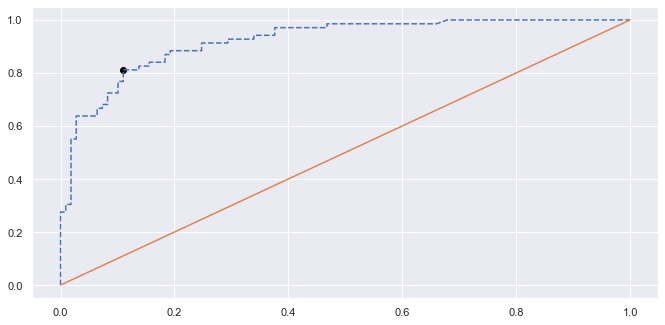

In [89]:
cbc=CatBoostClassifier(depth= 8, iterations= 300, learning_rate= 0.03)
scoring(cbc,X_train,x_test,Y_train,y_test)

In [90]:
lgbm=LGBMClassifier()
params={
    'n_estimators': [300, 200, 100],
    'max_depth': [3,4,5],
    'num_leaves': [50, 100,],
    'reg_alpha': [0.0,1.1,1.2,1.3],
    'reg_lambda': [0.0,1.1,1.2,1.3],
   'subsample_freq': [20]
    }
CV(lgbm,params)

Best estimator:  {'max_depth': 5, 'n_estimators': 300, 'num_leaves': 50, 'reg_alpha': 0.0, 'reg_lambda': 1.3, 'subsample_freq': 20}
Best score:  0.8880165289256198


Print Classification Report 
[[93 16]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       109
           1       0.78      0.81      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

Best auc value:  0.9024065948677037
Best Threshold: 0.6128287684407213


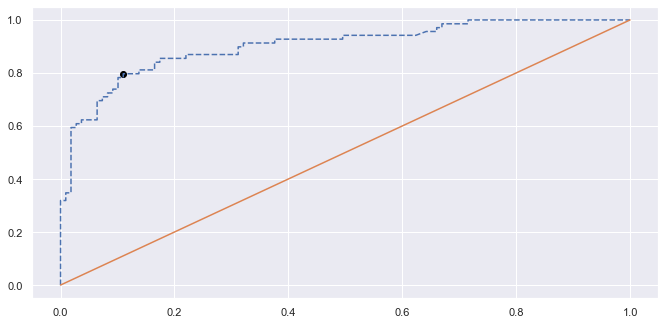

In [91]:
lg=LGBMClassifier(max_depth= 5, n_estimators= 200, num_leaves= 50, reg_alpha= 1.2, reg_lambda= 1.2, subsample_freq= 20)
scoring(lg,X_train,x_test,Y_train,y_test)

In [92]:
XGB=XGBClassifier()
params = {
    'learning_rate':[0.1,0.01],
    'objective':['binary:logistic'],
    'min_child_weight': [1,2],
    'gamma': [0,0.5 ],
    'max_depth': [3,5]
}

CV(XGB,params)

[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Print Classification Report 
[[93 16]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       109
           1       0.78      0.81      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

Best 

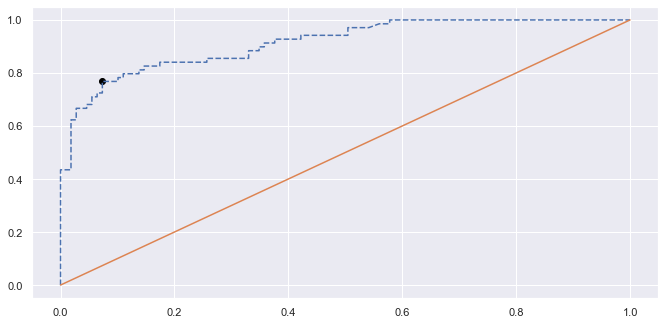

In [93]:
xgb=XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 5, min_child_weight= 2, objective= 'binary:logistic')
scoring(xgb,X_train,x_test,Y_train,y_test)

In [94]:
xgb=XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 5, min_child_weight= 2, objective= 'binary:logistic')
xgb.fit(X_train,Y_train)
yhat=xgb.predict(x_test)

[12:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
metrics.mean_squared_error(y_test,yhat)

0.16292134831460675

In [96]:
metrics.mean_squared_log_error(y_test,yhat)

0.07827605282936988

In [97]:
cols=X_train.columns

In [102]:
test=pd.read_csv('test.csv')
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [103]:
new=test.copy()

In [105]:
new=new[cols]

In [106]:
new['Embarked']=label.fit_transform(new['Embarked'])
new['Sex']=label.fit_transform(new['Sex'])

In [107]:
scaler=MinMaxScaler()
new[sc]=scaler.fit_transform(new[sc])

In [108]:
yhat=xgb.predict(new)

In [109]:
len(yhat)

418

In [111]:
result=pd.DataFrame()
result['PassengerId']=test['PassengerId']
result['Survived']=yhat

In [ ]:
result.to_csv('Result.csv',index=False)

In [112]:
len(test['PassengerId'])

418

In [114]:
lg=LogisticRegression(C= 1, class_weight='balanced', penalty='l2',solver= 'lbfgs')
nb=GaussianNB(var_smoothing=0.001873817422860383)
knn=KNeighborsClassifier(algorithm= 'auto', metric= 'minkowski', n_neighbors= 7, weights='uniform')
svm=SVC(C= 0.1, gamma= 1, kernel= 'rbf',probability=True)
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 4, min_samples_leaf= 5)
bagg=BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5),n_estimators= 100)
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5), learning_rate=.001, n_estimators=50)
gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 500)
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 6, max_features= 'log2', n_estimators= 200)
cbc=CatBoostClassifier(depth= 8, iterations= 300, learning_rate= 0.03)
lgm=LGBMClassifier(max_depth= 5, n_estimators= 200, num_leaves= 50, reg_alpha= 1.2, reg_lambda= 1.2, subsample_freq= 20)
xgb=XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 5, min_child_weight= 2, objective= 'binary:logistic')

In [115]:
models=[]
models.append(('Logistic RG',lg))
models.append(('Naive Bayes ',nb))
models.append(('KNN',knn))
models.append(('SVM',svm))
models.append(('Decision Tree',dtree))
models.append(('Bagging  Classifier',bagg))
models.append(('Ada Boost',ada))
models.append(('Gradient boost',gb))
models.append(('RandomForest',rfc))
models.append(('Cat Boot',cbc))
models.append(('LightGBM',lgm))
models.append(('XGBOOST',xgb))

In [116]:
models

[('Logistic RG', LogisticRegression(C=1, class_weight='balanced')),
 ('Naive Bayes ', GaussianNB(var_smoothing=0.001873817422860383)),
 ('KNN', KNeighborsClassifier(n_neighbors=7)),
 ('SVM', SVC(C=0.1, gamma=1, probability=True)),
 ('Decision Tree',
  DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=5)),
 ('Bagging  Classifier',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                          max_features=4,
                                                          min_samples_leaf=5),
                    n_estimators=100)),
 ('Ada Boost',
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                           max_features=4,
                                                           min_samples_leaf=5),
                     learning_rate=0.001)),
 ('Gradient boost',
  GradientBoostingClassifier(max_depth=5, min_samples_leaf=0.1,
               

In [117]:
import time

In [124]:
def creating_models(model,x_train,x_test,y_train,y_test):
    start=time.time()
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    testscore=model.score(x_test,y_test)
    trainscore=model.score(x_train,y_train)
    msr=metrics.mean_squared_error(y_test,yhat)
    msle=metrics.mean_squared_log_error(y_test,yhat)
    f1_score=metrics.f1_score(y_test,yhat)
    recall=metrics.recall_score(y_test,yhat)
    roc=metrics.roc_auc_score(y_test,yhat)
    
    scorer={
        'r2':metrics.make_scorer(metrics.r2_score),
        'f1_score':metrics.make_scorer(metrics.f1_score),
        'mean_squared_log_error':metrics.make_scorer(metrics.mean_squared_log_error),
        'roc_auc':metrics.make_scorer(metrics.roc_auc_score)
    }
   
    cv=cross_validate(model,x_train,y_train,cv=5,scoring=scorer)
    
    r2_cv=max(cv['test_r2'])
    f1_score_cv=max([np.sqrt(i) for i in cv['test_f1_score']])
    rmsle_cv=max([np.sqrt(i) for i in cv['test_mean_squared_log_error']])
    roc_auc_cv=max([i for i in cv['test_roc_auc']])
    end=time.time()
    duration=end-start
    
    return testscore,trainscore,msr,msle,f1_score,recall,roc,r2_cv,f1_score,rmsle_cv,roc_auc_cv,duration

results={}
for name,model in models:
    results[name]=creating_models(model,X_train,x_test,Y_train,y_test)

0:	learn: 0.6744433	total: 3.15ms	remaining: 941ms
1:	learn: 0.6557331	total: 9.62ms	remaining: 1.43s
2:	learn: 0.6384000	total: 13.8ms	remaining: 1.37s
3:	learn: 0.6288777	total: 16.1ms	remaining: 1.19s
4:	learn: 0.6159662	total: 18.1ms	remaining: 1.07s
5:	learn: 0.6053542	total: 20.1ms	remaining: 983ms
6:	learn: 0.5906073	total: 26.1ms	remaining: 1.09s
7:	learn: 0.5795282	total: 29.3ms	remaining: 1.07s
8:	learn: 0.5712440	total: 31.3ms	remaining: 1.01s
9:	learn: 0.5622583	total: 33.3ms	remaining: 966ms
10:	learn: 0.5575943	total: 35ms	remaining: 918ms
11:	learn: 0.5461646	total: 41.2ms	remaining: 988ms
12:	learn: 0.5394236	total: 43.1ms	remaining: 951ms
13:	learn: 0.5342591	total: 47.1ms	remaining: 961ms
14:	learn: 0.5246753	total: 52.8ms	remaining: 1s
15:	learn: 0.5180454	total: 55.8ms	remaining: 991ms
16:	learn: 0.5127337	total: 58.8ms	remaining: 979ms
17:	learn: 0.5056229	total: 65ms	remaining: 1.02s
18:	learn: 0.4999487	total: 67.3ms	remaining: 996ms
19:	learn: 0.4921009	total: 7

181:	learn: 0.3023580	total: 908ms	remaining: 589ms
182:	learn: 0.3021867	total: 923ms	remaining: 590ms
183:	learn: 0.3017220	total: 931ms	remaining: 587ms
184:	learn: 0.3013814	total: 938ms	remaining: 583ms
185:	learn: 0.3007186	total: 945ms	remaining: 579ms
186:	learn: 0.3000729	total: 952ms	remaining: 575ms
187:	learn: 0.2998257	total: 955ms	remaining: 569ms
188:	learn: 0.2993762	total: 961ms	remaining: 565ms
189:	learn: 0.2985323	total: 968ms	remaining: 560ms
190:	learn: 0.2982981	total: 974ms	remaining: 556ms
191:	learn: 0.2973908	total: 980ms	remaining: 551ms
192:	learn: 0.2966313	total: 986ms	remaining: 547ms
193:	learn: 0.2959290	total: 993ms	remaining: 543ms
194:	learn: 0.2950030	total: 999ms	remaining: 538ms
195:	learn: 0.2949321	total: 1s	remaining: 532ms
196:	learn: 0.2937764	total: 1.01s	remaining: 528ms
197:	learn: 0.2935894	total: 1.01s	remaining: 523ms
198:	learn: 0.2930618	total: 1.02s	remaining: 519ms
199:	learn: 0.2925542	total: 1.03s	remaining: 514ms
200:	learn: 0.2

41:	learn: 0.3968692	total: 179ms	remaining: 1.1s
42:	learn: 0.3947838	total: 186ms	remaining: 1.11s
43:	learn: 0.3928040	total: 192ms	remaining: 1.11s
44:	learn: 0.3892545	total: 198ms	remaining: 1.12s
45:	learn: 0.3850264	total: 205ms	remaining: 1.13s
46:	learn: 0.3845532	total: 208ms	remaining: 1.12s
47:	learn: 0.3828327	total: 216ms	remaining: 1.13s
48:	learn: 0.3822742	total: 218ms	remaining: 1.12s
49:	learn: 0.3789120	total: 225ms	remaining: 1.12s
50:	learn: 0.3772862	total: 228ms	remaining: 1.11s
51:	learn: 0.3747254	total: 234ms	remaining: 1.12s
52:	learn: 0.3724100	total: 243ms	remaining: 1.13s
53:	learn: 0.3722403	total: 245ms	remaining: 1.11s
54:	learn: 0.3695955	total: 253ms	remaining: 1.13s
55:	learn: 0.3674496	total: 261ms	remaining: 1.14s
56:	learn: 0.3657710	total: 272ms	remaining: 1.16s
57:	learn: 0.3636265	total: 279ms	remaining: 1.16s
58:	learn: 0.3634167	total: 281ms	remaining: 1.15s
59:	learn: 0.3629218	total: 283ms	remaining: 1.13s
60:	learn: 0.3616525	total: 289m

215:	learn: 0.2505477	total: 1.06s	remaining: 414ms
216:	learn: 0.2497493	total: 1.07s	remaining: 410ms
217:	learn: 0.2495068	total: 1.08s	remaining: 406ms
218:	learn: 0.2488884	total: 1.08s	remaining: 401ms
219:	learn: 0.2485462	total: 1.09s	remaining: 396ms
220:	learn: 0.2484961	total: 1.09s	remaining: 391ms
221:	learn: 0.2484762	total: 1.09s	remaining: 385ms
222:	learn: 0.2480699	total: 1.1s	remaining: 380ms
223:	learn: 0.2476440	total: 1.11s	remaining: 376ms
224:	learn: 0.2470699	total: 1.11s	remaining: 371ms
225:	learn: 0.2461116	total: 1.12s	remaining: 367ms
226:	learn: 0.2448454	total: 1.13s	remaining: 362ms
227:	learn: 0.2438422	total: 1.13s	remaining: 357ms
228:	learn: 0.2436403	total: 1.14s	remaining: 353ms
229:	learn: 0.2435067	total: 1.14s	remaining: 347ms
230:	learn: 0.2429318	total: 1.15s	remaining: 342ms
231:	learn: 0.2424163	total: 1.15s	remaining: 337ms
232:	learn: 0.2413917	total: 1.16s	remaining: 333ms
233:	learn: 0.2412986	total: 1.16s	remaining: 328ms
234:	learn: 0

78:	learn: 0.3581532	total: 368ms	remaining: 1.03s
79:	learn: 0.3569927	total: 374ms	remaining: 1.03s
80:	learn: 0.3559834	total: 380ms	remaining: 1.03s
81:	learn: 0.3544742	total: 386ms	remaining: 1.03s
82:	learn: 0.3542357	total: 389ms	remaining: 1.02s
83:	learn: 0.3523546	total: 395ms	remaining: 1.01s
84:	learn: 0.3513759	total: 401ms	remaining: 1.01s
85:	learn: 0.3508688	total: 404ms	remaining: 1s
86:	learn: 0.3499479	total: 409ms	remaining: 1s
87:	learn: 0.3497747	total: 412ms	remaining: 992ms
88:	learn: 0.3483493	total: 418ms	remaining: 991ms
89:	learn: 0.3479134	total: 422ms	remaining: 984ms
90:	learn: 0.3478299	total: 423ms	remaining: 972ms
91:	learn: 0.3470051	total: 430ms	remaining: 972ms
92:	learn: 0.3461831	total: 434ms	remaining: 966ms
93:	learn: 0.3450266	total: 440ms	remaining: 964ms
94:	learn: 0.3434408	total: 445ms	remaining: 961ms
95:	learn: 0.3433735	total: 447ms	remaining: 950ms
96:	learn: 0.3430849	total: 449ms	remaining: 940ms
97:	learn: 0.3413131	total: 455ms	rem

244:	learn: 0.2493617	total: 1.26s	remaining: 283ms
245:	learn: 0.2493347	total: 1.26s	remaining: 277ms
246:	learn: 0.2488079	total: 1.27s	remaining: 272ms
247:	learn: 0.2485936	total: 1.27s	remaining: 267ms
248:	learn: 0.2479720	total: 1.28s	remaining: 262ms
249:	learn: 0.2468469	total: 1.28s	remaining: 257ms
250:	learn: 0.2459345	total: 1.29s	remaining: 252ms
251:	learn: 0.2456863	total: 1.3s	remaining: 247ms
252:	learn: 0.2451747	total: 1.3s	remaining: 242ms
253:	learn: 0.2449099	total: 1.31s	remaining: 237ms
254:	learn: 0.2446592	total: 1.31s	remaining: 232ms
255:	learn: 0.2442497	total: 1.32s	remaining: 227ms
256:	learn: 0.2439593	total: 1.32s	remaining: 222ms
257:	learn: 0.2437864	total: 1.33s	remaining: 216ms
258:	learn: 0.2436305	total: 1.33s	remaining: 211ms
259:	learn: 0.2426178	total: 1.33s	remaining: 206ms
260:	learn: 0.2417980	total: 1.34s	remaining: 200ms
261:	learn: 0.2414632	total: 1.35s	remaining: 195ms
262:	learn: 0.2407704	total: 1.35s	remaining: 190ms
263:	learn: 0.

110:	learn: 0.3234855	total: 538ms	remaining: 916ms
111:	learn: 0.3227691	total: 545ms	remaining: 914ms
112:	learn: 0.3219782	total: 551ms	remaining: 912ms
113:	learn: 0.3204198	total: 558ms	remaining: 910ms
114:	learn: 0.3201974	total: 561ms	remaining: 902ms
115:	learn: 0.3193898	total: 567ms	remaining: 899ms
116:	learn: 0.3191779	total: 570ms	remaining: 892ms
117:	learn: 0.3191629	total: 572ms	remaining: 882ms
118:	learn: 0.3180024	total: 578ms	remaining: 879ms
119:	learn: 0.3175597	total: 582ms	remaining: 873ms
120:	learn: 0.3171619	total: 586ms	remaining: 867ms
121:	learn: 0.3166589	total: 592ms	remaining: 864ms
122:	learn: 0.3151357	total: 599ms	remaining: 861ms
123:	learn: 0.3146098	total: 605ms	remaining: 859ms
124:	learn: 0.3141171	total: 611ms	remaining: 855ms
125:	learn: 0.3135970	total: 615ms	remaining: 849ms
126:	learn: 0.3130934	total: 621ms	remaining: 845ms
127:	learn: 0.3122028	total: 626ms	remaining: 842ms
128:	learn: 0.3114582	total: 632ms	remaining: 838ms
129:	learn: 

275:	learn: 0.2246542	total: 1.43s	remaining: 124ms
276:	learn: 0.2241740	total: 1.43s	remaining: 119ms
277:	learn: 0.2238763	total: 1.44s	remaining: 114ms
278:	learn: 0.2235767	total: 1.45s	remaining: 109ms
279:	learn: 0.2230581	total: 1.45s	remaining: 104ms
280:	learn: 0.2229529	total: 1.46s	remaining: 98.5ms
281:	learn: 0.2225838	total: 1.46s	remaining: 93.3ms
282:	learn: 0.2221069	total: 1.47s	remaining: 88.2ms
283:	learn: 0.2216525	total: 1.47s	remaining: 83ms
284:	learn: 0.2206580	total: 1.48s	remaining: 77.9ms
285:	learn: 0.2200962	total: 1.49s	remaining: 72.7ms
286:	learn: 0.2195859	total: 1.49s	remaining: 67.6ms
287:	learn: 0.2186976	total: 1.5s	remaining: 62.4ms
288:	learn: 0.2182993	total: 1.5s	remaining: 57.2ms
289:	learn: 0.2181692	total: 1.51s	remaining: 52ms
290:	learn: 0.2177675	total: 1.51s	remaining: 46.8ms
291:	learn: 0.2171647	total: 1.52s	remaining: 41.6ms
292:	learn: 0.2168371	total: 1.52s	remaining: 36.4ms
293:	learn: 0.2162178	total: 1.53s	remaining: 31.2ms
294:

151:	learn: 0.3157276	total: 740ms	remaining: 721ms
152:	learn: 0.3153393	total: 747ms	remaining: 717ms
153:	learn: 0.3151667	total: 749ms	remaining: 711ms
154:	learn: 0.3146892	total: 756ms	remaining: 707ms
155:	learn: 0.3141600	total: 762ms	remaining: 703ms
156:	learn: 0.3130421	total: 768ms	remaining: 699ms
157:	learn: 0.3128396	total: 774ms	remaining: 695ms
158:	learn: 0.3118079	total: 780ms	remaining: 691ms
159:	learn: 0.3112794	total: 785ms	remaining: 687ms
160:	learn: 0.3110240	total: 789ms	remaining: 681ms
161:	learn: 0.3103024	total: 794ms	remaining: 677ms
162:	learn: 0.3097820	total: 800ms	remaining: 672ms
163:	learn: 0.3081975	total: 806ms	remaining: 668ms
164:	learn: 0.3076295	total: 812ms	remaining: 664ms
165:	learn: 0.3070586	total: 817ms	remaining: 660ms
166:	learn: 0.3065244	total: 821ms	remaining: 654ms
167:	learn: 0.3059143	total: 825ms	remaining: 648ms
168:	learn: 0.3058117	total: 829ms	remaining: 642ms
169:	learn: 0.3055466	total: 833ms	remaining: 637ms
170:	learn: 

45:	learn: 0.4167947	total: 206ms	remaining: 1.14s
46:	learn: 0.4135260	total: 213ms	remaining: 1.14s
47:	learn: 0.4131080	total: 215ms	remaining: 1.13s
48:	learn: 0.4112313	total: 222ms	remaining: 1.14s
49:	learn: 0.4091861	total: 228ms	remaining: 1.14s
50:	learn: 0.4085818	total: 231ms	remaining: 1.13s
51:	learn: 0.4081646	total: 234ms	remaining: 1.11s
52:	learn: 0.4071186	total: 240ms	remaining: 1.12s
53:	learn: 0.4051422	total: 246ms	remaining: 1.12s
54:	learn: 0.4049582	total: 248ms	remaining: 1.1s
55:	learn: 0.4042180	total: 252ms	remaining: 1.1s
56:	learn: 0.4039978	total: 253ms	remaining: 1.08s
57:	learn: 0.4015774	total: 259ms	remaining: 1.08s
58:	learn: 0.3985489	total: 265ms	remaining: 1.08s
59:	learn: 0.3965991	total: 271ms	remaining: 1.08s
60:	learn: 0.3945546	total: 277ms	remaining: 1.08s
61:	learn: 0.3923443	total: 282ms	remaining: 1.08s
62:	learn: 0.3921348	total: 284ms	remaining: 1.07s
63:	learn: 0.3899246	total: 290ms	remaining: 1.07s
64:	learn: 0.3897965	total: 291ms

214:	learn: 0.2837395	total: 1.09s	remaining: 432ms
215:	learn: 0.2831988	total: 1.1s	remaining: 427ms
216:	learn: 0.2824705	total: 1.1s	remaining: 422ms
217:	learn: 0.2820938	total: 1.11s	remaining: 418ms
218:	learn: 0.2817157	total: 1.12s	remaining: 413ms
219:	learn: 0.2816674	total: 1.12s	remaining: 407ms
220:	learn: 0.2811304	total: 1.12s	remaining: 402ms
221:	learn: 0.2807472	total: 1.13s	remaining: 397ms
222:	learn: 0.2801529	total: 1.14s	remaining: 392ms
223:	learn: 0.2794082	total: 1.14s	remaining: 388ms
224:	learn: 0.2789715	total: 1.15s	remaining: 383ms
225:	learn: 0.2781401	total: 1.15s	remaining: 378ms
226:	learn: 0.2777428	total: 1.16s	remaining: 373ms
227:	learn: 0.2772142	total: 1.17s	remaining: 368ms
228:	learn: 0.2765826	total: 1.17s	remaining: 363ms
229:	learn: 0.2756716	total: 1.18s	remaining: 359ms
230:	learn: 0.2753919	total: 1.18s	remaining: 354ms
231:	learn: 0.2752354	total: 1.19s	remaining: 348ms
232:	learn: 0.2751932	total: 1.19s	remaining: 342ms
233:	learn: 0.

In [130]:
rs=pd.DataFrame(results,index=['testscore','trainscore','msr','msle','f1_score','recall','roc','r2_cv','f1_score','rmsle_cv','roc_auc_cv','duration']).T

In [133]:
rs.sort_values(by=['roc_auc_cv','duration'],ascending=False)

testscore  trainscore       msr      msle  f1_score  \
Cat Boot              0.853933    0.903409  0.146067  0.070179  0.811594   
XGBOOST               0.837079    0.898864  0.162921  0.078276  0.794326   
RandomForest          0.842697    0.871591  0.157303  0.075577  0.800000   
Bagging  Classifier   0.876404    0.822727  0.123596  0.059382  0.835821   
LightGBM              0.837079    0.907955  0.162921  0.078276  0.794326   
KNN                   0.792135    0.843182  0.207865  0.099869  0.729927   
Ada Boost             0.848315    0.822727  0.151685  0.072878  0.802920   
Decision Tree         0.825843    0.797727  0.174157  0.083674  0.773723   
Gradient boost        0.825843    0.900000  0.174157  0.083674  0.780142   
Logistic RG           0.775281    0.793182  0.224719  0.107967  0.718310   
Naive Bayes           0.792135    0.776136  0.207865  0.099869  0.725926   
SVM                   0.775281    0.780682  0.224719  0.107967  0.756098   

                       recall       roc     r2_cv  f1_score  rmsle_cv  \
Cat Boot             0.811594  0.846164  0.545455  0.811594  0.322078   
XGBOOST              0.811594  0.832403  0.431818  0.794326  0.326288   
RandomForest         0.811594  0.836990  0.431818  0.800000  0.342613   
Bagging  Classifier  0.811594  0.864513  0.386364  0.835821  0.358194   
LightGBM             0.811594  0.832403  0.386364  0.794326  0.330445   
KNN                  0.724638  0.779750  0.386364  0.729927  0.346574   
Ada Boost            0.797101  0.838918  0.363636  0.802920  0.342613   
Decision Tree        0.768116  0.815251  0.340909  0.773723  0.397908   
Gradient boost       0.797101  0.820569  0.318182  0.780142  0.334550   
Logistic RG          0.739130  0.768648  0.318182  0.718310  0.358194   
Naive Bayes          0.710145  0.777091  0.227273  0.725926  0.369449   
SVM                  0.898551  0.797899  0.136364  0.756098  0.376765   

                     roc_auc_cv   duration  
Cat Boot               0.886364  10.254960  
XGBOOST                0.857955   1.256621  
RandomForest           0.857955   3.384813  
Bagging  Classifier    0.846591   1.978086  
LightGBM               0.846591   1.140040  
KNN                    0.846591   0.265005  
Ada Boost              0.840909   1.032539  
Decision Tree          0.835227   0.117326  
Gradient boost         0.829545   4.890907  
Logistic RG            0.829545   0.249727  
Naive Bayes            0.806818   0.136286  
SVM                    0.784091   2.001475

In [134]:
cbc=CatBoostClassifier(depth= 8, iterations= 300, learning_rate= 0.03)
cbc.fit(X_train,Y_train)
yhat=cbc.predict(x_test)

0:	learn: 0.6744433	total: 14.3ms	remaining: 4.29s
1:	learn: 0.6557331	total: 20.9ms	remaining: 3.12s
2:	learn: 0.6384000	total: 25.5ms	remaining: 2.53s
3:	learn: 0.6288777	total: 28ms	remaining: 2.07s
4:	learn: 0.6159662	total: 30.4ms	remaining: 1.79s
5:	learn: 0.6053542	total: 32.5ms	remaining: 1.59s
6:	learn: 0.5906073	total: 38.7ms	remaining: 1.62s
7:	learn: 0.5795282	total: 42.2ms	remaining: 1.54s
8:	learn: 0.5712440	total: 45.2ms	remaining: 1.46s
9:	learn: 0.5622583	total: 48ms	remaining: 1.39s
10:	learn: 0.5575943	total: 49.7ms	remaining: 1.3s
11:	learn: 0.5461646	total: 56.1ms	remaining: 1.35s
12:	learn: 0.5394236	total: 58.1ms	remaining: 1.28s
13:	learn: 0.5342591	total: 62.2ms	remaining: 1.27s
14:	learn: 0.5246753	total: 68.2ms	remaining: 1.3s
15:	learn: 0.5180454	total: 71.6ms	remaining: 1.27s
16:	learn: 0.5127337	total: 74.8ms	remaining: 1.24s
17:	learn: 0.5056229	total: 80.9ms	remaining: 1.27s
18:	learn: 0.4999487	total: 83.4ms	remaining: 1.23s
19:	learn: 0.4921009	total: 

174:	learn: 0.3056971	total: 904ms	remaining: 646ms
175:	learn: 0.3052815	total: 910ms	remaining: 641ms
176:	learn: 0.3047877	total: 917ms	remaining: 637ms
177:	learn: 0.3040940	total: 928ms	remaining: 636ms
178:	learn: 0.3035204	total: 934ms	remaining: 632ms
179:	learn: 0.3034818	total: 938ms	remaining: 625ms
180:	learn: 0.3029255	total: 946ms	remaining: 622ms
181:	learn: 0.3023580	total: 952ms	remaining: 617ms
182:	learn: 0.3021867	total: 959ms	remaining: 613ms
183:	learn: 0.3017220	total: 965ms	remaining: 608ms
184:	learn: 0.3013814	total: 972ms	remaining: 604ms
185:	learn: 0.3007186	total: 980ms	remaining: 601ms
186:	learn: 0.3000729	total: 994ms	remaining: 600ms
187:	learn: 0.2998257	total: 997ms	remaining: 594ms
188:	learn: 0.2993762	total: 1s	remaining: 590ms
189:	learn: 0.2985323	total: 1.01s	remaining: 585ms
190:	learn: 0.2982981	total: 1.02s	remaining: 580ms
191:	learn: 0.2973908	total: 1.02s	remaining: 576ms
192:	learn: 0.2966313	total: 1.03s	remaining: 571ms
193:	learn: 0.2

In [136]:
yhat_cbc=cbc.predict(new)

In [139]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [140]:
df=pd.DataFrame()
df['PassengerId']=test['PassengerId']
df['Survived']=yhat_cbc

In [142]:
df.to_csv('CatBoostresults.csv',index=False)